# Team Members-

## Name : Sandipan Majhi, Roll : 24AI60R21
## Name : Aayush Sugandh, Roll : 24AI60R04
## Group Number - 8

In [ ]:
#### Installing libraries first
#### NOTE - Only valid for Q1 and Q2
!pip install -U torch_geometric networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00


In [ ]:
#### Importing necessary libraries

import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

Part 1 : Write a Python function to generate the specified graph of 50 nodes (𝑝=0.1) and plot
the graph. (without using any external library) [3 Marks].

In [ ]:
def generate_erdos_renyi_graph(n, p, seed=None):
    """
    Generate an Erdős-Rényi random graph without using external libraries.

    Args:
    n (int): Number of nodes
    p (float): Probability of edge creation between any two nodes [take p value as 0.1]

    Returns:
    G (np.ndarray) : Adjacency matrix of graph G
    # todo

    """
    random.seed(seed)

    ## Create the symmetric Adjacency matrix where elements are 1 with probability p
    G = [[ 1 if random.random() <= p else 0 for _ in range(n)] for _ in range(n)]
    G = np.array(G)
    np.fill_diagonal(G, 0)

    G = np.triu(G)
    G = G + G.T

    return G

In [ ]:
def visualize_graph(G_adj): # todo
    """
    Visualize the graph using matplotlib.

    Args:
        G_adj (np.ndarray): Adjacency matrix of the Graph
    """

    #### From the adjacency matrix we build the networkx graph to plot a graph
    edges = list(np.argwhere(G_adj==1))
    G = nx.Graph(edges)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color='lightblue',
            with_labels=True, node_size=500, font_size=10, font_weight='bold')
    plt.title("Erdős-Rényi Random Graph")
    plt.show()


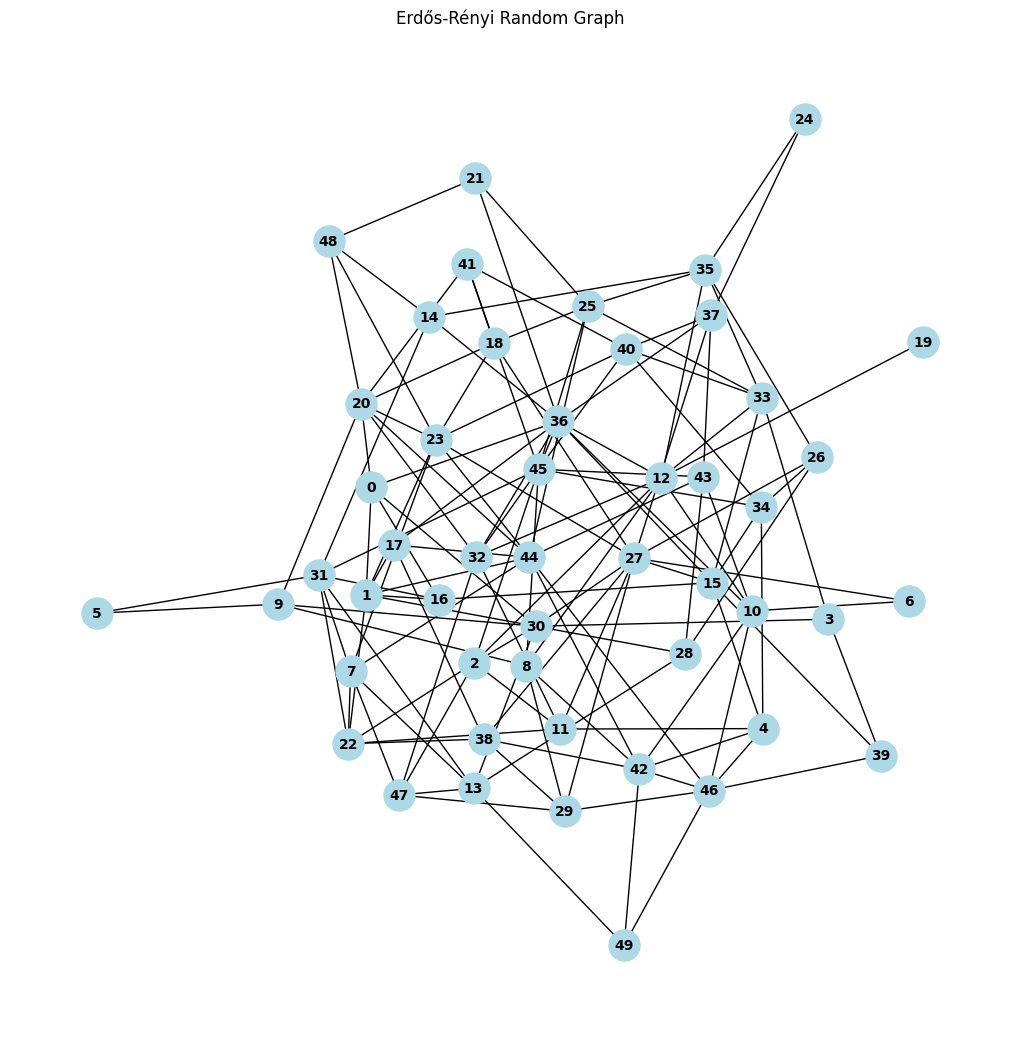

Number of edges in the Graph = 136.0
Mean Node Degree = 5.44


In [ ]:
n = 50
p = 0.1

G = generate_erdos_renyi_graph(n = n,p = p)
visualize_graph(G)

#### Here we calculate the Number of edges and Mean Node Degree
print(f"Number of edges in the Graph = {len(list(np.argwhere(G == 1)))/2}")
print(f"Mean Node Degree = {sum([np.sum(G[i,:]) for i in range(n)])/n}")

Part 2 : Generate the graph of flexible nodes i.e. (100, 200 upto 1000) and vary the
probability value 𝑝 = 0. 1, 0. 2 𝑢𝑝𝑡𝑜 0. 6 and visualize the node degree distribution of
the graphs [2 marks].

In [ ]:
from tqdm.auto import tqdm

num_nodes = np.linspace(start=100, stop=1000, num=10).astype(np.int64)
probabilities = np.linspace(start=0.1, stop=0.6, num = 6)

graphs = {}

for nodes in tqdm(list(num_nodes)):
    for p in list(probabilities):
        G = nx.erdos_renyi_graph(n=nodes, p = p)
        deg_sequence = sorted((d for n,d in G.degree()), reverse= True)
        graphs[(nodes, p)] = {}
        graphs[(nodes, p)]["random_graphs"] = G
        graphs[(nodes, p)]["deg_seq"] = deg_sequence

  0%|          | 0/10 [00:00<?, ?it/s]

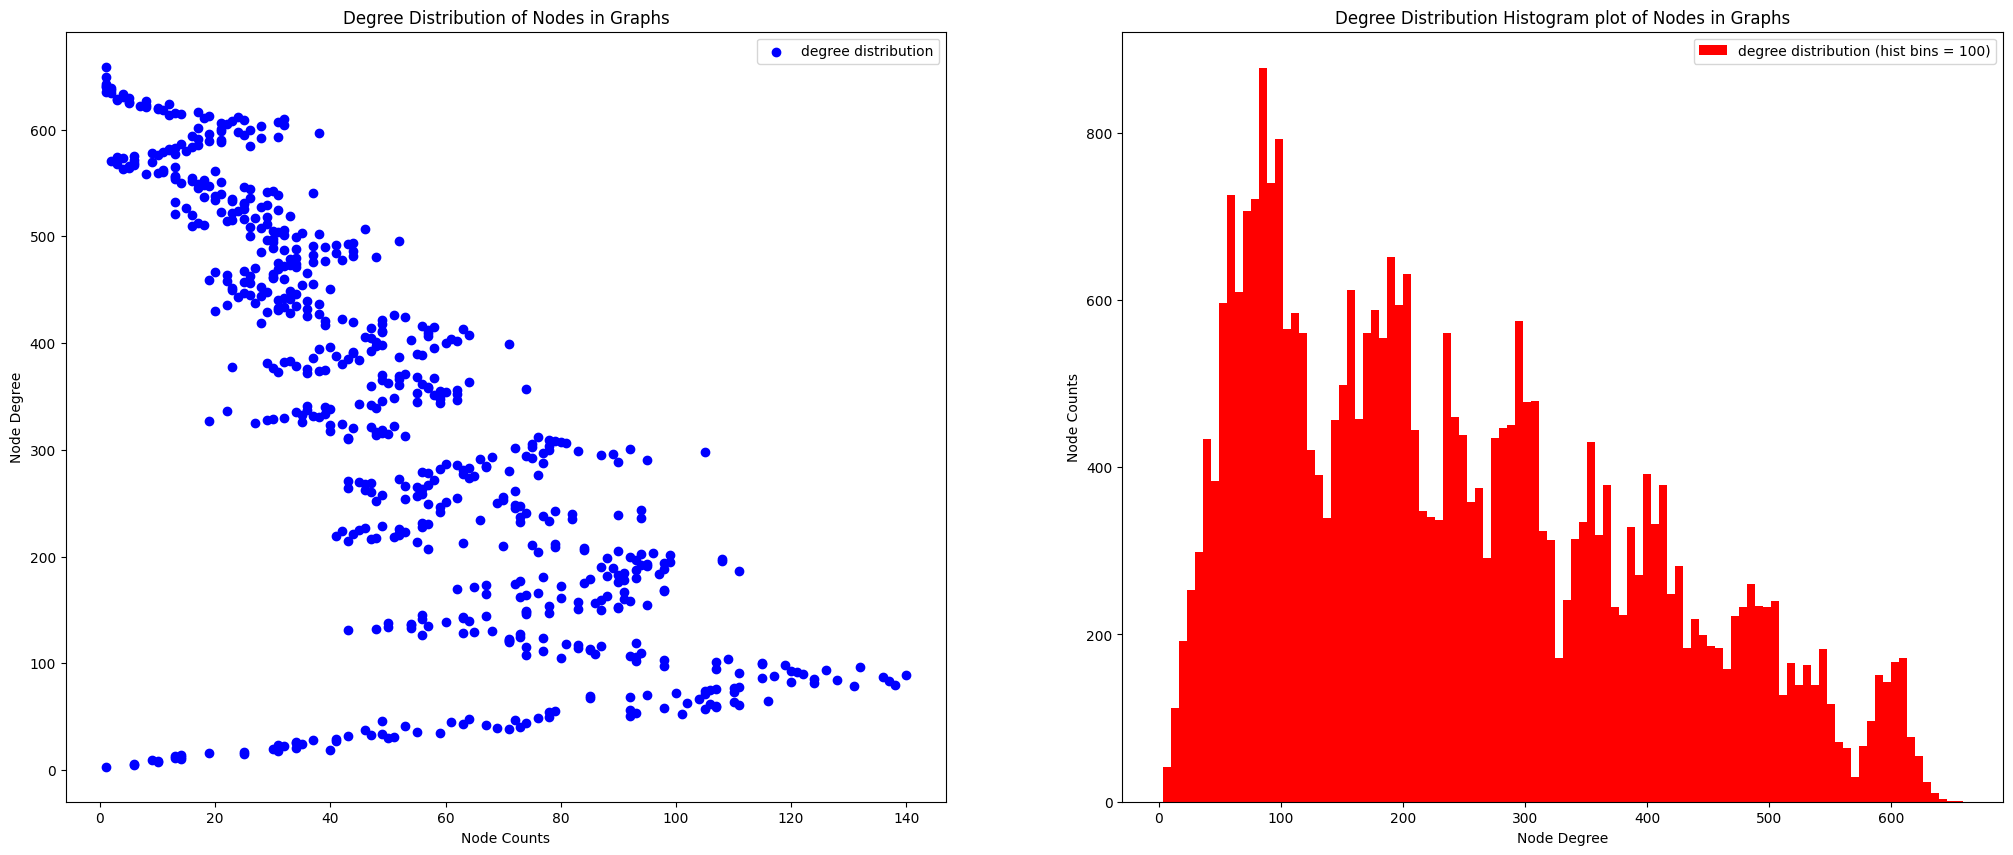

In [ ]:
#### Visualizing Node Degree distribution of all graphs in a single histogram plot ####


#### We extract the degrees of all nodes ####
deg_sequences = [ deg for key, val in graphs.items() for deg in graphs[(key)]["deg_seq"]]
deg_seq = np.unique(deg_sequences, return_counts= True)


#### We create two subplots for scatter and histogram plots and show the plots

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25,10))


ax[0].scatter(deg_seq[1], deg_seq[0], color = "blue", label = "degree distribution")
ax[0].set_title("Degree Distribution of Nodes in Graphs")
ax[0].set_xlabel("Node Counts")
ax[0].set_ylabel("Node Degree")
ax[0].legend(loc = "upper right")

ax[1].hist(deg_sequences, bins = 100 , color = "red", label = "degree distribution (hist bins = 100)")
ax[1].set_title("Degree Distribution Histogram plot of Nodes in Graphs")
ax[1].set_xlabel("Node Degree")
ax[1].set_ylabel("Node Counts")
ax[1].legend(loc = "upper right")


plt.show()



### A.) Load the Graph and prepare the labels

- Load the network from torch_geometric.datasets repository
- Prepare one hot labels for each node.

### B.) Feature Engineering and Augmentation

- Compute the following features for each node:
    - Degree centrality
    - Eigenvector centrality
    - Betweenness centrality
    - Local clustering coefficient
    - Closeness centrality
    - PageRank
    - Katz Centrality
- Concatenate these features with existing node features (if available) in the dataset. Prepare a augmented feature for each node.

### C.) Neural Network for Node Classification.

- Preprocess the data and split into training (60%), validation (20%), and test (20%) sets.
- Implement a neural network for multi-class classification (please refer assignemnt pdf for more detail).


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from tqdm import tqdm
import time

from torch_geometric.data import Data, InMemoryDataset, download_url
from torch_geometric.datasets.airports import Airports
from torch_geometric.utils import to_networkx

# from google.colab import drive

#Load the Graph
def load_graph(dataset_name = "usa", root_dir = "/content/"):

  dataset = Airports(root = root_dir, name = dataset_name)
  G = to_networkx(dataset[0], to_undirected=True)

  return G, dataset


# One-hot Label
def prepare_onehot(y):
  #### Here we prepare the one hot labels in
  one_hot_y = torch.nn.functional.one_hot(y)
  return one_hot_y

# Feature Engineering
def compute_features(G):
  ### Here we standardize the features and also extract the features from
  ### the networkx library
  scaler = StandardScaler()


  degree_centrality = nx.degree_centrality(G)
  eigenvector_centrality = nx.eigenvector_centrality(G)
  betweenness_centrality = nx.betweenness_centrality(G)
  local_clustering_coefficient = nx.clustering(G)
  closeness_centrality = nx.closeness_centrality(G)
  pagerank = nx.pagerank(G)
  katz_centrality = nx.katz_centrality_numpy(G)

  node_features = {
                    "degree_centrality" : degree_centrality,
                    "eigenvector_centrality" : eigenvector_centrality,
                    "betweenness_centrality" : betweenness_centrality,
                    "local_clustering_coeff" : local_clustering_coefficient,
                    "closeness_centrality" : closeness_centrality,
                    "pagerank" : pagerank,
                    "katz_centrality" : katz_centrality
                   }


  node_features = pd.DataFrame(node_features, columns = node_features.keys())
  node_features = scaler.fit_transform(node_features)

  return node_features

def prepare_data(node_features, target):
  ### Here we prepare the data from numpy array
  node_features = torch.from_numpy(node_features)
  node_features = node_features.to(dtype=torch.float32)
  target = torch.LongTensor(target)
  return node_features, target


def create_dataloader(node_features, targets, batch_size = 4, test_set = False, device = "cpu"):
  ### Here we set the dataloaders from the tensors
  node_dataset = torch.utils.data.TensorDataset(node_features, targets)
  node_loader = torch.utils.data.DataLoader(node_dataset, batch_size = batch_size, shuffle = not test_set)
  return node_loader


# Neural Network for Node Classification
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim, dropout = 0.15):
        super(SimpleNN, self).__init__()
        # Write your code here
        self.fc_linear1 = nn.Linear(input_dim, 128)
        self.fc_linear2 = nn.Linear(128, 64)
        self.fc_linear3 = nn.Linear(64, 32)
        self.fc_linear4 = nn.Linear(32, 16)
        self.fc_linear5 = nn.Linear(16, output_dim)

        self.relu = nn.ReLU()
        self.dropL = nn.Dropout(dropout)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        # Write your code here
        x = self.relu(self.fc_linear1(x))
        x = self.dropL(x)
        x = self.relu(self.fc_linear2(x))
        x = self.dropL(x)
        x = self.relu(self.fc_linear3(x))
        x = self.dropL(x)
        x = self.relu(self.fc_linear4(x))

        x = self.softmax(self.fc_linear5(x))
        return x

    @classmethod
    def compute_loss(self, output, target):
        loss = nn.CrossEntropyLoss()
        return loss(output, target)

    def compute_accuracy(self, predictions, target):
        _, predictions = torch.max(predictions.detach(), dim = 1)
        accuracy = torch.sum(predictions == target).item() / target.size(0)
        return accuracy



def train_and_evaluate(model, optimizer, batch_size,
                       X_train, y_train, X_val, y_val, epochs = 100, lr = 0.003, device = "cpu"):
    # Write your code for model training and evaluation here.
    # Print all losses and final test accuracy,precision,recall and F1-score
    ########################################################################

    training_history = {
        "train" : {
            "loss" : [],
            "accuracy" : [],
            "best_model" : None
          },
        "val" : {
            "loss" : [],
            "accuracy" : []
          },
        "test" : {
           "loss" : None,
            "accuracy" : None,
            "precision" : None,
            "recall" : None,
            "f1_score" : None
        }
    }

    ### Create the data loaders ###
    train_loader = create_dataloader(X_train, y_train, batch_size=batch_size )
    val_loader = create_dataloader(X_val, y_val, batch_size = batch_size)

    ### We get the node features and classes
    num_features = X_train.shape[1]
    num_classes = torch.unique(y_train).shape[0]

    ### For each epoch we train
    for epoch in tqdm(range(epochs), total = epochs):
      training_epoch_loss = 0
      validation_epoch_loss = 0

      train_preds = []
      train_targets = []

      val_preds = []
      val_targets = []

      ### Set the model to train mode
      model.train()

      for batch in train_loader:
        batch = (batch[0].to(device), batch[1].to(device))

        optimizer.zero_grad()
        predictions = model(batch[0])

        loss = SimpleNN.compute_loss(predictions, batch[1])
        loss.backward()
        optimizer.step()

        training_epoch_loss += loss.item()

        train_preds.append(torch.max(predictions.detach().cpu(), dim = 1)[1])
        train_targets.append(batch[1].cpu())

      train_preds = torch.cat(train_preds, dim = 0)
      train_targets = torch.cat(train_targets, dim = 0)

      training_acc = accuracy_score(train_targets, train_preds)

      training_history["train"]["loss"].append(training_epoch_loss)
      training_history["train"]["accuracy"].append(training_acc)

      ### Set the model to evaluation mode ###
      model.eval()

      for batch in val_loader:
        batch = (batch[0].to(device), batch[1].to(device))
        predictions = model(batch[0])
        loss = SimpleNN.compute_loss(predictions, batch[1])
        validation_epoch_loss += loss.item()

        val_preds.append(torch.max(predictions.cpu(), dim = 1)[1])
        val_targets.append(batch[1].cpu())

      val_preds = torch.cat(val_preds,dim = 0)
      val_targets = torch.cat(val_targets, dim = 0)

      val_acc = accuracy_score(val_targets, val_preds)

      ### When the val accuracy the best save the model parameters
      if len(training_history["val"]["accuracy"]) >= 1:
         if max(training_history["val"]["accuracy"]) < val_acc:
            training_history["train"]["best_model"] = model.state_dict()


      training_history["val"]["loss"].append(validation_epoch_loss)
      training_history["val"]["accuracy"].append(val_acc)

      print(f"Epoch : {epoch} | Training Loss : {training_epoch_loss} | Training Acc : {training_acc} | Validation Loss : {validation_epoch_loss} | Val Acc : {val_acc}")

    return training_history

def evaluate(model, X_test, y_test, loss_fn, history, batch_size, device = "cpu"):

  model.eval()

  test_loader = create_dataloader(X_test, y_test, batch_size)

  test_loss = 0
  test_preds = []
  test_targets = []

  for batch in test_loader:
    batch = (batch[0].to(device), batch[1].to(device))
    predictions = model(batch[0])
    loss = loss_fn(predictions, batch[1])
    test_loss += loss.item()

    test_preds.append(torch.max(predictions.cpu(), dim = 1)[1])
    test_targets.append(batch[1].cpu())

  test_preds = torch.cat(test_preds, dim = 0)
  test_targets = torch.cat(test_targets, dim = 0)

  history["test"]["loss"] = test_loss
  history["test"]["accuracy"] = accuracy_score(test_targets, test_preds)
  history["test"]["precision"] = precision_score(test_targets, test_preds, average= "macro")
  history["test"]["recall"] = recall_score(test_targets, test_preds, average= "macro")
  history["test"]["f1_score"] = f1_score(test_targets, test_preds, average="macro")

  print(f"Test Loss = {history['test']['loss']} \n Test Accuracuy = {history['test']['accuracy']}\n Test Precision = {history['test']['precision']}\n Test Recall = {history['test']['recall']}\n Test F1-Score = {history['test']['f1_score']}")
  return history


## USA Airport Dataset Training and Testing

In [ ]:
graph, dataset = load_graph(dataset_name="usa", root_dir="./")
node_features = compute_features(graph)
labels = dataset.data.y
targets = prepare_onehot(labels)
node_features, targets = prepare_data(node_features, targets)

Processing...
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(node_features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
input_dim = X_train.shape[1]
output_dim = torch.unique(y_train).shape[0]

lr = 0.003
epochs = 500
batch_size = 24
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleNN(input_dim = input_dim, output_dim = output_dim)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr = lr)

training_history = train_and_evaluate(model, optimizer, batch_size,
                   X_train, y_train, X_val, y_val, epochs = epochs, lr = lr, device = device)

  1%|          | 3/500 [00:00<01:58,  4.19it/s]

Epoch : 0 | Training Loss : 40.16562902927399 | Training Acc : 0.438375350140056 | Validation Loss : 12.618986248970032 | Val Acc : 0.5462184873949579
Epoch : 1 | Training Loss : 36.05578434467316 | Training Acc : 0.5266106442577031 | Validation Loss : 11.59402346611023 | Val Acc : 0.5546218487394958
Epoch : 2 | Training Loss : 34.40567088127136 | Training Acc : 0.5770308123249299 | Validation Loss : 11.581832528114319 | Val Acc : 0.5630252100840336


  1%|          | 5/500 [00:01<01:19,  6.26it/s]

Epoch : 3 | Training Loss : 33.92907953262329 | Training Acc : 0.6050420168067226 | Validation Loss : 11.796589612960815 | Val Acc : 0.5378151260504201
Epoch : 4 | Training Loss : 33.859458327293396 | Training Acc : 0.6106442577030813 | Validation Loss : 11.736039400100708 | Val Acc : 0.5546218487394958
Epoch : 5 | Training Loss : 34.04320937395096 | Training Acc : 0.6008403361344538 | Validation Loss : 11.645346343517303 | Val Acc : 0.5798319327731093


  2%|▏         | 9/500 [00:01<00:54,  8.95it/s]

Epoch : 6 | Training Loss : 33.30753242969513 | Training Acc : 0.6260504201680672 | Validation Loss : 11.619174480438232 | Val Acc : 0.5672268907563025
Epoch : 7 | Training Loss : 33.46310502290726 | Training Acc : 0.623249299719888 | Validation Loss : 11.696886777877808 | Val Acc : 0.5630252100840336
Epoch : 8 | Training Loss : 33.89614737033844 | Training Acc : 0.5952380952380952 | Validation Loss : 11.620986938476562 | Val Acc : 0.5714285714285714


  2%|▏         | 11/500 [00:01<00:49,  9.81it/s]

Epoch : 9 | Training Loss : 33.476708471775055 | Training Acc : 0.6148459383753502 | Validation Loss : 11.58311641216278 | Val Acc : 0.5714285714285714
Epoch : 10 | Training Loss : 33.36824554204941 | Training Acc : 0.6190476190476191 | Validation Loss : 11.602408230304718 | Val Acc : 0.5798319327731093
Epoch : 11 | Training Loss : 33.2972109913826 | Training Acc : 0.6218487394957983 | Validation Loss : 11.532952010631561 | Val Acc : 0.5798319327731093


  3%|▎         | 15/500 [00:01<00:44, 10.99it/s]

Epoch : 12 | Training Loss : 33.119613349437714 | Training Acc : 0.6274509803921569 | Validation Loss : 11.755953788757324 | Val Acc : 0.5630252100840336
Epoch : 13 | Training Loss : 33.19377428293228 | Training Acc : 0.6302521008403361 | Validation Loss : 11.56100308895111 | Val Acc : 0.5756302521008403
Epoch : 14 | Training Loss : 33.0105596780777 | Training Acc : 0.6400560224089635 | Validation Loss : 11.559186518192291 | Val Acc : 0.5714285714285714


  3%|▎         | 17/500 [00:02<00:42, 11.27it/s]

Epoch : 15 | Training Loss : 33.295339941978455 | Training Acc : 0.6260504201680672 | Validation Loss : 11.623427510261536 | Val Acc : 0.5630252100840336
Epoch : 16 | Training Loss : 33.23582524061203 | Training Acc : 0.6204481792717087 | Validation Loss : 11.5843585729599 | Val Acc : 0.5714285714285714
Epoch : 17 | Training Loss : 32.831763207912445 | Training Acc : 0.6358543417366946 | Validation Loss : 11.548046112060547 | Val Acc : 0.5756302521008403


  4%|▍         | 21/500 [00:02<00:42, 11.32it/s]

Epoch : 18 | Training Loss : 33.12486374378204 | Training Acc : 0.6288515406162465 | Validation Loss : 11.53590714931488 | Val Acc : 0.5798319327731093
Epoch : 19 | Training Loss : 32.9373123049736 | Training Acc : 0.6358543417366946 | Validation Loss : 11.57151448726654 | Val Acc : 0.5714285714285714
Epoch : 20 | Training Loss : 33.1761839389801 | Training Acc : 0.634453781512605 | Validation Loss : 11.575598537921906 | Val Acc : 0.5756302521008403


  5%|▍         | 23/500 [00:02<00:41, 11.41it/s]

Epoch : 21 | Training Loss : 32.83240878582001 | Training Acc : 0.6526610644257703 | Validation Loss : 11.590551257133484 | Val Acc : 0.5714285714285714
Epoch : 22 | Training Loss : 33.09513831138611 | Training Acc : 0.634453781512605 | Validation Loss : 11.562493443489075 | Val Acc : 0.5756302521008403
Epoch : 23 | Training Loss : 32.556293308734894 | Training Acc : 0.6568627450980392 | Validation Loss : 11.623486757278442 | Val Acc : 0.5588235294117647


  5%|▌         | 27/500 [00:02<00:40, 11.72it/s]

Epoch : 24 | Training Loss : 32.86138987541199 | Training Acc : 0.6414565826330533 | Validation Loss : 11.604620933532715 | Val Acc : 0.5672268907563025
Epoch : 25 | Training Loss : 32.70723271369934 | Training Acc : 0.6498599439775911 | Validation Loss : 11.62190443277359 | Val Acc : 0.5588235294117647
Epoch : 26 | Training Loss : 32.68885016441345 | Training Acc : 0.6442577030812325 | Validation Loss : 11.6830073595047 | Val Acc : 0.5546218487394958


  6%|▌         | 29/500 [00:03<00:39, 11.85it/s]

Epoch : 27 | Training Loss : 32.709254682064056 | Training Acc : 0.6400560224089635 | Validation Loss : 11.604137182235718 | Val Acc : 0.5714285714285714
Epoch : 28 | Training Loss : 32.57208424806595 | Training Acc : 0.6568627450980392 | Validation Loss : 11.649295508861542 | Val Acc : 0.5630252100840336
Epoch : 29 | Training Loss : 32.91856265068054 | Training Acc : 0.6414565826330533 | Validation Loss : 11.63351857662201 | Val Acc : 0.5714285714285714


  7%|▋         | 33/500 [00:03<00:40, 11.52it/s]

Epoch : 30 | Training Loss : 32.525706708431244 | Training Acc : 0.65406162464986 | Validation Loss : 11.636780440807343 | Val Acc : 0.5672268907563025
Epoch : 31 | Training Loss : 32.461045920848846 | Training Acc : 0.665266106442577 | Validation Loss : 11.71580457687378 | Val Acc : 0.5504201680672269
Epoch : 32 | Training Loss : 32.33546656370163 | Training Acc : 0.6484593837535014 | Validation Loss : 11.642715990543365 | Val Acc : 0.5756302521008403


  7%|▋         | 35/500 [00:03<00:39, 11.75it/s]

Epoch : 33 | Training Loss : 32.585884392261505 | Training Acc : 0.6470588235294118 | Validation Loss : 11.635224461555481 | Val Acc : 0.5630252100840336
Epoch : 34 | Training Loss : 32.286272048950195 | Training Acc : 0.6610644257703081 | Validation Loss : 11.66913616657257 | Val Acc : 0.5630252100840336
Epoch : 35 | Training Loss : 32.11243909597397 | Training Acc : 0.6750700280112045 | Validation Loss : 11.533749461174011 | Val Acc : 0.5756302521008403


  8%|▊         | 39/500 [00:03<00:38, 11.95it/s]

Epoch : 36 | Training Loss : 32.17000913619995 | Training Acc : 0.6708683473389355 | Validation Loss : 11.688949346542358 | Val Acc : 0.5630252100840336
Epoch : 37 | Training Loss : 32.47348242998123 | Training Acc : 0.6526610644257703 | Validation Loss : 11.608010709285736 | Val Acc : 0.5714285714285714
Epoch : 38 | Training Loss : 32.437554597854614 | Training Acc : 0.6610644257703081 | Validation Loss : 11.704950273036957 | Val Acc : 0.5630252100840336


  8%|▊         | 41/500 [00:04<00:38, 12.01it/s]

Epoch : 39 | Training Loss : 32.59743958711624 | Training Acc : 0.6498599439775911 | Validation Loss : 11.67844533920288 | Val Acc : 0.5672268907563025
Epoch : 40 | Training Loss : 32.29830986261368 | Training Acc : 0.6638655462184874 | Validation Loss : 11.563601732254028 | Val Acc : 0.5630252100840336
Epoch : 41 | Training Loss : 32.29779887199402 | Training Acc : 0.665266106442577 | Validation Loss : 11.642677187919617 | Val Acc : 0.5672268907563025


  9%|▉         | 45/500 [00:04<00:38, 11.81it/s]

Epoch : 42 | Training Loss : 32.3036887049675 | Training Acc : 0.6582633053221288 | Validation Loss : 11.640073537826538 | Val Acc : 0.5504201680672269
Epoch : 43 | Training Loss : 32.64908683300018 | Training Acc : 0.6498599439775911 | Validation Loss : 11.638134598731995 | Val Acc : 0.5630252100840336
Epoch : 44 | Training Loss : 32.169287979602814 | Training Acc : 0.6638655462184874 | Validation Loss : 11.615162789821625 | Val Acc : 0.5756302521008403


  9%|▉         | 47/500 [00:04<00:37, 11.98it/s]

Epoch : 45 | Training Loss : 32.28101456165314 | Training Acc : 0.6680672268907563 | Validation Loss : 11.793636918067932 | Val Acc : 0.5588235294117647
Epoch : 46 | Training Loss : 32.673044204711914 | Training Acc : 0.6456582633053222 | Validation Loss : 11.611116528511047 | Val Acc : 0.5714285714285714
Epoch : 47 | Training Loss : 32.17093724012375 | Training Acc : 0.6610644257703081 | Validation Loss : 11.677085995674133 | Val Acc : 0.5714285714285714


 10%|█         | 51/500 [00:04<00:36, 12.26it/s]

Epoch : 48 | Training Loss : 32.29960089921951 | Training Acc : 0.6624649859943977 | Validation Loss : 11.62713623046875 | Val Acc : 0.5756302521008403
Epoch : 49 | Training Loss : 32.18544179201126 | Training Acc : 0.6638655462184874 | Validation Loss : 11.631635665893555 | Val Acc : 0.5672268907563025
Epoch : 50 | Training Loss : 32.053703129291534 | Training Acc : 0.6694677871148459 | Validation Loss : 11.70077395439148 | Val Acc : 0.5714285714285714


 11%|█         | 53/500 [00:05<00:36, 12.35it/s]

Epoch : 51 | Training Loss : 32.34263890981674 | Training Acc : 0.6624649859943977 | Validation Loss : 11.580565571784973 | Val Acc : 0.5546218487394958
Epoch : 52 | Training Loss : 32.657554626464844 | Training Acc : 0.6512605042016807 | Validation Loss : 11.722694277763367 | Val Acc : 0.5546218487394958
Epoch : 53 | Training Loss : 32.34242779016495 | Training Acc : 0.665266106442577 | Validation Loss : 11.629684209823608 | Val Acc : 0.5588235294117647


 11%|█         | 55/500 [00:05<00:39, 11.33it/s]

Epoch : 54 | Training Loss : 32.092938244342804 | Training Acc : 0.6694677871148459 | Validation Loss : 11.624964475631714 | Val Acc : 0.5588235294117647
Epoch : 55 | Training Loss : 32.027815103530884 | Training Acc : 0.6722689075630253 | Validation Loss : 11.746809363365173 | Val Acc : 0.5504201680672269


 12%|█▏        | 59/500 [00:05<00:42, 10.41it/s]

Epoch : 56 | Training Loss : 32.24567496776581 | Training Acc : 0.6554621848739496 | Validation Loss : 11.695884883403778 | Val Acc : 0.5630252100840336
Epoch : 57 | Training Loss : 32.379327058792114 | Training Acc : 0.6512605042016807 | Validation Loss : 11.611152410507202 | Val Acc : 0.5630252100840336
Epoch : 58 | Training Loss : 32.16627633571625 | Training Acc : 0.6708683473389355 | Validation Loss : 11.70551598072052 | Val Acc : 0.5504201680672269


 12%|█▏        | 61/500 [00:05<00:42, 10.27it/s]

Epoch : 59 | Training Loss : 32.23888701200485 | Training Acc : 0.665266106442577 | Validation Loss : 11.645990252494812 | Val Acc : 0.5630252100840336
Epoch : 60 | Training Loss : 32.26907938718796 | Training Acc : 0.6596638655462185 | Validation Loss : 11.637100338935852 | Val Acc : 0.5630252100840336


 13%|█▎        | 63/500 [00:06<00:43, 10.03it/s]

Epoch : 61 | Training Loss : 32.04491168260574 | Training Acc : 0.6750700280112045 | Validation Loss : 11.586551368236542 | Val Acc : 0.5756302521008403
Epoch : 62 | Training Loss : 32.34960621595383 | Training Acc : 0.6624649859943977 | Validation Loss : 11.70106828212738 | Val Acc : 0.5546218487394958


 13%|█▎        | 65/500 [00:06<00:44,  9.74it/s]

Epoch : 63 | Training Loss : 32.30648559331894 | Training Acc : 0.6624649859943977 | Validation Loss : 11.64051878452301 | Val Acc : 0.5714285714285714
Epoch : 64 | Training Loss : 32.335762083530426 | Training Acc : 0.6568627450980392 | Validation Loss : 11.684590876102448 | Val Acc : 0.5672268907563025


 13%|█▎        | 67/500 [00:06<00:46,  9.26it/s]

Epoch : 65 | Training Loss : 31.812592685222626 | Training Acc : 0.6834733893557423 | Validation Loss : 11.701919794082642 | Val Acc : 0.5672268907563025
Epoch : 66 | Training Loss : 32.12583643198013 | Training Acc : 0.6722689075630253 | Validation Loss : 11.694941997528076 | Val Acc : 0.5672268907563025


 14%|█▍        | 69/500 [00:06<00:47,  9.03it/s]

Epoch : 67 | Training Loss : 31.759005844593048 | Training Acc : 0.6848739495798319 | Validation Loss : 11.643815219402313 | Val Acc : 0.5714285714285714
Epoch : 68 | Training Loss : 32.26799809932709 | Training Acc : 0.6610644257703081 | Validation Loss : 11.664868474006653 | Val Acc : 0.5672268907563025


 14%|█▍        | 71/500 [00:07<00:49,  8.68it/s]

Epoch : 69 | Training Loss : 31.810238540172577 | Training Acc : 0.680672268907563 | Validation Loss : 11.610795497894287 | Val Acc : 0.5756302521008403
Epoch : 70 | Training Loss : 32.082384526729584 | Training Acc : 0.6638655462184874 | Validation Loss : 11.588502764701843 | Val Acc : 0.5756302521008403


 15%|█▍        | 73/500 [00:07<00:51,  8.36it/s]

Epoch : 71 | Training Loss : 32.17143380641937 | Training Acc : 0.6666666666666666 | Validation Loss : 11.586112797260284 | Val Acc : 0.5714285714285714
Epoch : 72 | Training Loss : 31.94348120689392 | Training Acc : 0.6722689075630253 | Validation Loss : 11.664564549922943 | Val Acc : 0.5630252100840336


 15%|█▌        | 75/500 [00:07<00:53,  7.88it/s]

Epoch : 73 | Training Loss : 31.802634239196777 | Training Acc : 0.680672268907563 | Validation Loss : 11.75444746017456 | Val Acc : 0.5504201680672269
Epoch : 74 | Training Loss : 32.087166368961334 | Training Acc : 0.6736694677871149 | Validation Loss : 11.577934503555298 | Val Acc : 0.5840336134453782


 15%|█▌        | 77/500 [00:07<00:46,  9.15it/s]

Epoch : 75 | Training Loss : 32.11009055376053 | Training Acc : 0.6680672268907563 | Validation Loss : 11.612578749656677 | Val Acc : 0.5630252100840336
Epoch : 76 | Training Loss : 31.918654203414917 | Training Acc : 0.6778711484593838 | Validation Loss : 11.587440609931946 | Val Acc : 0.5840336134453782
Epoch : 77 | Training Loss : 31.852921843528748 | Training Acc : 0.6820728291316527 | Validation Loss : 11.65892219543457 | Val Acc : 0.5756302521008403


 16%|█▌        | 81/500 [00:08<00:39, 10.74it/s]

Epoch : 78 | Training Loss : 31.593409180641174 | Training Acc : 0.6876750700280112 | Validation Loss : 11.646696329116821 | Val Acc : 0.5756302521008403
Epoch : 79 | Training Loss : 32.859242379665375 | Training Acc : 0.6512605042016807 | Validation Loss : 11.541560590267181 | Val Acc : 0.5840336134453782
Epoch : 80 | Training Loss : 32.19753736257553 | Training Acc : 0.6680672268907563 | Validation Loss : 11.72591245174408 | Val Acc : 0.5630252100840336


 17%|█▋        | 83/500 [00:08<00:38, 10.93it/s]

Epoch : 81 | Training Loss : 31.977676808834076 | Training Acc : 0.6764705882352942 | Validation Loss : 11.460881173610687 | Val Acc : 0.5882352941176471
Epoch : 82 | Training Loss : 32.21123516559601 | Training Acc : 0.6610644257703081 | Validation Loss : 11.599300026893616 | Val Acc : 0.5798319327731093
Epoch : 83 | Training Loss : 31.840665221214294 | Training Acc : 0.680672268907563 | Validation Loss : 11.494954288005829 | Val Acc : 0.5756302521008403


 17%|█▋        | 87/500 [00:08<00:36, 11.38it/s]

Epoch : 84 | Training Loss : 31.830136477947235 | Training Acc : 0.6750700280112045 | Validation Loss : 11.557962238788605 | Val Acc : 0.5798319327731093
Epoch : 85 | Training Loss : 32.04600018262863 | Training Acc : 0.6778711484593838 | Validation Loss : 11.575614213943481 | Val Acc : 0.5756302521008403
Epoch : 86 | Training Loss : 31.743968546390533 | Training Acc : 0.6862745098039216 | Validation Loss : 11.602346301078796 | Val Acc : 0.5756302521008403


 18%|█▊        | 89/500 [00:08<00:35, 11.73it/s]

Epoch : 87 | Training Loss : 31.449390649795532 | Training Acc : 0.6904761904761905 | Validation Loss : 11.655729711055756 | Val Acc : 0.5630252100840336
Epoch : 88 | Training Loss : 32.22304028272629 | Training Acc : 0.6638655462184874 | Validation Loss : 11.802200078964233 | Val Acc : 0.5546218487394958
Epoch : 89 | Training Loss : 32.19977915287018 | Training Acc : 0.6680672268907563 | Validation Loss : 11.597122550010681 | Val Acc : 0.5756302521008403


 19%|█▊        | 93/500 [00:09<00:33, 12.09it/s]

Epoch : 90 | Training Loss : 32.18866968154907 | Training Acc : 0.6708683473389355 | Validation Loss : 11.66991662979126 | Val Acc : 0.5756302521008403
Epoch : 91 | Training Loss : 31.692968606948853 | Training Acc : 0.6792717086834734 | Validation Loss : 11.688784003257751 | Val Acc : 0.5714285714285714
Epoch : 92 | Training Loss : 31.66060048341751 | Training Acc : 0.6862745098039216 | Validation Loss : 11.601928114891052 | Val Acc : 0.5756302521008403


 19%|█▉        | 95/500 [00:09<00:34, 11.90it/s]

Epoch : 93 | Training Loss : 31.749810814857483 | Training Acc : 0.680672268907563 | Validation Loss : 11.713094294071198 | Val Acc : 0.5672268907563025
Epoch : 94 | Training Loss : 31.82801854610443 | Training Acc : 0.6834733893557423 | Validation Loss : 11.689700245857239 | Val Acc : 0.5672268907563025
Epoch : 95 | Training Loss : 31.74120807647705 | Training Acc : 0.6834733893557423 | Validation Loss : 11.687690138816833 | Val Acc : 0.5672268907563025


 20%|█▉        | 99/500 [00:09<00:33, 11.98it/s]

Epoch : 96 | Training Loss : 31.5086270570755 | Training Acc : 0.6932773109243697 | Validation Loss : 11.671152830123901 | Val Acc : 0.5756302521008403
Epoch : 97 | Training Loss : 31.70341330766678 | Training Acc : 0.6834733893557423 | Validation Loss : 12.026252448558807 | Val Acc : 0.5252100840336135
Epoch : 98 | Training Loss : 31.424559473991394 | Training Acc : 0.6946778711484594 | Validation Loss : 11.70162719488144 | Val Acc : 0.5546218487394958


 20%|██        | 101/500 [00:09<00:33, 12.06it/s]

Epoch : 99 | Training Loss : 31.47876286506653 | Training Acc : 0.6876750700280112 | Validation Loss : 11.594836115837097 | Val Acc : 0.5672268907563025
Epoch : 100 | Training Loss : 31.294568598270416 | Training Acc : 0.6974789915966386 | Validation Loss : 11.669785261154175 | Val Acc : 0.5672268907563025
Epoch : 101 | Training Loss : 31.294327199459076 | Training Acc : 0.7002801120448179 | Validation Loss : 11.5819730758667 | Val Acc : 0.5756302521008403


 21%|██        | 105/500 [00:10<00:32, 12.08it/s]

Epoch : 102 | Training Loss : 31.760065972805023 | Training Acc : 0.680672268907563 | Validation Loss : 11.573042392730713 | Val Acc : 0.5672268907563025
Epoch : 103 | Training Loss : 31.57973539829254 | Training Acc : 0.680672268907563 | Validation Loss : 11.4889976978302 | Val Acc : 0.5756302521008403
Epoch : 104 | Training Loss : 31.48387086391449 | Training Acc : 0.6848739495798319 | Validation Loss : 11.374786794185638 | Val Acc : 0.6176470588235294


 21%|██▏       | 107/500 [00:10<00:33, 11.90it/s]

Epoch : 105 | Training Loss : 31.41199278831482 | Training Acc : 0.6862745098039216 | Validation Loss : 11.230298459529877 | Val Acc : 0.6302521008403361
Epoch : 106 | Training Loss : 31.302826285362244 | Training Acc : 0.6946778711484594 | Validation Loss : 11.47190523147583 | Val Acc : 0.5882352941176471
Epoch : 107 | Training Loss : 31.034063458442688 | Training Acc : 0.711484593837535 | Validation Loss : 11.403801560401917 | Val Acc : 0.5840336134453782


 22%|██▏       | 111/500 [00:10<00:32, 11.87it/s]

Epoch : 108 | Training Loss : 30.983566164970398 | Training Acc : 0.7072829131652661 | Validation Loss : 11.097129583358765 | Val Acc : 0.6386554621848739
Epoch : 109 | Training Loss : 31.466076850891113 | Training Acc : 0.6890756302521008 | Validation Loss : 11.178694546222687 | Val Acc : 0.6302521008403361
Epoch : 110 | Training Loss : 31.75480955839157 | Training Acc : 0.6778711484593838 | Validation Loss : 11.454055428504944 | Val Acc : 0.5966386554621849


 23%|██▎       | 113/500 [00:10<00:32, 12.00it/s]

Epoch : 111 | Training Loss : 31.407012820243835 | Training Acc : 0.6820728291316527 | Validation Loss : 11.096325039863586 | Val Acc : 0.6428571428571429
Epoch : 112 | Training Loss : 31.118250966072083 | Training Acc : 0.6988795518207283 | Validation Loss : 11.2410609126091 | Val Acc : 0.6092436974789915
Epoch : 113 | Training Loss : 31.5450119972229 | Training Acc : 0.6904761904761905 | Validation Loss : 11.23238867521286 | Val Acc : 0.6176470588235294


 23%|██▎       | 117/500 [00:11<00:31, 12.04it/s]

Epoch : 114 | Training Loss : 31.066770195961 | Training Acc : 0.7058823529411765 | Validation Loss : 11.09371542930603 | Val Acc : 0.634453781512605
Epoch : 115 | Training Loss : 31.917671740055084 | Training Acc : 0.6708683473389355 | Validation Loss : 11.05365765094757 | Val Acc : 0.6386554621848739
Epoch : 116 | Training Loss : 31.75186973810196 | Training Acc : 0.6848739495798319 | Validation Loss : 11.149271726608276 | Val Acc : 0.6302521008403361


 24%|██▍       | 119/500 [00:11<00:32, 11.83it/s]

Epoch : 117 | Training Loss : 31.23550772666931 | Training Acc : 0.7058823529411765 | Validation Loss : 11.230201125144958 | Val Acc : 0.6218487394957983
Epoch : 118 | Training Loss : 31.00910174846649 | Training Acc : 0.7100840336134454 | Validation Loss : 11.162742733955383 | Val Acc : 0.6218487394957983
Epoch : 119 | Training Loss : 31.00111275911331 | Training Acc : 0.7100840336134454 | Validation Loss : 11.109003782272339 | Val Acc : 0.6428571428571429


 25%|██▍       | 123/500 [00:11<00:32, 11.75it/s]

Epoch : 120 | Training Loss : 31.413000643253326 | Training Acc : 0.6932773109243697 | Validation Loss : 11.265909552574158 | Val Acc : 0.6176470588235294
Epoch : 121 | Training Loss : 31.854252457618713 | Training Acc : 0.6694677871148459 | Validation Loss : 11.219091713428497 | Val Acc : 0.6302521008403361
Epoch : 122 | Training Loss : 31.523005723953247 | Training Acc : 0.6946778711484594 | Validation Loss : 11.054023265838623 | Val Acc : 0.634453781512605


 25%|██▌       | 125/500 [00:11<00:31, 11.84it/s]

Epoch : 123 | Training Loss : 31.528170943260193 | Training Acc : 0.6890756302521008 | Validation Loss : 11.165154874324799 | Val Acc : 0.6218487394957983
Epoch : 124 | Training Loss : 31.068317472934723 | Training Acc : 0.7030812324929971 | Validation Loss : 11.084154427051544 | Val Acc : 0.6428571428571429
Epoch : 125 | Training Loss : 31.04440987110138 | Training Acc : 0.7044817927170869 | Validation Loss : 11.09338527917862 | Val Acc : 0.634453781512605


 26%|██▌       | 129/500 [00:12<00:30, 12.01it/s]

Epoch : 126 | Training Loss : 30.9426828622818 | Training Acc : 0.711484593837535 | Validation Loss : 11.046716094017029 | Val Acc : 0.6428571428571429
Epoch : 127 | Training Loss : 30.621492445468903 | Training Acc : 0.7254901960784313 | Validation Loss : 11.007325649261475 | Val Acc : 0.6386554621848739
Epoch : 128 | Training Loss : 30.576055884361267 | Training Acc : 0.7198879551820728 | Validation Loss : 11.20932650566101 | Val Acc : 0.6134453781512605


 26%|██▌       | 131/500 [00:12<00:31, 11.74it/s]

Epoch : 129 | Training Loss : 30.663926422595978 | Training Acc : 0.7212885154061625 | Validation Loss : 10.998758733272552 | Val Acc : 0.6470588235294118
Epoch : 130 | Training Loss : 30.949380695819855 | Training Acc : 0.7072829131652661 | Validation Loss : 11.055339813232422 | Val Acc : 0.6428571428571429
Epoch : 131 | Training Loss : 30.842216968536377 | Training Acc : 0.711484593837535 | Validation Loss : 11.26210469007492 | Val Acc : 0.6176470588235294


 27%|██▋       | 135/500 [00:12<00:31, 11.53it/s]

Epoch : 132 | Training Loss : 30.708091259002686 | Training Acc : 0.7212885154061625 | Validation Loss : 11.155911147594452 | Val Acc : 0.6302521008403361
Epoch : 133 | Training Loss : 30.915595412254333 | Training Acc : 0.711484593837535 | Validation Loss : 11.081744313240051 | Val Acc : 0.634453781512605
Epoch : 134 | Training Loss : 31.10875052213669 | Training Acc : 0.7030812324929971 | Validation Loss : 11.329005479812622 | Val Acc : 0.6050420168067226


 27%|██▋       | 137/500 [00:12<00:30, 11.73it/s]

Epoch : 135 | Training Loss : 30.997556447982788 | Training Acc : 0.7086834733893558 | Validation Loss : 11.020720422267914 | Val Acc : 0.6428571428571429
Epoch : 136 | Training Loss : 30.82594358921051 | Training Acc : 0.7170868347338936 | Validation Loss : 11.042445242404938 | Val Acc : 0.6386554621848739
Epoch : 137 | Training Loss : 30.7212592959404 | Training Acc : 0.7198879551820728 | Validation Loss : 11.105472087860107 | Val Acc : 0.6302521008403361


 28%|██▊       | 141/500 [00:13<00:31, 11.51it/s]

Epoch : 138 | Training Loss : 31.21974378824234 | Training Acc : 0.6988795518207283 | Validation Loss : 11.228618323802948 | Val Acc : 0.6218487394957983
Epoch : 139 | Training Loss : 31.02982121706009 | Training Acc : 0.7016806722689075 | Validation Loss : 10.91420304775238 | Val Acc : 0.6470588235294118
Epoch : 140 | Training Loss : 31.162448227405548 | Training Acc : 0.7002801120448179 | Validation Loss : 11.04007089138031 | Val Acc : 0.6386554621848739


 29%|██▊       | 143/500 [00:13<00:31, 11.46it/s]

Epoch : 141 | Training Loss : 31.030046582221985 | Training Acc : 0.7058823529411765 | Validation Loss : 11.070923924446106 | Val Acc : 0.6386554621848739
Epoch : 142 | Training Loss : 30.77915346622467 | Training Acc : 0.7142857142857143 | Validation Loss : 11.142773568630219 | Val Acc : 0.6302521008403361
Epoch : 143 | Training Loss : 30.73369437456131 | Training Acc : 0.7156862745098039 | Validation Loss : 11.380650997161865 | Val Acc : 0.6050420168067226


 29%|██▉       | 147/500 [00:13<00:30, 11.57it/s]

Epoch : 144 | Training Loss : 31.069123327732086 | Training Acc : 0.7100840336134454 | Validation Loss : 11.061510503292084 | Val Acc : 0.6260504201680672
Epoch : 145 | Training Loss : 30.78585982322693 | Training Acc : 0.7086834733893558 | Validation Loss : 11.137923121452332 | Val Acc : 0.6302521008403361
Epoch : 146 | Training Loss : 31.2361398935318 | Training Acc : 0.6946778711484594 | Validation Loss : 10.993936955928802 | Val Acc : 0.6470588235294118


 30%|██▉       | 149/500 [00:13<00:29, 11.74it/s]

Epoch : 147 | Training Loss : 30.693169951438904 | Training Acc : 0.7212885154061625 | Validation Loss : 11.151991069316864 | Val Acc : 0.6302521008403361
Epoch : 148 | Training Loss : 30.896721839904785 | Training Acc : 0.7100840336134454 | Validation Loss : 11.337446630001068 | Val Acc : 0.6050420168067226
Epoch : 149 | Training Loss : 30.45328038930893 | Training Acc : 0.7310924369747899 | Validation Loss : 11.003856122493744 | Val Acc : 0.6428571428571429


 31%|███       | 153/500 [00:14<00:29, 11.69it/s]

Epoch : 150 | Training Loss : 30.7778497338295 | Training Acc : 0.711484593837535 | Validation Loss : 10.958759605884552 | Val Acc : 0.6470588235294118
Epoch : 151 | Training Loss : 31.14950120449066 | Training Acc : 0.7044817927170869 | Validation Loss : 11.22875440120697 | Val Acc : 0.6218487394957983
Epoch : 152 | Training Loss : 30.600187122821808 | Training Acc : 0.7240896358543417 | Validation Loss : 11.150138914585114 | Val Acc : 0.6302521008403361


 31%|███       | 155/500 [00:14<00:29, 11.82it/s]

Epoch : 153 | Training Loss : 31.154100835323334 | Training Acc : 0.7016806722689075 | Validation Loss : 11.018168270587921 | Val Acc : 0.6386554621848739
Epoch : 154 | Training Loss : 30.664014756679535 | Training Acc : 0.7198879551820728 | Validation Loss : 10.968638956546783 | Val Acc : 0.6554621848739496
Epoch : 155 | Training Loss : 31.35892528295517 | Training Acc : 0.6946778711484594 | Validation Loss : 10.920572221279144 | Val Acc : 0.6470588235294118


 32%|███▏      | 159/500 [00:14<00:28, 11.78it/s]

Epoch : 156 | Training Loss : 31.360208332538605 | Training Acc : 0.6988795518207283 | Validation Loss : 11.22833800315857 | Val Acc : 0.6134453781512605
Epoch : 157 | Training Loss : 32.08582228422165 | Training Acc : 0.6722689075630253 | Validation Loss : 11.18941980600357 | Val Acc : 0.6218487394957983
Epoch : 158 | Training Loss : 31.910366654396057 | Training Acc : 0.6792717086834734 | Validation Loss : 11.301614046096802 | Val Acc : 0.6050420168067226


 32%|███▏      | 161/500 [00:14<00:28, 11.88it/s]

Epoch : 159 | Training Loss : 30.916203558444977 | Training Acc : 0.7128851540616247 | Validation Loss : 11.114718198776245 | Val Acc : 0.6386554621848739
Epoch : 160 | Training Loss : 30.656818509101868 | Training Acc : 0.7212885154061625 | Validation Loss : 11.204067170619965 | Val Acc : 0.6176470588235294
Epoch : 161 | Training Loss : 30.791850924491882 | Training Acc : 0.711484593837535 | Validation Loss : 11.221804857254028 | Val Acc : 0.6176470588235294


 33%|███▎      | 165/500 [00:15<00:28, 11.89it/s]

Epoch : 162 | Training Loss : 31.345339357852936 | Training Acc : 0.6918767507002801 | Validation Loss : 11.22957456111908 | Val Acc : 0.6176470588235294
Epoch : 163 | Training Loss : 31.046644032001495 | Training Acc : 0.7030812324929971 | Validation Loss : 11.072592616081238 | Val Acc : 0.634453781512605
Epoch : 164 | Training Loss : 30.323972582817078 | Training Acc : 0.7324929971988795 | Validation Loss : 11.071064472198486 | Val Acc : 0.6302521008403361


 33%|███▎      | 167/500 [00:15<00:27, 11.92it/s]

Epoch : 165 | Training Loss : 31.07325518131256 | Training Acc : 0.7044817927170869 | Validation Loss : 11.092974483966827 | Val Acc : 0.6302521008403361
Epoch : 166 | Training Loss : 30.660074055194855 | Training Acc : 0.7212885154061625 | Validation Loss : 11.151701986789703 | Val Acc : 0.6260504201680672
Epoch : 167 | Training Loss : 30.314748883247375 | Training Acc : 0.7338935574229691 | Validation Loss : 11.126774251461029 | Val Acc : 0.6302521008403361


 34%|███▍      | 171/500 [00:15<00:27, 11.81it/s]

Epoch : 168 | Training Loss : 31.75932538509369 | Training Acc : 0.680672268907563 | Validation Loss : 11.157747864723206 | Val Acc : 0.6260504201680672
Epoch : 169 | Training Loss : 31.364841997623444 | Training Acc : 0.6988795518207283 | Validation Loss : 11.224015712738037 | Val Acc : 0.6218487394957983
Epoch : 170 | Training Loss : 31.200626015663147 | Training Acc : 0.7016806722689075 | Validation Loss : 11.237659573554993 | Val Acc : 0.6134453781512605


 35%|███▍      | 173/500 [00:15<00:27, 11.83it/s]

Epoch : 171 | Training Loss : 30.701746881008148 | Training Acc : 0.7198879551820728 | Validation Loss : 10.998657405376434 | Val Acc : 0.6428571428571429
Epoch : 172 | Training Loss : 30.732310593128204 | Training Acc : 0.7170868347338936 | Validation Loss : 11.018278300762177 | Val Acc : 0.634453781512605
Epoch : 173 | Training Loss : 30.51593381166458 | Training Acc : 0.7240896358543417 | Validation Loss : 10.925892293453217 | Val Acc : 0.6470588235294118


 35%|███▌      | 177/500 [00:16<00:27, 11.68it/s]

Epoch : 174 | Training Loss : 31.104137241840363 | Training Acc : 0.7100840336134454 | Validation Loss : 10.925593495368958 | Val Acc : 0.6470588235294118
Epoch : 175 | Training Loss : 30.959736466407776 | Training Acc : 0.711484593837535 | Validation Loss : 11.132333874702454 | Val Acc : 0.6260504201680672
Epoch : 176 | Training Loss : 30.75207358598709 | Training Acc : 0.7156862745098039 | Validation Loss : 11.13637661933899 | Val Acc : 0.6176470588235294


 36%|███▌      | 179/500 [00:16<00:27, 11.79it/s]

Epoch : 177 | Training Loss : 31.35068130493164 | Training Acc : 0.6988795518207283 | Validation Loss : 11.267845392227173 | Val Acc : 0.6134453781512605
Epoch : 178 | Training Loss : 31.358802795410156 | Training Acc : 0.696078431372549 | Validation Loss : 11.164095103740692 | Val Acc : 0.6260504201680672
Epoch : 179 | Training Loss : 31.32366394996643 | Training Acc : 0.6988795518207283 | Validation Loss : 11.269318342208862 | Val Acc : 0.6176470588235294


 37%|███▋      | 183/500 [00:16<00:27, 11.68it/s]

Epoch : 180 | Training Loss : 31.43525320291519 | Training Acc : 0.6946778711484594 | Validation Loss : 11.161732137203217 | Val Acc : 0.6260504201680672
Epoch : 181 | Training Loss : 30.898658275604248 | Training Acc : 0.7128851540616247 | Validation Loss : 11.138480305671692 | Val Acc : 0.634453781512605
Epoch : 182 | Training Loss : 31.092309415340424 | Training Acc : 0.7072829131652661 | Validation Loss : 11.281873345375061 | Val Acc : 0.6134453781512605


 37%|███▋      | 185/500 [00:16<00:26, 11.74it/s]

Epoch : 183 | Training Loss : 30.81677943468094 | Training Acc : 0.7142857142857143 | Validation Loss : 11.052168011665344 | Val Acc : 0.6386554621848739
Epoch : 184 | Training Loss : 31.11183774471283 | Training Acc : 0.7058823529411765 | Validation Loss : 11.009218215942383 | Val Acc : 0.6470588235294118
Epoch : 185 | Training Loss : 30.355596363544464 | Training Acc : 0.7310924369747899 | Validation Loss : 11.032280325889587 | Val Acc : 0.634453781512605


 38%|███▊      | 189/500 [00:17<00:27, 11.51it/s]

Epoch : 186 | Training Loss : 31.0057715177536 | Training Acc : 0.7100840336134454 | Validation Loss : 11.24108999967575 | Val Acc : 0.6176470588235294
Epoch : 187 | Training Loss : 30.527485847473145 | Training Acc : 0.726890756302521 | Validation Loss : 11.359538733959198 | Val Acc : 0.6050420168067226
Epoch : 188 | Training Loss : 30.864123344421387 | Training Acc : 0.711484593837535 | Validation Loss : 11.37326955795288 | Val Acc : 0.6008403361344538


 38%|███▊      | 191/500 [00:17<00:26, 11.65it/s]

Epoch : 189 | Training Loss : 30.865908443927765 | Training Acc : 0.7100840336134454 | Validation Loss : 11.064187467098236 | Val Acc : 0.6302521008403361
Epoch : 190 | Training Loss : 30.75284117460251 | Training Acc : 0.7184873949579832 | Validation Loss : 11.179056823253632 | Val Acc : 0.6218487394957983
Epoch : 191 | Training Loss : 30.709779679775238 | Training Acc : 0.7198879551820728 | Validation Loss : 11.308927416801453 | Val Acc : 0.6134453781512605


 39%|███▊      | 193/500 [00:17<00:26, 11.73it/s]

Epoch : 192 | Training Loss : 31.058014035224915 | Training Acc : 0.7002801120448179 | Validation Loss : 11.017709076404572 | Val Acc : 0.6428571428571429
Epoch : 193 | Training Loss : 30.84895658493042 | Training Acc : 0.711484593837535 | Validation Loss : 11.037990868091583 | Val Acc : 0.6428571428571429


 39%|███▉      | 195/500 [00:17<00:28, 10.69it/s]

Epoch : 194 | Training Loss : 31.02237159013748 | Training Acc : 0.7058823529411765 | Validation Loss : 11.151492416858673 | Val Acc : 0.6260504201680672
Epoch : 195 | Training Loss : 30.550174295902252 | Training Acc : 0.7212885154061625 | Validation Loss : 11.184199750423431 | Val Acc : 0.6176470588235294


 39%|███▉      | 197/500 [00:17<00:29, 10.23it/s]

Epoch : 196 | Training Loss : 30.462350487709045 | Training Acc : 0.726890756302521 | Validation Loss : 11.713313221931458 | Val Acc : 0.5714285714285714
Epoch : 197 | Training Loss : 30.51247525215149 | Training Acc : 0.7240896358543417 | Validation Loss : 11.29616665840149 | Val Acc : 0.6176470588235294


 40%|████      | 200/500 [00:18<00:30,  9.77it/s]

Epoch : 198 | Training Loss : 30.51691645383835 | Training Acc : 0.7254901960784313 | Validation Loss : 11.142961859703064 | Val Acc : 0.634453781512605
Epoch : 199 | Training Loss : 30.80522334575653 | Training Acc : 0.7170868347338936 | Validation Loss : 11.144255876541138 | Val Acc : 0.6218487394957983


 41%|████      | 203/500 [00:18<00:30,  9.81it/s]

Epoch : 200 | Training Loss : 30.858036160469055 | Training Acc : 0.7142857142857143 | Validation Loss : 10.974483847618103 | Val Acc : 0.6470588235294118
Epoch : 201 | Training Loss : 30.983446776866913 | Training Acc : 0.711484593837535 | Validation Loss : 11.162306487560272 | Val Acc : 0.6260504201680672
Epoch : 202 | Training Loss : 30.64050841331482 | Training Acc : 0.7198879551820728 | Validation Loss : 11.166910588741302 | Val Acc : 0.6302521008403361


 41%|████      | 205/500 [00:18<00:30,  9.62it/s]

Epoch : 203 | Training Loss : 30.720150113105774 | Training Acc : 0.7142857142857143 | Validation Loss : 11.240743219852448 | Val Acc : 0.6134453781512605
Epoch : 204 | Training Loss : 30.737347841262817 | Training Acc : 0.7142857142857143 | Validation Loss : 11.143343448638916 | Val Acc : 0.634453781512605


 41%|████▏     | 207/500 [00:19<00:32,  9.09it/s]

Epoch : 205 | Training Loss : 30.31965333223343 | Training Acc : 0.7240896358543417 | Validation Loss : 11.374569952487946 | Val Acc : 0.6008403361344538
Epoch : 206 | Training Loss : 30.77656841278076 | Training Acc : 0.7142857142857143 | Validation Loss : 11.224461734294891 | Val Acc : 0.6176470588235294


 42%|████▏     | 209/500 [00:19<00:33,  8.60it/s]

Epoch : 207 | Training Loss : 30.983433306217194 | Training Acc : 0.7128851540616247 | Validation Loss : 11.146402180194855 | Val Acc : 0.6218487394957983
Epoch : 208 | Training Loss : 31.109445571899414 | Training Acc : 0.7058823529411765 | Validation Loss : 11.129273772239685 | Val Acc : 0.6260504201680672


 42%|████▏     | 211/500 [00:19<00:33,  8.63it/s]

Epoch : 209 | Training Loss : 31.038832366466522 | Training Acc : 0.7100840336134454 | Validation Loss : 11.214240789413452 | Val Acc : 0.6260504201680672
Epoch : 210 | Training Loss : 30.188212037086487 | Training Acc : 0.7366946778711485 | Validation Loss : 11.252982139587402 | Val Acc : 0.6176470588235294


 43%|████▎     | 213/500 [00:19<00:33,  8.45it/s]

Epoch : 211 | Training Loss : 30.426922917366028 | Training Acc : 0.7282913165266106 | Validation Loss : 11.087097585201263 | Val Acc : 0.6302521008403361
Epoch : 212 | Training Loss : 31.005292057991028 | Training Acc : 0.7086834733893558 | Validation Loss : 11.056152582168579 | Val Acc : 0.634453781512605


 43%|████▎     | 215/500 [00:20<00:32,  8.66it/s]

Epoch : 213 | Training Loss : 30.361759424209595 | Training Acc : 0.7310924369747899 | Validation Loss : 11.122890830039978 | Val Acc : 0.6302521008403361
Epoch : 214 | Training Loss : 30.74366694688797 | Training Acc : 0.7128851540616247 | Validation Loss : 11.013728022575378 | Val Acc : 0.6386554621848739


 43%|████▎     | 217/500 [00:20<00:34,  8.19it/s]

Epoch : 215 | Training Loss : 30.75539940595627 | Training Acc : 0.7142857142857143 | Validation Loss : 11.06907844543457 | Val Acc : 0.634453781512605
Epoch : 216 | Training Loss : 31.101908087730408 | Training Acc : 0.7030812324929971 | Validation Loss : 11.023678183555603 | Val Acc : 0.634453781512605


 44%|████▍     | 220/500 [00:20<00:28,  9.83it/s]

Epoch : 217 | Training Loss : 30.71209067106247 | Training Acc : 0.7184873949579832 | Validation Loss : 11.062081515789032 | Val Acc : 0.6386554621848739
Epoch : 218 | Training Loss : 30.48769074678421 | Training Acc : 0.7212885154061625 | Validation Loss : 11.058933556079865 | Val Acc : 0.634453781512605
Epoch : 219 | Training Loss : 30.608839750289917 | Training Acc : 0.7254901960784313 | Validation Loss : 11.081193804740906 | Val Acc : 0.634453781512605


 44%|████▍     | 222/500 [00:20<00:26, 10.57it/s]

Epoch : 220 | Training Loss : 30.07130241394043 | Training Acc : 0.742296918767507 | Validation Loss : 11.17849451303482 | Val Acc : 0.6218487394957983
Epoch : 221 | Training Loss : 30.301109075546265 | Training Acc : 0.7296918767507002 | Validation Loss : 11.12375545501709 | Val Acc : 0.6302521008403361
Epoch : 222 | Training Loss : 29.94836801290512 | Training Acc : 0.7464985994397759 | Validation Loss : 11.220639050006866 | Val Acc : 0.6218487394957983


 45%|████▌     | 226/500 [00:21<00:23, 11.43it/s]

Epoch : 223 | Training Loss : 29.90158236026764 | Training Acc : 0.7464985994397759 | Validation Loss : 11.179633259773254 | Val Acc : 0.6176470588235294
Epoch : 224 | Training Loss : 30.374357879161835 | Training Acc : 0.726890756302521 | Validation Loss : 11.272842049598694 | Val Acc : 0.6092436974789915
Epoch : 225 | Training Loss : 31.40875995159149 | Training Acc : 0.6946778711484594 | Validation Loss : 11.618247866630554 | Val Acc : 0.5840336134453782


 46%|████▌     | 228/500 [00:21<00:23, 11.34it/s]

Epoch : 226 | Training Loss : 30.67238885164261 | Training Acc : 0.7198879551820728 | Validation Loss : 11.532300591468811 | Val Acc : 0.592436974789916
Epoch : 227 | Training Loss : 30.21767884492874 | Training Acc : 0.7310924369747899 | Validation Loss : 11.365247189998627 | Val Acc : 0.6008403361344538
Epoch : 228 | Training Loss : 30.15116548538208 | Training Acc : 0.7366946778711485 | Validation Loss : 11.530448019504547 | Val Acc : 0.5798319327731093


 46%|████▋     | 232/500 [00:21<00:22, 11.78it/s]

Epoch : 229 | Training Loss : 30.33757495880127 | Training Acc : 0.7310924369747899 | Validation Loss : 11.238598346710205 | Val Acc : 0.6218487394957983
Epoch : 230 | Training Loss : 31.052171409130096 | Training Acc : 0.7072829131652661 | Validation Loss : 11.260383605957031 | Val Acc : 0.6134453781512605
Epoch : 231 | Training Loss : 30.49760389328003 | Training Acc : 0.7282913165266106 | Validation Loss : 11.083976745605469 | Val Acc : 0.6302521008403361


 47%|████▋     | 234/500 [00:21<00:22, 11.77it/s]

Epoch : 232 | Training Loss : 30.55871069431305 | Training Acc : 0.7240896358543417 | Validation Loss : 11.167655050754547 | Val Acc : 0.6260504201680672
Epoch : 233 | Training Loss : 30.279420733451843 | Training Acc : 0.7310924369747899 | Validation Loss : 11.15071028470993 | Val Acc : 0.634453781512605
Epoch : 234 | Training Loss : 30.541071236133575 | Training Acc : 0.7156862745098039 | Validation Loss : 11.152587950229645 | Val Acc : 0.6302521008403361


 48%|████▊     | 238/500 [00:22<00:22, 11.85it/s]

Epoch : 235 | Training Loss : 30.845887064933777 | Training Acc : 0.7086834733893558 | Validation Loss : 11.21410083770752 | Val Acc : 0.6176470588235294
Epoch : 236 | Training Loss : 29.883057475090027 | Training Acc : 0.7478991596638656 | Validation Loss : 11.162508010864258 | Val Acc : 0.6260504201680672
Epoch : 237 | Training Loss : 30.381870329380035 | Training Acc : 0.7324929971988795 | Validation Loss : 11.26072210073471 | Val Acc : 0.6092436974789915


 48%|████▊     | 240/500 [00:22<00:22, 11.56it/s]

Epoch : 238 | Training Loss : 30.713291585445404 | Training Acc : 0.7156862745098039 | Validation Loss : 11.341410875320435 | Val Acc : 0.6092436974789915
Epoch : 239 | Training Loss : 30.639449656009674 | Training Acc : 0.7226890756302521 | Validation Loss : 11.222781419754028 | Val Acc : 0.6218487394957983
Epoch : 240 | Training Loss : 30.52764457464218 | Training Acc : 0.7226890756302521 | Validation Loss : 11.159076571464539 | Val Acc : 0.6260504201680672


 49%|████▉     | 244/500 [00:22<00:21, 11.98it/s]

Epoch : 241 | Training Loss : 30.392383694648743 | Training Acc : 0.7254901960784313 | Validation Loss : 11.265152096748352 | Val Acc : 0.6092436974789915
Epoch : 242 | Training Loss : 30.328301787376404 | Training Acc : 0.7352941176470589 | Validation Loss : 11.147049367427826 | Val Acc : 0.6260504201680672
Epoch : 243 | Training Loss : 30.178664565086365 | Training Acc : 0.7352941176470589 | Validation Loss : 11.089961528778076 | Val Acc : 0.6386554621848739


 49%|████▉     | 246/500 [00:22<00:21, 12.01it/s]

Epoch : 244 | Training Loss : 30.55562162399292 | Training Acc : 0.7212885154061625 | Validation Loss : 11.135590136051178 | Val Acc : 0.6260504201680672
Epoch : 245 | Training Loss : 30.669881999492645 | Training Acc : 0.7198879551820728 | Validation Loss : 11.229829728603363 | Val Acc : 0.6176470588235294
Epoch : 246 | Training Loss : 30.314278066158295 | Training Acc : 0.7352941176470589 | Validation Loss : 11.114960134029388 | Val Acc : 0.6260504201680672


 50%|█████     | 250/500 [00:23<00:20, 12.06it/s]

Epoch : 247 | Training Loss : 30.142991602420807 | Training Acc : 0.7394957983193278 | Validation Loss : 11.043463110923767 | Val Acc : 0.6386554621848739
Epoch : 248 | Training Loss : 30.372948229312897 | Training Acc : 0.7310924369747899 | Validation Loss : 11.145473957061768 | Val Acc : 0.6302521008403361
Epoch : 249 | Training Loss : 30.356550872325897 | Training Acc : 0.7282913165266106 | Validation Loss : 11.091904044151306 | Val Acc : 0.6260504201680672


 50%|█████     | 252/500 [00:23<00:21, 11.79it/s]

Epoch : 250 | Training Loss : 30.743918120861053 | Training Acc : 0.7184873949579832 | Validation Loss : 11.11709064245224 | Val Acc : 0.6260504201680672
Epoch : 251 | Training Loss : 30.69139391183853 | Training Acc : 0.7156862745098039 | Validation Loss : 11.137873589992523 | Val Acc : 0.6302521008403361
Epoch : 252 | Training Loss : 30.23531925678253 | Training Acc : 0.7324929971988795 | Validation Loss : 11.107482314109802 | Val Acc : 0.6302521008403361


 51%|█████     | 256/500 [00:23<00:20, 11.98it/s]

Epoch : 253 | Training Loss : 30.286894142627716 | Training Acc : 0.7338935574229691 | Validation Loss : 11.136124193668365 | Val Acc : 0.6260504201680672
Epoch : 254 | Training Loss : 30.181268513202667 | Training Acc : 0.7338935574229691 | Validation Loss : 11.115788221359253 | Val Acc : 0.6302521008403361
Epoch : 255 | Training Loss : 29.952974498271942 | Training Acc : 0.742296918767507 | Validation Loss : 11.080360472202301 | Val Acc : 0.6386554621848739


 52%|█████▏    | 258/500 [00:23<00:20, 12.03it/s]

Epoch : 256 | Training Loss : 30.224613428115845 | Training Acc : 0.7366946778711485 | Validation Loss : 11.15849506855011 | Val Acc : 0.6302521008403361
Epoch : 257 | Training Loss : 30.180391907691956 | Training Acc : 0.7352941176470589 | Validation Loss : 11.050704300403595 | Val Acc : 0.6428571428571429
Epoch : 258 | Training Loss : 30.45804065465927 | Training Acc : 0.7226890756302521 | Validation Loss : 11.126482725143433 | Val Acc : 0.6260504201680672


 52%|█████▏    | 262/500 [00:24<00:19, 12.05it/s]

Epoch : 259 | Training Loss : 30.543717563152313 | Training Acc : 0.7212885154061625 | Validation Loss : 11.105596363544464 | Val Acc : 0.6302521008403361
Epoch : 260 | Training Loss : 30.49438714981079 | Training Acc : 0.7254901960784313 | Validation Loss : 11.04846340417862 | Val Acc : 0.6386554621848739
Epoch : 261 | Training Loss : 30.2045556306839 | Training Acc : 0.7338935574229691 | Validation Loss : 11.1325723528862 | Val Acc : 0.6260504201680672


 53%|█████▎    | 264/500 [00:24<00:20, 11.67it/s]

Epoch : 262 | Training Loss : 29.879229247570038 | Training Acc : 0.7492997198879552 | Validation Loss : 11.145439863204956 | Val Acc : 0.6302521008403361
Epoch : 263 | Training Loss : 30.56683260202408 | Training Acc : 0.7212885154061625 | Validation Loss : 11.318364024162292 | Val Acc : 0.6134453781512605
Epoch : 264 | Training Loss : 30.54864352941513 | Training Acc : 0.726890756302521 | Validation Loss : 11.064883470535278 | Val Acc : 0.6386554621848739


 54%|█████▎    | 268/500 [00:24<00:19, 11.93it/s]

Epoch : 265 | Training Loss : 30.317338705062866 | Training Acc : 0.7310924369747899 | Validation Loss : 11.136287033557892 | Val Acc : 0.6302521008403361
Epoch : 266 | Training Loss : 30.148164212703705 | Training Acc : 0.7352941176470589 | Validation Loss : 11.393654763698578 | Val Acc : 0.6008403361344538
Epoch : 267 | Training Loss : 30.39462161064148 | Training Acc : 0.7338935574229691 | Validation Loss : 11.306708097457886 | Val Acc : 0.6050420168067226


 54%|█████▍    | 270/500 [00:24<00:19, 11.94it/s]

Epoch : 268 | Training Loss : 30.6514350771904 | Training Acc : 0.7142857142857143 | Validation Loss : 11.65553867816925 | Val Acc : 0.5714285714285714
Epoch : 269 | Training Loss : 30.4522824883461 | Training Acc : 0.7296918767507002 | Validation Loss : 11.267529785633087 | Val Acc : 0.6176470588235294
Epoch : 270 | Training Loss : 30.406558632850647 | Training Acc : 0.7282913165266106 | Validation Loss : 11.038031339645386 | Val Acc : 0.6386554621848739


 55%|█████▍    | 274/500 [00:25<00:19, 11.88it/s]

Epoch : 271 | Training Loss : 30.85916644334793 | Training Acc : 0.711484593837535 | Validation Loss : 11.253378808498383 | Val Acc : 0.6218487394957983
Epoch : 272 | Training Loss : 30.554805517196655 | Training Acc : 0.7226890756302521 | Validation Loss : 11.443025052547455 | Val Acc : 0.5966386554621849
Epoch : 273 | Training Loss : 30.81179803609848 | Training Acc : 0.7128851540616247 | Validation Loss : 11.456750512123108 | Val Acc : 0.592436974789916


 55%|█████▌    | 276/500 [00:25<00:19, 11.75it/s]

Epoch : 274 | Training Loss : 30.89093577861786 | Training Acc : 0.711484593837535 | Validation Loss : 11.399395763874054 | Val Acc : 0.6008403361344538
Epoch : 275 | Training Loss : 30.739871740341187 | Training Acc : 0.7170868347338936 | Validation Loss : 11.256531715393066 | Val Acc : 0.6134453781512605
Epoch : 276 | Training Loss : 30.229402661323547 | Training Acc : 0.7338935574229691 | Validation Loss : 11.399143934249878 | Val Acc : 0.6050420168067226


 56%|█████▌    | 280/500 [00:25<00:18, 11.98it/s]

Epoch : 277 | Training Loss : 30.250417292118073 | Training Acc : 0.7408963585434174 | Validation Loss : 11.313933610916138 | Val Acc : 0.6092436974789915
Epoch : 278 | Training Loss : 30.284476399421692 | Training Acc : 0.7324929971988795 | Validation Loss : 11.20545095205307 | Val Acc : 0.6218487394957983
Epoch : 279 | Training Loss : 30.579950273036957 | Training Acc : 0.7240896358543417 | Validation Loss : 11.140915036201477 | Val Acc : 0.6218487394957983


 56%|█████▋    | 282/500 [00:25<00:18, 12.06it/s]

Epoch : 280 | Training Loss : 30.398918628692627 | Training Acc : 0.7296918767507002 | Validation Loss : 11.007224798202515 | Val Acc : 0.6386554621848739
Epoch : 281 | Training Loss : 30.195760369300842 | Training Acc : 0.7338935574229691 | Validation Loss : 11.188340663909912 | Val Acc : 0.6218487394957983
Epoch : 282 | Training Loss : 30.15951645374298 | Training Acc : 0.7366946778711485 | Validation Loss : 10.972174942493439 | Val Acc : 0.6470588235294118


 57%|█████▋    | 286/500 [00:26<00:17, 11.96it/s]

Epoch : 283 | Training Loss : 30.461721420288086 | Training Acc : 0.726890756302521 | Validation Loss : 11.097455382347107 | Val Acc : 0.6260504201680672
Epoch : 284 | Training Loss : 30.714938700199127 | Training Acc : 0.7156862745098039 | Validation Loss : 11.277607858181 | Val Acc : 0.6092436974789915
Epoch : 285 | Training Loss : 30.5155331492424 | Training Acc : 0.7254901960784313 | Validation Loss : 11.473345935344696 | Val Acc : 0.5882352941176471


 58%|█████▊    | 288/500 [00:26<00:17, 11.81it/s]

Epoch : 286 | Training Loss : 31.213580548763275 | Training Acc : 0.6988795518207283 | Validation Loss : 11.025572538375854 | Val Acc : 0.634453781512605
Epoch : 287 | Training Loss : 30.226828813552856 | Training Acc : 0.7310924369747899 | Validation Loss : 11.043261468410492 | Val Acc : 0.634453781512605
Epoch : 288 | Training Loss : 30.131314516067505 | Training Acc : 0.7394957983193278 | Validation Loss : 10.953964114189148 | Val Acc : 0.6470588235294118


 58%|█████▊    | 292/500 [00:26<00:17, 12.04it/s]

Epoch : 289 | Training Loss : 30.279141068458557 | Training Acc : 0.7310924369747899 | Validation Loss : 11.087124943733215 | Val Acc : 0.6428571428571429
Epoch : 290 | Training Loss : 30.54284769296646 | Training Acc : 0.7226890756302521 | Validation Loss : 11.33567863702774 | Val Acc : 0.6050420168067226
Epoch : 291 | Training Loss : 31.472936511039734 | Training Acc : 0.6946778711484594 | Validation Loss : 11.234888792037964 | Val Acc : 0.6176470588235294


 59%|█████▉    | 294/500 [00:26<00:17, 12.02it/s]

Epoch : 292 | Training Loss : 31.078825891017914 | Training Acc : 0.7030812324929971 | Validation Loss : 11.273184955120087 | Val Acc : 0.6092436974789915
Epoch : 293 | Training Loss : 30.15846186876297 | Training Acc : 0.7338935574229691 | Validation Loss : 11.071776926517487 | Val Acc : 0.634453781512605
Epoch : 294 | Training Loss : 30.992113769054413 | Training Acc : 0.7072829131652661 | Validation Loss : 11.358217477798462 | Val Acc : 0.6134453781512605


 60%|█████▉    | 298/500 [00:27<00:16, 11.98it/s]

Epoch : 295 | Training Loss : 31.54679763317108 | Training Acc : 0.6890756302521008 | Validation Loss : 10.948970556259155 | Val Acc : 0.6470588235294118
Epoch : 296 | Training Loss : 30.820951342582703 | Training Acc : 0.711484593837535 | Validation Loss : 11.069077670574188 | Val Acc : 0.634453781512605
Epoch : 297 | Training Loss : 30.82004076242447 | Training Acc : 0.7170868347338936 | Validation Loss : 11.295145452022552 | Val Acc : 0.6134453781512605


 60%|██████    | 300/500 [00:27<00:17, 11.63it/s]

Epoch : 298 | Training Loss : 31.199496567249298 | Training Acc : 0.6974789915966386 | Validation Loss : 11.32408320903778 | Val Acc : 0.6092436974789915
Epoch : 299 | Training Loss : 30.461576521396637 | Training Acc : 0.7282913165266106 | Validation Loss : 11.21902745962143 | Val Acc : 0.6134453781512605
Epoch : 300 | Training Loss : 30.602848052978516 | Training Acc : 0.7198879551820728 | Validation Loss : 11.138445973396301 | Val Acc : 0.6302521008403361


 61%|██████    | 304/500 [00:27<00:16, 11.87it/s]

Epoch : 301 | Training Loss : 30.132949829101562 | Training Acc : 0.7380952380952381 | Validation Loss : 11.131017625331879 | Val Acc : 0.6302521008403361
Epoch : 302 | Training Loss : 30.40310150384903 | Training Acc : 0.7240896358543417 | Validation Loss : 11.051093518733978 | Val Acc : 0.6386554621848739
Epoch : 303 | Training Loss : 30.395169854164124 | Training Acc : 0.726890756302521 | Validation Loss : 11.039073824882507 | Val Acc : 0.6428571428571429


 61%|██████    | 306/500 [00:27<00:16, 11.92it/s]

Epoch : 304 | Training Loss : 30.694413483142853 | Training Acc : 0.7142857142857143 | Validation Loss : 11.223069787025452 | Val Acc : 0.6260504201680672
Epoch : 305 | Training Loss : 30.792287588119507 | Training Acc : 0.7170868347338936 | Validation Loss : 11.256782293319702 | Val Acc : 0.6218487394957983
Epoch : 306 | Training Loss : 30.50234353542328 | Training Acc : 0.7226890756302521 | Validation Loss : 11.124765932559967 | Val Acc : 0.6302521008403361


 62%|██████▏   | 310/500 [00:28<00:17, 11.06it/s]

Epoch : 307 | Training Loss : 30.63707596063614 | Training Acc : 0.7142857142857143 | Validation Loss : 11.210147619247437 | Val Acc : 0.6260504201680672
Epoch : 308 | Training Loss : 30.309838593006134 | Training Acc : 0.7324929971988795 | Validation Loss : 11.130082607269287 | Val Acc : 0.6302521008403361
Epoch : 309 | Training Loss : 30.50864601135254 | Training Acc : 0.7226890756302521 | Validation Loss : 11.11477416753769 | Val Acc : 0.6302521008403361


 62%|██████▏   | 312/500 [00:28<00:16, 11.27it/s]

Epoch : 310 | Training Loss : 30.311746656894684 | Training Acc : 0.7310924369747899 | Validation Loss : 11.175103187561035 | Val Acc : 0.6218487394957983
Epoch : 311 | Training Loss : 30.21276468038559 | Training Acc : 0.7352941176470589 | Validation Loss : 11.19540411233902 | Val Acc : 0.6176470588235294
Epoch : 312 | Training Loss : 30.457819521427155 | Training Acc : 0.726890756302521 | Validation Loss : 11.182880640029907 | Val Acc : 0.6218487394957983


 63%|██████▎   | 316/500 [00:28<00:15, 11.67it/s]

Epoch : 313 | Training Loss : 30.801595330238342 | Training Acc : 0.7100840336134454 | Validation Loss : 11.301892518997192 | Val Acc : 0.6134453781512605
Epoch : 314 | Training Loss : 30.688491106033325 | Training Acc : 0.7198879551820728 | Validation Loss : 11.235116958618164 | Val Acc : 0.6134453781512605
Epoch : 315 | Training Loss : 30.786081731319427 | Training Acc : 0.7156862745098039 | Validation Loss : 11.090954542160034 | Val Acc : 0.634453781512605


 64%|██████▎   | 318/500 [00:28<00:15, 11.68it/s]

Epoch : 316 | Training Loss : 30.497689068317413 | Training Acc : 0.7254901960784313 | Validation Loss : 11.149706959724426 | Val Acc : 0.634453781512605
Epoch : 317 | Training Loss : 30.339330732822418 | Training Acc : 0.7296918767507002 | Validation Loss : 11.219085931777954 | Val Acc : 0.6176470588235294
Epoch : 318 | Training Loss : 30.451120018959045 | Training Acc : 0.726890756302521 | Validation Loss : 11.13858187198639 | Val Acc : 0.6302521008403361


 64%|██████▍   | 322/500 [00:29<00:15, 11.48it/s]

Epoch : 319 | Training Loss : 30.446614265441895 | Training Acc : 0.7254901960784313 | Validation Loss : 11.237564861774445 | Val Acc : 0.6176470588235294
Epoch : 320 | Training Loss : 30.435384333133698 | Training Acc : 0.7226890756302521 | Validation Loss : 11.249390542507172 | Val Acc : 0.6176470588235294
Epoch : 321 | Training Loss : 30.84215635061264 | Training Acc : 0.7142857142857143 | Validation Loss : 11.470143973827362 | Val Acc : 0.5966386554621849


 65%|██████▍   | 324/500 [00:29<00:15, 11.52it/s]

Epoch : 322 | Training Loss : 31.266643702983856 | Training Acc : 0.7016806722689075 | Validation Loss : 11.212911903858185 | Val Acc : 0.6260504201680672
Epoch : 323 | Training Loss : 31.510740399360657 | Training Acc : 0.6904761904761905 | Validation Loss : 11.148165941238403 | Val Acc : 0.634453781512605
Epoch : 324 | Training Loss : 31.062560260295868 | Training Acc : 0.7100840336134454 | Validation Loss : 11.462679743766785 | Val Acc : 0.592436974789916


 66%|██████▌   | 328/500 [00:29<00:14, 11.79it/s]

Epoch : 325 | Training Loss : 30.549977958202362 | Training Acc : 0.7240896358543417 | Validation Loss : 11.46530795097351 | Val Acc : 0.592436974789916
Epoch : 326 | Training Loss : 30.57792693376541 | Training Acc : 0.7226890756302521 | Validation Loss : 11.315740466117859 | Val Acc : 0.6134453781512605
Epoch : 327 | Training Loss : 30.482890129089355 | Training Acc : 0.7254901960784313 | Validation Loss : 11.420455038547516 | Val Acc : 0.6008403361344538


 66%|██████▌   | 330/500 [00:29<00:14, 11.81it/s]

Epoch : 328 | Training Loss : 30.44471538066864 | Training Acc : 0.7282913165266106 | Validation Loss : 11.330155551433563 | Val Acc : 0.6134453781512605
Epoch : 329 | Training Loss : 30.470221400260925 | Training Acc : 0.7282913165266106 | Validation Loss : 11.323952078819275 | Val Acc : 0.6092436974789915
Epoch : 330 | Training Loss : 30.386631786823273 | Training Acc : 0.7310924369747899 | Validation Loss : 11.32329934835434 | Val Acc : 0.6092436974789915


 67%|██████▋   | 334/500 [00:30<00:14, 11.25it/s]

Epoch : 331 | Training Loss : 30.897226095199585 | Training Acc : 0.711484593837535 | Validation Loss : 11.212964057922363 | Val Acc : 0.6260504201680672
Epoch : 332 | Training Loss : 30.730970978736877 | Training Acc : 0.7198879551820728 | Validation Loss : 11.30392050743103 | Val Acc : 0.6092436974789915
Epoch : 333 | Training Loss : 30.681071281433105 | Training Acc : 0.7198879551820728 | Validation Loss : 11.221205592155457 | Val Acc : 0.6176470588235294


 67%|██████▋   | 336/500 [00:30<00:14, 10.99it/s]

Epoch : 334 | Training Loss : 30.55718183517456 | Training Acc : 0.7282913165266106 | Validation Loss : 11.262662410736084 | Val Acc : 0.6176470588235294
Epoch : 335 | Training Loss : 30.48966473340988 | Training Acc : 0.7240896358543417 | Validation Loss : 11.232027769088745 | Val Acc : 0.6176470588235294


 68%|██████▊   | 338/500 [00:30<00:16, 10.03it/s]

Epoch : 336 | Training Loss : 30.46810609102249 | Training Acc : 0.7254901960784313 | Validation Loss : 11.191981613636017 | Val Acc : 0.6260504201680672
Epoch : 337 | Training Loss : 30.661961376667023 | Training Acc : 0.7198879551820728 | Validation Loss : 11.292894840240479 | Val Acc : 0.6134453781512605


 68%|██████▊   | 340/500 [00:30<00:16,  9.87it/s]

Epoch : 338 | Training Loss : 30.71357899904251 | Training Acc : 0.7142857142857143 | Validation Loss : 11.214972734451294 | Val Acc : 0.6218487394957983
Epoch : 339 | Training Loss : 30.608953177928925 | Training Acc : 0.7226890756302521 | Validation Loss : 11.364985287189484 | Val Acc : 0.6092436974789915


 68%|██████▊   | 342/500 [00:31<00:16,  9.55it/s]

Epoch : 340 | Training Loss : 30.48409193754196 | Training Acc : 0.7254901960784313 | Validation Loss : 11.295519948005676 | Val Acc : 0.6092436974789915
Epoch : 341 | Training Loss : 30.17887592315674 | Training Acc : 0.7394957983193278 | Validation Loss : 11.24751591682434 | Val Acc : 0.6176470588235294


 69%|██████▉   | 344/500 [00:31<00:16,  9.34it/s]

Epoch : 342 | Training Loss : 30.302004873752594 | Training Acc : 0.7338935574229691 | Validation Loss : 11.164735555648804 | Val Acc : 0.6260504201680672
Epoch : 343 | Training Loss : 30.249519050121307 | Training Acc : 0.7296918767507002 | Validation Loss : 11.153864860534668 | Val Acc : 0.6302521008403361


 69%|██████▉   | 346/500 [00:31<00:16,  9.42it/s]

Epoch : 344 | Training Loss : 30.26803296804428 | Training Acc : 0.7296918767507002 | Validation Loss : 11.217710316181183 | Val Acc : 0.6176470588235294
Epoch : 345 | Training Loss : 30.216498732566833 | Training Acc : 0.7338935574229691 | Validation Loss : 11.112106382846832 | Val Acc : 0.6302521008403361


 70%|██████▉   | 348/500 [00:31<00:16,  9.00it/s]

Epoch : 346 | Training Loss : 30.179748356342316 | Training Acc : 0.7352941176470589 | Validation Loss : 11.14052426815033 | Val Acc : 0.6302521008403361
Epoch : 347 | Training Loss : 30.277521431446075 | Training Acc : 0.7324929971988795 | Validation Loss : 11.165388107299805 | Val Acc : 0.6260504201680672


 70%|███████   | 350/500 [00:32<00:17,  8.77it/s]

Epoch : 348 | Training Loss : 30.64010316133499 | Training Acc : 0.7212885154061625 | Validation Loss : 11.249207437038422 | Val Acc : 0.6176470588235294
Epoch : 349 | Training Loss : 30.30951851606369 | Training Acc : 0.7352941176470589 | Validation Loss : 11.216372728347778 | Val Acc : 0.6218487394957983


 70%|███████   | 352/500 [00:32<00:18,  8.10it/s]

Epoch : 350 | Training Loss : 30.125619649887085 | Training Acc : 0.7394957983193278 | Validation Loss : 11.117035925388336 | Val Acc : 0.6302521008403361
Epoch : 351 | Training Loss : 30.392996788024902 | Training Acc : 0.7296918767507002 | Validation Loss : 11.186339199543 | Val Acc : 0.6260504201680672


 71%|███████   | 354/500 [00:32<00:17,  8.40it/s]

Epoch : 352 | Training Loss : 30.39124584197998 | Training Acc : 0.7296918767507002 | Validation Loss : 11.132180452346802 | Val Acc : 0.6302521008403361
Epoch : 353 | Training Loss : 30.189431488513947 | Training Acc : 0.7366946778711485 | Validation Loss : 11.249461352825165 | Val Acc : 0.6176470588235294


 71%|███████   | 356/500 [00:32<00:16,  8.50it/s]

Epoch : 354 | Training Loss : 31.03049248456955 | Training Acc : 0.7058823529411765 | Validation Loss : 11.159238874912262 | Val Acc : 0.634453781512605
Epoch : 355 | Training Loss : 30.58487492799759 | Training Acc : 0.7212885154061625 | Validation Loss : 11.186613857746124 | Val Acc : 0.6260504201680672


 72%|███████▏  | 358/500 [00:32<00:17,  8.05it/s]

Epoch : 356 | Training Loss : 30.40292400121689 | Training Acc : 0.7296918767507002 | Validation Loss : 11.156917095184326 | Val Acc : 0.6260504201680672
Epoch : 357 | Training Loss : 30.290932953357697 | Training Acc : 0.7310924369747899 | Validation Loss : 11.300759315490723 | Val Acc : 0.6134453781512605


 72%|███████▏  | 360/500 [00:33<00:15,  9.31it/s]

Epoch : 358 | Training Loss : 30.346213221549988 | Training Acc : 0.7310924369747899 | Validation Loss : 11.44674265384674 | Val Acc : 0.5966386554621849
Epoch : 359 | Training Loss : 30.207593619823456 | Training Acc : 0.7366946778711485 | Validation Loss : 11.483028292655945 | Val Acc : 0.5966386554621849
Epoch : 360 | Training Loss : 30.27912449836731 | Training Acc : 0.7338935574229691 | Validation Loss : 11.550296902656555 | Val Acc : 0.592436974789916


 73%|███████▎  | 364/500 [00:33<00:12, 10.62it/s]

Epoch : 361 | Training Loss : 30.255488514900208 | Training Acc : 0.7324929971988795 | Validation Loss : 11.386890709400177 | Val Acc : 0.6050420168067226
Epoch : 362 | Training Loss : 30.529198229312897 | Training Acc : 0.7212885154061625 | Validation Loss : 11.376793622970581 | Val Acc : 0.6008403361344538
Epoch : 363 | Training Loss : 30.54021579027176 | Training Acc : 0.7226890756302521 | Validation Loss : 11.465768992900848 | Val Acc : 0.592436974789916


 73%|███████▎  | 366/500 [00:33<00:12, 10.86it/s]

Epoch : 364 | Training Loss : 30.23439049720764 | Training Acc : 0.7380952380952381 | Validation Loss : 11.437763750553131 | Val Acc : 0.592436974789916
Epoch : 365 | Training Loss : 30.312457144260406 | Training Acc : 0.7324929971988795 | Validation Loss : 11.304275333881378 | Val Acc : 0.6092436974789915
Epoch : 366 | Training Loss : 30.82018744945526 | Training Acc : 0.7156862745098039 | Validation Loss : 11.29434847831726 | Val Acc : 0.6092436974789915


 74%|███████▍  | 370/500 [00:34<00:11, 11.48it/s]

Epoch : 367 | Training Loss : 30.091102957725525 | Training Acc : 0.7380952380952381 | Validation Loss : 11.221721649169922 | Val Acc : 0.6176470588235294
Epoch : 368 | Training Loss : 30.167098999023438 | Training Acc : 0.7408963585434174 | Validation Loss : 11.289549827575684 | Val Acc : 0.6092436974789915
Epoch : 369 | Training Loss : 30.02238392829895 | Training Acc : 0.7366946778711485 | Validation Loss : 11.20313835144043 | Val Acc : 0.6302521008403361


 74%|███████▍  | 372/500 [00:34<00:11, 11.33it/s]

Epoch : 370 | Training Loss : 30.14235693216324 | Training Acc : 0.7408963585434174 | Validation Loss : 11.216233611106873 | Val Acc : 0.6176470588235294
Epoch : 371 | Training Loss : 30.757971704006195 | Training Acc : 0.7156862745098039 | Validation Loss : 11.262565553188324 | Val Acc : 0.6218487394957983
Epoch : 372 | Training Loss : 30.67020034790039 | Training Acc : 0.7198879551820728 | Validation Loss : 11.19187444448471 | Val Acc : 0.6260504201680672


 75%|███████▌  | 376/500 [00:34<00:10, 11.57it/s]

Epoch : 373 | Training Loss : 30.52753722667694 | Training Acc : 0.7254901960784313 | Validation Loss : 11.343685746192932 | Val Acc : 0.6092436974789915
Epoch : 374 | Training Loss : 30.79246437549591 | Training Acc : 0.7156862745098039 | Validation Loss : 11.296282470226288 | Val Acc : 0.6092436974789915
Epoch : 375 | Training Loss : 30.69801288843155 | Training Acc : 0.7170868347338936 | Validation Loss : 11.219919681549072 | Val Acc : 0.6176470588235294
Epoch : 376 | Training Loss : 30.415628671646118 | Training Acc : 0.7282913165266106 | Validation Loss : 11.06842029094696 | Val Acc : 0.6386554621848739


 76%|███████▌  | 379/500 [00:35<00:16,  7.21it/s]

Epoch : 377 | Training Loss : 30.531971335411072 | Training Acc : 0.726890756302521 | Validation Loss : 11.173471927642822 | Val Acc : 0.6260504201680672
Epoch : 378 | Training Loss : 30.129796147346497 | Training Acc : 0.7366946778711485 | Validation Loss : 11.287319421768188 | Val Acc : 0.6092436974789915


 76%|███████▋  | 382/500 [00:35<00:14,  8.26it/s]

Epoch : 379 | Training Loss : 30.507532000541687 | Training Acc : 0.7226890756302521 | Validation Loss : 11.268799543380737 | Val Acc : 0.6092436974789915
Epoch : 380 | Training Loss : 30.621104061603546 | Training Acc : 0.7212885154061625 | Validation Loss : 11.147942423820496 | Val Acc : 0.6260504201680672
Epoch : 381 | Training Loss : 30.69177734851837 | Training Acc : 0.7184873949579832 | Validation Loss : 11.098271369934082 | Val Acc : 0.6386554621848739


 77%|███████▋  | 384/500 [00:35<00:12,  9.32it/s]

Epoch : 382 | Training Loss : 30.492339849472046 | Training Acc : 0.7254901960784313 | Validation Loss : 11.230813026428223 | Val Acc : 0.6176470588235294
Epoch : 383 | Training Loss : 30.60880535840988 | Training Acc : 0.7212885154061625 | Validation Loss : 11.326234936714172 | Val Acc : 0.6008403361344538
Epoch : 384 | Training Loss : 30.252571403980255 | Training Acc : 0.7324929971988795 | Validation Loss : 11.325030148029327 | Val Acc : 0.6050420168067226


 78%|███████▊  | 388/500 [00:35<00:10, 10.73it/s]

Epoch : 385 | Training Loss : 30.306388020515442 | Training Acc : 0.7282913165266106 | Validation Loss : 11.245439887046814 | Val Acc : 0.6218487394957983
Epoch : 386 | Training Loss : 29.950574934482574 | Training Acc : 0.7464985994397759 | Validation Loss : 11.28703784942627 | Val Acc : 0.6134453781512605
Epoch : 387 | Training Loss : 29.831494450569153 | Training Acc : 0.7478991596638656 | Validation Loss : 11.195428550243378 | Val Acc : 0.6260504201680672


 78%|███████▊  | 390/500 [00:36<00:10, 10.84it/s]

Epoch : 388 | Training Loss : 30.39871394634247 | Training Acc : 0.7296918767507002 | Validation Loss : 11.09366923570633 | Val Acc : 0.6260504201680672
Epoch : 389 | Training Loss : 30.746321380138397 | Training Acc : 0.7128851540616247 | Validation Loss : 11.174552977085114 | Val Acc : 0.6260504201680672
Epoch : 390 | Training Loss : 30.253037810325623 | Training Acc : 0.7324929971988795 | Validation Loss : 11.215373039245605 | Val Acc : 0.6218487394957983


 79%|███████▉  | 394/500 [00:36<00:09, 10.96it/s]

Epoch : 391 | Training Loss : 30.463874399662018 | Training Acc : 0.7240896358543417 | Validation Loss : 11.301941931247711 | Val Acc : 0.6134453781512605
Epoch : 392 | Training Loss : 30.313233137130737 | Training Acc : 0.7338935574229691 | Validation Loss : 11.525560438632965 | Val Acc : 0.5882352941176471
Epoch : 393 | Training Loss : 30.77019554376602 | Training Acc : 0.7156862745098039 | Validation Loss : 11.382469654083252 | Val Acc : 0.6050420168067226


 79%|███████▉  | 396/500 [00:36<00:09, 11.22it/s]

Epoch : 394 | Training Loss : 30.30685979127884 | Training Acc : 0.7310924369747899 | Validation Loss : 11.290093064308167 | Val Acc : 0.6134453781512605
Epoch : 395 | Training Loss : 30.313834846019745 | Training Acc : 0.7296918767507002 | Validation Loss : 11.387700200080872 | Val Acc : 0.6050420168067226
Epoch : 396 | Training Loss : 30.274956166744232 | Training Acc : 0.7324929971988795 | Validation Loss : 11.320411205291748 | Val Acc : 0.6092436974789915


 80%|████████  | 400/500 [00:37<00:08, 11.55it/s]

Epoch : 397 | Training Loss : 30.61707592010498 | Training Acc : 0.7198879551820728 | Validation Loss : 11.21078622341156 | Val Acc : 0.6260504201680672
Epoch : 398 | Training Loss : 30.449515104293823 | Training Acc : 0.7282913165266106 | Validation Loss : 11.46492314338684 | Val Acc : 0.5966386554621849
Epoch : 399 | Training Loss : 30.587813198566437 | Training Acc : 0.7212885154061625 | Validation Loss : 11.355723857879639 | Val Acc : 0.6092436974789915


 80%|████████  | 402/500 [00:37<00:08, 11.37it/s]

Epoch : 400 | Training Loss : 30.237681984901428 | Training Acc : 0.7366946778711485 | Validation Loss : 11.357517421245575 | Val Acc : 0.6050420168067226
Epoch : 401 | Training Loss : 30.807469487190247 | Training Acc : 0.7100840336134454 | Validation Loss : 11.229960501194 | Val Acc : 0.6134453781512605
Epoch : 402 | Training Loss : 30.68868613243103 | Training Acc : 0.7142857142857143 | Validation Loss : 11.24927270412445 | Val Acc : 0.6176470588235294


 81%|████████  | 406/500 [00:37<00:08, 11.59it/s]

Epoch : 403 | Training Loss : 30.341648757457733 | Training Acc : 0.7282913165266106 | Validation Loss : 11.324255526065826 | Val Acc : 0.6092436974789915
Epoch : 404 | Training Loss : 30.439546704292297 | Training Acc : 0.7282913165266106 | Validation Loss : 11.3383229970932 | Val Acc : 0.6092436974789915
Epoch : 405 | Training Loss : 30.00767946243286 | Training Acc : 0.7408963585434174 | Validation Loss : 11.103881239891052 | Val Acc : 0.634453781512605


 82%|████████▏ | 408/500 [00:37<00:07, 11.66it/s]

Epoch : 406 | Training Loss : 30.204382002353668 | Training Acc : 0.7338935574229691 | Validation Loss : 11.042844355106354 | Val Acc : 0.6428571428571429
Epoch : 407 | Training Loss : 30.310283184051514 | Training Acc : 0.7324929971988795 | Validation Loss : 11.155984938144684 | Val Acc : 0.6302521008403361
Epoch : 408 | Training Loss : 30.335834801197052 | Training Acc : 0.7296918767507002 | Validation Loss : 11.177736699581146 | Val Acc : 0.6260504201680672


 82%|████████▏ | 412/500 [00:38<00:07, 11.88it/s]

Epoch : 409 | Training Loss : 30.099655151367188 | Training Acc : 0.7338935574229691 | Validation Loss : 11.699727535247803 | Val Acc : 0.5756302521008403
Epoch : 410 | Training Loss : 31.158124446868896 | Training Acc : 0.7058823529411765 | Validation Loss : 11.095751762390137 | Val Acc : 0.634453781512605
Epoch : 411 | Training Loss : 30.60635107755661 | Training Acc : 0.7184873949579832 | Validation Loss : 11.26993715763092 | Val Acc : 0.6134453781512605


 83%|████████▎ | 414/500 [00:38<00:07, 11.58it/s]

Epoch : 412 | Training Loss : 30.42618292570114 | Training Acc : 0.7310924369747899 | Validation Loss : 11.026153266429901 | Val Acc : 0.6428571428571429
Epoch : 413 | Training Loss : 31.02059096097946 | Training Acc : 0.7030812324929971 | Validation Loss : 12.072629690170288 | Val Acc : 0.5336134453781513
Epoch : 414 | Training Loss : 33.34028774499893 | Training Acc : 0.6288515406162465 | Validation Loss : 11.743733644485474 | Val Acc : 0.5672268907563025


 84%|████████▎ | 418/500 [00:38<00:07, 11.70it/s]

Epoch : 415 | Training Loss : 30.19757503271103 | Training Acc : 0.7338935574229691 | Validation Loss : 11.246776461601257 | Val Acc : 0.6260504201680672
Epoch : 416 | Training Loss : 30.654193937778473 | Training Acc : 0.7184873949579832 | Validation Loss : 11.321300089359283 | Val Acc : 0.6092436974789915
Epoch : 417 | Training Loss : 29.907726049423218 | Training Acc : 0.7436974789915967 | Validation Loss : 11.493135929107666 | Val Acc : 0.5840336134453782


 84%|████████▍ | 420/500 [00:38<00:06, 11.71it/s]

Epoch : 418 | Training Loss : 30.33777952194214 | Training Acc : 0.726890756302521 | Validation Loss : 11.242757320404053 | Val Acc : 0.6092436974789915
Epoch : 419 | Training Loss : 29.811281740665436 | Training Acc : 0.7507002801120448 | Validation Loss : 11.30036723613739 | Val Acc : 0.6050420168067226
Epoch : 420 | Training Loss : 30.36127781867981 | Training Acc : 0.7310924369747899 | Validation Loss : 11.21692442893982 | Val Acc : 0.6218487394957983


 85%|████████▍ | 424/500 [00:39<00:06, 11.93it/s]

Epoch : 421 | Training Loss : 29.88378745317459 | Training Acc : 0.7450980392156863 | Validation Loss : 11.325317144393921 | Val Acc : 0.6134453781512605
Epoch : 422 | Training Loss : 30.093567073345184 | Training Acc : 0.7380952380952381 | Validation Loss : 11.28599327802658 | Val Acc : 0.6134453781512605
Epoch : 423 | Training Loss : 29.938487827777863 | Training Acc : 0.7450980392156863 | Validation Loss : 11.347121477127075 | Val Acc : 0.6050420168067226


 85%|████████▌ | 426/500 [00:39<00:06, 11.61it/s]

Epoch : 424 | Training Loss : 29.821003675460815 | Training Acc : 0.7478991596638656 | Validation Loss : 11.412383317947388 | Val Acc : 0.6008403361344538
Epoch : 425 | Training Loss : 29.928291082382202 | Training Acc : 0.7450980392156863 | Validation Loss : 11.338871955871582 | Val Acc : 0.6092436974789915
Epoch : 426 | Training Loss : 30.081084311008453 | Training Acc : 0.7380952380952381 | Validation Loss : 11.264593422412872 | Val Acc : 0.6134453781512605


 86%|████████▌ | 430/500 [00:39<00:05, 11.73it/s]

Epoch : 427 | Training Loss : 29.71142053604126 | Training Acc : 0.7563025210084033 | Validation Loss : 11.262389659881592 | Val Acc : 0.6134453781512605
Epoch : 428 | Training Loss : 30.29215931892395 | Training Acc : 0.7352941176470589 | Validation Loss : 11.352494060993195 | Val Acc : 0.6050420168067226
Epoch : 429 | Training Loss : 29.856930017471313 | Training Acc : 0.7478991596638656 | Validation Loss : 11.306006908416748 | Val Acc : 0.6092436974789915


 86%|████████▋ | 432/500 [00:39<00:05, 11.76it/s]

Epoch : 430 | Training Loss : 30.22528064250946 | Training Acc : 0.7380952380952381 | Validation Loss : 11.225380778312683 | Val Acc : 0.6218487394957983
Epoch : 431 | Training Loss : 29.798418819904327 | Training Acc : 0.7492997198879552 | Validation Loss : 11.381880283355713 | Val Acc : 0.6050420168067226
Epoch : 432 | Training Loss : 29.88016778230667 | Training Acc : 0.7492997198879552 | Validation Loss : 11.367012560367584 | Val Acc : 0.6050420168067226


 87%|████████▋ | 436/500 [00:40<00:05, 11.75it/s]

Epoch : 433 | Training Loss : 29.90719723701477 | Training Acc : 0.7436974789915967 | Validation Loss : 11.267728328704834 | Val Acc : 0.6176470588235294
Epoch : 434 | Training Loss : 30.088289499282837 | Training Acc : 0.7380952380952381 | Validation Loss : 11.346844971179962 | Val Acc : 0.6092436974789915
Epoch : 435 | Training Loss : 29.868724822998047 | Training Acc : 0.7492997198879552 | Validation Loss : 11.288919985294342 | Val Acc : 0.6176470588235294


 88%|████████▊ | 438/500 [00:40<00:05, 11.61it/s]

Epoch : 436 | Training Loss : 30.04169511795044 | Training Acc : 0.7436974789915967 | Validation Loss : 11.25262576341629 | Val Acc : 0.6176470588235294
Epoch : 437 | Training Loss : 30.19178706407547 | Training Acc : 0.7380952380952381 | Validation Loss : 11.292215406894684 | Val Acc : 0.6092436974789915
Epoch : 438 | Training Loss : 30.440039455890656 | Training Acc : 0.7240896358543417 | Validation Loss : 11.280715525150299 | Val Acc : 0.6092436974789915


 88%|████████▊ | 442/500 [00:40<00:04, 11.65it/s]

Epoch : 439 | Training Loss : 30.023981511592865 | Training Acc : 0.7450980392156863 | Validation Loss : 11.333539485931396 | Val Acc : 0.6008403361344538
Epoch : 440 | Training Loss : 29.898214101791382 | Training Acc : 0.7450980392156863 | Validation Loss : 11.317441582679749 | Val Acc : 0.6050420168067226
Epoch : 441 | Training Loss : 30.095986247062683 | Training Acc : 0.7408963585434174 | Validation Loss : 11.073953330516815 | Val Acc : 0.6386554621848739


 89%|████████▉ | 444/500 [00:40<00:04, 11.67it/s]

Epoch : 442 | Training Loss : 30.170512437820435 | Training Acc : 0.7380952380952381 | Validation Loss : 11.216988503932953 | Val Acc : 0.6176470588235294
Epoch : 443 | Training Loss : 29.974607825279236 | Training Acc : 0.742296918767507 | Validation Loss : 11.20134150981903 | Val Acc : 0.6218487394957983
Epoch : 444 | Training Loss : 29.930520474910736 | Training Acc : 0.7408963585434174 | Validation Loss : 11.3008052110672 | Val Acc : 0.6092436974789915


 90%|████████▉ | 448/500 [00:41<00:04, 11.70it/s]

Epoch : 445 | Training Loss : 30.00686550140381 | Training Acc : 0.7394957983193278 | Validation Loss : 11.29497879743576 | Val Acc : 0.6092436974789915
Epoch : 446 | Training Loss : 29.81178855895996 | Training Acc : 0.7521008403361344 | Validation Loss : 11.35565859079361 | Val Acc : 0.6050420168067226
Epoch : 447 | Training Loss : 29.826398253440857 | Training Acc : 0.7450980392156863 | Validation Loss : 11.239187061786652 | Val Acc : 0.6176470588235294


 90%|█████████ | 450/500 [00:41<00:04, 11.76it/s]

Epoch : 448 | Training Loss : 29.890218019485474 | Training Acc : 0.7464985994397759 | Validation Loss : 11.347372710704803 | Val Acc : 0.6050420168067226
Epoch : 449 | Training Loss : 30.03720486164093 | Training Acc : 0.7394957983193278 | Validation Loss : 11.28562867641449 | Val Acc : 0.6134453781512605
Epoch : 450 | Training Loss : 30.198527455329895 | Training Acc : 0.7366946778711485 | Validation Loss : 11.242147564888 | Val Acc : 0.6176470588235294


 91%|█████████ | 454/500 [00:41<00:03, 11.86it/s]

Epoch : 451 | Training Loss : 30.062866628170013 | Training Acc : 0.7436974789915967 | Validation Loss : 11.428122878074646 | Val Acc : 0.5966386554621849
Epoch : 452 | Training Loss : 30.454536020755768 | Training Acc : 0.7282913165266106 | Validation Loss : 11.37894582748413 | Val Acc : 0.6050420168067226
Epoch : 453 | Training Loss : 30.247050046920776 | Training Acc : 0.7352941176470589 | Validation Loss : 11.271265268325806 | Val Acc : 0.6134453781512605


 91%|█████████ | 456/500 [00:41<00:03, 11.91it/s]

Epoch : 454 | Training Loss : 30.20099312067032 | Training Acc : 0.7366946778711485 | Validation Loss : 11.285367667675018 | Val Acc : 0.6134453781512605
Epoch : 455 | Training Loss : 29.90804749727249 | Training Acc : 0.7436974789915967 | Validation Loss : 11.344100415706635 | Val Acc : 0.6050420168067226
Epoch : 456 | Training Loss : 30.10660696029663 | Training Acc : 0.7380952380952381 | Validation Loss : 11.305486381053925 | Val Acc : 0.6092436974789915


 92%|█████████▏| 460/500 [00:42<00:03, 11.78it/s]

Epoch : 457 | Training Loss : 29.954603910446167 | Training Acc : 0.7450980392156863 | Validation Loss : 11.230361461639404 | Val Acc : 0.6176470588235294
Epoch : 458 | Training Loss : 30.26390641927719 | Training Acc : 0.7352941176470589 | Validation Loss : 11.171845078468323 | Val Acc : 0.6260504201680672
Epoch : 459 | Training Loss : 29.99394255876541 | Training Acc : 0.7380952380952381 | Validation Loss : 11.25722062587738 | Val Acc : 0.6134453781512605


 92%|█████████▏| 462/500 [00:42<00:03, 11.77it/s]

Epoch : 460 | Training Loss : 30.084983229637146 | Training Acc : 0.7408963585434174 | Validation Loss : 11.15294486284256 | Val Acc : 0.6302521008403361
Epoch : 461 | Training Loss : 30.17383909225464 | Training Acc : 0.7366946778711485 | Validation Loss : 11.09577989578247 | Val Acc : 0.634453781512605
Epoch : 462 | Training Loss : 30.21940815448761 | Training Acc : 0.7324929971988795 | Validation Loss : 11.129689157009125 | Val Acc : 0.6302521008403361


 93%|█████████▎| 466/500 [00:42<00:02, 11.88it/s]

Epoch : 463 | Training Loss : 30.614693701267242 | Training Acc : 0.7226890756302521 | Validation Loss : 11.299259901046753 | Val Acc : 0.6050420168067226
Epoch : 464 | Training Loss : 30.34260994195938 | Training Acc : 0.726890756302521 | Validation Loss : 11.152775228023529 | Val Acc : 0.6260504201680672
Epoch : 465 | Training Loss : 30.185342848300934 | Training Acc : 0.7352941176470589 | Validation Loss : 11.088740289211273 | Val Acc : 0.6386554621848739


 94%|█████████▎| 468/500 [00:42<00:02, 11.88it/s]

Epoch : 466 | Training Loss : 29.938095271587372 | Training Acc : 0.7408963585434174 | Validation Loss : 11.133095443248749 | Val Acc : 0.6302521008403361
Epoch : 467 | Training Loss : 30.309631645679474 | Training Acc : 0.7324929971988795 | Validation Loss : 11.141280829906464 | Val Acc : 0.6302521008403361
Epoch : 468 | Training Loss : 29.866713047027588 | Training Acc : 0.7450980392156863 | Validation Loss : 11.152321815490723 | Val Acc : 0.6260504201680672


 94%|█████████▍| 470/500 [00:43<00:02, 11.86it/s]

Epoch : 469 | Training Loss : 30.506303787231445 | Training Acc : 0.7212885154061625 | Validation Loss : 11.122108340263367 | Val Acc : 0.6218487394957983
Epoch : 470 | Training Loss : 30.50675940513611 | Training Acc : 0.7240896358543417 | Validation Loss : 11.157151401042938 | Val Acc : 0.6218487394957983


 94%|█████████▍| 472/500 [00:43<00:02, 10.32it/s]

Epoch : 471 | Training Loss : 29.93737643957138 | Training Acc : 0.7408963585434174 | Validation Loss : 11.150673151016235 | Val Acc : 0.6218487394957983
Epoch : 472 | Training Loss : 30.114508032798767 | Training Acc : 0.7380952380952381 | Validation Loss : 11.096875607967377 | Val Acc : 0.634453781512605


 95%|█████████▍| 474/500 [00:43<00:02,  9.84it/s]

Epoch : 473 | Training Loss : 30.415897846221924 | Training Acc : 0.7310924369747899 | Validation Loss : 11.050918757915497 | Val Acc : 0.6386554621848739
Epoch : 474 | Training Loss : 30.273202002048492 | Training Acc : 0.7296918767507002 | Validation Loss : 11.394127249717712 | Val Acc : 0.5966386554621849


 95%|█████████▌| 477/500 [00:43<00:02,  9.60it/s]

Epoch : 475 | Training Loss : 30.80176556110382 | Training Acc : 0.711484593837535 | Validation Loss : 11.12888765335083 | Val Acc : 0.6260504201680672
Epoch : 476 | Training Loss : 30.121106564998627 | Training Acc : 0.7408963585434174 | Validation Loss : 11.398014843463898 | Val Acc : 0.592436974789916


 96%|█████████▌| 479/500 [00:44<00:02,  9.45it/s]

Epoch : 477 | Training Loss : 30.010948956012726 | Training Acc : 0.7408963585434174 | Validation Loss : 11.20960944890976 | Val Acc : 0.6134453781512605
Epoch : 478 | Training Loss : 29.97450816631317 | Training Acc : 0.7394957983193278 | Validation Loss : 11.143759191036224 | Val Acc : 0.6260504201680672


 96%|█████████▌| 481/500 [00:44<00:01,  9.53it/s]

Epoch : 479 | Training Loss : 30.201198637485504 | Training Acc : 0.7324929971988795 | Validation Loss : 11.138499855995178 | Val Acc : 0.6260504201680672
Epoch : 480 | Training Loss : 30.447142601013184 | Training Acc : 0.7240896358543417 | Validation Loss : 11.122065424919128 | Val Acc : 0.6218487394957983


 97%|█████████▋| 483/500 [00:44<00:01,  9.20it/s]

Epoch : 481 | Training Loss : 30.01900178194046 | Training Acc : 0.7436974789915967 | Validation Loss : 11.292064666748047 | Val Acc : 0.6092436974789915
Epoch : 482 | Training Loss : 30.043444454669952 | Training Acc : 0.742296918767507 | Validation Loss : 11.315722227096558 | Val Acc : 0.6092436974789915


 97%|█████████▋| 485/500 [00:44<00:01,  8.95it/s]

Epoch : 483 | Training Loss : 30.500429391860962 | Training Acc : 0.7254901960784313 | Validation Loss : 11.524227440357208 | Val Acc : 0.5966386554621849
Epoch : 484 | Training Loss : 30.559456408023834 | Training Acc : 0.7254901960784313 | Validation Loss : 11.28435218334198 | Val Acc : 0.6176470588235294


 97%|█████████▋| 487/500 [00:44<00:01,  8.50it/s]

Epoch : 485 | Training Loss : 30.121969282627106 | Training Acc : 0.7380952380952381 | Validation Loss : 11.285691499710083 | Val Acc : 0.6134453781512605
Epoch : 486 | Training Loss : 30.395397424697876 | Training Acc : 0.7282913165266106 | Validation Loss : 11.339439928531647 | Val Acc : 0.6008403361344538


 98%|█████████▊| 489/500 [00:45<00:01,  8.41it/s]

Epoch : 487 | Training Loss : 30.119911789894104 | Training Acc : 0.7450980392156863 | Validation Loss : 11.399841368198395 | Val Acc : 0.6008403361344538
Epoch : 488 | Training Loss : 30.152387976646423 | Training Acc : 0.7366946778711485 | Validation Loss : 11.401729881763458 | Val Acc : 0.6050420168067226


 98%|█████████▊| 491/500 [00:45<00:01,  8.15it/s]

Epoch : 489 | Training Loss : 30.095834255218506 | Training Acc : 0.7366946778711485 | Validation Loss : 11.258154928684235 | Val Acc : 0.6050420168067226
Epoch : 490 | Training Loss : 30.671423256397247 | Training Acc : 0.7198879551820728 | Validation Loss : 11.309855997562408 | Val Acc : 0.6092436974789915


 99%|█████████▊| 493/500 [00:45<00:00,  8.15it/s]

Epoch : 491 | Training Loss : 30.27720296382904 | Training Acc : 0.7296918767507002 | Validation Loss : 11.223505795001984 | Val Acc : 0.6176470588235294
Epoch : 492 | Training Loss : 30.56486839056015 | Training Acc : 0.7240896358543417 | Validation Loss : 11.267341494560242 | Val Acc : 0.6176470588235294


 99%|█████████▉| 496/500 [00:45<00:00,  9.74it/s]

Epoch : 493 | Training Loss : 30.473518908023834 | Training Acc : 0.7310924369747899 | Validation Loss : 11.27192759513855 | Val Acc : 0.6176470588235294
Epoch : 494 | Training Loss : 30.86160570383072 | Training Acc : 0.711484593837535 | Validation Loss : 11.313190042972565 | Val Acc : 0.6050420168067226
Epoch : 495 | Training Loss : 31.04399222135544 | Training Acc : 0.7086834733893558 | Validation Loss : 11.204173982143402 | Val Acc : 0.6218487394957983


100%|█████████▉| 498/500 [00:46<00:00, 10.42it/s]

Epoch : 496 | Training Loss : 30.35838693380356 | Training Acc : 0.7296918767507002 | Validation Loss : 11.590863823890686 | Val Acc : 0.5756302521008403
Epoch : 497 | Training Loss : 30.623910188674927 | Training Acc : 0.7198879551820728 | Validation Loss : 11.200475454330444 | Val Acc : 0.6218487394957983
Epoch : 498 | Training Loss : 30.148630142211914 | Training Acc : 0.7366946778711485 | Validation Loss : 11.252100467681885 | Val Acc : 0.6176470588235294


100%|██████████| 500/500 [00:46<00:00, 10.80it/s]

Epoch : 499 | Training Loss : 30.19387137889862 | Training Acc : 0.7380952380952381 | Validation Loss : 11.23620730638504 | Val Acc : 0.6176470588235294


In [ ]:
### Test Accuracy ###
best_model = SimpleNN(input_dim= input_dim, output_dim= output_dim)
best_model.load_state_dict(training_history["train"]["best_model"])
best_model.to(device)
print("Best Model Test Set Performance : ")
history = evaluate(model = best_model, X_test= X_test, y_test= y_test, loss_fn= SimpleNN.compute_loss, history= training_history, batch_size=32, device = device)

Best Model Test Set Performance : 
Test Loss = 8.466456592082977 
 Test Accuracuy = 0.6722689075630253
 Test Precision = 0.6454462060085708
 Test Recall = 0.6465323099549591
 Test F1-Score = 0.6435236418511067


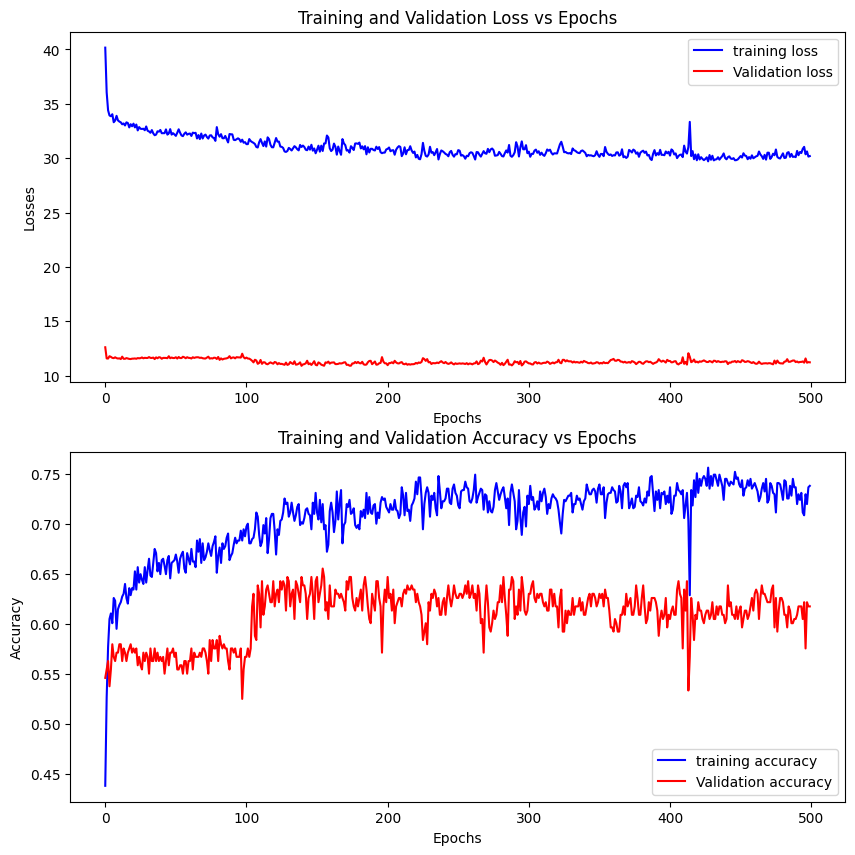

In [ ]:
fig , ax = plt.subplots(nrows=2, ncols=1, figsize = (10,10))

ax[0].plot([i for i in range(epochs)], training_history["train"]["loss"], color = "blue", label = "training loss")
ax[0].plot([i for i in range(epochs)], training_history["val"]["loss"], color = "red", label = "Validation loss")
ax[0].set_title("Training and Validation Loss vs Epochs")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Losses")
ax[0].legend(loc = "upper right")

ax[1].plot([i for i in range(epochs)], training_history["train"]["accuracy"], color = "blue", label = "training accuracy")
ax[1].plot([i for i in range(epochs)], training_history["val"]["accuracy"], color = "red", label = "Validation accuracy")
ax[1].set_title("Training and Validation Accuracy vs Epochs")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc = "lower right")

## Question: 3

Graph Classification based on Graphlet Degree Vector.

Perform a graph classification task based on graphlet degree vector count  for the NCI109 dataset from the TUDataset collection. The NCI109 dataset is a collection of 4,127 chemical compounds, where each graph represents a compound, and the nodes and edges represent atoms and bonds. Each graph in the dataset is labelled as either "active" or "inactive" against a specific cancer cell line, indicating whether the chemical compound is bioactive or not.

### A.)Extract the specific graphlet degree vector counts for each graph and take them as feature vectors for performing the graph classification task.

**Types of Graphlets**

1. G1: Triangle
2. G2: Hexagon
3. G3: Pentagon
4. G4: K4 (complete subgraphs of size 4)
5. G5: K5 (complete subgraphs of size 5)
6. G6: 6-node clique
7. G7: 4-cycle (C4)
8. G8: Star (a center node with more than 2 connections).
9. G9: Chains(linear sequences of 3 nodes or more)

For each graph, report the graphlet counts.


### B.) Graph Classification Setup:
- Implement a 3-layer simple feedforward neural network with 64 hidden layer dimensions. Standardise the features of the dataset. Split the dataset into 80% train set and 20% test set. Use the ADAM optimizer with a learning rate of 0.001. Train the model for 200 epochs and report the model's performance metrics.
- Visualize the  classification results and the features of the graphs that are important for the prediction of a chemical compound that is bioactive or not.

### Restart the Session after installing following packages

In [1]:
### Here we first downgrade torch geometric and please RESTART the session after installing the following packages
!pip install  torch_geometric==2.4.0 fsspec==2024.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not ins

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from tqdm import tqdm
import time
from itertools import combinations

from torch_geometric.data import Data, InMemoryDataset, download_url
from torch_geometric.datasets import TUDataset
from torch_geometric.utils import to_networkx


def load_TUgraph(dataset_name = "NCI109", root_dir = "/content/"):
  ### Loading the TUDataset NCI109 using Pytorch Geomteric
  dataset = TUDataset(root = root_dir, name = dataset_name)
  Graphs = []
  for i in range(len(dataset)):
    G = to_networkx(dataset[i], to_undirected= True)
    Graphs.append(G)

  return Graphs, dataset

def make_GDV(graphs, dataset, num_graphs):
  ### We make Graphlet Degree Vector and create dataset
  '''
    Here we directly extract the graphlet degree vectors from the graphs
  Types of Graphlets
    1. G1: Triangle
    2. G2: Hexagon
    3. G3: Pentagon
    4. G4: K4 (complete subgraphs of size 4)
    5. G5: K5 (complete subgraphs of size 5)
    6. G6: 6-node clique
    7. G7: 4-cycle (C4)
    8. G8: Star (a center node with more than 2 connections).
    9. G9: Chains(linear sequences of 3 nodes or more)
  '''

  keys = [f"G{i}" for i in range(1,10)]
  g_counts = {key : [0]*num_graphs for key in keys}
  targets = []


  for i in tqdm(range(num_graphs), total=num_graphs):

    # print(f"Graph = {i}")

    ### G1 : Triangles
    tri_ = sum(list(nx.triangles(graphs[i]).values()))
    g_counts["G1"][i] = tri_

    ### G2 : Hexagon
    hex_6 = len([x for x in sorted(nx.simple_cycles(graphs[i])) if len(x) == 6])
    g_counts["G2"][i] = hex_6

    ### G3 : Pentagon
    pent_5 = len([x for x in sorted(nx.simple_cycles(graphs[i])) if len(x) == 5])
    g_counts["G3"][i] = pent_5

    ### G4 : K4
    k_4 = len([s for s in list(nx.enumerate_all_cliques(graphs[i])) if len(s) == 4])
    g_counts["G4"][i] = k_4

    ### G5 : K5
    k_5 = len([s for s in list(nx.enumerate_all_cliques(graphs[i])) if len(s) == 5])
    g_counts["G5"][i] = k_5

    ### G6 : K6
    k_6 = len([s for s in list(nx.enumerate_all_cliques(graphs[i])) if len(s) == 6])
    g_counts["G6"][i] = k_6

    ### G7 : C4 (4-cycle)
    c_4 = len([x for x in sorted(nx.simple_cycles(graphs[i])) if len(x) == 4])
    g_counts["G7"][i] = c_4

    ### G8 : Star
    for node in graphs[i].nodes():
      if graphs[i].degree(node) > 2:
        g_counts["G8"][i] += 1


    ### G9 : Chains
    for u,v in list(combinations(graphs[i].nodes(),2)):
      if nx.has_path(graphs[i], source = u, target=v):
        for sp in list(nx.all_shortest_paths(graphs[i], source = u, target = v)):
          if len(sp) >= 3:
            g_counts["G9"][i] += 1


    ### Append targets
    targets.append(dataset[i].y)

  return g_counts, targets



def preprocess(features, targets):
  ### We preprocess the features by standardizing the features
  features_ = []
  scaler = StandardScaler()

  features = pd.DataFrame(features, columns=features.keys())
  features = scaler.fit_transform(features)

  features = torch.from_numpy(features)
  features = features.to(dtype=torch.float32)
  targets = torch.FloatTensor(targets)

  X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

  return X_train, y_train, X_test, y_test


def create_loaders(features, targets, batch_size = 32, test_set = False):
  ### Here we make the dataloaders
  features = torch.utils.data.TensorDataset(features, targets)
  features = torch.utils.data.DataLoader(features, batch_size = batch_size, shuffle = not test_set)
  return features


In [2]:

class GraphClassNN(nn.Module):
    def __init__(self, input_dim, output_dim, dropout = 0.1):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

    @classmethod
    def trainmethod(cls, model, optimizer, loss_fn, epochs, trainloader, device = "cpu"):
        training_history = {
        "train" : {
            "loss" : [],
            "accuracy" : [],
            "best_model_checkpoint" : None
          },
        "test" : {
            "loss" : None,
            "accuracy" : None,
            "precision" : None,
            "recall" : None,
            "f1-score" : None
          }
        }

        model.train()
        for epoch in tqdm(range(epochs), total= epochs):
            trainloss = 0

            train_preds = []
            train_targets = []


            for batch in trainloader:
                optimizer.zero_grad()
                batch[0] = batch[0].to(device = device)
                batch[1] = batch[1].to(device = device)

                predictions = model(batch[0])
                predictions = torch.squeeze(predictions, dim = 1)

                loss = loss_fn(predictions, batch[1])
                loss.backward()
                optimizer.step()
                trainloss += loss.item()

                train_preds.append(predictions.cpu().detach() > 0.5)
                train_targets.append(batch[1].cpu())

            if len(training_history["train"]["loss"]) > 1:
                if trainloss < min(training_history["train"]["loss"]):
                    training_history["train"]["best_model"] = model.state_dict()

            training_history["train"]["loss"].append(trainloss)
            training_history["train"]["accuracy"].append(accuracy_score(torch.cat(train_targets, dim = 0), torch.cat(train_preds, dim = 0)))


            print(f"Epoch {epoch} / {epochs} ---- Training Loss = {training_history['train']['loss'][-1]} TrainingAcc = {training_history['train']['accuracy'][-1]}")

        return training_history


    @classmethod
    def evaluate(cls, model, loss_fn, testloader, history, device="cpu"):
        model.eval()

        testloss = 0

        test_preds = []
        test_targets = []

        for batch in testloader:
            batch[0] = batch[0].to(device)
            batch[1] = batch[1].to(device)

            predictions = model(batch[0])
            predictions = torch.squeeze(predictions, dim = 1)

            loss = loss_fn(predictions, batch[1])
            testloss += loss.item()

            test_preds.append(predictions.cpu().detach() > 0.5)
            test_targets.append(batch[1].cpu())

        test_preds = torch.cat(test_preds, dim = 0)
        test_targets = torch.cat(test_targets, dim = 0)

        history["test"]["loss"] = testloss
        history["test"]["accuracy"] = accuracy_score(test_targets, test_preds )
        history["test"]["precision"] = precision_score(test_targets, test_preds )
        history["test"]["recall"] = recall_score(test_targets, test_preds )
        history["test"]["f1-score"] = f1_score(test_targets, test_preds)

        print(f"Test Loss = {history['test']['loss']} \n Test Acc = {history['test']['accuracy']} \n Test Precision = {history['test']['precision']} \n Test Recall = {history['test']['recall']} \n Test F1-Score = {history['test']['f1-score']}")

        return history

In [3]:
graphs, dataset = load_TUgraph(dataset_name="NCI109", root_dir="./")
features, targets = make_GDV(graphs=graphs, dataset=dataset, num_graphs=len(graphs))


Extracting ./NCI109/NCI109.zip
Processing...
Done!
100%|██████████| 4127/4127 [03:09<00:00, 21.72it/s]


In [50]:
print(f"The Graphlet features are = {features}")

The Graphlet features are = {'G1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [4]:
X_train, y_train, X_test, y_test = preprocess(features = features, targets=targets)

In [5]:
model = GraphClassNN(input_dim=9, output_dim=1)
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device=device)

trainloader = create_loaders(features=X_train, targets=y_train)
training_history = GraphClassNN.trainmethod(model=model, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)


  0%|          | 1/200 [00:00<02:51,  1.16it/s]

Epoch 0 / 200 ---- Training Loss = 68.55029034614563 TrainingAcc = 0.6252650711905483


  1%|          | 2/200 [00:01<01:36,  2.04it/s]

Epoch 1 / 200 ---- Training Loss = 64.95053443312645 TrainingAcc = 0.6501060284762193


  2%|▏         | 3/200 [00:01<01:13,  2.69it/s]

Epoch 2 / 200 ---- Training Loss = 64.24074679613113 TrainingAcc = 0.6573765525598304


  2%|▏         | 4/200 [00:01<01:02,  3.11it/s]

Epoch 3 / 200 ---- Training Loss = 64.02061188220978 TrainingAcc = 0.6598000605877007


  2%|▎         | 5/200 [00:01<00:55,  3.49it/s]

Epoch 4 / 200 ---- Training Loss = 63.61533507704735 TrainingAcc = 0.66373826113299


  3%|▎         | 6/200 [00:02<00:51,  3.79it/s]

Epoch 5 / 200 ---- Training Loss = 63.242542177438736 TrainingAcc = 0.657982429566798


  4%|▎         | 7/200 [00:02<00:49,  3.91it/s]

Epoch 6 / 200 ---- Training Loss = 63.28505343198776 TrainingAcc = 0.6631323841260224


  4%|▍         | 8/200 [00:02<00:47,  4.00it/s]

Epoch 7 / 200 ---- Training Loss = 63.18555602431297 TrainingAcc = 0.6616176916086035


  4%|▍         | 9/200 [00:02<00:46,  4.15it/s]

Epoch 8 / 200 ---- Training Loss = 62.50336083769798 TrainingAcc = 0.6673735231747955


  5%|▌         | 10/200 [00:02<00:48,  3.93it/s]

Epoch 9 / 200 ---- Training Loss = 62.60540834069252 TrainingAcc = 0.6655558921538928


  6%|▌         | 11/200 [00:03<00:51,  3.65it/s]

Epoch 10 / 200 ---- Training Loss = 62.64483067393303 TrainingAcc = 0.6700999697061496


  6%|▌         | 12/200 [00:03<00:52,  3.56it/s]

Epoch 11 / 200 ---- Training Loss = 62.16284590959549 TrainingAcc = 0.6746440472584065


  6%|▋         | 13/200 [00:03<00:52,  3.59it/s]

Epoch 12 / 200 ---- Training Loss = 62.215951919555664 TrainingAcc = 0.6673735231747955


  7%|▋         | 14/200 [00:04<00:51,  3.58it/s]

Epoch 13 / 200 ---- Training Loss = 62.3049573302269 TrainingAcc = 0.6743411087549227


  8%|▊         | 15/200 [00:04<00:53,  3.45it/s]

Epoch 14 / 200 ---- Training Loss = 61.9532890021801 TrainingAcc = 0.6731293547409876


  8%|▊         | 16/200 [00:04<00:54,  3.40it/s]

Epoch 15 / 200 ---- Training Loss = 61.760941714048386 TrainingAcc = 0.6749469857618904


  8%|▊         | 17/200 [00:05<00:53,  3.41it/s]

Epoch 16 / 200 ---- Training Loss = 61.5436789393425 TrainingAcc = 0.679794001817631


  9%|▉         | 18/200 [00:05<00:55,  3.29it/s]

Epoch 17 / 200 ---- Training Loss = 61.355147302150726 TrainingAcc = 0.6746440472584065


 10%|▉         | 19/200 [00:05<00:55,  3.26it/s]

Epoch 18 / 200 ---- Training Loss = 61.18999797105789 TrainingAcc = 0.6794910633141472


 10%|█         | 20/200 [00:05<00:50,  3.56it/s]

Epoch 19 / 200 ---- Training Loss = 61.05298638343811 TrainingAcc = 0.6767646167827931


 10%|█         | 21/200 [00:06<00:46,  3.81it/s]

Epoch 20 / 200 ---- Training Loss = 60.92158827185631 TrainingAcc = 0.6776734322932445


 11%|█         | 22/200 [00:06<00:45,  3.93it/s]

Epoch 21 / 200 ---- Training Loss = 60.86468347907066 TrainingAcc = 0.675552862768858


 12%|█▏        | 23/200 [00:06<00:43,  4.09it/s]

Epoch 22 / 200 ---- Training Loss = 60.635991752147675 TrainingAcc = 0.6825204483489852


 12%|█▏        | 24/200 [00:06<00:42,  4.18it/s]

Epoch 23 / 200 ---- Training Loss = 60.83771964907646 TrainingAcc = 0.6807028173280824


 12%|█▎        | 25/200 [00:07<00:40,  4.28it/s]

Epoch 24 / 200 ---- Training Loss = 61.064817011356354 TrainingAcc = 0.6834292638594366


 13%|█▎        | 26/200 [00:07<00:40,  4.28it/s]

Epoch 25 / 200 ---- Training Loss = 60.479044049978256 TrainingAcc = 0.6816116328385338


 14%|█▎        | 27/200 [00:07<00:40,  4.29it/s]

Epoch 26 / 200 ---- Training Loss = 60.775275617837906 TrainingAcc = 0.6822175098455013


 14%|█▍        | 28/200 [00:07<00:39,  4.36it/s]

Epoch 27 / 200 ---- Training Loss = 60.57793462276459 TrainingAcc = 0.6852468948803393


 14%|█▍        | 29/200 [00:07<00:38,  4.44it/s]

Epoch 28 / 200 ---- Training Loss = 60.64318263530731 TrainingAcc = 0.688579218418661


 15%|█▌        | 30/200 [00:08<00:38,  4.44it/s]

Epoch 29 / 200 ---- Training Loss = 60.50666815042496 TrainingAcc = 0.6807028173280824


 16%|█▌        | 31/200 [00:08<00:38,  4.36it/s]

Epoch 30 / 200 ---- Training Loss = 60.10284706950188 TrainingAcc = 0.6840351408664042


 16%|█▌        | 32/200 [00:08<00:37,  4.43it/s]

Epoch 31 / 200 ---- Training Loss = 60.322690933942795 TrainingAcc = 0.6858527718873069


 16%|█▋        | 33/200 [00:08<00:37,  4.45it/s]

Epoch 32 / 200 ---- Training Loss = 59.880280673503876 TrainingAcc = 0.6828233868524689


 17%|█▋        | 34/200 [00:09<00:37,  4.45it/s]

Epoch 33 / 200 ---- Training Loss = 60.07712686061859 TrainingAcc = 0.6846410178733717


 18%|█▊        | 35/200 [00:09<00:37,  4.45it/s]

Epoch 34 / 200 ---- Training Loss = 60.066608399152756 TrainingAcc = 0.6858527718873069


 18%|█▊        | 36/200 [00:09<00:36,  4.44it/s]

Epoch 35 / 200 ---- Training Loss = 60.19389346241951 TrainingAcc = 0.6828233868524689


 18%|█▊        | 37/200 [00:09<00:37,  4.35it/s]

Epoch 36 / 200 ---- Training Loss = 60.23903611302376 TrainingAcc = 0.6852468948803393


 19%|█▉        | 38/200 [00:09<00:36,  4.41it/s]

Epoch 37 / 200 ---- Training Loss = 59.7727447450161 TrainingAcc = 0.6825204483489852


 20%|█▉        | 39/200 [00:10<00:36,  4.45it/s]

Epoch 38 / 200 ---- Training Loss = 59.89091494679451 TrainingAcc = 0.6879733414116934


 20%|██        | 40/200 [00:10<00:36,  4.40it/s]

Epoch 39 / 200 ---- Training Loss = 60.06757789850235 TrainingAcc = 0.6861557103907907


 20%|██        | 41/200 [00:10<00:36,  4.41it/s]

Epoch 40 / 200 ---- Training Loss = 59.89384436607361 TrainingAcc = 0.6828233868524689


 21%|██        | 42/200 [00:10<00:35,  4.40it/s]

Epoch 41 / 200 ---- Training Loss = 59.510678589344025 TrainingAcc = 0.6858527718873069


 22%|██▏       | 43/200 [00:11<00:35,  4.42it/s]

Epoch 42 / 200 ---- Training Loss = 59.452378541231155 TrainingAcc = 0.6864586488942744


 22%|██▏       | 44/200 [00:11<00:35,  4.42it/s]

Epoch 43 / 200 ---- Training Loss = 59.51428407430649 TrainingAcc = 0.69009391093608


 22%|██▎       | 45/200 [00:11<00:35,  4.34it/s]

Epoch 44 / 200 ---- Training Loss = 59.468569070100784 TrainingAcc = 0.6888821569221448


 23%|██▎       | 46/200 [00:11<00:35,  4.37it/s]

Epoch 45 / 200 ---- Training Loss = 59.37105941772461 TrainingAcc = 0.6858527718873069


 24%|██▎       | 47/200 [00:12<00:34,  4.41it/s]

Epoch 46 / 200 ---- Training Loss = 59.45154333114624 TrainingAcc = 0.6852468948803393


 24%|██▍       | 48/200 [00:12<00:34,  4.37it/s]

Epoch 47 / 200 ---- Training Loss = 59.16200253367424 TrainingAcc = 0.6864586488942744


 24%|██▍       | 49/200 [00:12<00:34,  4.39it/s]

Epoch 48 / 200 ---- Training Loss = 59.21193340420723 TrainingAcc = 0.6894880339291124


 25%|██▌       | 50/200 [00:12<00:33,  4.46it/s]

Epoch 49 / 200 ---- Training Loss = 58.70676290988922 TrainingAcc = 0.6919115419569827


 26%|██▌       | 51/200 [00:12<00:33,  4.47it/s]

Epoch 50 / 200 ---- Training Loss = 59.54524403810501 TrainingAcc = 0.6837322023629203


 26%|██▌       | 52/200 [00:13<00:32,  4.50it/s]

Epoch 51 / 200 ---- Training Loss = 58.829222708940506 TrainingAcc = 0.6928203574674341


 26%|██▋       | 53/200 [00:13<00:32,  4.51it/s]

Epoch 52 / 200 ---- Training Loss = 58.90546706318855 TrainingAcc = 0.6882762799151773


 27%|██▋       | 54/200 [00:13<00:32,  4.48it/s]

Epoch 53 / 200 ---- Training Loss = 58.7651147544384 TrainingAcc = 0.6879733414116934


 28%|██▊       | 55/200 [00:13<00:32,  4.49it/s]

Epoch 54 / 200 ---- Training Loss = 59.04034534096718 TrainingAcc = 0.69009391093608


 28%|██▊       | 56/200 [00:14<00:32,  4.50it/s]

Epoch 55 / 200 ---- Training Loss = 58.72970062494278 TrainingAcc = 0.6919115419569827


 28%|██▊       | 57/200 [00:14<00:31,  4.50it/s]

Epoch 56 / 200 ---- Training Loss = 58.81614097952843 TrainingAcc = 0.6928203574674341


 29%|██▉       | 58/200 [00:14<00:32,  4.37it/s]

Epoch 57 / 200 ---- Training Loss = 58.74792197346687 TrainingAcc = 0.6888821569221448


 30%|██▉       | 59/200 [00:14<00:31,  4.46it/s]

Epoch 58 / 200 ---- Training Loss = 58.936854153871536 TrainingAcc = 0.6910027264465314


 30%|███       | 60/200 [00:14<00:31,  4.45it/s]

Epoch 59 / 200 ---- Training Loss = 58.552943259477615 TrainingAcc = 0.6913056649500151


 30%|███       | 61/200 [00:15<00:31,  4.48it/s]

Epoch 60 / 200 ---- Training Loss = 58.673831939697266 TrainingAcc = 0.6910027264465314


 31%|███       | 62/200 [00:15<00:30,  4.46it/s]

Epoch 61 / 200 ---- Training Loss = 58.44885656237602 TrainingAcc = 0.6943350499848531


 32%|███▏      | 63/200 [00:15<00:30,  4.46it/s]

Epoch 62 / 200 ---- Training Loss = 58.49083960056305 TrainingAcc = 0.6940321114813692


 32%|███▏      | 64/200 [00:15<00:33,  4.11it/s]

Epoch 63 / 200 ---- Training Loss = 58.70104306936264 TrainingAcc = 0.6946379884883369


 32%|███▎      | 65/200 [00:16<00:34,  3.91it/s]

Epoch 64 / 200 ---- Training Loss = 58.32777866721153 TrainingAcc = 0.6934262344744017


 33%|███▎      | 66/200 [00:16<00:35,  3.80it/s]

Epoch 65 / 200 ---- Training Loss = 58.293825179338455 TrainingAcc = 0.6876704029082097


 34%|███▎      | 67/200 [00:16<00:35,  3.78it/s]

Epoch 66 / 200 ---- Training Loss = 58.12660676240921 TrainingAcc = 0.6931232959709179


 34%|███▍      | 68/200 [00:17<00:35,  3.73it/s]

Epoch 67 / 200 ---- Training Loss = 58.31344348192215 TrainingAcc = 0.6913056649500151


 34%|███▍      | 69/200 [00:17<00:36,  3.62it/s]

Epoch 68 / 200 ---- Training Loss = 57.82220342755318 TrainingAcc = 0.6931232959709179


 35%|███▌      | 70/200 [00:17<00:36,  3.51it/s]

Epoch 69 / 200 ---- Training Loss = 57.5732507109642 TrainingAcc = 0.6943350499848531


 36%|███▌      | 71/200 [00:17<00:38,  3.39it/s]

Epoch 70 / 200 ---- Training Loss = 58.10775190591812 TrainingAcc = 0.6928203574674341


 36%|███▌      | 72/200 [00:18<00:39,  3.24it/s]

Epoch 71 / 200 ---- Training Loss = 57.85776329040527 TrainingAcc = 0.6913056649500151


 36%|███▋      | 73/200 [00:18<00:36,  3.51it/s]

Epoch 72 / 200 ---- Training Loss = 57.90486481785774 TrainingAcc = 0.6961526810057558


 37%|███▋      | 74/200 [00:18<00:33,  3.73it/s]

Epoch 73 / 200 ---- Training Loss = 57.24886539578438 TrainingAcc = 0.6964556195092396


 38%|███▊      | 75/200 [00:18<00:31,  3.94it/s]

Epoch 74 / 200 ---- Training Loss = 57.289653182029724 TrainingAcc = 0.6922144804604665


 38%|███▊      | 76/200 [00:19<00:30,  4.10it/s]

Epoch 75 / 200 ---- Training Loss = 57.68190264701843 TrainingAcc = 0.6982732505301423


 38%|███▊      | 77/200 [00:19<00:29,  4.17it/s]

Epoch 76 / 200 ---- Training Loss = 57.713130593299866 TrainingAcc = 0.6946379884883369


 39%|███▉      | 78/200 [00:19<00:28,  4.22it/s]

Epoch 77 / 200 ---- Training Loss = 57.52952194213867 TrainingAcc = 0.6994850045440776


 40%|███▉      | 79/200 [00:19<00:28,  4.28it/s]

Epoch 78 / 200 ---- Training Loss = 57.68936184048653 TrainingAcc = 0.7003938200545289


 40%|████      | 80/200 [00:20<00:27,  4.34it/s]

Epoch 79 / 200 ---- Training Loss = 57.29871225357056 TrainingAcc = 0.6991820660405937


 40%|████      | 81/200 [00:20<00:27,  4.33it/s]

Epoch 80 / 200 ---- Training Loss = 57.179813504219055 TrainingAcc = 0.6970614965162072


 41%|████      | 82/200 [00:20<00:26,  4.42it/s]

Epoch 81 / 200 ---- Training Loss = 57.53895744681358 TrainingAcc = 0.6985761890336262


 42%|████▏     | 83/200 [00:20<00:26,  4.43it/s]

Epoch 82 / 200 ---- Training Loss = 56.8439469859004 TrainingAcc = 0.6949409269918206


 42%|████▏     | 84/200 [00:21<00:26,  4.36it/s]

Epoch 83 / 200 ---- Training Loss = 57.37299105525017 TrainingAcc = 0.6976673735231748


 42%|████▎     | 85/200 [00:21<00:26,  4.40it/s]

Epoch 84 / 200 ---- Training Loss = 56.75466749072075 TrainingAcc = 0.6928203574674341


 43%|████▎     | 86/200 [00:21<00:25,  4.40it/s]

Epoch 85 / 200 ---- Training Loss = 56.84563586115837 TrainingAcc = 0.6961526810057558


 44%|████▎     | 87/200 [00:21<00:25,  4.46it/s]

Epoch 86 / 200 ---- Training Loss = 56.47860473394394 TrainingAcc = 0.7013026355649803


 44%|████▍     | 88/200 [00:21<00:25,  4.42it/s]

Epoch 87 / 200 ---- Training Loss = 56.890254616737366 TrainingAcc = 0.7037261435928507


 44%|████▍     | 89/200 [00:22<00:24,  4.45it/s]

Epoch 88 / 200 ---- Training Loss = 56.5135512650013 TrainingAcc = 0.69887912753711


 45%|████▌     | 90/200 [00:22<00:24,  4.41it/s]

Epoch 89 / 200 ---- Training Loss = 56.64388784766197 TrainingAcc = 0.6991820660405937


 46%|████▌     | 91/200 [00:22<00:24,  4.47it/s]

Epoch 90 / 200 ---- Training Loss = 56.628418028354645 TrainingAcc = 0.6943350499848531


 46%|████▌     | 92/200 [00:22<00:24,  4.42it/s]

Epoch 91 / 200 ---- Training Loss = 56.78476074337959 TrainingAcc = 0.6994850045440776


 46%|████▋     | 93/200 [00:23<00:23,  4.46it/s]

Epoch 92 / 200 ---- Training Loss = 56.43799701333046 TrainingAcc = 0.7019085125719479


 47%|████▋     | 94/200 [00:23<00:23,  4.45it/s]

Epoch 93 / 200 ---- Training Loss = 56.70742630958557 TrainingAcc = 0.6994850045440776


 48%|████▊     | 95/200 [00:23<00:23,  4.44it/s]

Epoch 94 / 200 ---- Training Loss = 57.02043655514717 TrainingAcc = 0.7003938200545289


 48%|████▊     | 96/200 [00:23<00:23,  4.40it/s]

Epoch 95 / 200 ---- Training Loss = 56.51785463094711 TrainingAcc = 0.704634959103302


 48%|████▊     | 97/200 [00:23<00:23,  4.34it/s]

Epoch 96 / 200 ---- Training Loss = 56.59408360719681 TrainingAcc = 0.6991820660405937


 49%|████▉     | 98/200 [00:24<00:23,  4.37it/s]

Epoch 97 / 200 ---- Training Loss = 56.13138461112976 TrainingAcc = 0.6970614965162072


 50%|████▉     | 99/200 [00:24<00:23,  4.34it/s]

Epoch 98 / 200 ---- Training Loss = 56.24904349446297 TrainingAcc = 0.7079672826416238


 50%|█████     | 100/200 [00:24<00:22,  4.42it/s]

Epoch 99 / 200 ---- Training Loss = 56.72778460383415 TrainingAcc = 0.7040290820963344


 50%|█████     | 101/200 [00:24<00:22,  4.35it/s]

Epoch 100 / 200 ---- Training Loss = 55.752056524157524 TrainingAcc = 0.7082702211451075


 51%|█████     | 102/200 [00:25<00:22,  4.44it/s]

Epoch 101 / 200 ---- Training Loss = 56.18265473842621 TrainingAcc = 0.6997879430475613


 52%|█████▏    | 103/200 [00:25<00:21,  4.44it/s]

Epoch 102 / 200 ---- Training Loss = 56.10072618722916 TrainingAcc = 0.7082702211451075


 52%|█████▏    | 104/200 [00:25<00:21,  4.48it/s]

Epoch 103 / 200 ---- Training Loss = 56.38781663775444 TrainingAcc = 0.7070584671311724


 52%|█████▎    | 105/200 [00:25<00:21,  4.50it/s]

Epoch 104 / 200 ---- Training Loss = 56.16813921928406 TrainingAcc = 0.7006967585580127


 53%|█████▎    | 106/200 [00:25<00:21,  4.37it/s]

Epoch 105 / 200 ---- Training Loss = 55.94277936220169 TrainingAcc = 0.7006967585580127


 54%|█████▎    | 107/200 [00:26<00:20,  4.43it/s]

Epoch 106 / 200 ---- Training Loss = 56.171801298856735 TrainingAcc = 0.7025143895789154


 54%|█████▍    | 108/200 [00:26<00:20,  4.43it/s]

Epoch 107 / 200 ---- Training Loss = 56.08844205737114 TrainingAcc = 0.7064525901242048


 55%|█████▍    | 109/200 [00:26<00:20,  4.49it/s]

Epoch 108 / 200 ---- Training Loss = 55.54139322042465 TrainingAcc = 0.7091790366555589


 55%|█████▌    | 110/200 [00:26<00:20,  4.36it/s]

Epoch 109 / 200 ---- Training Loss = 55.429224252700806 TrainingAcc = 0.7055437746137534


 56%|█████▌    | 111/200 [00:27<00:20,  4.44it/s]

Epoch 110 / 200 ---- Training Loss = 55.58790931105614 TrainingAcc = 0.7070584671311724


 56%|█████▌    | 112/200 [00:27<00:19,  4.43it/s]

Epoch 111 / 200 ---- Training Loss = 56.25543037056923 TrainingAcc = 0.7088760981520751


 56%|█████▋    | 113/200 [00:27<00:19,  4.47it/s]

Epoch 112 / 200 ---- Training Loss = 55.53396114706993 TrainingAcc = 0.7082702211451075


 57%|█████▋    | 114/200 [00:27<00:19,  4.46it/s]

Epoch 113 / 200 ---- Training Loss = 55.872100204229355 TrainingAcc = 0.7067555286276885


 57%|█████▊    | 115/200 [00:27<00:19,  4.44it/s]

Epoch 114 / 200 ---- Training Loss = 55.81586506962776 TrainingAcc = 0.7064525901242048


 58%|█████▊    | 116/200 [00:28<00:19,  4.41it/s]

Epoch 115 / 200 ---- Training Loss = 55.91052380204201 TrainingAcc = 0.7064525901242048


 58%|█████▊    | 117/200 [00:28<00:20,  4.11it/s]

Epoch 116 / 200 ---- Training Loss = 56.25279450416565 TrainingAcc = 0.7043320205998183


 59%|█████▉    | 118/200 [00:28<00:20,  3.91it/s]

Epoch 117 / 200 ---- Training Loss = 55.65984866023064 TrainingAcc = 0.7082702211451075


 60%|█████▉    | 119/200 [00:29<00:21,  3.74it/s]

Epoch 118 / 200 ---- Training Loss = 55.45927572250366 TrainingAcc = 0.7091790366555589


 60%|██████    | 120/200 [00:29<00:21,  3.76it/s]

Epoch 119 / 200 ---- Training Loss = 55.50306245684624 TrainingAcc = 0.7085731596485914


 60%|██████    | 121/200 [00:29<00:21,  3.65it/s]

Epoch 120 / 200 ---- Training Loss = 55.116346657276154 TrainingAcc = 0.7049378976067858


 61%|██████    | 122/200 [00:29<00:21,  3.61it/s]

Epoch 121 / 200 ---- Training Loss = 55.32468545436859 TrainingAcc = 0.7100878521660103


 62%|██████▏   | 123/200 [00:30<00:22,  3.48it/s]

Epoch 122 / 200 ---- Training Loss = 55.16725319623947 TrainingAcc = 0.7112996061799455


 62%|██████▏   | 124/200 [00:30<00:22,  3.41it/s]

Epoch 123 / 200 ---- Training Loss = 55.1717843413353 TrainingAcc = 0.7128142986973645


 62%|██████▎   | 125/200 [00:30<00:22,  3.40it/s]

Epoch 124 / 200 ---- Training Loss = 54.686484321951866 TrainingAcc = 0.7140260527112996


 63%|██████▎   | 126/200 [00:31<00:20,  3.62it/s]

Epoch 125 / 200 ---- Training Loss = 55.46096932888031 TrainingAcc = 0.7106937291729779


 64%|██████▎   | 127/200 [00:31<00:19,  3.83it/s]

Epoch 126 / 200 ---- Training Loss = 55.355012118816376 TrainingAcc = 0.7106937291729779


 64%|██████▍   | 128/200 [00:31<00:18,  3.89it/s]

Epoch 127 / 200 ---- Training Loss = 54.98760011792183 TrainingAcc = 0.7146319297182672


 64%|██████▍   | 129/200 [00:31<00:17,  3.99it/s]

Epoch 128 / 200 ---- Training Loss = 55.21336728334427 TrainingAcc = 0.7161466222356861


 65%|██████▌   | 130/200 [00:32<00:16,  4.13it/s]

Epoch 129 / 200 ---- Training Loss = 54.842069536447525 TrainingAcc = 0.7103907906694941


 66%|██████▌   | 131/200 [00:32<00:16,  4.21it/s]

Epoch 130 / 200 ---- Training Loss = 54.61643445491791 TrainingAcc = 0.7091790366555589


 66%|██████▌   | 132/200 [00:32<00:15,  4.27it/s]

Epoch 131 / 200 ---- Training Loss = 54.88336306810379 TrainingAcc = 0.7176613147531051


 66%|██████▋   | 133/200 [00:32<00:15,  4.37it/s]

Epoch 132 / 200 ---- Training Loss = 54.55903351306915 TrainingAcc = 0.71644956073917


 67%|██████▋   | 134/200 [00:32<00:14,  4.43it/s]

Epoch 133 / 200 ---- Training Loss = 54.45118108391762 TrainingAcc = 0.7152378067252347


 68%|██████▊   | 135/200 [00:33<00:14,  4.43it/s]

Epoch 134 / 200 ---- Training Loss = 54.812211096286774 TrainingAcc = 0.7173583762496213


 68%|██████▊   | 136/200 [00:33<00:14,  4.43it/s]

Epoch 135 / 200 ---- Training Loss = 54.53386598825455 TrainingAcc = 0.7194789457740078


 68%|██████▊   | 137/200 [00:33<00:14,  4.35it/s]

Epoch 136 / 200 ---- Training Loss = 54.471334993839264 TrainingAcc = 0.7176613147531051


 69%|██████▉   | 138/200 [00:33<00:14,  4.37it/s]

Epoch 137 / 200 ---- Training Loss = 55.832552433013916 TrainingAcc = 0.7070584671311724


 70%|██████▉   | 139/200 [00:34<00:13,  4.42it/s]

Epoch 138 / 200 ---- Training Loss = 54.68394321203232 TrainingAcc = 0.7212965767949107


 70%|███████   | 140/200 [00:34<00:13,  4.39it/s]

Epoch 139 / 200 ---- Training Loss = 54.4743155837059 TrainingAcc = 0.7167524992426537


 70%|███████   | 141/200 [00:34<00:13,  4.38it/s]

Epoch 140 / 200 ---- Training Loss = 54.201390594244 TrainingAcc = 0.7152378067252347


 71%|███████   | 142/200 [00:34<00:13,  4.42it/s]

Epoch 141 / 200 ---- Training Loss = 54.43321815133095 TrainingAcc = 0.7167524992426537


 72%|███████▏  | 143/200 [00:34<00:12,  4.43it/s]

Epoch 142 / 200 ---- Training Loss = 53.908411741256714 TrainingAcc = 0.7212965767949107


 72%|███████▏  | 144/200 [00:35<00:12,  4.43it/s]

Epoch 143 / 200 ---- Training Loss = 54.00009968876839 TrainingAcc = 0.7225083308088458


 72%|███████▎  | 145/200 [00:35<00:12,  4.40it/s]

Epoch 144 / 200 ---- Training Loss = 54.30348280072212 TrainingAcc = 0.7188730687670403


 73%|███████▎  | 146/200 [00:35<00:12,  4.43it/s]

Epoch 145 / 200 ---- Training Loss = 54.17779451608658 TrainingAcc = 0.7155407452287186


 74%|███████▎  | 147/200 [00:35<00:11,  4.44it/s]

Epoch 146 / 200 ---- Training Loss = 54.47135370969772 TrainingAcc = 0.7128142986973645


 74%|███████▍  | 148/200 [00:36<00:11,  4.50it/s]

Epoch 147 / 200 ---- Training Loss = 54.28274965286255 TrainingAcc = 0.7152378067252347


 74%|███████▍  | 149/200 [00:36<00:11,  4.42it/s]

Epoch 148 / 200 ---- Training Loss = 54.315221309661865 TrainingAcc = 0.7197818842774917


 75%|███████▌  | 150/200 [00:36<00:11,  4.49it/s]

Epoch 149 / 200 ---- Training Loss = 53.695665061473846 TrainingAcc = 0.7155407452287186


 76%|███████▌  | 151/200 [00:36<00:10,  4.51it/s]

Epoch 150 / 200 ---- Training Loss = 53.80290800333023 TrainingAcc = 0.7240230233262648


 76%|███████▌  | 152/200 [00:36<00:10,  4.52it/s]

Epoch 151 / 200 ---- Training Loss = 53.67790639400482 TrainingAcc = 0.7246289003332324


 76%|███████▋  | 153/200 [00:37<00:10,  4.49it/s]

Epoch 152 / 200 ---- Training Loss = 53.701387375593185 TrainingAcc = 0.7255377158436838


 77%|███████▋  | 154/200 [00:37<00:10,  4.47it/s]

Epoch 153 / 200 ---- Training Loss = 53.51958441734314 TrainingAcc = 0.722205392305362


 78%|███████▊  | 155/200 [00:37<00:09,  4.50it/s]

Epoch 154 / 200 ---- Training Loss = 53.44193571805954 TrainingAcc = 0.7237200848227809


 78%|███████▊  | 156/200 [00:37<00:09,  4.45it/s]

Epoch 155 / 200 ---- Training Loss = 53.68832731246948 TrainingAcc = 0.7267494698576189


 78%|███████▊  | 157/200 [00:38<00:09,  4.53it/s]

Epoch 156 / 200 ---- Training Loss = 57.116984248161316 TrainingAcc = 0.7125113601938806


 79%|███████▉  | 158/200 [00:38<00:09,  4.40it/s]

Epoch 157 / 200 ---- Training Loss = 56.02571123838425 TrainingAcc = 0.7158436837322024


 80%|███████▉  | 159/200 [00:38<00:09,  4.48it/s]

Epoch 158 / 200 ---- Training Loss = 53.63763466477394 TrainingAcc = 0.7270524083611027


 80%|████████  | 160/200 [00:38<00:08,  4.50it/s]

Epoch 159 / 200 ---- Training Loss = 53.691859662532806 TrainingAcc = 0.727961223871554


 80%|████████  | 161/200 [00:38<00:08,  4.51it/s]

Epoch 160 / 200 ---- Training Loss = 53.51840391755104 TrainingAcc = 0.7258406543471675


 81%|████████  | 162/200 [00:39<00:08,  4.54it/s]

Epoch 161 / 200 ---- Training Loss = 53.30345618724823 TrainingAcc = 0.7255377158436838


 82%|████████▏ | 163/200 [00:39<00:08,  4.43it/s]

Epoch 162 / 200 ---- Training Loss = 53.67820757627487 TrainingAcc = 0.7197818842774917


 82%|████████▏ | 164/200 [00:39<00:08,  4.48it/s]

Epoch 163 / 200 ---- Training Loss = 53.29550591111183 TrainingAcc = 0.7258406543471675


 82%|████████▎ | 165/200 [00:39<00:07,  4.44it/s]

Epoch 164 / 200 ---- Training Loss = 53.34773546457291 TrainingAcc = 0.7258406543471675


 83%|████████▎ | 166/200 [00:40<00:07,  4.50it/s]

Epoch 165 / 200 ---- Training Loss = 53.383229821920395 TrainingAcc = 0.7270524083611027


 84%|████████▎ | 167/200 [00:40<00:07,  4.41it/s]

Epoch 166 / 200 ---- Training Loss = 53.78781616687775 TrainingAcc = 0.722205392305362


 84%|████████▍ | 168/200 [00:40<00:07,  4.46it/s]

Epoch 167 / 200 ---- Training Loss = 53.003697872161865 TrainingAcc = 0.7219024538018782


 84%|████████▍ | 169/200 [00:40<00:06,  4.47it/s]

Epoch 168 / 200 ---- Training Loss = 53.12169203162193 TrainingAcc = 0.7270524083611027


 85%|████████▌ | 170/200 [00:41<00:07,  4.15it/s]

Epoch 169 / 200 ---- Training Loss = 52.926837116479874 TrainingAcc = 0.7261435928506513


 86%|████████▌ | 171/200 [00:41<00:07,  3.92it/s]

Epoch 170 / 200 ---- Training Loss = 53.43507185578346 TrainingAcc = 0.7288700393820055


 86%|████████▌ | 172/200 [00:41<00:07,  3.81it/s]

Epoch 171 / 200 ---- Training Loss = 53.312359273433685 TrainingAcc = 0.7282641623750379


 86%|████████▋ | 173/200 [00:41<00:07,  3.79it/s]

Epoch 172 / 200 ---- Training Loss = 52.781152576208115 TrainingAcc = 0.7291729778854893


 87%|████████▋ | 174/200 [00:42<00:07,  3.63it/s]

Epoch 173 / 200 ---- Training Loss = 52.617526203393936 TrainingAcc = 0.7234171463192972


 88%|████████▊ | 175/200 [00:42<00:07,  3.51it/s]

Epoch 174 / 200 ---- Training Loss = 52.968204855918884 TrainingAcc = 0.7303847318994244


 88%|████████▊ | 176/200 [00:42<00:06,  3.45it/s]

Epoch 175 / 200 ---- Training Loss = 52.290041625499725 TrainingAcc = 0.7297788548924569


 88%|████████▊ | 177/200 [00:43<00:06,  3.39it/s]

Epoch 176 / 200 ---- Training Loss = 53.29849851131439 TrainingAcc = 0.7334141169342624


 89%|████████▉ | 178/200 [00:43<00:06,  3.36it/s]

Epoch 177 / 200 ---- Training Loss = 53.19487193226814 TrainingAcc = 0.7249318388367162


 90%|████████▉ | 179/200 [00:43<00:05,  3.65it/s]

Epoch 178 / 200 ---- Training Loss = 52.59199869632721 TrainingAcc = 0.7219024538018782


 90%|█████████ | 180/200 [00:43<00:05,  3.86it/s]

Epoch 179 / 200 ---- Training Loss = 52.710033506155014 TrainingAcc = 0.7291729778854893


 90%|█████████ | 181/200 [00:44<00:04,  4.04it/s]

Epoch 180 / 200 ---- Training Loss = 52.65215942263603 TrainingAcc = 0.7225083308088458


 91%|█████████ | 182/200 [00:44<00:04,  4.10it/s]

Epoch 181 / 200 ---- Training Loss = 52.02537877857685 TrainingAcc = 0.7322023629203271


 92%|█████████▏| 183/200 [00:44<00:04,  4.17it/s]

Epoch 182 / 200 ---- Training Loss = 52.37461531162262 TrainingAcc = 0.7234171463192972


 92%|█████████▏| 184/200 [00:44<00:03,  4.27it/s]

Epoch 183 / 200 ---- Training Loss = 53.10450425744057 TrainingAcc = 0.7276582853680703


 92%|█████████▎| 185/200 [00:44<00:03,  4.36it/s]

Epoch 184 / 200 ---- Training Loss = 52.75670149922371 TrainingAcc = 0.7334141169342624


 93%|█████████▎| 186/200 [00:45<00:03,  4.41it/s]

Epoch 185 / 200 ---- Training Loss = 52.851498067379 TrainingAcc = 0.7291729778854893


 94%|█████████▎| 187/200 [00:45<00:02,  4.34it/s]

Epoch 186 / 200 ---- Training Loss = 52.49633523821831 TrainingAcc = 0.7240230233262648


 94%|█████████▍| 188/200 [00:45<00:02,  4.40it/s]

Epoch 187 / 200 ---- Training Loss = 51.94956675171852 TrainingAcc = 0.7337170554377461


 94%|█████████▍| 189/200 [00:45<00:02,  4.38it/s]

Epoch 188 / 200 ---- Training Loss = 52.31009319424629 TrainingAcc = 0.7276582853680703


 95%|█████████▌| 190/200 [00:46<00:02,  4.43it/s]

Epoch 189 / 200 ---- Training Loss = 52.46470284461975 TrainingAcc = 0.7258406543471675


 96%|█████████▌| 191/200 [00:46<00:02,  4.38it/s]

Epoch 190 / 200 ---- Training Loss = 51.966283053159714 TrainingAcc = 0.7328082399272947


 96%|█████████▌| 192/200 [00:46<00:01,  4.41it/s]

Epoch 191 / 200 ---- Training Loss = 52.07948109507561 TrainingAcc = 0.7288700393820055


 96%|█████████▋| 193/200 [00:46<00:01,  4.39it/s]

Epoch 192 / 200 ---- Training Loss = 51.64037802815437 TrainingAcc = 0.7364435019691002


 97%|█████████▋| 194/200 [00:46<00:01,  4.45it/s]

Epoch 193 / 200 ---- Training Loss = 51.62862318754196 TrainingAcc = 0.7346258709481975


 98%|█████████▊| 195/200 [00:47<00:01,  4.48it/s]

Epoch 194 / 200 ---- Training Loss = 51.909809440374374 TrainingAcc = 0.7334141169342624


 98%|█████████▊| 196/200 [00:47<00:00,  4.32it/s]

Epoch 195 / 200 ---- Training Loss = 52.01660403609276 TrainingAcc = 0.732505301423811


 98%|█████████▊| 197/200 [00:47<00:00,  4.38it/s]

Epoch 196 / 200 ---- Training Loss = 51.72607606649399 TrainingAcc = 0.7288700393820055


 99%|█████████▉| 198/200 [00:47<00:00,  4.37it/s]

Epoch 197 / 200 ---- Training Loss = 52.57957565784454 TrainingAcc = 0.7306876704029082


100%|█████████▉| 199/200 [00:48<00:00,  4.32it/s]

Epoch 198 / 200 ---- Training Loss = 53.33982488512993 TrainingAcc = 0.7267494698576189


100%|██████████| 200/200 [00:48<00:00,  4.13it/s]

Epoch 199 / 200 ---- Training Loss = 52.50594598054886 TrainingAcc = 0.7270524083611027


In [6]:
best_model = GraphClassNN(input_dim=9, output_dim=1)
best_model.load_state_dict(training_history["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 20.93321332335472 
 Test Acc = 0.6743341404358354 
 Test Precision = 0.6579634464751958 
 Test Recall = 0.6461538461538462 
 Test F1-Score = 0.6520051746442431


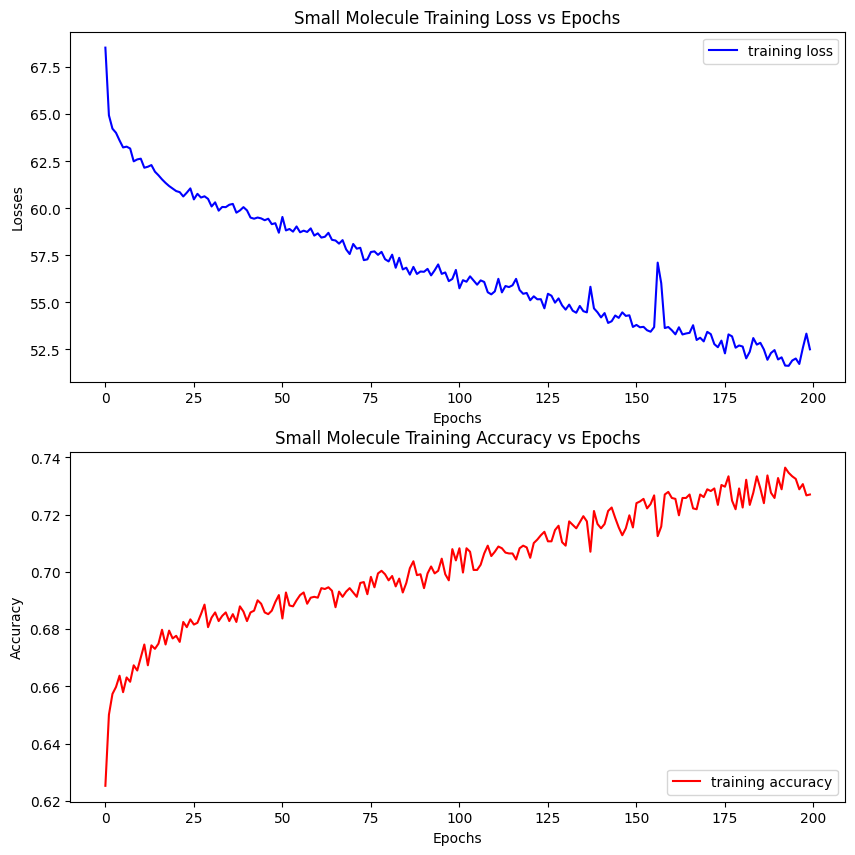

In [7]:
fig , ax = plt.subplots(nrows=2, ncols=1, figsize = (10,10))

ax[0].plot([i for i in range(200)], training_history["train"]["loss"], color = "blue", label = "training loss")
ax[0].set_title("Small Molecule Training Loss vs Epochs")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Losses")
ax[0].legend(loc = "upper right")

ax[1].plot([i for i in range(200)], training_history["train"]["accuracy"], color = "red", label = "training accuracy")
ax[1].set_title("Small Molecule Training Accuracy vs Epochs")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc = "lower right")

## Feature Importance or Ablation study

Baseline test accuracy = 0.67433

We report the decrease in test accuracy when some features are removed.

In [21]:
import random
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

## Drop G1 first

In [22]:
### We drop G1 first and repeat training and test
features_drop_g1 = {key : val for key, val in features.items() if key != "G1"}

X_train_drop_g1, y_train, X_test, y_test = preprocess(features = features_drop_g1, targets=targets)
model_drop_g1 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g1.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g1.to(device=device)

trainloader = create_loaders(features=X_train_drop_g1, targets=y_train)
training_history_drop_g1 = GraphClassNN.trainmethod(model=model_drop_g1, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<00:45,  4.38it/s]

Epoch 0 / 200 ---- Training Loss = 67.9056116938591 TrainingAcc = 0.6207209936382915


  1%|          | 2/200 [00:00<00:50,  3.96it/s]

Epoch 1 / 200 ---- Training Loss = 65.13233685493469 TrainingAcc = 0.6455619509239624


  2%|▏         | 3/200 [00:00<00:48,  4.07it/s]

Epoch 2 / 200 ---- Training Loss = 64.40399703383446 TrainingAcc = 0.6543471675249924


  2%|▏         | 4/200 [00:00<00:48,  4.05it/s]

Epoch 3 / 200 ---- Training Loss = 64.01985886693001 TrainingAcc = 0.6561647985458952


  2%|▎         | 5/200 [00:01<00:46,  4.16it/s]

Epoch 4 / 200 ---- Training Loss = 64.00153675675392 TrainingAcc = 0.6607088760981521


  3%|▎         | 6/200 [00:01<00:46,  4.13it/s]

Epoch 5 / 200 ---- Training Loss = 63.81998869776726 TrainingAcc = 0.6604059375946683


  4%|▎         | 7/200 [00:01<00:45,  4.27it/s]

Epoch 6 / 200 ---- Training Loss = 63.37919306755066 TrainingAcc = 0.6691911541956983


  4%|▍         | 8/200 [00:01<00:45,  4.25it/s]

Epoch 7 / 200 ---- Training Loss = 63.41275483369827 TrainingAcc = 0.6676764616782793


  4%|▍         | 9/200 [00:02<00:44,  4.34it/s]

Epoch 8 / 200 ---- Training Loss = 63.01422542333603 TrainingAcc = 0.6658588306573765


  5%|▌         | 10/200 [00:02<00:44,  4.26it/s]

Epoch 9 / 200 ---- Training Loss = 62.76021158695221 TrainingAcc = 0.6722205392305362


  6%|▌         | 11/200 [00:02<00:44,  4.27it/s]

Epoch 10 / 200 ---- Training Loss = 62.47331976890564 TrainingAcc = 0.6631323841260224


  6%|▌         | 12/200 [00:02<00:43,  4.36it/s]

Epoch 11 / 200 ---- Training Loss = 62.32629641890526 TrainingAcc = 0.6773704937897607


  6%|▋         | 13/200 [00:03<00:43,  4.31it/s]

Epoch 12 / 200 ---- Training Loss = 62.24485424160957 TrainingAcc = 0.6743411087549227


  7%|▋         | 14/200 [00:03<00:42,  4.35it/s]

Epoch 13 / 200 ---- Training Loss = 62.00298425555229 TrainingAcc = 0.6749469857618904


  8%|▊         | 15/200 [00:03<00:43,  4.27it/s]

Epoch 14 / 200 ---- Training Loss = 62.04872074723244 TrainingAcc = 0.674038170251439


  8%|▊         | 16/200 [00:03<00:41,  4.39it/s]

Epoch 15 / 200 ---- Training Loss = 61.63353469967842 TrainingAcc = 0.6743411087549227


  8%|▊         | 17/200 [00:03<00:41,  4.43it/s]

Epoch 16 / 200 ---- Training Loss = 61.94807183742523 TrainingAcc = 0.6749469857618904


  9%|▉         | 18/200 [00:04<00:40,  4.45it/s]

Epoch 17 / 200 ---- Training Loss = 61.150147527456284 TrainingAcc = 0.671008785216601


 10%|▉         | 19/200 [00:04<00:41,  4.38it/s]

Epoch 18 / 200 ---- Training Loss = 61.16012233495712 TrainingAcc = 0.6794910633141472


 10%|█         | 20/200 [00:04<00:41,  4.39it/s]

Epoch 19 / 200 ---- Training Loss = 61.23080985248089 TrainingAcc = 0.6722205392305362


 10%|█         | 21/200 [00:04<00:40,  4.42it/s]

Epoch 20 / 200 ---- Training Loss = 61.51617416739464 TrainingAcc = 0.6749469857618904


 11%|█         | 22/200 [00:05<00:40,  4.41it/s]

Epoch 21 / 200 ---- Training Loss = 61.02038484811783 TrainingAcc = 0.6794910633141472


 12%|█▏        | 23/200 [00:05<00:40,  4.38it/s]

Epoch 22 / 200 ---- Training Loss = 61.116989970207214 TrainingAcc = 0.6764616782793093


 12%|█▏        | 24/200 [00:05<00:40,  4.36it/s]

Epoch 23 / 200 ---- Training Loss = 61.06163689494133 TrainingAcc = 0.6807028173280824


 12%|█▎        | 25/200 [00:05<00:39,  4.42it/s]

Epoch 24 / 200 ---- Training Loss = 61.303282737731934 TrainingAcc = 0.6791881248106635


 13%|█▎        | 26/200 [00:06<00:39,  4.43it/s]

Epoch 25 / 200 ---- Training Loss = 61.12138012051582 TrainingAcc = 0.675552862768858


 14%|█▎        | 27/200 [00:06<00:39,  4.41it/s]

Epoch 26 / 200 ---- Training Loss = 60.61494481563568 TrainingAcc = 0.6779763707967282


 14%|█▍        | 28/200 [00:06<00:39,  4.31it/s]

Epoch 27 / 200 ---- Training Loss = 60.90821546316147 TrainingAcc = 0.6764616782793093


 14%|█▍        | 29/200 [00:06<00:39,  4.30it/s]

Epoch 28 / 200 ---- Training Loss = 60.71975889801979 TrainingAcc = 0.6794910633141472


 15%|█▌        | 30/200 [00:06<00:39,  4.33it/s]

Epoch 29 / 200 ---- Training Loss = 60.66278213262558 TrainingAcc = 0.6794910633141472


 16%|█▌        | 31/200 [00:07<00:38,  4.35it/s]

Epoch 30 / 200 ---- Training Loss = 60.276625633239746 TrainingAcc = 0.6819145713420176


 16%|█▌        | 32/200 [00:07<00:38,  4.32it/s]

Epoch 31 / 200 ---- Training Loss = 60.55658262968063 TrainingAcc = 0.6825204483489852


 16%|█▋        | 33/200 [00:07<00:38,  4.35it/s]

Epoch 32 / 200 ---- Training Loss = 60.334804862737656 TrainingAcc = 0.6831263253559527


 17%|█▋        | 34/200 [00:07<00:38,  4.32it/s]

Epoch 33 / 200 ---- Training Loss = 60.04135873913765 TrainingAcc = 0.6843380793698879


 18%|█▊        | 35/200 [00:08<00:38,  4.31it/s]

Epoch 34 / 200 ---- Training Loss = 60.19351923465729 TrainingAcc = 0.6816116328385338


 18%|█▊        | 36/200 [00:08<00:38,  4.24it/s]

Epoch 35 / 200 ---- Training Loss = 60.78296595811844 TrainingAcc = 0.6831263253559527


 18%|█▊        | 37/200 [00:08<00:38,  4.26it/s]

Epoch 36 / 200 ---- Training Loss = 60.07006314396858 TrainingAcc = 0.6831263253559527


 19%|█▉        | 38/200 [00:08<00:37,  4.34it/s]

Epoch 37 / 200 ---- Training Loss = 59.98336210846901 TrainingAcc = 0.6782793093002121


 20%|█▉        | 39/200 [00:09<00:36,  4.36it/s]

Epoch 38 / 200 ---- Training Loss = 60.20900413393974 TrainingAcc = 0.6834292638594366


 20%|██        | 40/200 [00:09<00:37,  4.26it/s]

Epoch 39 / 200 ---- Training Loss = 59.89852228760719 TrainingAcc = 0.6858527718873069


 20%|██        | 41/200 [00:09<00:40,  3.93it/s]

Epoch 40 / 200 ---- Training Loss = 60.05810558795929 TrainingAcc = 0.6825204483489852


 21%|██        | 42/200 [00:09<00:41,  3.85it/s]

Epoch 41 / 200 ---- Training Loss = 59.757086396217346 TrainingAcc = 0.6882762799151773


 22%|██▏       | 43/200 [00:10<00:41,  3.80it/s]

Epoch 42 / 200 ---- Training Loss = 59.969130128622055 TrainingAcc = 0.6855498333838231


 22%|██▏       | 44/200 [00:10<00:42,  3.71it/s]

Epoch 43 / 200 ---- Training Loss = 59.78081178665161 TrainingAcc = 0.6864586488942744


 22%|██▎       | 45/200 [00:10<00:43,  3.54it/s]

Epoch 44 / 200 ---- Training Loss = 59.44523939490318 TrainingAcc = 0.6861557103907907


 23%|██▎       | 46/200 [00:11<00:44,  3.49it/s]

Epoch 45 / 200 ---- Training Loss = 59.60124585032463 TrainingAcc = 0.6828233868524689


 24%|██▎       | 47/200 [00:11<00:46,  3.31it/s]

Epoch 46 / 200 ---- Training Loss = 59.55257427692413 TrainingAcc = 0.6873674644047258


 24%|██▍       | 48/200 [00:11<00:46,  3.28it/s]

Epoch 47 / 200 ---- Training Loss = 59.04968538880348 TrainingAcc = 0.6910027264465314


 24%|██▍       | 49/200 [00:11<00:46,  3.27it/s]

Epoch 48 / 200 ---- Training Loss = 59.195544213056564 TrainingAcc = 0.6897909724325961


 25%|██▌       | 50/200 [00:12<00:43,  3.42it/s]

Epoch 49 / 200 ---- Training Loss = 59.666590839624405 TrainingAcc = 0.6864586488942744


 26%|██▌       | 51/200 [00:12<00:40,  3.65it/s]

Epoch 50 / 200 ---- Training Loss = 59.079595893621445 TrainingAcc = 0.6855498333838231


 26%|██▌       | 52/200 [00:12<00:41,  3.59it/s]

Epoch 51 / 200 ---- Training Loss = 58.89118438959122 TrainingAcc = 0.6913056649500151


 26%|██▋       | 53/200 [00:13<00:42,  3.47it/s]

Epoch 52 / 200 ---- Training Loss = 58.76160219311714 TrainingAcc = 0.6913056649500151


 27%|██▋       | 54/200 [00:13<00:40,  3.61it/s]

Epoch 53 / 200 ---- Training Loss = 59.091691344976425 TrainingAcc = 0.6852468948803393


 28%|██▊       | 55/200 [00:13<00:38,  3.79it/s]

Epoch 54 / 200 ---- Training Loss = 58.95782408118248 TrainingAcc = 0.6906997879430475


 28%|██▊       | 56/200 [00:13<00:36,  3.94it/s]

Epoch 55 / 200 ---- Training Loss = 59.18185269832611 TrainingAcc = 0.6897909724325961


 28%|██▊       | 57/200 [00:13<00:34,  4.09it/s]

Epoch 56 / 200 ---- Training Loss = 58.775319278240204 TrainingAcc = 0.6925174189639504


 29%|██▉       | 58/200 [00:14<00:33,  4.21it/s]

Epoch 57 / 200 ---- Training Loss = 58.73592785000801 TrainingAcc = 0.691608603453499


 30%|██▉       | 59/200 [00:14<00:32,  4.28it/s]

Epoch 58 / 200 ---- Training Loss = 58.79501464962959 TrainingAcc = 0.6906997879430475


 30%|███       | 60/200 [00:14<00:32,  4.35it/s]

Epoch 59 / 200 ---- Training Loss = 58.725052267313 TrainingAcc = 0.6928203574674341


 30%|███       | 61/200 [00:14<00:32,  4.34it/s]

Epoch 60 / 200 ---- Training Loss = 58.53723627328873 TrainingAcc = 0.688579218418661


 31%|███       | 62/200 [00:15<00:31,  4.38it/s]

Epoch 61 / 200 ---- Training Loss = 58.18681898713112 TrainingAcc = 0.695849742502272


 32%|███▏      | 63/200 [00:15<00:31,  4.38it/s]

Epoch 62 / 200 ---- Training Loss = 58.58865958452225 TrainingAcc = 0.6931232959709179


 32%|███▏      | 64/200 [00:15<00:30,  4.40it/s]

Epoch 63 / 200 ---- Training Loss = 58.301283061504364 TrainingAcc = 0.6964556195092396


 32%|███▎      | 65/200 [00:15<00:30,  4.39it/s]

Epoch 64 / 200 ---- Training Loss = 58.035090416669846 TrainingAcc = 0.6925174189639504


 33%|███▎      | 66/200 [00:16<00:30,  4.42it/s]

Epoch 65 / 200 ---- Training Loss = 58.0959589779377 TrainingAcc = 0.6982732505301423


 34%|███▎      | 67/200 [00:16<00:30,  4.42it/s]

Epoch 66 / 200 ---- Training Loss = 58.49318706989288 TrainingAcc = 0.6982732505301423


 34%|███▍      | 68/200 [00:16<00:30,  4.36it/s]

Epoch 67 / 200 ---- Training Loss = 57.87033149600029 TrainingAcc = 0.6922144804604665


 34%|███▍      | 69/200 [00:16<00:29,  4.39it/s]

Epoch 68 / 200 ---- Training Loss = 58.08029815554619 TrainingAcc = 0.6970614965162072


 35%|███▌      | 70/200 [00:16<00:29,  4.37it/s]

Epoch 69 / 200 ---- Training Loss = 57.6869452893734 TrainingAcc = 0.6976673735231748


 36%|███▌      | 71/200 [00:17<00:29,  4.42it/s]

Epoch 70 / 200 ---- Training Loss = 57.71671196818352 TrainingAcc = 0.7006967585580127


 36%|███▌      | 72/200 [00:17<00:29,  4.41it/s]

Epoch 71 / 200 ---- Training Loss = 58.20639508962631 TrainingAcc = 0.69887912753711


 36%|███▋      | 73/200 [00:17<00:28,  4.42it/s]

Epoch 72 / 200 ---- Training Loss = 57.88075491786003 TrainingAcc = 0.6985761890336262


 37%|███▋      | 74/200 [00:17<00:28,  4.35it/s]

Epoch 73 / 200 ---- Training Loss = 57.68105950951576 TrainingAcc = 0.6952438654953045


 38%|███▊      | 75/200 [00:18<00:28,  4.38it/s]

Epoch 74 / 200 ---- Training Loss = 58.12238109111786 TrainingAcc = 0.6976673735231748


 38%|███▊      | 76/200 [00:18<00:28,  4.37it/s]

Epoch 75 / 200 ---- Training Loss = 57.62023738026619 TrainingAcc = 0.7034232050893668


 38%|███▊      | 77/200 [00:18<00:28,  4.33it/s]

Epoch 76 / 200 ---- Training Loss = 57.71126887202263 TrainingAcc = 0.695849742502272


 39%|███▉      | 78/200 [00:18<00:27,  4.37it/s]

Epoch 77 / 200 ---- Training Loss = 57.440958231687546 TrainingAcc = 0.7049378976067858


 40%|███▉      | 79/200 [00:18<00:27,  4.38it/s]

Epoch 78 / 200 ---- Training Loss = 57.12685185670853 TrainingAcc = 0.7009996970614966


 40%|████      | 80/200 [00:19<00:27,  4.36it/s]

Epoch 79 / 200 ---- Training Loss = 57.351481199264526 TrainingAcc = 0.6997879430475613


 40%|████      | 81/200 [00:19<00:27,  4.31it/s]

Epoch 80 / 200 ---- Training Loss = 57.156930059194565 TrainingAcc = 0.697364435019691


 41%|████      | 82/200 [00:19<00:27,  4.34it/s]

Epoch 81 / 200 ---- Training Loss = 57.11376291513443 TrainingAcc = 0.7016055740684641


 42%|████▏     | 83/200 [00:19<00:27,  4.32it/s]

Epoch 82 / 200 ---- Training Loss = 57.19128432869911 TrainingAcc = 0.7034232050893668


 42%|████▏     | 84/200 [00:20<00:26,  4.34it/s]

Epoch 83 / 200 ---- Training Loss = 57.02568516135216 TrainingAcc = 0.7037261435928507


 42%|████▎     | 85/200 [00:20<00:26,  4.28it/s]

Epoch 84 / 200 ---- Training Loss = 56.96607533097267 TrainingAcc = 0.7049378976067858


 43%|████▎     | 86/200 [00:20<00:26,  4.30it/s]

Epoch 85 / 200 ---- Training Loss = 57.807348549366 TrainingAcc = 0.7009996970614966


 44%|████▎     | 87/200 [00:20<00:26,  4.30it/s]

Epoch 86 / 200 ---- Training Loss = 56.62134379148483 TrainingAcc = 0.7052408361102697


 44%|████▍     | 88/200 [00:21<00:25,  4.40it/s]

Epoch 87 / 200 ---- Training Loss = 57.67027127742767 TrainingAcc = 0.7034232050893668


 44%|████▍     | 89/200 [00:21<00:25,  4.38it/s]

Epoch 88 / 200 ---- Training Loss = 57.76420906186104 TrainingAcc = 0.7028173280823993


 45%|████▌     | 90/200 [00:21<00:25,  4.38it/s]

Epoch 89 / 200 ---- Training Loss = 56.79566749930382 TrainingAcc = 0.7103907906694941


 46%|████▌     | 91/200 [00:21<00:24,  4.43it/s]

Epoch 90 / 200 ---- Training Loss = 56.998933255672455 TrainingAcc = 0.7028173280823993


 46%|████▌     | 92/200 [00:22<00:25,  4.17it/s]

Epoch 91 / 200 ---- Training Loss = 57.10348701477051 TrainingAcc = 0.7006967585580127


 46%|████▋     | 93/200 [00:22<00:28,  3.82it/s]

Epoch 92 / 200 ---- Training Loss = 56.55839267373085 TrainingAcc = 0.70766434413814


 47%|████▋     | 94/200 [00:22<00:28,  3.70it/s]

Epoch 93 / 200 ---- Training Loss = 57.154387414455414 TrainingAcc = 0.7031202665858831


 48%|████▊     | 95/200 [00:22<00:29,  3.61it/s]

Epoch 94 / 200 ---- Training Loss = 56.78925621509552 TrainingAcc = 0.7079672826416238


 48%|████▊     | 96/200 [00:23<00:28,  3.66it/s]

Epoch 95 / 200 ---- Training Loss = 56.932230085134506 TrainingAcc = 0.7091790366555589


 48%|████▊     | 97/200 [00:23<00:29,  3.50it/s]

Epoch 96 / 200 ---- Training Loss = 56.57090175151825 TrainingAcc = 0.71644956073917


 49%|████▉     | 98/200 [00:23<00:29,  3.40it/s]

Epoch 97 / 200 ---- Training Loss = 56.92261874675751 TrainingAcc = 0.7022114510754317


 50%|████▉     | 99/200 [00:24<00:30,  3.29it/s]

Epoch 98 / 200 ---- Training Loss = 56.65828338265419 TrainingAcc = 0.7088760981520751


 50%|█████     | 100/200 [00:24<00:31,  3.20it/s]

Epoch 99 / 200 ---- Training Loss = 56.5046069920063 TrainingAcc = 0.7106937291729779


 50%|█████     | 101/200 [00:24<00:28,  3.47it/s]

Epoch 100 / 200 ---- Training Loss = 56.387208074331284 TrainingAcc = 0.7116025446834293


 51%|█████     | 102/200 [00:24<00:26,  3.70it/s]

Epoch 101 / 200 ---- Training Loss = 57.5750946700573 TrainingAcc = 0.7094819751590428


 52%|█████▏    | 103/200 [00:25<00:25,  3.86it/s]

Epoch 102 / 200 ---- Training Loss = 56.848204135894775 TrainingAcc = 0.7073614056346562


 52%|█████▏    | 104/200 [00:25<00:24,  3.99it/s]

Epoch 103 / 200 ---- Training Loss = 56.21801435947418 TrainingAcc = 0.706149651620721


 52%|█████▎    | 105/200 [00:25<00:23,  4.02it/s]

Epoch 104 / 200 ---- Training Loss = 56.03521829843521 TrainingAcc = 0.711905483186913


 53%|█████▎    | 106/200 [00:25<00:22,  4.10it/s]

Epoch 105 / 200 ---- Training Loss = 56.07204136252403 TrainingAcc = 0.7122084216903969


 54%|█████▎    | 107/200 [00:26<00:22,  4.09it/s]

Epoch 106 / 200 ---- Training Loss = 56.24852851033211 TrainingAcc = 0.7067555286276885


 54%|█████▍    | 108/200 [00:26<00:22,  4.11it/s]

Epoch 107 / 200 ---- Training Loss = 56.28679186105728 TrainingAcc = 0.7067555286276885


 55%|█████▍    | 109/200 [00:26<00:22,  4.12it/s]

Epoch 108 / 200 ---- Training Loss = 56.322812020778656 TrainingAcc = 0.7097849136625265


 55%|█████▌    | 110/200 [00:26<00:21,  4.17it/s]

Epoch 109 / 200 ---- Training Loss = 56.113500505685806 TrainingAcc = 0.7043320205998183


 56%|█████▌    | 111/200 [00:27<00:21,  4.18it/s]

Epoch 110 / 200 ---- Training Loss = 56.048880487680435 TrainingAcc = 0.7106937291729779


 56%|█████▌    | 112/200 [00:27<00:21,  4.18it/s]

Epoch 111 / 200 ---- Training Loss = 55.73090851306915 TrainingAcc = 0.7091790366555589


 56%|█████▋    | 113/200 [00:27<00:20,  4.23it/s]

Epoch 112 / 200 ---- Training Loss = 55.80513250827789 TrainingAcc = 0.7106937291729779


 57%|█████▋    | 114/200 [00:27<00:20,  4.27it/s]

Epoch 113 / 200 ---- Training Loss = 55.684180438518524 TrainingAcc = 0.7109966676764616


 57%|█████▊    | 115/200 [00:28<00:19,  4.27it/s]

Epoch 114 / 200 ---- Training Loss = 56.91998043656349 TrainingAcc = 0.7143289912147834


 58%|█████▊    | 116/200 [00:28<00:19,  4.22it/s]

Epoch 115 / 200 ---- Training Loss = 55.75912883877754 TrainingAcc = 0.7125113601938806


 58%|█████▊    | 117/200 [00:28<00:19,  4.24it/s]

Epoch 116 / 200 ---- Training Loss = 55.439975529909134 TrainingAcc = 0.714934868221751


 59%|█████▉    | 118/200 [00:28<00:19,  4.29it/s]

Epoch 117 / 200 ---- Training Loss = 55.95379188656807 TrainingAcc = 0.7088760981520751


 60%|█████▉    | 119/200 [00:28<00:18,  4.32it/s]

Epoch 118 / 200 ---- Training Loss = 55.85943418741226 TrainingAcc = 0.7200848227809754


 60%|██████    | 120/200 [00:29<00:18,  4.24it/s]

Epoch 119 / 200 ---- Training Loss = 55.05239745974541 TrainingAcc = 0.7203877612844592


 60%|██████    | 121/200 [00:29<00:18,  4.24it/s]

Epoch 120 / 200 ---- Training Loss = 55.45456129312515 TrainingAcc = 0.71644956073917


 61%|██████    | 122/200 [00:29<00:17,  4.34it/s]

Epoch 121 / 200 ---- Training Loss = 55.78626936674118 TrainingAcc = 0.7137231142078159


 62%|██████▏   | 123/200 [00:29<00:17,  4.34it/s]

Epoch 122 / 200 ---- Training Loss = 55.66530883312225 TrainingAcc = 0.7082702211451075


 62%|██████▏   | 124/200 [00:30<00:17,  4.39it/s]

Epoch 123 / 200 ---- Training Loss = 56.285904824733734 TrainingAcc = 0.7073614056346562


 62%|██████▎   | 125/200 [00:30<00:17,  4.27it/s]

Epoch 124 / 200 ---- Training Loss = 55.85017657279968 TrainingAcc = 0.7194789457740078


 63%|██████▎   | 126/200 [00:30<00:16,  4.36it/s]

Epoch 125 / 200 ---- Training Loss = 55.044790267944336 TrainingAcc = 0.71644956073917


 64%|██████▎   | 127/200 [00:30<00:16,  4.41it/s]

Epoch 126 / 200 ---- Training Loss = 55.17668987810612 TrainingAcc = 0.714934868221751


 64%|██████▍   | 128/200 [00:30<00:16,  4.46it/s]

Epoch 127 / 200 ---- Training Loss = 55.45718330144882 TrainingAcc = 0.7158436837322024


 64%|██████▍   | 129/200 [00:31<00:16,  4.37it/s]

Epoch 128 / 200 ---- Training Loss = 55.49179303646088 TrainingAcc = 0.7112996061799455


 65%|██████▌   | 130/200 [00:31<00:15,  4.41it/s]

Epoch 129 / 200 ---- Training Loss = 55.020728915929794 TrainingAcc = 0.7185701302635565


 66%|██████▌   | 131/200 [00:31<00:15,  4.47it/s]

Epoch 130 / 200 ---- Training Loss = 54.67264837026596 TrainingAcc = 0.7228112693123296


 66%|██████▌   | 132/200 [00:31<00:15,  4.47it/s]

Epoch 131 / 200 ---- Training Loss = 54.96487691998482 TrainingAcc = 0.7209936382914268


 66%|██████▋   | 133/200 [00:32<00:15,  4.45it/s]

Epoch 132 / 200 ---- Training Loss = 55.12383329868317 TrainingAcc = 0.7197818842774917


 67%|██████▋   | 134/200 [00:32<00:15,  4.33it/s]

Epoch 133 / 200 ---- Training Loss = 55.188847064971924 TrainingAcc = 0.7215995152983944


 68%|██████▊   | 135/200 [00:32<00:15,  4.31it/s]

Epoch 134 / 200 ---- Training Loss = 54.84505781531334 TrainingAcc = 0.7155407452287186


 68%|██████▊   | 136/200 [00:32<00:14,  4.29it/s]

Epoch 135 / 200 ---- Training Loss = 55.2234588265419 TrainingAcc = 0.7200848227809754


 68%|██████▊   | 137/200 [00:33<00:14,  4.27it/s]

Epoch 136 / 200 ---- Training Loss = 55.020843625068665 TrainingAcc = 0.7158436837322024


 69%|██████▉   | 138/200 [00:33<00:14,  4.20it/s]

Epoch 137 / 200 ---- Training Loss = 54.50927037000656 TrainingAcc = 0.7215995152983944


 70%|██████▉   | 139/200 [00:33<00:14,  4.25it/s]

Epoch 138 / 200 ---- Training Loss = 55.55584669113159 TrainingAcc = 0.7173583762496213


 70%|███████   | 140/200 [00:33<00:13,  4.33it/s]

Epoch 139 / 200 ---- Training Loss = 54.988188683986664 TrainingAcc = 0.7231142078158134


 70%|███████   | 141/200 [00:33<00:13,  4.36it/s]

Epoch 140 / 200 ---- Training Loss = 54.71541124582291 TrainingAcc = 0.7203877612844592


 71%|███████   | 142/200 [00:34<00:13,  4.36it/s]

Epoch 141 / 200 ---- Training Loss = 55.05917289853096 TrainingAcc = 0.7243259618297485


 72%|███████▏  | 143/200 [00:34<00:12,  4.39it/s]

Epoch 142 / 200 ---- Training Loss = 54.59402358531952 TrainingAcc = 0.7182671917600727


 72%|███████▏  | 144/200 [00:34<00:14,  3.95it/s]

Epoch 143 / 200 ---- Training Loss = 54.566154688596725 TrainingAcc = 0.7212965767949107


 72%|███████▎  | 145/200 [00:35<00:14,  3.75it/s]

Epoch 144 / 200 ---- Training Loss = 54.21927909553051 TrainingAcc = 0.7212965767949107


 73%|███████▎  | 146/200 [00:35<00:15,  3.60it/s]

Epoch 145 / 200 ---- Training Loss = 54.535330176353455 TrainingAcc = 0.7182671917600727


 74%|███████▎  | 147/200 [00:35<00:14,  3.65it/s]

Epoch 146 / 200 ---- Training Loss = 54.5548475086689 TrainingAcc = 0.7152378067252347


 74%|███████▍  | 148/200 [00:35<00:14,  3.60it/s]

Epoch 147 / 200 ---- Training Loss = 54.50566679239273 TrainingAcc = 0.7206906997879431


 74%|███████▍  | 149/200 [00:36<00:14,  3.55it/s]

Epoch 148 / 200 ---- Training Loss = 54.59148493409157 TrainingAcc = 0.7188730687670403


 75%|███████▌  | 150/200 [00:36<00:14,  3.46it/s]

Epoch 149 / 200 ---- Training Loss = 54.080462247133255 TrainingAcc = 0.7215995152983944


 76%|███████▌  | 151/200 [00:36<00:14,  3.33it/s]

Epoch 150 / 200 ---- Training Loss = 53.97175630927086 TrainingAcc = 0.7215995152983944


 76%|███████▌  | 152/200 [00:37<00:14,  3.32it/s]

Epoch 151 / 200 ---- Training Loss = 54.21168074011803 TrainingAcc = 0.7246289003332324


 76%|███████▋  | 153/200 [00:37<00:13,  3.52it/s]

Epoch 152 / 200 ---- Training Loss = 54.36009821295738 TrainingAcc = 0.7246289003332324


 77%|███████▋  | 154/200 [00:37<00:12,  3.72it/s]

Epoch 153 / 200 ---- Training Loss = 54.68524008989334 TrainingAcc = 0.7209936382914268


 78%|███████▊  | 155/200 [00:37<00:11,  3.91it/s]

Epoch 154 / 200 ---- Training Loss = 54.61455395817757 TrainingAcc = 0.7161466222356861


 78%|███████▊  | 156/200 [00:38<00:10,  4.07it/s]

Epoch 155 / 200 ---- Training Loss = 54.35551646351814 TrainingAcc = 0.7225083308088458


 78%|███████▊  | 157/200 [00:38<00:10,  4.14it/s]

Epoch 156 / 200 ---- Training Loss = 54.28931990265846 TrainingAcc = 0.7237200848227809


 79%|███████▉  | 158/200 [00:38<00:10,  4.18it/s]

Epoch 157 / 200 ---- Training Loss = 54.12984722852707 TrainingAcc = 0.7240230233262648


 80%|███████▉  | 159/200 [00:38<00:09,  4.24it/s]

Epoch 158 / 200 ---- Training Loss = 54.1668082177639 TrainingAcc = 0.7252347773401999


 80%|████████  | 160/200 [00:38<00:09,  4.30it/s]

Epoch 159 / 200 ---- Training Loss = 54.2591392993927 TrainingAcc = 0.7246289003332324


 80%|████████  | 161/200 [00:39<00:09,  4.28it/s]

Epoch 160 / 200 ---- Training Loss = 54.10613664984703 TrainingAcc = 0.7243259618297485


 81%|████████  | 162/200 [00:39<00:08,  4.23it/s]

Epoch 161 / 200 ---- Training Loss = 53.953068763017654 TrainingAcc = 0.7285671008785216


 82%|████████▏ | 163/200 [00:39<00:08,  4.29it/s]

Epoch 162 / 200 ---- Training Loss = 53.506798431277275 TrainingAcc = 0.7215995152983944


 82%|████████▏ | 164/200 [00:39<00:08,  4.33it/s]

Epoch 163 / 200 ---- Training Loss = 53.67703592777252 TrainingAcc = 0.7291729778854893


 82%|████████▎ | 165/200 [00:40<00:08,  4.36it/s]

Epoch 164 / 200 ---- Training Loss = 53.834933906793594 TrainingAcc = 0.7322023629203271


 83%|████████▎ | 166/200 [00:40<00:07,  4.32it/s]

Epoch 165 / 200 ---- Training Loss = 53.469726383686066 TrainingAcc = 0.7252347773401999


 84%|████████▎ | 167/200 [00:40<00:07,  4.30it/s]

Epoch 166 / 200 ---- Training Loss = 53.88540980219841 TrainingAcc = 0.7291729778854893


 84%|████████▍ | 168/200 [00:40<00:07,  4.30it/s]

Epoch 167 / 200 ---- Training Loss = 53.801939994096756 TrainingAcc = 0.7240230233262648


 84%|████████▍ | 169/200 [00:41<00:07,  4.36it/s]

Epoch 168 / 200 ---- Training Loss = 53.73161877691746 TrainingAcc = 0.7234171463192972


 85%|████████▌ | 170/200 [00:41<00:06,  4.36it/s]

Epoch 169 / 200 ---- Training Loss = 53.815295070409775 TrainingAcc = 0.7297788548924569


 86%|████████▌ | 171/200 [00:41<00:06,  4.32it/s]

Epoch 170 / 200 ---- Training Loss = 53.9778935611248 TrainingAcc = 0.729475916388973


 86%|████████▌ | 172/200 [00:41<00:06,  4.32it/s]

Epoch 171 / 200 ---- Training Loss = 54.04227927327156 TrainingAcc = 0.7225083308088458


 86%|████████▋ | 173/200 [00:41<00:06,  4.32it/s]

Epoch 172 / 200 ---- Training Loss = 53.52241361141205 TrainingAcc = 0.7288700393820055


 87%|████████▋ | 174/200 [00:42<00:05,  4.34it/s]

Epoch 173 / 200 ---- Training Loss = 53.99302875995636 TrainingAcc = 0.7234171463192972


 88%|████████▊ | 175/200 [00:42<00:05,  4.33it/s]

Epoch 174 / 200 ---- Training Loss = 53.80951991677284 TrainingAcc = 0.7267494698576189


 88%|████████▊ | 176/200 [00:42<00:05,  4.31it/s]

Epoch 175 / 200 ---- Training Loss = 53.26813554763794 TrainingAcc = 0.7285671008785216


 88%|████████▊ | 177/200 [00:42<00:05,  4.24it/s]

Epoch 176 / 200 ---- Training Loss = 53.25379526615143 TrainingAcc = 0.729475916388973


 89%|████████▉ | 178/200 [00:43<00:05,  4.29it/s]

Epoch 177 / 200 ---- Training Loss = 53.462283968925476 TrainingAcc = 0.7255377158436838


 90%|████████▉ | 179/200 [00:43<00:04,  4.24it/s]

Epoch 178 / 200 ---- Training Loss = 53.34278458356857 TrainingAcc = 0.7315964859133596


 90%|█████████ | 180/200 [00:43<00:04,  4.25it/s]

Epoch 179 / 200 ---- Training Loss = 53.534797728061676 TrainingAcc = 0.7318994244168434


 90%|█████████ | 181/200 [00:43<00:04,  4.27it/s]

Epoch 180 / 200 ---- Training Loss = 53.57162410020828 TrainingAcc = 0.7306876704029082


 91%|█████████ | 182/200 [00:44<00:04,  4.28it/s]

Epoch 181 / 200 ---- Training Loss = 53.760925859212875 TrainingAcc = 0.7225083308088458


 92%|█████████▏| 183/200 [00:44<00:04,  4.25it/s]

Epoch 182 / 200 ---- Training Loss = 54.08533641695976 TrainingAcc = 0.7273553468645865


 92%|█████████▏| 184/200 [00:44<00:03,  4.27it/s]

Epoch 183 / 200 ---- Training Loss = 53.51398569345474 TrainingAcc = 0.7258406543471675


 92%|█████████▎| 185/200 [00:44<00:03,  4.34it/s]

Epoch 184 / 200 ---- Training Loss = 53.783914387226105 TrainingAcc = 0.7312935474098758


 93%|█████████▎| 186/200 [00:45<00:03,  4.35it/s]

Epoch 185 / 200 ---- Training Loss = 53.97200271487236 TrainingAcc = 0.7231142078158134


 94%|█████████▎| 187/200 [00:45<00:02,  4.35it/s]

Epoch 186 / 200 ---- Training Loss = 54.29059600830078 TrainingAcc = 0.7273553468645865


 94%|█████████▍| 188/200 [00:45<00:02,  4.31it/s]

Epoch 187 / 200 ---- Training Loss = 53.45292615890503 TrainingAcc = 0.7297788548924569


 94%|█████████▍| 189/200 [00:45<00:02,  4.29it/s]

Epoch 188 / 200 ---- Training Loss = 53.18426316976547 TrainingAcc = 0.7322023629203271


 95%|█████████▌| 190/200 [00:45<00:02,  4.22it/s]

Epoch 189 / 200 ---- Training Loss = 53.23969545960426 TrainingAcc = 0.7288700393820055


 96%|█████████▌| 191/200 [00:46<00:02,  4.25it/s]

Epoch 190 / 200 ---- Training Loss = 52.96354368329048 TrainingAcc = 0.7303847318994244


 96%|█████████▌| 192/200 [00:46<00:01,  4.21it/s]

Epoch 191 / 200 ---- Training Loss = 52.694536194205284 TrainingAcc = 0.729475916388973


 96%|█████████▋| 193/200 [00:46<00:01,  4.24it/s]

Epoch 192 / 200 ---- Training Loss = 53.004656702280045 TrainingAcc = 0.7337170554377461


 97%|█████████▋| 194/200 [00:46<00:01,  4.26it/s]

Epoch 193 / 200 ---- Training Loss = 52.936756163835526 TrainingAcc = 0.7328082399272947


 98%|█████████▊| 195/200 [00:47<00:01,  4.14it/s]

Epoch 194 / 200 ---- Training Loss = 52.63184908032417 TrainingAcc = 0.7303847318994244


 98%|█████████▊| 196/200 [00:47<00:01,  3.80it/s]

Epoch 195 / 200 ---- Training Loss = 52.78090727329254 TrainingAcc = 0.7349288094516813


 98%|█████████▊| 197/200 [00:47<00:00,  3.71it/s]

Epoch 196 / 200 ---- Training Loss = 52.51513169705868 TrainingAcc = 0.7328082399272947


 99%|█████████▉| 198/200 [00:48<00:00,  3.67it/s]

Epoch 197 / 200 ---- Training Loss = 52.25904902815819 TrainingAcc = 0.7343229324447137


100%|█████████▉| 199/200 [00:48<00:00,  3.60it/s]

Epoch 198 / 200 ---- Training Loss = 52.764649003744125 TrainingAcc = 0.7264465313541351


100%|██████████| 200/200 [00:48<00:00,  4.11it/s]

Epoch 199 / 200 ---- Training Loss = 53.08229732513428 TrainingAcc = 0.7312935474098758


In [23]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g1["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g1 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 23.578928589820862 
 Test Acc = 0.6561743341404358 
 Test Precision = 0.6709677419354839 
 Test Recall = 0.5333333333333333 
 Test F1-Score = 0.5942857142857143


## Now we Drop G2 from our features

In [24]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [25]:
### We drop G2 first and repeat training and test
features_drop_g2 = {key : val for key, val in features.items() if key != "G2"}

X_train_drop_g2, y_train, X_test, y_test = preprocess(features = features_drop_g2, targets=targets)
model_drop_g2 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g2.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g2.to(device=device)

trainloader = create_loaders(features=X_train_drop_g2, targets=y_train)
training_history_drop_g2 = GraphClassNN.trainmethod(model=model_drop_g2, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<00:46,  4.32it/s]

Epoch 0 / 200 ---- Training Loss = 67.8839241862297 TrainingAcc = 0.6167827930930021


  1%|          | 2/200 [00:00<00:44,  4.44it/s]

Epoch 1 / 200 ---- Training Loss = 65.22288912534714 TrainingAcc = 0.6440472584065434


  2%|▏         | 3/200 [00:00<00:44,  4.44it/s]

Epoch 2 / 200 ---- Training Loss = 64.71884569525719 TrainingAcc = 0.6498030899727355


  2%|▏         | 4/200 [00:00<00:44,  4.37it/s]

Epoch 3 / 200 ---- Training Loss = 64.47762036323547 TrainingAcc = 0.6516207209936383


  2%|▎         | 5/200 [00:01<00:46,  4.23it/s]

Epoch 4 / 200 ---- Training Loss = 64.5133995115757 TrainingAcc = 0.6522265980006059


  3%|▎         | 6/200 [00:01<00:44,  4.32it/s]

Epoch 5 / 200 ---- Training Loss = 64.54797399044037 TrainingAcc = 0.6501060284762193


  4%|▎         | 7/200 [00:01<00:44,  4.30it/s]

Epoch 6 / 200 ---- Training Loss = 64.24389177560806 TrainingAcc = 0.6510148439866708


  4%|▍         | 8/200 [00:01<00:44,  4.31it/s]

Epoch 7 / 200 ---- Training Loss = 64.25731033086777 TrainingAcc = 0.6501060284762193


  4%|▍         | 9/200 [00:02<00:45,  4.18it/s]

Epoch 8 / 200 ---- Training Loss = 63.97681254148483 TrainingAcc = 0.6576794910633141


  5%|▌         | 10/200 [00:02<00:45,  4.21it/s]

Epoch 9 / 200 ---- Training Loss = 63.93073093891144 TrainingAcc = 0.6537412905180249


  6%|▌         | 11/200 [00:02<00:44,  4.26it/s]

Epoch 10 / 200 ---- Training Loss = 63.788603127002716 TrainingAcc = 0.6507119054831869


  6%|▌         | 12/200 [00:02<00:43,  4.28it/s]

Epoch 11 / 200 ---- Training Loss = 63.8159599006176 TrainingAcc = 0.651923659497122


  6%|▋         | 13/200 [00:03<00:43,  4.32it/s]

Epoch 12 / 200 ---- Training Loss = 63.88474124670029 TrainingAcc = 0.6561647985458952


  7%|▋         | 14/200 [00:03<00:43,  4.28it/s]

Epoch 13 / 200 ---- Training Loss = 63.67423164844513 TrainingAcc = 0.6552559830354439


  8%|▊         | 15/200 [00:03<00:42,  4.32it/s]

Epoch 14 / 200 ---- Training Loss = 63.66498517990112 TrainingAcc = 0.6561647985458952


  8%|▊         | 16/200 [00:03<00:42,  4.38it/s]

Epoch 15 / 200 ---- Training Loss = 63.41478565335274 TrainingAcc = 0.6573765525598304


  8%|▊         | 17/200 [00:03<00:41,  4.44it/s]

Epoch 16 / 200 ---- Training Loss = 63.78704160451889 TrainingAcc = 0.6585883065737655


  9%|▉         | 18/200 [00:04<00:41,  4.34it/s]

Epoch 17 / 200 ---- Training Loss = 63.32844069600105 TrainingAcc = 0.66373826113299


 10%|▉         | 19/200 [00:04<00:42,  4.25it/s]

Epoch 18 / 200 ---- Training Loss = 63.517718970775604 TrainingAcc = 0.6570736140563466


 10%|█         | 20/200 [00:04<00:44,  4.02it/s]

Epoch 19 / 200 ---- Training Loss = 63.2404662668705 TrainingAcc = 0.6576794910633141


 10%|█         | 21/200 [00:04<00:46,  3.84it/s]

Epoch 20 / 200 ---- Training Loss = 63.95330008864403 TrainingAcc = 0.6582853680702817


 11%|█         | 22/200 [00:05<00:48,  3.70it/s]

Epoch 21 / 200 ---- Training Loss = 63.520897418260574 TrainingAcc = 0.6488942744622842


 12%|█▏        | 23/200 [00:05<00:47,  3.70it/s]

Epoch 22 / 200 ---- Training Loss = 63.54210212826729 TrainingAcc = 0.6546501060284762


 12%|█▏        | 24/200 [00:05<00:49,  3.54it/s]

Epoch 23 / 200 ---- Training Loss = 63.22563102841377 TrainingAcc = 0.6601029990911845


 12%|█▎        | 25/200 [00:06<00:51,  3.39it/s]

Epoch 24 / 200 ---- Training Loss = 63.599322736263275 TrainingAcc = 0.6582853680702817


 13%|█▎        | 26/200 [00:06<00:52,  3.35it/s]

Epoch 25 / 200 ---- Training Loss = 63.321018159389496 TrainingAcc = 0.6531354135110573


 14%|█▎        | 27/200 [00:06<00:52,  3.30it/s]

Epoch 26 / 200 ---- Training Loss = 63.09151881933212 TrainingAcc = 0.659497122084217


 14%|█▍        | 28/200 [00:07<00:53,  3.19it/s]

Epoch 27 / 200 ---- Training Loss = 63.27607241272926 TrainingAcc = 0.6543471675249924


 14%|█▍        | 29/200 [00:07<00:51,  3.31it/s]

Epoch 28 / 200 ---- Training Loss = 63.17912703752518 TrainingAcc = 0.6622235686155711


 15%|█▌        | 30/200 [00:07<00:48,  3.52it/s]

Epoch 29 / 200 ---- Training Loss = 63.36390694975853 TrainingAcc = 0.659497122084217


 16%|█▌        | 31/200 [00:07<00:45,  3.75it/s]

Epoch 30 / 200 ---- Training Loss = 62.94890916347504 TrainingAcc = 0.6573765525598304


 16%|█▌        | 32/200 [00:08<00:42,  3.91it/s]

Epoch 31 / 200 ---- Training Loss = 63.524755626916885 TrainingAcc = 0.6607088760981521


 16%|█▋        | 33/200 [00:08<00:41,  4.05it/s]

Epoch 32 / 200 ---- Training Loss = 63.01106742024422 TrainingAcc = 0.6598000605877007


 17%|█▋        | 34/200 [00:08<00:40,  4.12it/s]

Epoch 33 / 200 ---- Training Loss = 62.99846884608269 TrainingAcc = 0.6613147531051197


 18%|█▊        | 35/200 [00:08<00:39,  4.21it/s]

Epoch 34 / 200 ---- Training Loss = 62.94153428077698 TrainingAcc = 0.6625265071190548


 18%|█▊        | 36/200 [00:09<00:38,  4.28it/s]

Epoch 35 / 200 ---- Training Loss = 63.40735760331154 TrainingAcc = 0.66373826113299


 18%|█▊        | 37/200 [00:09<00:38,  4.28it/s]

Epoch 36 / 200 ---- Training Loss = 63.037887185812 TrainingAcc = 0.6601029990911845


 19%|█▉        | 38/200 [00:09<00:37,  4.31it/s]

Epoch 37 / 200 ---- Training Loss = 62.989453345537186 TrainingAcc = 0.6643441381399576


 20%|█▉        | 39/200 [00:09<00:37,  4.33it/s]

Epoch 38 / 200 ---- Training Loss = 63.25372636318207 TrainingAcc = 0.6631323841260224


 20%|██        | 40/200 [00:09<00:36,  4.36it/s]

Epoch 39 / 200 ---- Training Loss = 62.83053866028786 TrainingAcc = 0.6625265071190548


 20%|██        | 41/200 [00:10<00:36,  4.37it/s]

Epoch 40 / 200 ---- Training Loss = 63.08274292945862 TrainingAcc = 0.657982429566798


 21%|██        | 42/200 [00:10<00:36,  4.33it/s]

Epoch 41 / 200 ---- Training Loss = 63.022930324077606 TrainingAcc = 0.6631323841260224


 22%|██▏       | 43/200 [00:10<00:36,  4.33it/s]

Epoch 42 / 200 ---- Training Loss = 63.0459186732769 TrainingAcc = 0.6661617691608603


 22%|██▏       | 44/200 [00:10<00:35,  4.36it/s]

Epoch 43 / 200 ---- Training Loss = 63.07447004318237 TrainingAcc = 0.6649500151469252


 22%|██▎       | 45/200 [00:11<00:35,  4.37it/s]

Epoch 44 / 200 ---- Training Loss = 62.669853180646896 TrainingAcc = 0.6649500151469252


 23%|██▎       | 46/200 [00:11<00:34,  4.42it/s]

Epoch 45 / 200 ---- Training Loss = 63.06648501753807 TrainingAcc = 0.6607088760981521


 24%|██▎       | 47/200 [00:11<00:34,  4.39it/s]

Epoch 46 / 200 ---- Training Loss = 62.84101405739784 TrainingAcc = 0.6616176916086035


 24%|██▍       | 48/200 [00:11<00:34,  4.43it/s]

Epoch 47 / 200 ---- Training Loss = 62.95722344517708 TrainingAcc = 0.6649500151469252


 24%|██▍       | 49/200 [00:11<00:33,  4.50it/s]

Epoch 48 / 200 ---- Training Loss = 62.839633136987686 TrainingAcc = 0.6649500151469252


 25%|██▌       | 50/200 [00:12<00:33,  4.45it/s]

Epoch 49 / 200 ---- Training Loss = 62.938161343336105 TrainingAcc = 0.6631323841260224


 26%|██▌       | 51/200 [00:12<00:34,  4.38it/s]

Epoch 50 / 200 ---- Training Loss = 62.745415806770325 TrainingAcc = 0.6640411996364738


 26%|██▌       | 52/200 [00:12<00:33,  4.42it/s]

Epoch 51 / 200 ---- Training Loss = 62.64936086535454 TrainingAcc = 0.659497122084217


 26%|██▋       | 53/200 [00:12<00:33,  4.44it/s]

Epoch 52 / 200 ---- Training Loss = 62.3856498003006 TrainingAcc = 0.6652529536504089


 27%|██▋       | 54/200 [00:13<00:33,  4.40it/s]

Epoch 53 / 200 ---- Training Loss = 62.81955713033676 TrainingAcc = 0.6610118146016358


 28%|██▊       | 55/200 [00:13<00:32,  4.42it/s]

Epoch 54 / 200 ---- Training Loss = 62.89863032102585 TrainingAcc = 0.6613147531051197


 28%|██▊       | 56/200 [00:13<00:32,  4.44it/s]

Epoch 55 / 200 ---- Training Loss = 62.70858085155487 TrainingAcc = 0.6613147531051197


 28%|██▊       | 57/200 [00:13<00:32,  4.40it/s]

Epoch 56 / 200 ---- Training Loss = 62.73627597093582 TrainingAcc = 0.6652529536504089


 29%|██▉       | 58/200 [00:14<00:31,  4.45it/s]

Epoch 57 / 200 ---- Training Loss = 62.66367068886757 TrainingAcc = 0.6634353226295062


 30%|██▉       | 59/200 [00:14<00:31,  4.47it/s]

Epoch 58 / 200 ---- Training Loss = 62.79630067944527 TrainingAcc = 0.6607088760981521


 30%|███       | 60/200 [00:14<00:31,  4.46it/s]

Epoch 59 / 200 ---- Training Loss = 62.62360444664955 TrainingAcc = 0.6634353226295062


 30%|███       | 61/200 [00:14<00:30,  4.49it/s]

Epoch 60 / 200 ---- Training Loss = 62.521148294210434 TrainingAcc = 0.6700999697061496


 31%|███       | 62/200 [00:14<00:30,  4.53it/s]

Epoch 61 / 200 ---- Training Loss = 62.44365808367729 TrainingAcc = 0.6688882156922145


 32%|███▏      | 63/200 [00:15<00:30,  4.50it/s]

Epoch 62 / 200 ---- Training Loss = 62.67694354057312 TrainingAcc = 0.6664647076643442


 32%|███▏      | 64/200 [00:15<00:30,  4.52it/s]

Epoch 63 / 200 ---- Training Loss = 62.37476626038551 TrainingAcc = 0.6667676461678279


 32%|███▎      | 65/200 [00:15<00:30,  4.47it/s]

Epoch 64 / 200 ---- Training Loss = 62.514168828725815 TrainingAcc = 0.6661617691608603


 33%|███▎      | 66/200 [00:15<00:29,  4.50it/s]

Epoch 65 / 200 ---- Training Loss = 62.8824365735054 TrainingAcc = 0.6673735231747955


 34%|███▎      | 67/200 [00:16<00:29,  4.53it/s]

Epoch 66 / 200 ---- Training Loss = 62.380727380514145 TrainingAcc = 0.6673735231747955


 34%|███▍      | 68/200 [00:16<00:29,  4.49it/s]

Epoch 67 / 200 ---- Training Loss = 62.48002654314041 TrainingAcc = 0.6643441381399576


 34%|███▍      | 69/200 [00:16<00:29,  4.38it/s]

Epoch 68 / 200 ---- Training Loss = 62.44368505477905 TrainingAcc = 0.6625265071190548


 35%|███▌      | 70/200 [00:16<00:29,  4.40it/s]

Epoch 69 / 200 ---- Training Loss = 62.10515269637108 TrainingAcc = 0.6746440472584065


 36%|███▌      | 71/200 [00:16<00:29,  4.31it/s]

Epoch 70 / 200 ---- Training Loss = 62.598762303590775 TrainingAcc = 0.6661617691608603


 36%|███▌      | 72/200 [00:17<00:29,  4.28it/s]

Epoch 71 / 200 ---- Training Loss = 62.56215304136276 TrainingAcc = 0.6655558921538928


 36%|███▋      | 73/200 [00:17<00:30,  4.13it/s]

Epoch 72 / 200 ---- Training Loss = 62.19639798998833 TrainingAcc = 0.6661617691608603


 37%|███▋      | 74/200 [00:17<00:32,  3.93it/s]

Epoch 73 / 200 ---- Training Loss = 62.26630839705467 TrainingAcc = 0.6713117237200849


 38%|███▊      | 75/200 [00:18<00:32,  3.83it/s]

Epoch 74 / 200 ---- Training Loss = 62.28206431865692 TrainingAcc = 0.67252347773402


 38%|███▊      | 76/200 [00:18<00:33,  3.75it/s]

Epoch 75 / 200 ---- Training Loss = 62.19470086693764 TrainingAcc = 0.667979400181763


 38%|███▊      | 77/200 [00:18<00:33,  3.71it/s]

Epoch 76 / 200 ---- Training Loss = 62.18504557013512 TrainingAcc = 0.6688882156922145


 39%|███▉      | 78/200 [00:18<00:34,  3.58it/s]

Epoch 77 / 200 ---- Training Loss = 62.01812732219696 TrainingAcc = 0.6716146622235686


 40%|███▉      | 79/200 [00:19<00:35,  3.40it/s]

Epoch 78 / 200 ---- Training Loss = 61.874564468860626 TrainingAcc = 0.6713117237200849


 40%|████      | 80/200 [00:19<00:35,  3.42it/s]

Epoch 79 / 200 ---- Training Loss = 62.239528208971024 TrainingAcc = 0.6707058467131173


 40%|████      | 81/200 [00:19<00:35,  3.37it/s]

Epoch 80 / 200 ---- Training Loss = 62.06613036990166 TrainingAcc = 0.667979400181763


 41%|████      | 82/200 [00:20<00:35,  3.32it/s]

Epoch 81 / 200 ---- Training Loss = 62.266753762960434 TrainingAcc = 0.6719176007270524


 42%|████▏     | 83/200 [00:20<00:32,  3.61it/s]

Epoch 82 / 200 ---- Training Loss = 61.967301309108734 TrainingAcc = 0.6716146622235686


 42%|████▏     | 84/200 [00:20<00:30,  3.85it/s]

Epoch 83 / 200 ---- Training Loss = 61.82160663604736 TrainingAcc = 0.6734322932444714


 42%|████▎     | 85/200 [00:20<00:29,  3.96it/s]

Epoch 84 / 200 ---- Training Loss = 61.80778965353966 TrainingAcc = 0.6737352317479551


 43%|████▎     | 86/200 [00:21<00:28,  4.06it/s]

Epoch 85 / 200 ---- Training Loss = 62.040599167346954 TrainingAcc = 0.6691911541956983


 44%|████▎     | 87/200 [00:21<00:27,  4.12it/s]

Epoch 86 / 200 ---- Training Loss = 61.85625737905502 TrainingAcc = 0.675552862768858


 44%|████▍     | 88/200 [00:21<00:26,  4.24it/s]

Epoch 87 / 200 ---- Training Loss = 62.39873546361923 TrainingAcc = 0.6685852771887307


 44%|████▍     | 89/200 [00:21<00:26,  4.24it/s]

Epoch 88 / 200 ---- Training Loss = 62.085095942020416 TrainingAcc = 0.6758558012723417


 45%|████▌     | 90/200 [00:21<00:25,  4.30it/s]

Epoch 89 / 200 ---- Training Loss = 61.72852233052254 TrainingAcc = 0.6685852771887307


 46%|████▌     | 91/200 [00:22<00:25,  4.33it/s]

Epoch 90 / 200 ---- Training Loss = 62.134969770908356 TrainingAcc = 0.6734322932444714


 46%|████▌     | 92/200 [00:22<00:24,  4.38it/s]

Epoch 91 / 200 ---- Training Loss = 62.00122293829918 TrainingAcc = 0.6691911541956983


 46%|████▋     | 93/200 [00:22<00:24,  4.41it/s]

Epoch 92 / 200 ---- Training Loss = 61.5758481323719 TrainingAcc = 0.6728264162375038


 47%|████▋     | 94/200 [00:22<00:24,  4.37it/s]

Epoch 93 / 200 ---- Training Loss = 62.102538138628006 TrainingAcc = 0.6728264162375038


 48%|████▊     | 95/200 [00:23<00:24,  4.34it/s]

Epoch 94 / 200 ---- Training Loss = 61.834420531988144 TrainingAcc = 0.6707058467131173


 48%|████▊     | 96/200 [00:23<00:24,  4.28it/s]

Epoch 95 / 200 ---- Training Loss = 61.99973198771477 TrainingAcc = 0.6734322932444714


 48%|████▊     | 97/200 [00:23<00:23,  4.32it/s]

Epoch 96 / 200 ---- Training Loss = 61.74217048287392 TrainingAcc = 0.6752499242653741


 49%|████▉     | 98/200 [00:23<00:23,  4.29it/s]

Epoch 97 / 200 ---- Training Loss = 61.78791585564613 TrainingAcc = 0.675552862768858


 50%|████▉     | 99/200 [00:23<00:23,  4.35it/s]

Epoch 98 / 200 ---- Training Loss = 61.749566823244095 TrainingAcc = 0.674038170251439


 50%|█████     | 100/200 [00:24<00:23,  4.32it/s]

Epoch 99 / 200 ---- Training Loss = 61.650140672922134 TrainingAcc = 0.6704029082096334


 50%|█████     | 101/200 [00:24<00:22,  4.40it/s]

Epoch 100 / 200 ---- Training Loss = 61.637001633644104 TrainingAcc = 0.6743411087549227


 51%|█████     | 102/200 [00:24<00:22,  4.40it/s]

Epoch 101 / 200 ---- Training Loss = 61.66525423526764 TrainingAcc = 0.669494092699182


 52%|█████▏    | 103/200 [00:24<00:22,  4.36it/s]

Epoch 102 / 200 ---- Training Loss = 61.76407241821289 TrainingAcc = 0.6697970312026659


 52%|█████▏    | 104/200 [00:25<00:22,  4.36it/s]

Epoch 103 / 200 ---- Training Loss = 61.493581652641296 TrainingAcc = 0.6752499242653741


 52%|█████▎    | 105/200 [00:25<00:21,  4.40it/s]

Epoch 104 / 200 ---- Training Loss = 61.54064303636551 TrainingAcc = 0.6749469857618904


 53%|█████▎    | 106/200 [00:25<00:21,  4.41it/s]

Epoch 105 / 200 ---- Training Loss = 61.49144431948662 TrainingAcc = 0.6722205392305362


 54%|█████▎    | 107/200 [00:25<00:21,  4.29it/s]

Epoch 106 / 200 ---- Training Loss = 61.686670422554016 TrainingAcc = 0.67252347773402


 54%|█████▍    | 108/200 [00:26<00:21,  4.27it/s]

Epoch 107 / 200 ---- Training Loss = 61.299439430236816 TrainingAcc = 0.6758558012723417


 55%|█████▍    | 109/200 [00:26<00:21,  4.33it/s]

Epoch 108 / 200 ---- Training Loss = 61.48434376716614 TrainingAcc = 0.6737352317479551


 55%|█████▌    | 110/200 [00:26<00:20,  4.35it/s]

Epoch 109 / 200 ---- Training Loss = 61.342866748571396 TrainingAcc = 0.6728264162375038


 56%|█████▌    | 111/200 [00:26<00:20,  4.34it/s]

Epoch 110 / 200 ---- Training Loss = 61.221201688051224 TrainingAcc = 0.6719176007270524


 56%|█████▌    | 112/200 [00:26<00:20,  4.33it/s]

Epoch 111 / 200 ---- Training Loss = 61.228583574295044 TrainingAcc = 0.6767646167827931


 56%|█████▋    | 113/200 [00:27<00:20,  4.31it/s]

Epoch 112 / 200 ---- Training Loss = 61.141492784023285 TrainingAcc = 0.6749469857618904


 57%|█████▋    | 114/200 [00:27<00:19,  4.33it/s]

Epoch 113 / 200 ---- Training Loss = 61.21516504883766 TrainingAcc = 0.6773704937897607


 57%|█████▊    | 115/200 [00:27<00:19,  4.33it/s]

Epoch 114 / 200 ---- Training Loss = 61.75072452425957 TrainingAcc = 0.6746440472584065


 58%|█████▊    | 116/200 [00:27<00:19,  4.30it/s]

Epoch 115 / 200 ---- Training Loss = 61.1573366522789 TrainingAcc = 0.6782793093002121


 58%|█████▊    | 117/200 [00:28<00:19,  4.28it/s]

Epoch 116 / 200 ---- Training Loss = 60.876051276922226 TrainingAcc = 0.6773704937897607


 59%|█████▉    | 118/200 [00:28<00:19,  4.30it/s]

Epoch 117 / 200 ---- Training Loss = 60.895565420389175 TrainingAcc = 0.6770675552862769


 60%|█████▉    | 119/200 [00:28<00:18,  4.33it/s]

Epoch 118 / 200 ---- Training Loss = 61.19587770104408 TrainingAcc = 0.6764616782793093


 60%|██████    | 120/200 [00:28<00:18,  4.37it/s]

Epoch 119 / 200 ---- Training Loss = 60.725949227809906 TrainingAcc = 0.6791881248106635


 60%|██████    | 121/200 [00:29<00:18,  4.34it/s]

Epoch 120 / 200 ---- Training Loss = 61.75164049863815 TrainingAcc = 0.6728264162375038


 61%|██████    | 122/200 [00:29<00:17,  4.37it/s]

Epoch 121 / 200 ---- Training Loss = 61.46062418818474 TrainingAcc = 0.6788851863071796


 62%|██████▏   | 123/200 [00:29<00:17,  4.43it/s]

Epoch 122 / 200 ---- Training Loss = 61.048410534858704 TrainingAcc = 0.6758558012723417


 62%|██████▏   | 124/200 [00:29<00:17,  4.44it/s]

Epoch 123 / 200 ---- Training Loss = 61.106234073638916 TrainingAcc = 0.6794910633141472


 62%|██████▎   | 125/200 [00:29<00:17,  4.39it/s]

Epoch 124 / 200 ---- Training Loss = 61.035017281770706 TrainingAcc = 0.6764616782793093


 63%|██████▎   | 126/200 [00:30<00:18,  4.09it/s]

Epoch 125 / 200 ---- Training Loss = 60.80562201142311 TrainingAcc = 0.6752499242653741


 64%|██████▎   | 127/200 [00:30<00:18,  3.91it/s]

Epoch 126 / 200 ---- Training Loss = 60.630278050899506 TrainingAcc = 0.6794910633141472


 64%|██████▍   | 128/200 [00:30<00:18,  3.83it/s]

Epoch 127 / 200 ---- Training Loss = 61.1331744492054 TrainingAcc = 0.6764616782793093


 64%|██████▍   | 129/200 [00:31<00:19,  3.71it/s]

Epoch 128 / 200 ---- Training Loss = 60.90198794007301 TrainingAcc = 0.6761587397758255


 65%|██████▌   | 130/200 [00:31<00:19,  3.66it/s]

Epoch 129 / 200 ---- Training Loss = 60.89035874605179 TrainingAcc = 0.6785822478036958


 66%|██████▌   | 131/200 [00:31<00:19,  3.56it/s]

Epoch 130 / 200 ---- Training Loss = 60.78996613621712 TrainingAcc = 0.6819145713420176


 66%|██████▌   | 132/200 [00:31<00:19,  3.45it/s]

Epoch 131 / 200 ---- Training Loss = 60.796748012304306 TrainingAcc = 0.6803998788245986


 66%|██████▋   | 133/200 [00:32<00:19,  3.38it/s]

Epoch 132 / 200 ---- Training Loss = 60.659002125263214 TrainingAcc = 0.6822175098455013


 67%|██████▋   | 134/200 [00:32<00:19,  3.36it/s]

Epoch 133 / 200 ---- Training Loss = 60.807233810424805 TrainingAcc = 0.6785822478036958


 68%|██████▊   | 135/200 [00:32<00:19,  3.36it/s]

Epoch 134 / 200 ---- Training Loss = 61.148683190345764 TrainingAcc = 0.6779763707967282


 68%|██████▊   | 136/200 [00:33<00:18,  3.55it/s]

Epoch 135 / 200 ---- Training Loss = 61.373131275177 TrainingAcc = 0.6794910633141472


 68%|██████▊   | 137/200 [00:33<00:16,  3.79it/s]

Epoch 136 / 200 ---- Training Loss = 61.106822937726974 TrainingAcc = 0.6782793093002121


 69%|██████▉   | 138/200 [00:33<00:15,  3.95it/s]

Epoch 137 / 200 ---- Training Loss = 60.6334342956543 TrainingAcc = 0.6773704937897607


 70%|██████▉   | 139/200 [00:33<00:14,  4.08it/s]

Epoch 138 / 200 ---- Training Loss = 61.12003654241562 TrainingAcc = 0.6819145713420176


 70%|███████   | 140/200 [00:34<00:14,  4.17it/s]

Epoch 139 / 200 ---- Training Loss = 60.783207803964615 TrainingAcc = 0.6822175098455013


 70%|███████   | 141/200 [00:34<00:13,  4.22it/s]

Epoch 140 / 200 ---- Training Loss = 60.50009921193123 TrainingAcc = 0.6794910633141472


 71%|███████   | 142/200 [00:34<00:13,  4.30it/s]

Epoch 141 / 200 ---- Training Loss = 60.66047543287277 TrainingAcc = 0.679794001817631


 72%|███████▏  | 143/200 [00:34<00:12,  4.39it/s]

Epoch 142 / 200 ---- Training Loss = 60.627571910619736 TrainingAcc = 0.6791881248106635


 72%|███████▏  | 144/200 [00:34<00:12,  4.41it/s]

Epoch 143 / 200 ---- Training Loss = 60.587116569280624 TrainingAcc = 0.6794910633141472


 72%|███████▎  | 145/200 [00:35<00:12,  4.30it/s]

Epoch 144 / 200 ---- Training Loss = 60.22116531431675 TrainingAcc = 0.6843380793698879


 73%|███████▎  | 146/200 [00:35<00:12,  4.35it/s]

Epoch 145 / 200 ---- Training Loss = 60.50938645005226 TrainingAcc = 0.6810057558315662


 74%|███████▎  | 147/200 [00:35<00:12,  4.41it/s]

Epoch 146 / 200 ---- Training Loss = 60.555566132068634 TrainingAcc = 0.679794001817631


 74%|███████▍  | 148/200 [00:35<00:11,  4.42it/s]

Epoch 147 / 200 ---- Training Loss = 60.46663987636566 TrainingAcc = 0.679794001817631


 74%|███████▍  | 149/200 [00:36<00:11,  4.38it/s]

Epoch 148 / 200 ---- Training Loss = 60.393149703741074 TrainingAcc = 0.6819145713420176


 75%|███████▌  | 150/200 [00:36<00:11,  4.34it/s]

Epoch 149 / 200 ---- Training Loss = 60.250355303287506 TrainingAcc = 0.6779763707967282


 76%|███████▌  | 151/200 [00:36<00:11,  4.39it/s]

Epoch 150 / 200 ---- Training Loss = 60.020706713199615 TrainingAcc = 0.6831263253559527


 76%|███████▌  | 152/200 [00:36<00:10,  4.43it/s]

Epoch 151 / 200 ---- Training Loss = 60.3862629532814 TrainingAcc = 0.6819145713420176


 76%|███████▋  | 153/200 [00:36<00:10,  4.44it/s]

Epoch 152 / 200 ---- Training Loss = 60.13098430633545 TrainingAcc = 0.6816116328385338


 77%|███████▋  | 154/200 [00:37<00:10,  4.34it/s]

Epoch 153 / 200 ---- Training Loss = 60.586696088314056 TrainingAcc = 0.6761587397758255


 78%|███████▊  | 155/200 [00:37<00:10,  4.39it/s]

Epoch 154 / 200 ---- Training Loss = 60.49006298184395 TrainingAcc = 0.6807028173280824


 78%|███████▊  | 156/200 [00:37<00:10,  4.22it/s]

Epoch 155 / 200 ---- Training Loss = 60.05050092935562 TrainingAcc = 0.6800969403211148


 78%|███████▊  | 157/200 [00:37<00:10,  4.28it/s]

Epoch 156 / 200 ---- Training Loss = 60.33995142579079 TrainingAcc = 0.6785822478036958


 79%|███████▉  | 158/200 [00:38<00:09,  4.22it/s]

Epoch 157 / 200 ---- Training Loss = 60.289209604263306 TrainingAcc = 0.6837322023629203


 80%|███████▉  | 159/200 [00:38<00:09,  4.31it/s]

Epoch 158 / 200 ---- Training Loss = 60.14911866188049 TrainingAcc = 0.6810057558315662


 80%|████████  | 160/200 [00:38<00:09,  4.42it/s]

Epoch 159 / 200 ---- Training Loss = 59.976122096180916 TrainingAcc = 0.6831263253559527


 80%|████████  | 161/200 [00:38<00:08,  4.46it/s]

Epoch 160 / 200 ---- Training Loss = 60.47351598739624 TrainingAcc = 0.6849439563768555


 81%|████████  | 162/200 [00:39<00:08,  4.49it/s]

Epoch 161 / 200 ---- Training Loss = 60.54315862059593 TrainingAcc = 0.6852468948803393


 82%|████████▏ | 163/200 [00:39<00:08,  4.42it/s]

Epoch 162 / 200 ---- Training Loss = 59.94074189662933 TrainingAcc = 0.6825204483489852


 82%|████████▏ | 164/200 [00:39<00:08,  4.46it/s]

Epoch 163 / 200 ---- Training Loss = 60.2943157851696 TrainingAcc = 0.6858527718873069


 82%|████████▎ | 165/200 [00:39<00:07,  4.49it/s]

Epoch 164 / 200 ---- Training Loss = 59.85805627703667 TrainingAcc = 0.6794910633141472


 83%|████████▎ | 166/200 [00:39<00:07,  4.44it/s]

Epoch 165 / 200 ---- Training Loss = 59.970840364694595 TrainingAcc = 0.6803998788245986


 84%|████████▎ | 167/200 [00:40<00:07,  4.39it/s]

Epoch 166 / 200 ---- Training Loss = 60.21370276808739 TrainingAcc = 0.6816116328385338


 84%|████████▍ | 168/200 [00:40<00:07,  4.31it/s]

Epoch 167 / 200 ---- Training Loss = 59.93073120713234 TrainingAcc = 0.6849439563768555


 84%|████████▍ | 169/200 [00:40<00:07,  4.28it/s]

Epoch 168 / 200 ---- Training Loss = 59.58455428481102 TrainingAcc = 0.6843380793698879


 85%|████████▌ | 170/200 [00:40<00:06,  4.32it/s]

Epoch 169 / 200 ---- Training Loss = 60.003953486680984 TrainingAcc = 0.6828233868524689


 86%|████████▌ | 171/200 [00:41<00:06,  4.30it/s]

Epoch 170 / 200 ---- Training Loss = 60.11568868160248 TrainingAcc = 0.6825204483489852


 86%|████████▌ | 172/200 [00:41<00:06,  4.29it/s]

Epoch 171 / 200 ---- Training Loss = 60.05177256464958 TrainingAcc = 0.6810057558315662


 86%|████████▋ | 173/200 [00:41<00:06,  4.39it/s]

Epoch 172 / 200 ---- Training Loss = 59.54484736919403 TrainingAcc = 0.687064525901242


 87%|████████▋ | 174/200 [00:41<00:05,  4.39it/s]

Epoch 173 / 200 ---- Training Loss = 59.67935913801193 TrainingAcc = 0.6825204483489852


 88%|████████▊ | 175/200 [00:42<00:05,  4.43it/s]

Epoch 174 / 200 ---- Training Loss = 59.97511085867882 TrainingAcc = 0.6846410178733717


 88%|████████▊ | 176/200 [00:42<00:05,  4.34it/s]

Epoch 175 / 200 ---- Training Loss = 59.499975115060806 TrainingAcc = 0.6810057558315662


 88%|████████▊ | 177/200 [00:42<00:05,  4.31it/s]

Epoch 176 / 200 ---- Training Loss = 59.87917724251747 TrainingAcc = 0.6846410178733717


 89%|████████▉ | 178/200 [00:42<00:05,  4.24it/s]

Epoch 177 / 200 ---- Training Loss = 59.789048343896866 TrainingAcc = 0.6846410178733717


 90%|████████▉ | 179/200 [00:43<00:05,  3.90it/s]

Epoch 178 / 200 ---- Training Loss = 59.68397641181946 TrainingAcc = 0.687064525901242


 90%|█████████ | 180/200 [00:43<00:05,  3.77it/s]

Epoch 179 / 200 ---- Training Loss = 60.00403034687042 TrainingAcc = 0.6816116328385338


 90%|█████████ | 181/200 [00:43<00:05,  3.67it/s]

Epoch 180 / 200 ---- Training Loss = 59.79358267784119 TrainingAcc = 0.6867615873977583


 91%|█████████ | 182/200 [00:43<00:04,  3.68it/s]

Epoch 181 / 200 ---- Training Loss = 59.952843725681305 TrainingAcc = 0.6807028173280824


 92%|█████████▏| 183/200 [00:44<00:04,  3.63it/s]

Epoch 182 / 200 ---- Training Loss = 59.933667689561844 TrainingAcc = 0.6852468948803393


 92%|█████████▏| 184/200 [00:44<00:04,  3.50it/s]

Epoch 183 / 200 ---- Training Loss = 59.546801537275314 TrainingAcc = 0.6843380793698879


 92%|█████████▎| 185/200 [00:44<00:04,  3.42it/s]

Epoch 184 / 200 ---- Training Loss = 59.82150712609291 TrainingAcc = 0.6852468948803393


 93%|█████████▎| 186/200 [00:45<00:04,  3.34it/s]

Epoch 185 / 200 ---- Training Loss = 60.34748926758766 TrainingAcc = 0.6867615873977583


 94%|█████████▎| 187/200 [00:45<00:03,  3.30it/s]

Epoch 186 / 200 ---- Training Loss = 59.790379494428635 TrainingAcc = 0.6840351408664042


 94%|█████████▍| 188/200 [00:45<00:03,  3.58it/s]

Epoch 187 / 200 ---- Training Loss = 59.729360580444336 TrainingAcc = 0.6861557103907907


 94%|█████████▍| 189/200 [00:45<00:02,  3.77it/s]

Epoch 188 / 200 ---- Training Loss = 59.64075407385826 TrainingAcc = 0.6864586488942744


 95%|█████████▌| 190/200 [00:46<00:02,  3.90it/s]

Epoch 189 / 200 ---- Training Loss = 59.69047525525093 TrainingAcc = 0.6861557103907907


 96%|█████████▌| 191/200 [00:46<00:02,  4.09it/s]

Epoch 190 / 200 ---- Training Loss = 59.314535677433014 TrainingAcc = 0.6864586488942744


 96%|█████████▌| 192/200 [00:46<00:01,  4.08it/s]

Epoch 191 / 200 ---- Training Loss = 59.26551824808121 TrainingAcc = 0.6822175098455013


 96%|█████████▋| 193/200 [00:46<00:01,  4.19it/s]

Epoch 192 / 200 ---- Training Loss = 59.72757080197334 TrainingAcc = 0.6825204483489852


 97%|█████████▋| 194/200 [00:47<00:01,  4.23it/s]

Epoch 193 / 200 ---- Training Loss = 59.464780539274216 TrainingAcc = 0.6816116328385338


 98%|█████████▊| 195/200 [00:47<00:01,  4.22it/s]

Epoch 194 / 200 ---- Training Loss = 59.18360993266106 TrainingAcc = 0.6852468948803393


 98%|█████████▊| 196/200 [00:47<00:00,  4.23it/s]

Epoch 195 / 200 ---- Training Loss = 59.631285071372986 TrainingAcc = 0.6855498333838231


 98%|█████████▊| 197/200 [00:47<00:00,  4.27it/s]

Epoch 196 / 200 ---- Training Loss = 59.25222221016884 TrainingAcc = 0.6855498333838231


 99%|█████████▉| 198/200 [00:47<00:00,  4.26it/s]

Epoch 197 / 200 ---- Training Loss = 59.37273609638214 TrainingAcc = 0.6867615873977583


100%|█████████▉| 199/200 [00:48<00:00,  4.26it/s]

Epoch 198 / 200 ---- Training Loss = 59.58734992146492 TrainingAcc = 0.6861557103907907


100%|██████████| 200/200 [00:48<00:00,  4.13it/s]

Epoch 199 / 200 ---- Training Loss = 59.352765679359436 TrainingAcc = 0.6903968494395638


In [26]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g2["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g2 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 16.586565017700195 
 Test Acc = 0.6573849878934624 
 Test Precision = 0.6616314199395771 
 Test Recall = 0.5615384615384615 
 Test F1-Score = 0.60748959778086


## Now we Drop G3 from features

In [27]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [28]:
### We drop G3 first and repeat training and test
features_drop_g3 = {key : val for key, val in features.items() if key != "G3"}

X_train_drop_g3, y_train, X_test, y_test = preprocess(features = features_drop_g3, targets=targets)
model_drop_g3 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g3.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g3.to(device=device)

trainloader = create_loaders(features=X_train_drop_g3, targets=y_train)
training_history_drop_g3 = GraphClassNN.trainmethod(model=model_drop_g3, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<00:45,  4.35it/s]

Epoch 0 / 200 ---- Training Loss = 67.85157406330109 TrainingAcc = 0.622841563162678


  1%|          | 2/200 [00:00<00:45,  4.36it/s]

Epoch 1 / 200 ---- Training Loss = 65.38088610768318 TrainingAcc = 0.6446531354135111


  2%|▏         | 3/200 [00:00<00:44,  4.42it/s]

Epoch 2 / 200 ---- Training Loss = 64.80580943822861 TrainingAcc = 0.6470766434413814


  2%|▏         | 4/200 [00:00<00:43,  4.47it/s]

Epoch 3 / 200 ---- Training Loss = 64.59936675429344 TrainingAcc = 0.6513177824901545


  2%|▎         | 5/200 [00:01<00:43,  4.49it/s]

Epoch 4 / 200 ---- Training Loss = 64.44975060224533 TrainingAcc = 0.6561647985458952


  3%|▎         | 6/200 [00:01<00:43,  4.43it/s]

Epoch 5 / 200 ---- Training Loss = 64.52455252408981 TrainingAcc = 0.6558618600424114


  4%|▎         | 7/200 [00:01<00:44,  4.36it/s]

Epoch 6 / 200 ---- Training Loss = 64.04758927226067 TrainingAcc = 0.6607088760981521


  4%|▍         | 8/200 [00:01<00:43,  4.38it/s]

Epoch 7 / 200 ---- Training Loss = 64.06225630640984 TrainingAcc = 0.6570736140563466


  4%|▍         | 9/200 [00:02<00:42,  4.45it/s]

Epoch 8 / 200 ---- Training Loss = 63.84080022573471 TrainingAcc = 0.6543471675249924


  5%|▌         | 10/200 [00:02<00:43,  4.41it/s]

Epoch 9 / 200 ---- Training Loss = 63.95761054754257 TrainingAcc = 0.656467737049379


  6%|▌         | 11/200 [00:02<00:47,  3.95it/s]

Epoch 10 / 200 ---- Training Loss = 63.61922261118889 TrainingAcc = 0.6601029990911845


  6%|▌         | 12/200 [00:02<00:48,  3.85it/s]

Epoch 11 / 200 ---- Training Loss = 63.7207008600235 TrainingAcc = 0.657982429566798


  6%|▋         | 13/200 [00:03<00:49,  3.75it/s]

Epoch 12 / 200 ---- Training Loss = 63.62082150578499 TrainingAcc = 0.6573765525598304


  7%|▋         | 14/200 [00:03<00:50,  3.68it/s]

Epoch 13 / 200 ---- Training Loss = 63.61200198531151 TrainingAcc = 0.6643441381399576


  8%|▊         | 15/200 [00:03<00:52,  3.54it/s]

Epoch 14 / 200 ---- Training Loss = 63.53457874059677 TrainingAcc = 0.6652529536504089


  8%|▊         | 16/200 [00:04<00:52,  3.50it/s]

Epoch 15 / 200 ---- Training Loss = 63.2179137468338 TrainingAcc = 0.6664647076643442


  8%|▊         | 17/200 [00:04<00:54,  3.38it/s]

Epoch 16 / 200 ---- Training Loss = 63.373054563999176 TrainingAcc = 0.6652529536504089


  9%|▉         | 18/200 [00:04<00:53,  3.39it/s]

Epoch 17 / 200 ---- Training Loss = 62.94073858857155 TrainingAcc = 0.6631323841260224


 10%|▉         | 19/200 [00:04<00:54,  3.34it/s]

Epoch 18 / 200 ---- Training Loss = 63.244268238544464 TrainingAcc = 0.6716146622235686


 10%|█         | 20/200 [00:05<00:51,  3.50it/s]

Epoch 19 / 200 ---- Training Loss = 63.05912289023399 TrainingAcc = 0.671008785216601


 10%|█         | 21/200 [00:05<00:48,  3.68it/s]

Epoch 20 / 200 ---- Training Loss = 63.61396124958992 TrainingAcc = 0.6691911541956983


 11%|█         | 22/200 [00:05<00:46,  3.86it/s]

Epoch 21 / 200 ---- Training Loss = 62.98677831888199 TrainingAcc = 0.6673735231747955


 12%|█▏        | 23/200 [00:05<00:43,  4.03it/s]

Epoch 22 / 200 ---- Training Loss = 62.98652666807175 TrainingAcc = 0.6716146622235686


 12%|█▏        | 24/200 [00:06<00:42,  4.12it/s]

Epoch 23 / 200 ---- Training Loss = 62.73120352625847 TrainingAcc = 0.667979400181763


 12%|█▎        | 25/200 [00:06<00:41,  4.21it/s]

Epoch 24 / 200 ---- Training Loss = 63.12811300158501 TrainingAcc = 0.6728264162375038


 13%|█▎        | 26/200 [00:06<00:41,  4.20it/s]

Epoch 25 / 200 ---- Training Loss = 62.87868160009384 TrainingAcc = 0.6722205392305362


 14%|█▎        | 27/200 [00:06<00:40,  4.30it/s]

Epoch 26 / 200 ---- Training Loss = 62.52714094519615 TrainingAcc = 0.6700999697061496


 14%|█▍        | 28/200 [00:07<00:39,  4.35it/s]

Epoch 27 / 200 ---- Training Loss = 62.88778546452522 TrainingAcc = 0.6764616782793093


 14%|█▍        | 29/200 [00:07<00:38,  4.45it/s]

Epoch 28 / 200 ---- Training Loss = 62.66225093603134 TrainingAcc = 0.6734322932444714


 15%|█▌        | 30/200 [00:07<00:38,  4.44it/s]

Epoch 29 / 200 ---- Training Loss = 62.730806320905685 TrainingAcc = 0.6737352317479551


 16%|█▌        | 31/200 [00:07<00:38,  4.40it/s]

Epoch 30 / 200 ---- Training Loss = 62.452422708272934 TrainingAcc = 0.674038170251439


 16%|█▌        | 32/200 [00:07<00:37,  4.46it/s]

Epoch 31 / 200 ---- Training Loss = 62.90650874376297 TrainingAcc = 0.6676764616782793


 16%|█▋        | 33/200 [00:08<00:37,  4.46it/s]

Epoch 32 / 200 ---- Training Loss = 62.48859140276909 TrainingAcc = 0.6737352317479551


 17%|█▋        | 34/200 [00:08<00:37,  4.48it/s]

Epoch 33 / 200 ---- Training Loss = 62.31779372692108 TrainingAcc = 0.6773704937897607


 18%|█▊        | 35/200 [00:08<00:37,  4.38it/s]

Epoch 34 / 200 ---- Training Loss = 62.507223695516586 TrainingAcc = 0.6743411087549227


 18%|█▊        | 36/200 [00:08<00:36,  4.43it/s]

Epoch 35 / 200 ---- Training Loss = 62.7441463470459 TrainingAcc = 0.674038170251439


 18%|█▊        | 37/200 [00:09<00:36,  4.44it/s]

Epoch 36 / 200 ---- Training Loss = 62.5914942920208 TrainingAcc = 0.6767646167827931


 19%|█▉        | 38/200 [00:09<00:36,  4.48it/s]

Epoch 37 / 200 ---- Training Loss = 62.43942445516586 TrainingAcc = 0.6728264162375038


 20%|█▉        | 39/200 [00:09<00:36,  4.42it/s]

Epoch 38 / 200 ---- Training Loss = 62.37167510390282 TrainingAcc = 0.675552862768858


 20%|██        | 40/200 [00:09<00:36,  4.42it/s]

Epoch 39 / 200 ---- Training Loss = 62.39617431163788 TrainingAcc = 0.6685852771887307


 20%|██        | 41/200 [00:09<00:36,  4.41it/s]

Epoch 40 / 200 ---- Training Loss = 62.24500334262848 TrainingAcc = 0.6752499242653741


 21%|██        | 42/200 [00:10<00:35,  4.46it/s]

Epoch 41 / 200 ---- Training Loss = 62.15828695893288 TrainingAcc = 0.6819145713420176


 22%|██▏       | 43/200 [00:10<00:35,  4.47it/s]

Epoch 42 / 200 ---- Training Loss = 62.26656451821327 TrainingAcc = 0.6749469857618904


 22%|██▏       | 44/200 [00:10<00:35,  4.39it/s]

Epoch 43 / 200 ---- Training Loss = 62.523574352264404 TrainingAcc = 0.6822175098455013


 22%|██▎       | 45/200 [00:10<00:35,  4.43it/s]

Epoch 44 / 200 ---- Training Loss = 62.12851056456566 TrainingAcc = 0.6761587397758255


 23%|██▎       | 46/200 [00:11<00:34,  4.41it/s]

Epoch 45 / 200 ---- Training Loss = 62.30338570475578 TrainingAcc = 0.6840351408664042


 24%|██▎       | 47/200 [00:11<00:35,  4.37it/s]

Epoch 46 / 200 ---- Training Loss = 62.22402349114418 TrainingAcc = 0.6770675552862769


 24%|██▍       | 48/200 [00:11<00:35,  4.27it/s]

Epoch 47 / 200 ---- Training Loss = 62.058972746133804 TrainingAcc = 0.6791881248106635


 24%|██▍       | 49/200 [00:11<00:35,  4.28it/s]

Epoch 48 / 200 ---- Training Loss = 62.17017003893852 TrainingAcc = 0.6770675552862769


 25%|██▌       | 50/200 [00:12<00:34,  4.30it/s]

Epoch 49 / 200 ---- Training Loss = 62.11670207977295 TrainingAcc = 0.6794910633141472


 26%|██▌       | 51/200 [00:12<00:34,  4.33it/s]

Epoch 50 / 200 ---- Training Loss = 61.973754942417145 TrainingAcc = 0.6746440472584065


 26%|██▌       | 52/200 [00:12<00:34,  4.32it/s]

Epoch 51 / 200 ---- Training Loss = 61.829689025878906 TrainingAcc = 0.6776734322932445


 26%|██▋       | 53/200 [00:12<00:34,  4.27it/s]

Epoch 52 / 200 ---- Training Loss = 61.56737098097801 TrainingAcc = 0.6773704937897607


 27%|██▋       | 54/200 [00:12<00:33,  4.29it/s]

Epoch 53 / 200 ---- Training Loss = 62.00106754899025 TrainingAcc = 0.6822175098455013


 28%|██▊       | 55/200 [00:13<00:33,  4.36it/s]

Epoch 54 / 200 ---- Training Loss = 62.003411173820496 TrainingAcc = 0.687064525901242


 28%|██▊       | 56/200 [00:13<00:32,  4.37it/s]

Epoch 55 / 200 ---- Training Loss = 61.89950594305992 TrainingAcc = 0.679794001817631


 28%|██▊       | 57/200 [00:13<00:33,  4.31it/s]

Epoch 56 / 200 ---- Training Loss = 62.14178368449211 TrainingAcc = 0.6752499242653741


 29%|██▉       | 58/200 [00:13<00:32,  4.30it/s]

Epoch 57 / 200 ---- Training Loss = 61.68494161963463 TrainingAcc = 0.68130869433505


 30%|██▉       | 59/200 [00:14<00:32,  4.33it/s]

Epoch 58 / 200 ---- Training Loss = 61.76934066414833 TrainingAcc = 0.6761587397758255


 30%|███       | 60/200 [00:14<00:32,  4.36it/s]

Epoch 59 / 200 ---- Training Loss = 61.832127302885056 TrainingAcc = 0.6767646167827931


 30%|███       | 61/200 [00:14<00:32,  4.27it/s]

Epoch 60 / 200 ---- Training Loss = 61.34791660308838 TrainingAcc = 0.6858527718873069


 31%|███       | 62/200 [00:14<00:32,  4.29it/s]

Epoch 61 / 200 ---- Training Loss = 61.45712101459503 TrainingAcc = 0.6788851863071796


 32%|███▏      | 63/200 [00:15<00:31,  4.31it/s]

Epoch 62 / 200 ---- Training Loss = 61.66715630888939 TrainingAcc = 0.675552862768858


 32%|███▏      | 64/200 [00:15<00:34,  3.93it/s]

Epoch 63 / 200 ---- Training Loss = 61.44575637578964 TrainingAcc = 0.6876704029082097


 32%|███▎      | 65/200 [00:15<00:35,  3.77it/s]

Epoch 64 / 200 ---- Training Loss = 61.35901767015457 TrainingAcc = 0.68130869433505


 33%|███▎      | 66/200 [00:15<00:36,  3.67it/s]

Epoch 65 / 200 ---- Training Loss = 61.718842417001724 TrainingAcc = 0.6837322023629203


 34%|███▎      | 67/200 [00:16<00:36,  3.66it/s]

Epoch 66 / 200 ---- Training Loss = 61.55128997564316 TrainingAcc = 0.6816116328385338


 34%|███▍      | 68/200 [00:16<00:37,  3.48it/s]

Epoch 67 / 200 ---- Training Loss = 61.455342173576355 TrainingAcc = 0.6810057558315662


 34%|███▍      | 69/200 [00:16<00:38,  3.36it/s]

Epoch 68 / 200 ---- Training Loss = 61.50549653172493 TrainingAcc = 0.6782793093002121


 35%|███▌      | 70/200 [00:17<00:38,  3.35it/s]

Epoch 69 / 200 ---- Training Loss = 61.075548112392426 TrainingAcc = 0.6855498333838231


 36%|███▌      | 71/200 [00:17<00:39,  3.27it/s]

Epoch 70 / 200 ---- Training Loss = 61.496800631284714 TrainingAcc = 0.6807028173280824


 36%|███▌      | 72/200 [00:17<00:36,  3.50it/s]

Epoch 71 / 200 ---- Training Loss = 61.628968328237534 TrainingAcc = 0.6837322023629203


 36%|███▋      | 73/200 [00:17<00:34,  3.72it/s]

Epoch 72 / 200 ---- Training Loss = 61.40721017122269 TrainingAcc = 0.6810057558315662


 37%|███▋      | 74/200 [00:18<00:32,  3.91it/s]

Epoch 73 / 200 ---- Training Loss = 61.18131574988365 TrainingAcc = 0.6794910633141472


 38%|███▊      | 75/200 [00:18<00:30,  4.06it/s]

Epoch 74 / 200 ---- Training Loss = 61.12326920032501 TrainingAcc = 0.6849439563768555


 38%|███▊      | 76/200 [00:18<00:29,  4.14it/s]

Epoch 75 / 200 ---- Training Loss = 61.182244658470154 TrainingAcc = 0.6822175098455013


 38%|███▊      | 77/200 [00:18<00:29,  4.21it/s]

Epoch 76 / 200 ---- Training Loss = 61.18621253967285 TrainingAcc = 0.6858527718873069


 39%|███▉      | 78/200 [00:19<00:28,  4.25it/s]

Epoch 77 / 200 ---- Training Loss = 60.93816205859184 TrainingAcc = 0.6846410178733717


 40%|███▉      | 79/200 [00:19<00:28,  4.32it/s]

Epoch 78 / 200 ---- Training Loss = 60.70716518163681 TrainingAcc = 0.6816116328385338


 40%|████      | 80/200 [00:19<00:28,  4.27it/s]

Epoch 79 / 200 ---- Training Loss = 61.03024300932884 TrainingAcc = 0.6837322023629203


 40%|████      | 81/200 [00:19<00:27,  4.30it/s]

Epoch 80 / 200 ---- Training Loss = 60.93519327044487 TrainingAcc = 0.6834292638594366


 41%|████      | 82/200 [00:19<00:27,  4.32it/s]

Epoch 81 / 200 ---- Training Loss = 61.11274263262749 TrainingAcc = 0.6840351408664042


 42%|████▏     | 83/200 [00:20<00:27,  4.27it/s]

Epoch 82 / 200 ---- Training Loss = 61.05621021986008 TrainingAcc = 0.6819145713420176


 42%|████▏     | 84/200 [00:20<00:26,  4.30it/s]

Epoch 83 / 200 ---- Training Loss = 60.694601625204086 TrainingAcc = 0.6897909724325961


 42%|████▎     | 85/200 [00:20<00:26,  4.29it/s]

Epoch 84 / 200 ---- Training Loss = 60.763223528862 TrainingAcc = 0.6888821569221448


 43%|████▎     | 86/200 [00:20<00:26,  4.26it/s]

Epoch 85 / 200 ---- Training Loss = 61.01112100481987 TrainingAcc = 0.6825204483489852


 44%|████▎     | 87/200 [00:21<00:26,  4.26it/s]

Epoch 86 / 200 ---- Training Loss = 60.55813875794411 TrainingAcc = 0.687064525901242


 44%|████▍     | 88/200 [00:21<00:25,  4.34it/s]

Epoch 87 / 200 ---- Training Loss = 61.08398684859276 TrainingAcc = 0.6852468948803393


 44%|████▍     | 89/200 [00:21<00:25,  4.30it/s]

Epoch 88 / 200 ---- Training Loss = 61.098767787218094 TrainingAcc = 0.6852468948803393


 45%|████▌     | 90/200 [00:21<00:25,  4.30it/s]

Epoch 89 / 200 ---- Training Loss = 60.74655872583389 TrainingAcc = 0.6794910633141472


 46%|████▌     | 91/200 [00:22<00:25,  4.26it/s]

Epoch 90 / 200 ---- Training Loss = 60.80363979935646 TrainingAcc = 0.6879733414116934


 46%|████▌     | 92/200 [00:22<00:24,  4.33it/s]

Epoch 91 / 200 ---- Training Loss = 61.00380590558052 TrainingAcc = 0.6816116328385338


 46%|████▋     | 93/200 [00:22<00:24,  4.34it/s]

Epoch 92 / 200 ---- Training Loss = 60.33760906755924 TrainingAcc = 0.6861557103907907


 47%|████▋     | 94/200 [00:22<00:24,  4.37it/s]

Epoch 93 / 200 ---- Training Loss = 60.880596458911896 TrainingAcc = 0.6864586488942744


 48%|████▊     | 95/200 [00:22<00:23,  4.38it/s]

Epoch 94 / 200 ---- Training Loss = 60.48240718245506 TrainingAcc = 0.6910027264465314


 48%|████▊     | 96/200 [00:23<00:23,  4.34it/s]

Epoch 95 / 200 ---- Training Loss = 60.67927113175392 TrainingAcc = 0.6876704029082097


 48%|████▊     | 97/200 [00:23<00:23,  4.33it/s]

Epoch 96 / 200 ---- Training Loss = 60.62696459889412 TrainingAcc = 0.6873674644047258


 49%|████▉     | 98/200 [00:23<00:23,  4.32it/s]

Epoch 97 / 200 ---- Training Loss = 60.67076036334038 TrainingAcc = 0.6837322023629203


 50%|████▉     | 99/200 [00:23<00:23,  4.36it/s]

Epoch 98 / 200 ---- Training Loss = 60.307802110910416 TrainingAcc = 0.6846410178733717


 50%|█████     | 100/200 [00:24<00:22,  4.37it/s]

Epoch 99 / 200 ---- Training Loss = 60.34770888090134 TrainingAcc = 0.6882762799151773


 50%|█████     | 101/200 [00:24<00:22,  4.42it/s]

Epoch 100 / 200 ---- Training Loss = 60.245899736881256 TrainingAcc = 0.6867615873977583


 51%|█████     | 102/200 [00:24<00:22,  4.39it/s]

Epoch 101 / 200 ---- Training Loss = 60.73353695869446 TrainingAcc = 0.6879733414116934


 52%|█████▏    | 103/200 [00:24<00:22,  4.35it/s]

Epoch 102 / 200 ---- Training Loss = 60.52189764380455 TrainingAcc = 0.6876704029082097


 52%|█████▏    | 104/200 [00:25<00:22,  4.33it/s]

Epoch 103 / 200 ---- Training Loss = 60.21541452407837 TrainingAcc = 0.6891850954256286


 52%|█████▎    | 105/200 [00:25<00:21,  4.38it/s]

Epoch 104 / 200 ---- Training Loss = 60.19825765490532 TrainingAcc = 0.6897909724325961


 53%|█████▎    | 106/200 [00:25<00:21,  4.34it/s]

Epoch 105 / 200 ---- Training Loss = 59.97874668240547 TrainingAcc = 0.6913056649500151


 54%|█████▎    | 107/200 [00:25<00:21,  4.29it/s]

Epoch 106 / 200 ---- Training Loss = 60.319160133600235 TrainingAcc = 0.6903968494395638


 54%|█████▍    | 108/200 [00:26<00:21,  4.28it/s]

Epoch 107 / 200 ---- Training Loss = 60.09666886925697 TrainingAcc = 0.6943350499848531


 55%|█████▍    | 109/200 [00:26<00:21,  4.32it/s]

Epoch 108 / 200 ---- Training Loss = 60.33442133665085 TrainingAcc = 0.6931232959709179


 55%|█████▌    | 110/200 [00:26<00:20,  4.34it/s]

Epoch 109 / 200 ---- Training Loss = 60.08095109462738 TrainingAcc = 0.6882762799151773


 56%|█████▌    | 111/200 [00:26<00:20,  4.36it/s]

Epoch 110 / 200 ---- Training Loss = 60.188875675201416 TrainingAcc = 0.6897909724325961


 56%|█████▌    | 112/200 [00:26<00:20,  4.39it/s]

Epoch 111 / 200 ---- Training Loss = 60.00763872265816 TrainingAcc = 0.69009391093608


 56%|█████▋    | 113/200 [00:27<00:19,  4.38it/s]

Epoch 112 / 200 ---- Training Loss = 59.886550933122635 TrainingAcc = 0.6925174189639504


 57%|█████▋    | 114/200 [00:27<00:19,  4.43it/s]

Epoch 113 / 200 ---- Training Loss = 60.0207202732563 TrainingAcc = 0.6897909724325961


 57%|█████▊    | 115/200 [00:27<00:20,  4.18it/s]

Epoch 114 / 200 ---- Training Loss = 59.97613996267319 TrainingAcc = 0.6931232959709179


 58%|█████▊    | 116/200 [00:27<00:21,  3.93it/s]

Epoch 115 / 200 ---- Training Loss = 59.90796038508415 TrainingAcc = 0.6906997879430475


 58%|█████▊    | 117/200 [00:28<00:21,  3.78it/s]

Epoch 116 / 200 ---- Training Loss = 59.61426430940628 TrainingAcc = 0.6934262344744017


 59%|█████▉    | 118/200 [00:28<00:21,  3.73it/s]

Epoch 117 / 200 ---- Training Loss = 59.63902759552002 TrainingAcc = 0.6928203574674341


 60%|█████▉    | 119/200 [00:28<00:22,  3.68it/s]

Epoch 118 / 200 ---- Training Loss = 59.911554366350174 TrainingAcc = 0.6910027264465314


 60%|██████    | 120/200 [00:29<00:22,  3.52it/s]

Epoch 119 / 200 ---- Training Loss = 59.550053268671036 TrainingAcc = 0.695849742502272


 60%|██████    | 121/200 [00:29<00:23,  3.41it/s]

Epoch 120 / 200 ---- Training Loss = 59.7390311062336 TrainingAcc = 0.6919115419569827


 61%|██████    | 122/200 [00:29<00:23,  3.33it/s]

Epoch 121 / 200 ---- Training Loss = 60.024571150541306 TrainingAcc = 0.6928203574674341


 62%|██████▏   | 123/200 [00:30<00:23,  3.27it/s]

Epoch 122 / 200 ---- Training Loss = 59.88257411122322 TrainingAcc = 0.6919115419569827


 62%|██████▏   | 124/200 [00:30<00:21,  3.50it/s]

Epoch 123 / 200 ---- Training Loss = 59.67025074362755 TrainingAcc = 0.6922144804604665


 62%|██████▎   | 125/200 [00:30<00:20,  3.75it/s]

Epoch 124 / 200 ---- Training Loss = 59.67023277282715 TrainingAcc = 0.6928203574674341


 63%|██████▎   | 126/200 [00:30<00:19,  3.88it/s]

Epoch 125 / 200 ---- Training Loss = 59.4780170917511 TrainingAcc = 0.6955468039987882


 64%|██████▎   | 127/200 [00:30<00:18,  4.04it/s]

Epoch 126 / 200 ---- Training Loss = 59.52408164739609 TrainingAcc = 0.691608603453499


 64%|██████▍   | 128/200 [00:31<00:17,  4.15it/s]

Epoch 127 / 200 ---- Training Loss = 59.8283095061779 TrainingAcc = 0.6946379884883369


 64%|██████▍   | 129/200 [00:31<00:16,  4.20it/s]

Epoch 128 / 200 ---- Training Loss = 59.72695168852806 TrainingAcc = 0.6922144804604665


 65%|██████▌   | 130/200 [00:31<00:16,  4.25it/s]

Epoch 129 / 200 ---- Training Loss = 59.59353744983673 TrainingAcc = 0.6910027264465314


 66%|██████▌   | 131/200 [00:31<00:16,  4.28it/s]

Epoch 130 / 200 ---- Training Loss = 59.39391893148422 TrainingAcc = 0.6970614965162072


 66%|██████▌   | 132/200 [00:32<00:15,  4.37it/s]

Epoch 131 / 200 ---- Training Loss = 59.57492512464523 TrainingAcc = 0.6952438654953045


 66%|██████▋   | 133/200 [00:32<00:15,  4.38it/s]

Epoch 132 / 200 ---- Training Loss = 59.29090917110443 TrainingAcc = 0.6991820660405937


 67%|██████▋   | 134/200 [00:32<00:15,  4.35it/s]

Epoch 133 / 200 ---- Training Loss = 59.26397544145584 TrainingAcc = 0.7006967585580127


 68%|██████▊   | 135/200 [00:32<00:14,  4.40it/s]

Epoch 134 / 200 ---- Training Loss = 59.184216886758804 TrainingAcc = 0.6928203574674341


 68%|██████▊   | 136/200 [00:32<00:14,  4.44it/s]

Epoch 135 / 200 ---- Training Loss = 59.8242606818676 TrainingAcc = 0.6928203574674341


 68%|██████▊   | 137/200 [00:33<00:14,  4.43it/s]

Epoch 136 / 200 ---- Training Loss = 59.542095988988876 TrainingAcc = 0.6903968494395638


 69%|██████▉   | 138/200 [00:33<00:14,  4.27it/s]

Epoch 137 / 200 ---- Training Loss = 59.16648203134537 TrainingAcc = 0.6967585580127235


 70%|██████▉   | 139/200 [00:33<00:14,  4.32it/s]

Epoch 138 / 200 ---- Training Loss = 59.595045149326324 TrainingAcc = 0.6961526810057558


 70%|███████   | 140/200 [00:33<00:13,  4.40it/s]

Epoch 139 / 200 ---- Training Loss = 59.265376806259155 TrainingAcc = 0.6982732505301423


 70%|███████   | 141/200 [00:34<00:13,  4.40it/s]

Epoch 140 / 200 ---- Training Loss = 59.0323252081871 TrainingAcc = 0.6970614965162072


 71%|███████   | 142/200 [00:34<00:13,  4.38it/s]

Epoch 141 / 200 ---- Training Loss = 59.300235480070114 TrainingAcc = 0.6991820660405937


 72%|███████▏  | 143/200 [00:34<00:13,  4.37it/s]

Epoch 142 / 200 ---- Training Loss = 59.091308295726776 TrainingAcc = 0.6967585580127235


 72%|███████▏  | 144/200 [00:34<00:12,  4.45it/s]

Epoch 143 / 200 ---- Training Loss = 59.05782875418663 TrainingAcc = 0.7031202665858831


 72%|███████▎  | 145/200 [00:35<00:12,  4.47it/s]

Epoch 144 / 200 ---- Training Loss = 58.67015752196312 TrainingAcc = 0.6979703120266586


 73%|███████▎  | 146/200 [00:35<00:12,  4.46it/s]

Epoch 145 / 200 ---- Training Loss = 58.82750794291496 TrainingAcc = 0.7000908815510452


 74%|███████▎  | 147/200 [00:35<00:11,  4.44it/s]

Epoch 146 / 200 ---- Training Loss = 58.89352875947952 TrainingAcc = 0.6955468039987882


 74%|███████▍  | 148/200 [00:35<00:11,  4.41it/s]

Epoch 147 / 200 ---- Training Loss = 58.94147154688835 TrainingAcc = 0.6976673735231748


 74%|███████▍  | 149/200 [00:35<00:11,  4.43it/s]

Epoch 148 / 200 ---- Training Loss = 58.947700560092926 TrainingAcc = 0.6982732505301423


 75%|███████▌  | 150/200 [00:36<00:11,  4.43it/s]

Epoch 149 / 200 ---- Training Loss = 58.640631794929504 TrainingAcc = 0.6967585580127235


 76%|███████▌  | 151/200 [00:36<00:11,  4.39it/s]

Epoch 150 / 200 ---- Training Loss = 59.003266990184784 TrainingAcc = 0.7000908815510452


 76%|███████▌  | 152/200 [00:36<00:10,  4.41it/s]

Epoch 151 / 200 ---- Training Loss = 58.62428170442581 TrainingAcc = 0.695849742502272


 76%|███████▋  | 153/200 [00:36<00:10,  4.44it/s]

Epoch 152 / 200 ---- Training Loss = 58.97711977362633 TrainingAcc = 0.6979703120266586


 77%|███████▋  | 154/200 [00:37<00:10,  4.42it/s]

Epoch 153 / 200 ---- Training Loss = 59.10426130890846 TrainingAcc = 0.7003938200545289


 78%|███████▊  | 155/200 [00:37<00:10,  4.40it/s]

Epoch 154 / 200 ---- Training Loss = 58.767054468393326 TrainingAcc = 0.7003938200545289


 78%|███████▊  | 156/200 [00:37<00:09,  4.41it/s]

Epoch 155 / 200 ---- Training Loss = 58.638400703668594 TrainingAcc = 0.7016055740684641


 78%|███████▊  | 157/200 [00:37<00:09,  4.43it/s]

Epoch 156 / 200 ---- Training Loss = 58.69215416908264 TrainingAcc = 0.69887912753711


 79%|███████▉  | 158/200 [00:37<00:09,  4.37it/s]

Epoch 157 / 200 ---- Training Loss = 58.5432865023613 TrainingAcc = 0.6967585580127235


 80%|███████▉  | 159/200 [00:38<00:09,  4.36it/s]

Epoch 158 / 200 ---- Training Loss = 58.56612139940262 TrainingAcc = 0.7003938200545289


 80%|████████  | 160/200 [00:38<00:09,  4.29it/s]

Epoch 159 / 200 ---- Training Loss = 58.175072103738785 TrainingAcc = 0.6976673735231748


 80%|████████  | 161/200 [00:38<00:09,  4.22it/s]

Epoch 160 / 200 ---- Training Loss = 58.610095620155334 TrainingAcc = 0.7009996970614966


 81%|████████  | 162/200 [00:38<00:08,  4.35it/s]

Epoch 161 / 200 ---- Training Loss = 58.53347885608673 TrainingAcc = 0.7049378976067858


 82%|████████▏ | 163/200 [00:39<00:08,  4.36it/s]

Epoch 162 / 200 ---- Training Loss = 58.32147777080536 TrainingAcc = 0.7016055740684641


 82%|████████▏ | 164/200 [00:39<00:08,  4.34it/s]

Epoch 163 / 200 ---- Training Loss = 58.829891711473465 TrainingAcc = 0.6976673735231748


 82%|████████▎ | 165/200 [00:39<00:08,  4.33it/s]

Epoch 164 / 200 ---- Training Loss = 58.38362041115761 TrainingAcc = 0.7000908815510452


 83%|████████▎ | 166/200 [00:39<00:07,  4.32it/s]

Epoch 165 / 200 ---- Training Loss = 58.0548814535141 TrainingAcc = 0.6997879430475613


 84%|████████▎ | 167/200 [00:40<00:07,  4.24it/s]

Epoch 166 / 200 ---- Training Loss = 58.491860419511795 TrainingAcc = 0.7003938200545289


 84%|████████▍ | 168/200 [00:40<00:08,  3.90it/s]

Epoch 167 / 200 ---- Training Loss = 58.315538078546524 TrainingAcc = 0.7031202665858831


 84%|████████▍ | 169/200 [00:40<00:08,  3.77it/s]

Epoch 168 / 200 ---- Training Loss = 58.25362864136696 TrainingAcc = 0.6970614965162072


 85%|████████▌ | 170/200 [00:40<00:08,  3.72it/s]

Epoch 169 / 200 ---- Training Loss = 58.22168719768524 TrainingAcc = 0.7049378976067858


 86%|████████▌ | 171/200 [00:41<00:07,  3.71it/s]

Epoch 170 / 200 ---- Training Loss = 58.181903064250946 TrainingAcc = 0.7058467131172372


 86%|████████▌ | 172/200 [00:41<00:08,  3.47it/s]

Epoch 171 / 200 ---- Training Loss = 58.32962477207184 TrainingAcc = 0.7000908815510452


 86%|████████▋ | 173/200 [00:41<00:07,  3.38it/s]

Epoch 172 / 200 ---- Training Loss = 57.82287386059761 TrainingAcc = 0.7040290820963344


 87%|████████▋ | 174/200 [00:42<00:07,  3.31it/s]

Epoch 173 / 200 ---- Training Loss = 58.535289108753204 TrainingAcc = 0.7040290820963344


 88%|████████▊ | 175/200 [00:42<00:07,  3.20it/s]

Epoch 174 / 200 ---- Training Loss = 58.2743726670742 TrainingAcc = 0.7049378976067858


 88%|████████▊ | 176/200 [00:42<00:06,  3.44it/s]

Epoch 175 / 200 ---- Training Loss = 58.06188523769379 TrainingAcc = 0.7058467131172372


 88%|████████▊ | 177/200 [00:42<00:06,  3.68it/s]

Epoch 176 / 200 ---- Training Loss = 57.91367292404175 TrainingAcc = 0.7055437746137534


 89%|████████▉ | 178/200 [00:43<00:05,  3.89it/s]

Epoch 177 / 200 ---- Training Loss = 57.940384447574615 TrainingAcc = 0.7043320205998183


 90%|████████▉ | 179/200 [00:43<00:05,  4.02it/s]

Epoch 178 / 200 ---- Training Loss = 58.052375584840775 TrainingAcc = 0.7049378976067858


 90%|█████████ | 180/200 [00:43<00:04,  4.06it/s]

Epoch 179 / 200 ---- Training Loss = 58.14352586865425 TrainingAcc = 0.7043320205998183


 90%|█████████ | 181/200 [00:43<00:04,  4.15it/s]

Epoch 180 / 200 ---- Training Loss = 58.624991208314896 TrainingAcc = 0.6985761890336262


 91%|█████████ | 182/200 [00:44<00:04,  4.15it/s]

Epoch 181 / 200 ---- Training Loss = 58.55393394827843 TrainingAcc = 0.7006967585580127


 92%|█████████▏| 183/200 [00:44<00:04,  4.21it/s]

Epoch 182 / 200 ---- Training Loss = 58.17793121933937 TrainingAcc = 0.7003938200545289


 92%|█████████▏| 184/200 [00:44<00:03,  4.15it/s]

Epoch 183 / 200 ---- Training Loss = 57.86834952235222 TrainingAcc = 0.7003938200545289


 92%|█████████▎| 185/200 [00:44<00:03,  4.26it/s]

Epoch 184 / 200 ---- Training Loss = 58.43359434604645 TrainingAcc = 0.7037261435928507


 93%|█████████▎| 186/200 [00:45<00:03,  4.32it/s]

Epoch 185 / 200 ---- Training Loss = 58.01310911774635 TrainingAcc = 0.7025143895789154


 94%|█████████▎| 187/200 [00:45<00:03,  4.29it/s]

Epoch 186 / 200 ---- Training Loss = 57.748636186122894 TrainingAcc = 0.704634959103302


 94%|█████████▍| 188/200 [00:45<00:02,  4.26it/s]

Epoch 187 / 200 ---- Training Loss = 57.497168213129044 TrainingAcc = 0.7031202665858831


 94%|█████████▍| 189/200 [00:45<00:02,  4.34it/s]

Epoch 188 / 200 ---- Training Loss = 57.72225737571716 TrainingAcc = 0.7094819751590428


 95%|█████████▌| 190/200 [00:46<00:02,  4.31it/s]

Epoch 189 / 200 ---- Training Loss = 57.57780596613884 TrainingAcc = 0.7091790366555589


 96%|█████████▌| 191/200 [00:46<00:02,  4.33it/s]

Epoch 190 / 200 ---- Training Loss = 57.81063622236252 TrainingAcc = 0.7052408361102697


 96%|█████████▌| 192/200 [00:46<00:01,  4.31it/s]

Epoch 191 / 200 ---- Training Loss = 57.37729540467262 TrainingAcc = 0.7064525901242048


 96%|█████████▋| 193/200 [00:46<00:01,  4.27it/s]

Epoch 192 / 200 ---- Training Loss = 57.50092965364456 TrainingAcc = 0.7064525901242048


 97%|█████████▋| 194/200 [00:46<00:01,  4.29it/s]

Epoch 193 / 200 ---- Training Loss = 57.74403032660484 TrainingAcc = 0.7019085125719479


 98%|█████████▊| 195/200 [00:47<00:01,  4.31it/s]

Epoch 194 / 200 ---- Training Loss = 57.57258519530296 TrainingAcc = 0.704634959103302


 98%|█████████▊| 196/200 [00:47<00:00,  4.32it/s]

Epoch 195 / 200 ---- Training Loss = 57.31201374530792 TrainingAcc = 0.7103907906694941


 98%|█████████▊| 197/200 [00:47<00:00,  4.25it/s]

Epoch 196 / 200 ---- Training Loss = 57.40677320957184 TrainingAcc = 0.7091790366555589


 99%|█████████▉| 198/200 [00:47<00:00,  4.31it/s]

Epoch 197 / 200 ---- Training Loss = 57.7210958302021 TrainingAcc = 0.7091790366555589


100%|█████████▉| 199/200 [00:48<00:00,  4.34it/s]

Epoch 198 / 200 ---- Training Loss = 57.40720820426941 TrainingAcc = 0.7070584671311724


100%|██████████| 200/200 [00:48<00:00,  4.14it/s]

Epoch 199 / 200 ---- Training Loss = 57.74375331401825 TrainingAcc = 0.7031202665858831


In [29]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g3["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g3 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 16.4202843606472 
 Test Acc = 0.652542372881356 
 Test Precision = 0.6484149855907781 
 Test Recall = 0.5769230769230769 
 Test F1-Score = 0.6105834464043419


## Now we drop G4 from features

In [30]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [31]:
### We drop G4 first and repeat training and test
features_drop_g4 = {key : val for key, val in features.items() if key != "G4"}

X_train_drop_g4, y_train, X_test, y_test = preprocess(features = features_drop_g4, targets=targets)
model_drop_g4 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g4.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g4.to(device=device)

trainloader = create_loaders(features=X_train_drop_g4, targets=y_train)
training_history_drop_g4 = GraphClassNN.trainmethod(model=model_drop_g4, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<00:46,  4.24it/s]

Epoch 0 / 200 ---- Training Loss = 67.85190570354462 TrainingAcc = 0.6243562556800969


  1%|          | 2/200 [00:00<00:46,  4.23it/s]

Epoch 1 / 200 ---- Training Loss = 65.03191632032394 TrainingAcc = 0.6516207209936383


  2%|▏         | 3/200 [00:00<00:48,  4.04it/s]

Epoch 2 / 200 ---- Training Loss = 64.22486114501953 TrainingAcc = 0.6570736140563466


  2%|▏         | 4/200 [00:00<00:46,  4.17it/s]

Epoch 3 / 200 ---- Training Loss = 63.75999054312706 TrainingAcc = 0.6616176916086035


  2%|▎         | 5/200 [00:01<00:47,  4.09it/s]

Epoch 4 / 200 ---- Training Loss = 63.617595911026 TrainingAcc = 0.6649500151469252


  3%|▎         | 6/200 [00:01<00:50,  3.85it/s]

Epoch 5 / 200 ---- Training Loss = 63.64451253414154 TrainingAcc = 0.6625265071190548


  4%|▎         | 7/200 [00:01<00:52,  3.66it/s]

Epoch 6 / 200 ---- Training Loss = 63.15749901533127 TrainingAcc = 0.6643441381399576


  4%|▍         | 8/200 [00:02<00:52,  3.66it/s]

Epoch 7 / 200 ---- Training Loss = 63.11529576778412 TrainingAcc = 0.6691911541956983


  4%|▍         | 9/200 [00:02<00:53,  3.59it/s]

Epoch 8 / 200 ---- Training Loss = 62.700194358825684 TrainingAcc = 0.6691911541956983


  5%|▌         | 10/200 [00:02<00:53,  3.53it/s]

Epoch 9 / 200 ---- Training Loss = 62.62990766763687 TrainingAcc = 0.6743411087549227


  6%|▌         | 11/200 [00:02<00:55,  3.43it/s]

Epoch 10 / 200 ---- Training Loss = 62.22325801849365 TrainingAcc = 0.67252347773402


  6%|▌         | 12/200 [00:03<00:56,  3.32it/s]

Epoch 11 / 200 ---- Training Loss = 62.24340504407883 TrainingAcc = 0.6788851863071796


  6%|▋         | 13/200 [00:03<00:56,  3.30it/s]

Epoch 12 / 200 ---- Training Loss = 62.184936344623566 TrainingAcc = 0.6713117237200849


  7%|▋         | 14/200 [00:03<00:57,  3.23it/s]

Epoch 13 / 200 ---- Training Loss = 61.74112740159035 TrainingAcc = 0.6791881248106635


  8%|▊         | 15/200 [00:04<00:55,  3.36it/s]

Epoch 14 / 200 ---- Training Loss = 61.825846284627914 TrainingAcc = 0.6761587397758255


  8%|▊         | 16/200 [00:04<00:51,  3.57it/s]

Epoch 15 / 200 ---- Training Loss = 61.351031333208084 TrainingAcc = 0.675552862768858


  8%|▊         | 17/200 [00:04<00:48,  3.77it/s]

Epoch 16 / 200 ---- Training Loss = 61.77949437499046 TrainingAcc = 0.6767646167827931


  9%|▉         | 18/200 [00:04<00:46,  3.92it/s]

Epoch 17 / 200 ---- Training Loss = 61.038421750068665 TrainingAcc = 0.6746440472584065


 10%|▉         | 19/200 [00:05<00:44,  4.09it/s]

Epoch 18 / 200 ---- Training Loss = 61.144303888082504 TrainingAcc = 0.6822175098455013


 10%|█         | 20/200 [00:05<00:43,  4.14it/s]

Epoch 19 / 200 ---- Training Loss = 60.94238866865635 TrainingAcc = 0.6782793093002121


 10%|█         | 21/200 [00:05<00:42,  4.21it/s]

Epoch 20 / 200 ---- Training Loss = 61.48048663139343 TrainingAcc = 0.6773704937897607


 11%|█         | 22/200 [00:05<00:42,  4.22it/s]

Epoch 21 / 200 ---- Training Loss = 60.98198115825653 TrainingAcc = 0.6800969403211148


 12%|█▏        | 23/200 [00:06<00:41,  4.28it/s]

Epoch 22 / 200 ---- Training Loss = 60.92781776189804 TrainingAcc = 0.6831263253559527


 12%|█▏        | 24/200 [00:06<00:41,  4.22it/s]

Epoch 23 / 200 ---- Training Loss = 60.68892842531204 TrainingAcc = 0.6800969403211148


 12%|█▎        | 25/200 [00:06<00:41,  4.24it/s]

Epoch 24 / 200 ---- Training Loss = 60.93668821454048 TrainingAcc = 0.679794001817631


 13%|█▎        | 26/200 [00:06<00:41,  4.24it/s]

Epoch 25 / 200 ---- Training Loss = 60.871044129133224 TrainingAcc = 0.6825204483489852


 14%|█▎        | 27/200 [00:06<00:40,  4.26it/s]

Epoch 26 / 200 ---- Training Loss = 60.307292729616165 TrainingAcc = 0.6819145713420176


 14%|█▍        | 28/200 [00:07<00:39,  4.32it/s]

Epoch 27 / 200 ---- Training Loss = 60.564953714609146 TrainingAcc = 0.6782793093002121


 14%|█▍        | 29/200 [00:07<00:40,  4.27it/s]

Epoch 28 / 200 ---- Training Loss = 60.50931942462921 TrainingAcc = 0.6807028173280824


 15%|█▌        | 30/200 [00:07<00:39,  4.29it/s]

Epoch 29 / 200 ---- Training Loss = 60.45152747631073 TrainingAcc = 0.6831263253559527


 16%|█▌        | 31/200 [00:07<00:39,  4.26it/s]

Epoch 30 / 200 ---- Training Loss = 60.12694317102432 TrainingAcc = 0.6846410178733717


 16%|█▌        | 32/200 [00:08<00:38,  4.34it/s]

Epoch 31 / 200 ---- Training Loss = 60.2826789021492 TrainingAcc = 0.6846410178733717


 16%|█▋        | 33/200 [00:08<00:38,  4.37it/s]

Epoch 32 / 200 ---- Training Loss = 60.06435751914978 TrainingAcc = 0.6831263253559527


 17%|█▋        | 34/200 [00:08<00:37,  4.41it/s]

Epoch 33 / 200 ---- Training Loss = 59.82342779636383 TrainingAcc = 0.6858527718873069


 18%|█▊        | 35/200 [00:08<00:37,  4.39it/s]

Epoch 34 / 200 ---- Training Loss = 59.98717260360718 TrainingAcc = 0.6843380793698879


 18%|█▊        | 36/200 [00:09<00:37,  4.39it/s]

Epoch 35 / 200 ---- Training Loss = 60.58816936612129 TrainingAcc = 0.6837322023629203


 18%|█▊        | 37/200 [00:09<00:36,  4.41it/s]

Epoch 36 / 200 ---- Training Loss = 59.908428728580475 TrainingAcc = 0.6855498333838231


 19%|█▉        | 38/200 [00:09<00:37,  4.34it/s]

Epoch 37 / 200 ---- Training Loss = 59.74970069527626 TrainingAcc = 0.6825204483489852


 20%|█▉        | 39/200 [00:09<00:36,  4.38it/s]

Epoch 38 / 200 ---- Training Loss = 60.041610062122345 TrainingAcc = 0.6873674644047258


 20%|██        | 40/200 [00:09<00:36,  4.35it/s]

Epoch 39 / 200 ---- Training Loss = 59.60363358259201 TrainingAcc = 0.6876704029082097


 20%|██        | 41/200 [00:10<00:36,  4.32it/s]

Epoch 40 / 200 ---- Training Loss = 59.810111701488495 TrainingAcc = 0.6822175098455013


 21%|██        | 42/200 [00:10<00:36,  4.29it/s]

Epoch 41 / 200 ---- Training Loss = 59.50387388467789 TrainingAcc = 0.6925174189639504


 22%|██▏       | 43/200 [00:10<00:36,  4.29it/s]

Epoch 42 / 200 ---- Training Loss = 59.55057367682457 TrainingAcc = 0.6846410178733717


 22%|██▏       | 44/200 [00:10<00:36,  4.24it/s]

Epoch 43 / 200 ---- Training Loss = 59.69634634256363 TrainingAcc = 0.6922144804604665


 22%|██▎       | 45/200 [00:11<00:36,  4.29it/s]

Epoch 44 / 200 ---- Training Loss = 59.233907371759415 TrainingAcc = 0.6931232959709179


 23%|██▎       | 46/200 [00:11<00:35,  4.34it/s]

Epoch 45 / 200 ---- Training Loss = 59.42226353287697 TrainingAcc = 0.6846410178733717


 24%|██▎       | 47/200 [00:11<00:35,  4.33it/s]

Epoch 46 / 200 ---- Training Loss = 59.39359733462334 TrainingAcc = 0.6867615873977583


 24%|██▍       | 48/200 [00:11<00:35,  4.32it/s]

Epoch 47 / 200 ---- Training Loss = 58.74614614248276 TrainingAcc = 0.6934262344744017


 24%|██▍       | 49/200 [00:12<00:34,  4.32it/s]

Epoch 48 / 200 ---- Training Loss = 59.11975932121277 TrainingAcc = 0.6906997879430475


 25%|██▌       | 50/200 [00:12<00:37,  4.04it/s]

Epoch 49 / 200 ---- Training Loss = 59.38630673289299 TrainingAcc = 0.6903968494395638


 26%|██▌       | 51/200 [00:12<00:43,  3.41it/s]

Epoch 50 / 200 ---- Training Loss = 59.03771987557411 TrainingAcc = 0.6867615873977583


 26%|██▌       | 52/200 [00:13<00:51,  2.87it/s]

Epoch 51 / 200 ---- Training Loss = 58.75238648056984 TrainingAcc = 0.6934262344744017


 26%|██▋       | 53/200 [00:13<00:57,  2.55it/s]

Epoch 52 / 200 ---- Training Loss = 58.72873643040657 TrainingAcc = 0.6864586488942744


 27%|██▋       | 54/200 [00:14<00:58,  2.51it/s]

Epoch 53 / 200 ---- Training Loss = 58.8543900847435 TrainingAcc = 0.6894880339291124


 28%|██▊       | 55/200 [00:14<01:16,  1.90it/s]

Epoch 54 / 200 ---- Training Loss = 58.82007557153702 TrainingAcc = 0.6903968494395638


 28%|██▊       | 56/200 [00:15<01:29,  1.60it/s]

Epoch 55 / 200 ---- Training Loss = 59.162052631378174 TrainingAcc = 0.6864586488942744


 28%|██▊       | 57/200 [00:16<01:33,  1.53it/s]

Epoch 56 / 200 ---- Training Loss = 58.74624752998352 TrainingAcc = 0.6940321114813692


 29%|██▉       | 58/200 [00:17<01:36,  1.47it/s]

Epoch 57 / 200 ---- Training Loss = 58.870837926864624 TrainingAcc = 0.6955468039987882


 30%|██▉       | 59/200 [00:17<01:28,  1.59it/s]

Epoch 58 / 200 ---- Training Loss = 58.87971222400665 TrainingAcc = 0.6879733414116934


 30%|███       | 60/200 [00:18<01:15,  1.84it/s]

Epoch 59 / 200 ---- Training Loss = 58.798948138952255 TrainingAcc = 0.6925174189639504


 30%|███       | 61/200 [00:18<01:12,  1.91it/s]

Epoch 60 / 200 ---- Training Loss = 58.5010903775692 TrainingAcc = 0.6967585580127235


 31%|███       | 62/200 [00:19<01:07,  2.05it/s]

Epoch 61 / 200 ---- Training Loss = 58.15005639195442 TrainingAcc = 0.6955468039987882


 32%|███▏      | 63/200 [00:19<01:02,  2.20it/s]

Epoch 62 / 200 ---- Training Loss = 58.445471465587616 TrainingAcc = 0.6940321114813692


 32%|███▏      | 64/200 [00:19<01:00,  2.25it/s]

Epoch 63 / 200 ---- Training Loss = 58.256997644901276 TrainingAcc = 0.6985761890336262


 32%|███▎      | 65/200 [00:20<01:02,  2.15it/s]

Epoch 64 / 200 ---- Training Loss = 57.96982395648956 TrainingAcc = 0.691608603453499


 33%|███▎      | 66/200 [00:20<01:06,  2.02it/s]

Epoch 65 / 200 ---- Training Loss = 57.913058042526245 TrainingAcc = 0.6994850045440776


 34%|███▎      | 67/200 [00:21<01:02,  2.12it/s]

Epoch 66 / 200 ---- Training Loss = 58.27235263586044 TrainingAcc = 0.6955468039987882


 34%|███▍      | 68/200 [00:21<00:57,  2.30it/s]

Epoch 67 / 200 ---- Training Loss = 57.97280725836754 TrainingAcc = 0.695849742502272


 34%|███▍      | 69/200 [00:22<00:55,  2.37it/s]

Epoch 68 / 200 ---- Training Loss = 58.13807725906372 TrainingAcc = 0.6952438654953045


 35%|███▌      | 70/200 [00:22<00:53,  2.45it/s]

Epoch 69 / 200 ---- Training Loss = 57.63283497095108 TrainingAcc = 0.6976673735231748


 36%|███▌      | 71/200 [00:22<00:50,  2.55it/s]

Epoch 70 / 200 ---- Training Loss = 58.126214772462845 TrainingAcc = 0.6982732505301423


 36%|███▌      | 72/200 [00:23<00:49,  2.59it/s]

Epoch 71 / 200 ---- Training Loss = 58.48821768164635 TrainingAcc = 0.691608603453499


 36%|███▋      | 73/200 [00:23<00:48,  2.62it/s]

Epoch 72 / 200 ---- Training Loss = 58.03815531730652 TrainingAcc = 0.6991820660405937


 37%|███▋      | 74/200 [00:23<00:49,  2.56it/s]

Epoch 73 / 200 ---- Training Loss = 57.62049776315689 TrainingAcc = 0.6997879430475613


 38%|███▊      | 75/200 [00:24<01:03,  1.98it/s]

Epoch 74 / 200 ---- Training Loss = 58.030452102422714 TrainingAcc = 0.6961526810057558


 38%|███▊      | 76/200 [00:25<01:05,  1.88it/s]

Epoch 75 / 200 ---- Training Loss = 57.699932515621185 TrainingAcc = 0.7025143895789154


 38%|███▊      | 77/200 [00:25<00:59,  2.08it/s]

Epoch 76 / 200 ---- Training Loss = 57.69652524590492 TrainingAcc = 0.6982732505301423


 39%|███▉      | 78/200 [00:26<01:02,  1.94it/s]

Epoch 77 / 200 ---- Training Loss = 57.36688280105591 TrainingAcc = 0.7043320205998183


 40%|███▉      | 79/200 [00:26<00:58,  2.07it/s]

Epoch 78 / 200 ---- Training Loss = 57.02990883588791 TrainingAcc = 0.6994850045440776


 40%|████      | 80/200 [00:27<00:55,  2.18it/s]

Epoch 79 / 200 ---- Training Loss = 57.2800235748291 TrainingAcc = 0.6991820660405937


 40%|████      | 81/200 [00:27<00:51,  2.30it/s]

Epoch 80 / 200 ---- Training Loss = 57.09485352039337 TrainingAcc = 0.6985761890336262


 41%|████      | 82/200 [00:27<00:52,  2.26it/s]

Epoch 81 / 200 ---- Training Loss = 57.21907493472099 TrainingAcc = 0.7028173280823993


 42%|████▏     | 83/200 [00:28<00:57,  2.02it/s]

Epoch 82 / 200 ---- Training Loss = 57.01334658265114 TrainingAcc = 0.7013026355649803


 42%|████▏     | 84/200 [00:29<00:58,  1.98it/s]

Epoch 83 / 200 ---- Training Loss = 56.829106241464615 TrainingAcc = 0.7019085125719479


 42%|████▎     | 85/200 [00:29<00:59,  1.92it/s]

Epoch 84 / 200 ---- Training Loss = 56.71975839138031 TrainingAcc = 0.6937291729778855


 43%|████▎     | 86/200 [00:30<01:01,  1.85it/s]

Epoch 85 / 200 ---- Training Loss = 57.18838715553284 TrainingAcc = 0.7052408361102697


 44%|████▎     | 87/200 [00:30<01:03,  1.79it/s]

Epoch 86 / 200 ---- Training Loss = 56.316657304763794 TrainingAcc = 0.7025143895789154


 44%|████▍     | 88/200 [00:31<00:56,  1.97it/s]

Epoch 87 / 200 ---- Training Loss = 57.33202186226845 TrainingAcc = 0.7028173280823993


 44%|████▍     | 89/200 [00:31<00:51,  2.17it/s]

Epoch 88 / 200 ---- Training Loss = 57.49361225962639 TrainingAcc = 0.7000908815510452


 45%|████▌     | 90/200 [00:31<00:49,  2.22it/s]

Epoch 89 / 200 ---- Training Loss = 56.635589718818665 TrainingAcc = 0.7003938200545289


 46%|████▌     | 91/200 [00:32<00:46,  2.35it/s]

Epoch 90 / 200 ---- Training Loss = 56.70019856095314 TrainingAcc = 0.7055437746137534


 46%|████▌     | 92/200 [00:32<00:43,  2.46it/s]

Epoch 91 / 200 ---- Training Loss = 56.70626339316368 TrainingAcc = 0.7043320205998183


 46%|████▋     | 93/200 [00:33<00:41,  2.56it/s]

Epoch 92 / 200 ---- Training Loss = 56.74645507335663 TrainingAcc = 0.7043320205998183


 47%|████▋     | 94/200 [00:33<00:41,  2.55it/s]

Epoch 93 / 200 ---- Training Loss = 56.638543874025345 TrainingAcc = 0.7073614056346562


 48%|████▊     | 95/200 [00:33<00:41,  2.53it/s]

Epoch 94 / 200 ---- Training Loss = 56.46577087044716 TrainingAcc = 0.7073614056346562


 48%|████▊     | 96/200 [00:34<00:40,  2.58it/s]

Epoch 95 / 200 ---- Training Loss = 56.488718658685684 TrainingAcc = 0.7049378976067858


 48%|████▊     | 97/200 [00:34<00:39,  2.64it/s]

Epoch 96 / 200 ---- Training Loss = 56.324733287096024 TrainingAcc = 0.7097849136625265


 49%|████▉     | 98/200 [00:34<00:38,  2.65it/s]

Epoch 97 / 200 ---- Training Loss = 56.4224257171154 TrainingAcc = 0.704634959103302


 50%|████▉     | 99/200 [00:35<00:33,  3.00it/s]

Epoch 98 / 200 ---- Training Loss = 56.13253194093704 TrainingAcc = 0.7043320205998183


 50%|█████     | 100/200 [00:35<00:30,  3.27it/s]

Epoch 99 / 200 ---- Training Loss = 56.009075939655304 TrainingAcc = 0.7094819751590428


 50%|█████     | 101/200 [00:35<00:28,  3.52it/s]

Epoch 100 / 200 ---- Training Loss = 55.862987011671066 TrainingAcc = 0.7052408361102697


 51%|█████     | 102/200 [00:35<00:26,  3.67it/s]

Epoch 101 / 200 ---- Training Loss = 56.8088084757328 TrainingAcc = 0.7058467131172372


 52%|█████▏    | 103/200 [00:36<00:25,  3.82it/s]

Epoch 102 / 200 ---- Training Loss = 55.948839128017426 TrainingAcc = 0.7106937291729779


 52%|█████▏    | 104/200 [00:36<00:24,  3.96it/s]

Epoch 103 / 200 ---- Training Loss = 55.64051300287247 TrainingAcc = 0.7112996061799455


 52%|█████▎    | 105/200 [00:36<00:23,  4.02it/s]

Epoch 104 / 200 ---- Training Loss = 55.61123847961426 TrainingAcc = 0.7143289912147834


 53%|█████▎    | 106/200 [00:36<00:22,  4.09it/s]

Epoch 105 / 200 ---- Training Loss = 55.46497491002083 TrainingAcc = 0.7143289912147834


 54%|█████▎    | 107/200 [00:37<00:22,  4.17it/s]

Epoch 106 / 200 ---- Training Loss = 55.99399307370186 TrainingAcc = 0.7082702211451075


 54%|█████▍    | 108/200 [00:37<00:21,  4.20it/s]

Epoch 107 / 200 ---- Training Loss = 55.820170015096664 TrainingAcc = 0.7040290820963344


 55%|█████▍    | 109/200 [00:37<00:21,  4.20it/s]

Epoch 108 / 200 ---- Training Loss = 55.55801320075989 TrainingAcc = 0.71644956073917


 55%|█████▌    | 110/200 [00:37<00:21,  4.22it/s]

Epoch 109 / 200 ---- Training Loss = 55.33801858127117 TrainingAcc = 0.7140260527112996


 56%|█████▌    | 111/200 [00:37<00:20,  4.26it/s]

Epoch 110 / 200 ---- Training Loss = 55.25990962982178 TrainingAcc = 0.7128142986973645


 56%|█████▌    | 112/200 [00:38<00:20,  4.34it/s]

Epoch 111 / 200 ---- Training Loss = 54.93200132250786 TrainingAcc = 0.7225083308088458


 56%|█████▋    | 113/200 [00:38<00:19,  4.38it/s]

Epoch 112 / 200 ---- Training Loss = 55.34248471260071 TrainingAcc = 0.7116025446834293


 57%|█████▋    | 114/200 [00:38<00:19,  4.36it/s]

Epoch 113 / 200 ---- Training Loss = 54.86316126585007 TrainingAcc = 0.7161466222356861


 57%|█████▊    | 115/200 [00:38<00:19,  4.33it/s]

Epoch 114 / 200 ---- Training Loss = 55.97067791223526 TrainingAcc = 0.7185701302635565


 58%|█████▊    | 116/200 [00:39<00:19,  4.32it/s]

Epoch 115 / 200 ---- Training Loss = 55.12730476260185 TrainingAcc = 0.7125113601938806


 58%|█████▊    | 117/200 [00:39<00:19,  4.33it/s]

Epoch 116 / 200 ---- Training Loss = 54.63218656182289 TrainingAcc = 0.7143289912147834


 59%|█████▉    | 118/200 [00:39<00:19,  4.28it/s]

Epoch 117 / 200 ---- Training Loss = 54.71418306231499 TrainingAcc = 0.7109966676764616


 60%|█████▉    | 119/200 [00:39<00:19,  4.25it/s]

Epoch 118 / 200 ---- Training Loss = 55.15680709481239 TrainingAcc = 0.7176613147531051


 60%|██████    | 120/200 [00:40<00:18,  4.28it/s]

Epoch 119 / 200 ---- Training Loss = 54.371458023786545 TrainingAcc = 0.7179642532565889


 60%|██████    | 121/200 [00:40<00:18,  4.30it/s]

Epoch 120 / 200 ---- Training Loss = 55.009753346443176 TrainingAcc = 0.7194789457740078


 61%|██████    | 122/200 [00:40<00:18,  4.26it/s]

Epoch 121 / 200 ---- Training Loss = 54.80293145775795 TrainingAcc = 0.7146319297182672


 62%|██████▏   | 123/200 [00:40<00:18,  4.26it/s]

Epoch 122 / 200 ---- Training Loss = 55.011866986751556 TrainingAcc = 0.7109966676764616


 62%|██████▏   | 124/200 [00:41<00:18,  4.08it/s]

Epoch 123 / 200 ---- Training Loss = 54.89815267920494 TrainingAcc = 0.7125113601938806


 62%|██████▎   | 125/200 [00:41<00:19,  3.88it/s]

Epoch 124 / 200 ---- Training Loss = 54.54343777894974 TrainingAcc = 0.7225083308088458


 63%|██████▎   | 126/200 [00:41<00:19,  3.73it/s]

Epoch 125 / 200 ---- Training Loss = 54.084148943424225 TrainingAcc = 0.722205392305362


 64%|██████▎   | 127/200 [00:41<00:20,  3.62it/s]

Epoch 126 / 200 ---- Training Loss = 54.22408317029476 TrainingAcc = 0.7179642532565889


 64%|██████▍   | 128/200 [00:42<00:20,  3.59it/s]

Epoch 127 / 200 ---- Training Loss = 54.57077580690384 TrainingAcc = 0.7234171463192972


 64%|██████▍   | 129/200 [00:42<00:19,  3.56it/s]

Epoch 128 / 200 ---- Training Loss = 54.65025982260704 TrainingAcc = 0.7176613147531051


 65%|██████▌   | 130/200 [00:42<00:20,  3.36it/s]

Epoch 129 / 200 ---- Training Loss = 54.289679795503616 TrainingAcc = 0.7203877612844592


 66%|██████▌   | 131/200 [00:43<00:20,  3.34it/s]

Epoch 130 / 200 ---- Training Loss = 53.740432024002075 TrainingAcc = 0.7270524083611027


 66%|██████▌   | 132/200 [00:43<00:20,  3.27it/s]

Epoch 131 / 200 ---- Training Loss = 54.20464101433754 TrainingAcc = 0.7261435928506513


 66%|██████▋   | 133/200 [00:43<00:19,  3.38it/s]

Epoch 132 / 200 ---- Training Loss = 54.16559201478958 TrainingAcc = 0.722205392305362


 67%|██████▋   | 134/200 [00:43<00:18,  3.61it/s]

Epoch 133 / 200 ---- Training Loss = 53.98802548646927 TrainingAcc = 0.7225083308088458


 68%|██████▊   | 135/200 [00:44<00:17,  3.82it/s]

Epoch 134 / 200 ---- Training Loss = 53.954788982868195 TrainingAcc = 0.7288700393820055


 68%|██████▊   | 136/200 [00:44<00:16,  3.95it/s]

Epoch 135 / 200 ---- Training Loss = 55.015604734420776 TrainingAcc = 0.7158436837322024


 68%|██████▊   | 137/200 [00:44<00:15,  4.09it/s]

Epoch 136 / 200 ---- Training Loss = 54.19658476114273 TrainingAcc = 0.7173583762496213


 69%|██████▉   | 138/200 [00:44<00:14,  4.14it/s]

Epoch 137 / 200 ---- Training Loss = 53.916796803474426 TrainingAcc = 0.7209936382914268


 70%|██████▉   | 139/200 [00:45<00:14,  4.24it/s]

Epoch 138 / 200 ---- Training Loss = 54.65353026986122 TrainingAcc = 0.71644956073917


 70%|███████   | 140/200 [00:45<00:14,  4.29it/s]

Epoch 139 / 200 ---- Training Loss = 53.92155545949936 TrainingAcc = 0.7270524083611027


 70%|███████   | 141/200 [00:45<00:13,  4.34it/s]

Epoch 140 / 200 ---- Training Loss = 53.543602883815765 TrainingAcc = 0.7191760072705241


 71%|███████   | 142/200 [00:45<00:13,  4.31it/s]

Epoch 141 / 200 ---- Training Loss = 54.066453486680984 TrainingAcc = 0.7270524083611027


 72%|███████▏  | 143/200 [00:46<00:13,  4.35it/s]

Epoch 142 / 200 ---- Training Loss = 53.55158752202988 TrainingAcc = 0.7285671008785216


 72%|███████▏  | 144/200 [00:46<00:12,  4.36it/s]

Epoch 143 / 200 ---- Training Loss = 53.56934350728989 TrainingAcc = 0.7291729778854893


 72%|███████▎  | 145/200 [00:46<00:12,  4.40it/s]

Epoch 144 / 200 ---- Training Loss = 53.26809278130531 TrainingAcc = 0.729475916388973


 73%|███████▎  | 146/200 [00:46<00:12,  4.38it/s]

Epoch 145 / 200 ---- Training Loss = 53.583405911922455 TrainingAcc = 0.7255377158436838


 74%|███████▎  | 147/200 [00:46<00:12,  4.35it/s]

Epoch 146 / 200 ---- Training Loss = 53.97130584716797 TrainingAcc = 0.7170554377461376


 74%|███████▍  | 148/200 [00:47<00:11,  4.38it/s]

Epoch 147 / 200 ---- Training Loss = 53.45244029164314 TrainingAcc = 0.7237200848227809


 74%|███████▍  | 149/200 [00:47<00:11,  4.26it/s]

Epoch 148 / 200 ---- Training Loss = 53.341963201761246 TrainingAcc = 0.7215995152983944


 75%|███████▌  | 150/200 [00:47<00:11,  4.33it/s]

Epoch 149 / 200 ---- Training Loss = 52.66774591803551 TrainingAcc = 0.7258406543471675


 76%|███████▌  | 151/200 [00:47<00:11,  4.30it/s]

Epoch 150 / 200 ---- Training Loss = 52.98684695363045 TrainingAcc = 0.7261435928506513


 76%|███████▌  | 152/200 [00:48<00:11,  4.32it/s]

Epoch 151 / 200 ---- Training Loss = 53.038258612155914 TrainingAcc = 0.730990608906392


 76%|███████▋  | 153/200 [00:48<00:10,  4.36it/s]

Epoch 152 / 200 ---- Training Loss = 53.093807488679886 TrainingAcc = 0.7264465313541351


 77%|███████▋  | 154/200 [00:48<00:10,  4.39it/s]

Epoch 153 / 200 ---- Training Loss = 53.28393197059631 TrainingAcc = 0.7315964859133596


 78%|███████▊  | 155/200 [00:48<00:10,  4.32it/s]

Epoch 154 / 200 ---- Training Loss = 52.90780633687973 TrainingAcc = 0.7331111784307786


 78%|███████▊  | 156/200 [00:49<00:10,  4.34it/s]

Epoch 155 / 200 ---- Training Loss = 52.750449150800705 TrainingAcc = 0.7285671008785216


 78%|███████▊  | 157/200 [00:49<00:09,  4.37it/s]

Epoch 156 / 200 ---- Training Loss = 52.94163981080055 TrainingAcc = 0.7267494698576189


 79%|███████▉  | 158/200 [00:49<00:09,  4.40it/s]

Epoch 157 / 200 ---- Training Loss = 53.12628981471062 TrainingAcc = 0.7188730687670403


 80%|███████▉  | 159/200 [00:49<00:09,  4.41it/s]

Epoch 158 / 200 ---- Training Loss = 53.05501312017441 TrainingAcc = 0.7288700393820055


 80%|████████  | 160/200 [00:49<00:09,  4.35it/s]

Epoch 159 / 200 ---- Training Loss = 52.7637525498867 TrainingAcc = 0.7306876704029082


 80%|████████  | 161/200 [00:50<00:09,  4.31it/s]

Epoch 160 / 200 ---- Training Loss = 52.61763024330139 TrainingAcc = 0.7267494698576189


 81%|████████  | 162/200 [00:50<00:08,  4.34it/s]

Epoch 161 / 200 ---- Training Loss = 52.87710225582123 TrainingAcc = 0.730990608906392


 82%|████████▏ | 163/200 [00:50<00:08,  4.35it/s]

Epoch 162 / 200 ---- Training Loss = 52.30721052736044 TrainingAcc = 0.7322023629203271


 82%|████████▏ | 164/200 [00:50<00:08,  4.33it/s]

Epoch 163 / 200 ---- Training Loss = 52.87298694252968 TrainingAcc = 0.7249318388367162


 82%|████████▎ | 165/200 [00:51<00:08,  4.36it/s]

Epoch 164 / 200 ---- Training Loss = 52.62293463945389 TrainingAcc = 0.7285671008785216


 83%|████████▎ | 166/200 [00:51<00:07,  4.35it/s]

Epoch 165 / 200 ---- Training Loss = 52.535785257816315 TrainingAcc = 0.7303847318994244


 84%|████████▎ | 167/200 [00:51<00:07,  4.39it/s]

Epoch 166 / 200 ---- Training Loss = 52.58294451236725 TrainingAcc = 0.730990608906392


 84%|████████▍ | 168/200 [00:51<00:07,  4.36it/s]

Epoch 167 / 200 ---- Training Loss = 53.598291754722595 TrainingAcc = 0.7255377158436838


 84%|████████▍ | 169/200 [00:51<00:07,  4.39it/s]

Epoch 168 / 200 ---- Training Loss = 52.535577073693275 TrainingAcc = 0.7328082399272947


 85%|████████▌ | 170/200 [00:52<00:06,  4.37it/s]

Epoch 169 / 200 ---- Training Loss = 52.72456908226013 TrainingAcc = 0.7315964859133596


 86%|████████▌ | 171/200 [00:52<00:06,  4.36it/s]

Epoch 170 / 200 ---- Training Loss = 52.47486877441406 TrainingAcc = 0.7331111784307786


 86%|████████▌ | 172/200 [00:52<00:06,  4.38it/s]

Epoch 171 / 200 ---- Training Loss = 52.43412131071091 TrainingAcc = 0.7322023629203271


 86%|████████▋ | 173/200 [00:52<00:06,  4.29it/s]

Epoch 172 / 200 ---- Training Loss = 52.40879747271538 TrainingAcc = 0.7334141169342624


 87%|████████▋ | 174/200 [00:53<00:05,  4.38it/s]

Epoch 173 / 200 ---- Training Loss = 52.88491532206535 TrainingAcc = 0.7291729778854893


 88%|████████▊ | 175/200 [00:53<00:05,  4.39it/s]

Epoch 174 / 200 ---- Training Loss = 52.5100793838501 TrainingAcc = 0.7312935474098758


 88%|████████▊ | 176/200 [00:53<00:05,  4.29it/s]

Epoch 175 / 200 ---- Training Loss = 52.273925721645355 TrainingAcc = 0.729475916388973


 88%|████████▊ | 177/200 [00:53<00:05,  3.93it/s]

Epoch 176 / 200 ---- Training Loss = 52.07098478078842 TrainingAcc = 0.7303847318994244


 89%|████████▉ | 178/200 [00:54<00:05,  3.83it/s]

Epoch 177 / 200 ---- Training Loss = 52.17082691192627 TrainingAcc = 0.7337170554377461


 90%|████████▉ | 179/200 [00:54<00:05,  3.76it/s]

Epoch 178 / 200 ---- Training Loss = 52.09418833255768 TrainingAcc = 0.7331111784307786


 90%|█████████ | 180/200 [00:54<00:05,  3.70it/s]

Epoch 179 / 200 ---- Training Loss = 52.27317789196968 TrainingAcc = 0.7312935474098758


 90%|█████████ | 181/200 [00:55<00:05,  3.54it/s]

Epoch 180 / 200 ---- Training Loss = 52.40526828169823 TrainingAcc = 0.7270524083611027


 91%|█████████ | 182/200 [00:55<00:05,  3.38it/s]

Epoch 181 / 200 ---- Training Loss = 52.5144562125206 TrainingAcc = 0.7306876704029082


 92%|█████████▏| 183/200 [00:55<00:05,  3.35it/s]

Epoch 182 / 200 ---- Training Loss = 52.50083288550377 TrainingAcc = 0.730990608906392


 92%|█████████▏| 184/200 [00:56<00:04,  3.22it/s]

Epoch 183 / 200 ---- Training Loss = 51.916534066200256 TrainingAcc = 0.7370493789760678


 92%|█████████▎| 185/200 [00:56<00:04,  3.33it/s]

Epoch 184 / 200 ---- Training Loss = 52.09601056575775 TrainingAcc = 0.7376552559830355


 93%|█████████▎| 186/200 [00:56<00:03,  3.60it/s]

Epoch 185 / 200 ---- Training Loss = 52.147620141506195 TrainingAcc = 0.7303847318994244


 94%|█████████▎| 187/200 [00:56<00:03,  3.75it/s]

Epoch 186 / 200 ---- Training Loss = 52.08905836939812 TrainingAcc = 0.7418963950318086


 94%|█████████▍| 188/200 [00:56<00:03,  3.92it/s]

Epoch 187 / 200 ---- Training Loss = 51.68701869249344 TrainingAcc = 0.7352317479551651


 94%|█████████▍| 189/200 [00:57<00:02,  4.01it/s]

Epoch 188 / 200 ---- Training Loss = 51.75799837708473 TrainingAcc = 0.7388670099969706


 95%|█████████▌| 190/200 [00:57<00:02,  4.14it/s]

Epoch 189 / 200 ---- Training Loss = 52.043860375881195 TrainingAcc = 0.73401999394123


 96%|█████████▌| 191/200 [00:57<00:02,  4.22it/s]

Epoch 190 / 200 ---- Training Loss = 51.78762957453728 TrainingAcc = 0.7352317479551651


 96%|█████████▌| 192/200 [00:57<00:01,  4.25it/s]

Epoch 191 / 200 ---- Training Loss = 51.12268616259098 TrainingAcc = 0.7379581944865192


 96%|█████████▋| 193/200 [00:58<00:01,  4.25it/s]

Epoch 192 / 200 ---- Training Loss = 51.20663997530937 TrainingAcc = 0.7370493789760678


 97%|█████████▋| 194/200 [00:58<00:01,  4.31it/s]

Epoch 193 / 200 ---- Training Loss = 51.332822144031525 TrainingAcc = 0.7394728870039382


 98%|█████████▊| 195/200 [00:58<00:01,  4.37it/s]

Epoch 194 / 200 ---- Training Loss = 51.64995628595352 TrainingAcc = 0.727961223871554


 98%|█████████▊| 196/200 [00:58<00:00,  4.37it/s]

Epoch 195 / 200 ---- Training Loss = 51.37016734480858 TrainingAcc = 0.7382611329900031


 98%|█████████▊| 197/200 [00:59<00:00,  4.42it/s]

Epoch 196 / 200 ---- Training Loss = 51.286316603422165 TrainingAcc = 0.7358376249621327


 99%|█████████▉| 198/200 [00:59<00:00,  4.38it/s]

Epoch 197 / 200 ---- Training Loss = 50.970151990652084 TrainingAcc = 0.7385640714934868


100%|█████████▉| 199/200 [00:59<00:00,  4.39it/s]

Epoch 198 / 200 ---- Training Loss = 51.3782759308815 TrainingAcc = 0.7373523174795517


100%|██████████| 200/200 [00:59<00:00,  3.35it/s]

Epoch 199 / 200 ---- Training Loss = 51.64763203263283 TrainingAcc = 0.7343229324447137


In [32]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g4["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g4 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 21.03273007273674 
 Test Acc = 0.6561743341404358 
 Test Precision = 0.6586826347305389 
 Test Recall = 0.5641025641025641 
 Test F1-Score = 0.6077348066298343


## Now we drop G5 from features

In [33]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [34]:
### We drop G5 first and repeat training and test
features_drop_g5 = {key : val for key, val in features.items() if key != "G5"}

X_train_drop_g5, y_train, X_test, y_test = preprocess(features = features_drop_g5, targets=targets)
model_drop_g5 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g5.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g5.to(device=device)

trainloader = create_loaders(features=X_train_drop_g5, targets=y_train)
training_history_drop_g5 = GraphClassNN.trainmethod(model=model_drop_g5, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<01:44,  1.90it/s]

Epoch 0 / 200 ---- Training Loss = 67.85190570354462 TrainingAcc = 0.6243562556800969


  1%|          | 2/200 [00:01<01:48,  1.82it/s]

Epoch 1 / 200 ---- Training Loss = 65.03191632032394 TrainingAcc = 0.6516207209936383


  2%|▏         | 3/200 [00:01<01:46,  1.84it/s]

Epoch 2 / 200 ---- Training Loss = 64.22486114501953 TrainingAcc = 0.6570736140563466


  2%|▏         | 4/200 [00:02<01:38,  1.99it/s]

Epoch 3 / 200 ---- Training Loss = 63.75999054312706 TrainingAcc = 0.6616176916086035


  2%|▎         | 5/200 [00:02<01:37,  1.99it/s]

Epoch 4 / 200 ---- Training Loss = 63.617595911026 TrainingAcc = 0.6649500151469252


  3%|▎         | 6/200 [00:03<01:38,  1.97it/s]

Epoch 5 / 200 ---- Training Loss = 63.64451253414154 TrainingAcc = 0.6625265071190548


  4%|▎         | 7/200 [00:03<01:38,  1.96it/s]

Epoch 6 / 200 ---- Training Loss = 63.15749901533127 TrainingAcc = 0.6643441381399576


  4%|▍         | 8/200 [00:04<01:38,  1.96it/s]

Epoch 7 / 200 ---- Training Loss = 63.11529576778412 TrainingAcc = 0.6691911541956983


  4%|▍         | 9/200 [00:04<01:34,  2.02it/s]

Epoch 8 / 200 ---- Training Loss = 62.700194358825684 TrainingAcc = 0.6691911541956983


  5%|▌         | 10/200 [00:04<01:27,  2.18it/s]

Epoch 9 / 200 ---- Training Loss = 62.62990766763687 TrainingAcc = 0.6743411087549227


  6%|▌         | 11/200 [00:05<01:23,  2.27it/s]

Epoch 10 / 200 ---- Training Loss = 62.22325801849365 TrainingAcc = 0.67252347773402


  6%|▌         | 12/200 [00:05<01:16,  2.45it/s]

Epoch 11 / 200 ---- Training Loss = 62.24340504407883 TrainingAcc = 0.6788851863071796


  6%|▋         | 13/200 [00:06<01:12,  2.57it/s]

Epoch 12 / 200 ---- Training Loss = 62.184936344623566 TrainingAcc = 0.6713117237200849


  7%|▋         | 14/200 [00:06<01:09,  2.66it/s]

Epoch 13 / 200 ---- Training Loss = 61.74112740159035 TrainingAcc = 0.6791881248106635


  8%|▊         | 15/200 [00:06<01:21,  2.26it/s]

Epoch 14 / 200 ---- Training Loss = 61.825846284627914 TrainingAcc = 0.6761587397758255


  8%|▊         | 16/200 [00:07<01:24,  2.19it/s]

Epoch 15 / 200 ---- Training Loss = 61.351031333208084 TrainingAcc = 0.675552862768858


  8%|▊         | 17/200 [00:07<01:11,  2.55it/s]

Epoch 16 / 200 ---- Training Loss = 61.77949437499046 TrainingAcc = 0.6767646167827931


  9%|▉         | 18/200 [00:07<01:02,  2.89it/s]

Epoch 17 / 200 ---- Training Loss = 61.038421750068665 TrainingAcc = 0.6746440472584065


 10%|▉         | 19/200 [00:08<00:56,  3.20it/s]

Epoch 18 / 200 ---- Training Loss = 61.144303888082504 TrainingAcc = 0.6822175098455013


 10%|█         | 20/200 [00:08<00:51,  3.48it/s]

Epoch 19 / 200 ---- Training Loss = 60.94238866865635 TrainingAcc = 0.6782793093002121


 10%|█         | 21/200 [00:08<00:48,  3.69it/s]

Epoch 20 / 200 ---- Training Loss = 61.48048663139343 TrainingAcc = 0.6773704937897607


 11%|█         | 22/200 [00:08<00:46,  3.87it/s]

Epoch 21 / 200 ---- Training Loss = 60.98198115825653 TrainingAcc = 0.6800969403211148


 12%|█▏        | 23/200 [00:09<00:44,  4.00it/s]

Epoch 22 / 200 ---- Training Loss = 60.92781776189804 TrainingAcc = 0.6831263253559527


 12%|█▏        | 24/200 [00:09<00:42,  4.10it/s]

Epoch 23 / 200 ---- Training Loss = 60.68892842531204 TrainingAcc = 0.6800969403211148


 12%|█▎        | 25/200 [00:09<00:41,  4.20it/s]

Epoch 24 / 200 ---- Training Loss = 60.93668821454048 TrainingAcc = 0.679794001817631


 13%|█▎        | 26/200 [00:09<00:40,  4.26it/s]

Epoch 25 / 200 ---- Training Loss = 60.871044129133224 TrainingAcc = 0.6825204483489852


 14%|█▎        | 27/200 [00:10<00:39,  4.34it/s]

Epoch 26 / 200 ---- Training Loss = 60.307292729616165 TrainingAcc = 0.6819145713420176


 14%|█▍        | 28/200 [00:10<00:40,  4.26it/s]

Epoch 27 / 200 ---- Training Loss = 60.564953714609146 TrainingAcc = 0.6782793093002121


 14%|█▍        | 29/200 [00:10<00:39,  4.31it/s]

Epoch 28 / 200 ---- Training Loss = 60.50931942462921 TrainingAcc = 0.6807028173280824


 15%|█▌        | 30/200 [00:10<00:39,  4.31it/s]

Epoch 29 / 200 ---- Training Loss = 60.45152747631073 TrainingAcc = 0.6831263253559527


 16%|█▌        | 31/200 [00:10<00:38,  4.37it/s]

Epoch 30 / 200 ---- Training Loss = 60.12694317102432 TrainingAcc = 0.6846410178733717


 16%|█▌        | 32/200 [00:11<00:38,  4.36it/s]

Epoch 31 / 200 ---- Training Loss = 60.2826789021492 TrainingAcc = 0.6846410178733717


 16%|█▋        | 33/200 [00:11<00:38,  4.36it/s]

Epoch 32 / 200 ---- Training Loss = 60.06435751914978 TrainingAcc = 0.6831263253559527


 17%|█▋        | 34/200 [00:11<00:37,  4.41it/s]

Epoch 33 / 200 ---- Training Loss = 59.82342779636383 TrainingAcc = 0.6858527718873069


 18%|█▊        | 35/200 [00:11<00:37,  4.42it/s]

Epoch 34 / 200 ---- Training Loss = 59.98717260360718 TrainingAcc = 0.6843380793698879


 18%|█▊        | 36/200 [00:12<00:40,  4.03it/s]

Epoch 35 / 200 ---- Training Loss = 60.58816936612129 TrainingAcc = 0.6837322023629203


 18%|█▊        | 37/200 [00:12<00:42,  3.84it/s]

Epoch 36 / 200 ---- Training Loss = 59.908428728580475 TrainingAcc = 0.6855498333838231


 19%|█▉        | 38/200 [00:12<00:42,  3.79it/s]

Epoch 37 / 200 ---- Training Loss = 59.74970069527626 TrainingAcc = 0.6825204483489852


 20%|█▉        | 39/200 [00:12<00:42,  3.75it/s]

Epoch 38 / 200 ---- Training Loss = 60.041610062122345 TrainingAcc = 0.6873674644047258


 20%|██        | 40/200 [00:13<00:43,  3.65it/s]

Epoch 39 / 200 ---- Training Loss = 59.60363358259201 TrainingAcc = 0.6876704029082097


 20%|██        | 41/200 [00:13<00:44,  3.56it/s]

Epoch 40 / 200 ---- Training Loss = 59.810111701488495 TrainingAcc = 0.6822175098455013


 21%|██        | 42/200 [00:13<00:44,  3.52it/s]

Epoch 41 / 200 ---- Training Loss = 59.50387388467789 TrainingAcc = 0.6925174189639504


 22%|██▏       | 43/200 [00:14<00:45,  3.43it/s]

Epoch 42 / 200 ---- Training Loss = 59.55057367682457 TrainingAcc = 0.6846410178733717


 22%|██▏       | 44/200 [00:14<00:45,  3.46it/s]

Epoch 43 / 200 ---- Training Loss = 59.69634634256363 TrainingAcc = 0.6922144804604665


 22%|██▎       | 45/200 [00:14<00:41,  3.73it/s]

Epoch 44 / 200 ---- Training Loss = 59.233907371759415 TrainingAcc = 0.6931232959709179


 23%|██▎       | 46/200 [00:14<00:39,  3.89it/s]

Epoch 45 / 200 ---- Training Loss = 59.42226353287697 TrainingAcc = 0.6846410178733717


 24%|██▎       | 47/200 [00:15<00:38,  4.02it/s]

Epoch 46 / 200 ---- Training Loss = 59.39359733462334 TrainingAcc = 0.6867615873977583


 24%|██▍       | 48/200 [00:15<00:36,  4.20it/s]

Epoch 47 / 200 ---- Training Loss = 58.74614614248276 TrainingAcc = 0.6934262344744017


 24%|██▍       | 49/200 [00:15<00:35,  4.25it/s]

Epoch 48 / 200 ---- Training Loss = 59.11975932121277 TrainingAcc = 0.6906997879430475


 25%|██▌       | 50/200 [00:15<00:34,  4.32it/s]

Epoch 49 / 200 ---- Training Loss = 59.38630673289299 TrainingAcc = 0.6903968494395638


 26%|██▌       | 51/200 [00:16<00:34,  4.35it/s]

Epoch 50 / 200 ---- Training Loss = 59.03771987557411 TrainingAcc = 0.6867615873977583


 26%|██▌       | 52/200 [00:16<00:33,  4.37it/s]

Epoch 51 / 200 ---- Training Loss = 58.75238648056984 TrainingAcc = 0.6934262344744017


 26%|██▋       | 53/200 [00:16<00:33,  4.40it/s]

Epoch 52 / 200 ---- Training Loss = 58.72873643040657 TrainingAcc = 0.6864586488942744


 27%|██▋       | 54/200 [00:16<00:32,  4.45it/s]

Epoch 53 / 200 ---- Training Loss = 58.8543900847435 TrainingAcc = 0.6894880339291124


 28%|██▊       | 55/200 [00:16<00:32,  4.46it/s]

Epoch 54 / 200 ---- Training Loss = 58.82007557153702 TrainingAcc = 0.6903968494395638


 28%|██▊       | 56/200 [00:17<00:32,  4.42it/s]

Epoch 55 / 200 ---- Training Loss = 59.162052631378174 TrainingAcc = 0.6864586488942744


 28%|██▊       | 57/200 [00:17<00:31,  4.47it/s]

Epoch 56 / 200 ---- Training Loss = 58.74624752998352 TrainingAcc = 0.6940321114813692


 29%|██▉       | 58/200 [00:17<00:31,  4.49it/s]

Epoch 57 / 200 ---- Training Loss = 58.870837926864624 TrainingAcc = 0.6955468039987882


 30%|██▉       | 59/200 [00:17<00:31,  4.52it/s]

Epoch 58 / 200 ---- Training Loss = 58.87971222400665 TrainingAcc = 0.6879733414116934


 30%|███       | 60/200 [00:17<00:30,  4.56it/s]

Epoch 59 / 200 ---- Training Loss = 58.798948138952255 TrainingAcc = 0.6925174189639504


 30%|███       | 61/200 [00:18<00:31,  4.41it/s]

Epoch 60 / 200 ---- Training Loss = 58.5010903775692 TrainingAcc = 0.6967585580127235


 31%|███       | 62/200 [00:18<00:31,  4.42it/s]

Epoch 61 / 200 ---- Training Loss = 58.15005639195442 TrainingAcc = 0.6955468039987882


 32%|███▏      | 63/200 [00:18<00:30,  4.48it/s]

Epoch 62 / 200 ---- Training Loss = 58.445471465587616 TrainingAcc = 0.6940321114813692


 32%|███▏      | 64/200 [00:18<00:30,  4.47it/s]

Epoch 63 / 200 ---- Training Loss = 58.256997644901276 TrainingAcc = 0.6985761890336262


 32%|███▎      | 65/200 [00:19<00:30,  4.40it/s]

Epoch 64 / 200 ---- Training Loss = 57.96982395648956 TrainingAcc = 0.691608603453499


 33%|███▎      | 66/200 [00:19<00:30,  4.43it/s]

Epoch 65 / 200 ---- Training Loss = 57.913058042526245 TrainingAcc = 0.6994850045440776


 34%|███▎      | 67/200 [00:19<00:30,  4.37it/s]

Epoch 66 / 200 ---- Training Loss = 58.27235263586044 TrainingAcc = 0.6955468039987882


 34%|███▍      | 68/200 [00:19<00:29,  4.43it/s]

Epoch 67 / 200 ---- Training Loss = 57.97280725836754 TrainingAcc = 0.695849742502272


 34%|███▍      | 69/200 [00:20<00:29,  4.44it/s]

Epoch 68 / 200 ---- Training Loss = 58.13807725906372 TrainingAcc = 0.6952438654953045


 35%|███▌      | 70/200 [00:20<00:29,  4.40it/s]

Epoch 69 / 200 ---- Training Loss = 57.63283497095108 TrainingAcc = 0.6976673735231748


 36%|███▌      | 71/200 [00:20<00:29,  4.37it/s]

Epoch 70 / 200 ---- Training Loss = 58.126214772462845 TrainingAcc = 0.6982732505301423


 36%|███▌      | 72/200 [00:20<00:29,  4.32it/s]

Epoch 71 / 200 ---- Training Loss = 58.48821768164635 TrainingAcc = 0.691608603453499


 36%|███▋      | 73/200 [00:20<00:29,  4.32it/s]

Epoch 72 / 200 ---- Training Loss = 58.03815531730652 TrainingAcc = 0.6991820660405937


 37%|███▋      | 74/200 [00:21<00:29,  4.25it/s]

Epoch 73 / 200 ---- Training Loss = 57.62049776315689 TrainingAcc = 0.6997879430475613


 38%|███▊      | 75/200 [00:21<00:28,  4.35it/s]

Epoch 74 / 200 ---- Training Loss = 58.030452102422714 TrainingAcc = 0.6961526810057558


 38%|███▊      | 76/200 [00:21<00:28,  4.29it/s]

Epoch 75 / 200 ---- Training Loss = 57.699932515621185 TrainingAcc = 0.7025143895789154


 38%|███▊      | 77/200 [00:21<00:28,  4.36it/s]

Epoch 76 / 200 ---- Training Loss = 57.69652524590492 TrainingAcc = 0.6982732505301423


 39%|███▉      | 78/200 [00:22<00:27,  4.40it/s]

Epoch 77 / 200 ---- Training Loss = 57.36688280105591 TrainingAcc = 0.7043320205998183


 40%|███▉      | 79/200 [00:22<00:27,  4.45it/s]

Epoch 78 / 200 ---- Training Loss = 57.02990883588791 TrainingAcc = 0.6994850045440776


 40%|████      | 80/200 [00:22<00:26,  4.45it/s]

Epoch 79 / 200 ---- Training Loss = 57.2800235748291 TrainingAcc = 0.6991820660405937


 40%|████      | 81/200 [00:22<00:27,  4.34it/s]

Epoch 80 / 200 ---- Training Loss = 57.09485352039337 TrainingAcc = 0.6985761890336262


 41%|████      | 82/200 [00:23<00:27,  4.34it/s]

Epoch 81 / 200 ---- Training Loss = 57.21907493472099 TrainingAcc = 0.7028173280823993


 42%|████▏     | 83/200 [00:23<00:26,  4.35it/s]

Epoch 82 / 200 ---- Training Loss = 57.01334658265114 TrainingAcc = 0.7013026355649803


 42%|████▏     | 84/200 [00:23<00:26,  4.36it/s]

Epoch 83 / 200 ---- Training Loss = 56.829106241464615 TrainingAcc = 0.7019085125719479


 42%|████▎     | 85/200 [00:23<00:26,  4.31it/s]

Epoch 84 / 200 ---- Training Loss = 56.71975839138031 TrainingAcc = 0.6937291729778855


 43%|████▎     | 86/200 [00:23<00:26,  4.33it/s]

Epoch 85 / 200 ---- Training Loss = 57.18838715553284 TrainingAcc = 0.7052408361102697


 44%|████▎     | 87/200 [00:24<00:26,  4.33it/s]

Epoch 86 / 200 ---- Training Loss = 56.316657304763794 TrainingAcc = 0.7025143895789154


 44%|████▍     | 88/200 [00:24<00:26,  4.20it/s]

Epoch 87 / 200 ---- Training Loss = 57.33202186226845 TrainingAcc = 0.7028173280823993


 44%|████▍     | 89/200 [00:24<00:28,  3.84it/s]

Epoch 88 / 200 ---- Training Loss = 57.49361225962639 TrainingAcc = 0.7000908815510452


 45%|████▌     | 90/200 [00:25<00:29,  3.75it/s]

Epoch 89 / 200 ---- Training Loss = 56.635589718818665 TrainingAcc = 0.7003938200545289


 46%|████▌     | 91/200 [00:25<00:29,  3.65it/s]

Epoch 90 / 200 ---- Training Loss = 56.70019856095314 TrainingAcc = 0.7055437746137534


 46%|████▌     | 92/200 [00:25<00:29,  3.62it/s]

Epoch 91 / 200 ---- Training Loss = 56.70626339316368 TrainingAcc = 0.7043320205998183


 46%|████▋     | 93/200 [00:25<00:30,  3.48it/s]

Epoch 92 / 200 ---- Training Loss = 56.74645507335663 TrainingAcc = 0.7043320205998183


 47%|████▋     | 94/200 [00:26<00:31,  3.42it/s]

Epoch 93 / 200 ---- Training Loss = 56.638543874025345 TrainingAcc = 0.7073614056346562


 48%|████▊     | 95/200 [00:26<00:30,  3.42it/s]

Epoch 94 / 200 ---- Training Loss = 56.46577087044716 TrainingAcc = 0.7073614056346562


 48%|████▊     | 96/200 [00:26<00:31,  3.35it/s]

Epoch 95 / 200 ---- Training Loss = 56.488718658685684 TrainingAcc = 0.7049378976067858


 48%|████▊     | 97/200 [00:27<00:30,  3.35it/s]

Epoch 96 / 200 ---- Training Loss = 56.324733287096024 TrainingAcc = 0.7097849136625265


 49%|████▉     | 98/200 [00:27<00:28,  3.62it/s]

Epoch 97 / 200 ---- Training Loss = 56.4224257171154 TrainingAcc = 0.704634959103302


 50%|████▉     | 99/200 [00:27<00:26,  3.80it/s]

Epoch 98 / 200 ---- Training Loss = 56.13253194093704 TrainingAcc = 0.7043320205998183


 50%|█████     | 100/200 [00:27<00:25,  3.92it/s]

Epoch 99 / 200 ---- Training Loss = 56.009075939655304 TrainingAcc = 0.7094819751590428


 50%|█████     | 101/200 [00:28<00:24,  4.00it/s]

Epoch 100 / 200 ---- Training Loss = 55.862987011671066 TrainingAcc = 0.7052408361102697


 51%|█████     | 102/200 [00:28<00:24,  4.01it/s]

Epoch 101 / 200 ---- Training Loss = 56.8088084757328 TrainingAcc = 0.7058467131172372


 52%|█████▏    | 103/200 [00:28<00:23,  4.16it/s]

Epoch 102 / 200 ---- Training Loss = 55.948839128017426 TrainingAcc = 0.7106937291729779


 52%|█████▏    | 104/200 [00:28<00:22,  4.23it/s]

Epoch 103 / 200 ---- Training Loss = 55.64051300287247 TrainingAcc = 0.7112996061799455


 52%|█████▎    | 105/200 [00:29<00:22,  4.24it/s]

Epoch 104 / 200 ---- Training Loss = 55.61123847961426 TrainingAcc = 0.7143289912147834


 53%|█████▎    | 106/200 [00:29<00:22,  4.26it/s]

Epoch 105 / 200 ---- Training Loss = 55.46497491002083 TrainingAcc = 0.7143289912147834


 54%|█████▎    | 107/200 [00:29<00:21,  4.32it/s]

Epoch 106 / 200 ---- Training Loss = 55.99399307370186 TrainingAcc = 0.7082702211451075


 54%|█████▍    | 108/200 [00:29<00:21,  4.38it/s]

Epoch 107 / 200 ---- Training Loss = 55.820170015096664 TrainingAcc = 0.7040290820963344


 55%|█████▍    | 109/200 [00:29<00:20,  4.36it/s]

Epoch 108 / 200 ---- Training Loss = 55.55801320075989 TrainingAcc = 0.71644956073917


 55%|█████▌    | 110/200 [00:30<00:20,  4.34it/s]

Epoch 109 / 200 ---- Training Loss = 55.33801858127117 TrainingAcc = 0.7140260527112996


 56%|█████▌    | 111/200 [00:30<00:20,  4.31it/s]

Epoch 110 / 200 ---- Training Loss = 55.25990962982178 TrainingAcc = 0.7128142986973645


 56%|█████▌    | 112/200 [00:30<00:20,  4.34it/s]

Epoch 111 / 200 ---- Training Loss = 54.93200132250786 TrainingAcc = 0.7225083308088458


 56%|█████▋    | 113/200 [00:30<00:20,  4.34it/s]

Epoch 112 / 200 ---- Training Loss = 55.34248471260071 TrainingAcc = 0.7116025446834293


 57%|█████▋    | 114/200 [00:31<00:20,  4.24it/s]

Epoch 113 / 200 ---- Training Loss = 54.86316126585007 TrainingAcc = 0.7161466222356861


 57%|█████▊    | 115/200 [00:31<00:19,  4.26it/s]

Epoch 114 / 200 ---- Training Loss = 55.97067791223526 TrainingAcc = 0.7185701302635565


 58%|█████▊    | 116/200 [00:31<00:19,  4.32it/s]

Epoch 115 / 200 ---- Training Loss = 55.12730476260185 TrainingAcc = 0.7125113601938806


 58%|█████▊    | 117/200 [00:31<00:19,  4.28it/s]

Epoch 116 / 200 ---- Training Loss = 54.63218656182289 TrainingAcc = 0.7143289912147834


 59%|█████▉    | 118/200 [00:32<00:19,  4.17it/s]

Epoch 117 / 200 ---- Training Loss = 54.71418306231499 TrainingAcc = 0.7109966676764616


 60%|█████▉    | 119/200 [00:32<00:19,  4.21it/s]

Epoch 118 / 200 ---- Training Loss = 55.15680709481239 TrainingAcc = 0.7176613147531051


 60%|██████    | 120/200 [00:32<00:18,  4.30it/s]

Epoch 119 / 200 ---- Training Loss = 54.371458023786545 TrainingAcc = 0.7179642532565889


 60%|██████    | 121/200 [00:32<00:18,  4.38it/s]

Epoch 120 / 200 ---- Training Loss = 55.009753346443176 TrainingAcc = 0.7194789457740078


 61%|██████    | 122/200 [00:32<00:17,  4.38it/s]

Epoch 121 / 200 ---- Training Loss = 54.80293145775795 TrainingAcc = 0.7146319297182672


 62%|██████▏   | 123/200 [00:33<00:17,  4.34it/s]

Epoch 122 / 200 ---- Training Loss = 55.011866986751556 TrainingAcc = 0.7109966676764616


 62%|██████▏   | 124/200 [00:33<00:17,  4.35it/s]

Epoch 123 / 200 ---- Training Loss = 54.89815267920494 TrainingAcc = 0.7125113601938806


 62%|██████▎   | 125/200 [00:33<00:17,  4.35it/s]

Epoch 124 / 200 ---- Training Loss = 54.54343777894974 TrainingAcc = 0.7225083308088458


 63%|██████▎   | 126/200 [00:33<00:17,  4.34it/s]

Epoch 125 / 200 ---- Training Loss = 54.084148943424225 TrainingAcc = 0.722205392305362


 64%|██████▎   | 127/200 [00:34<00:17,  4.23it/s]

Epoch 126 / 200 ---- Training Loss = 54.22408317029476 TrainingAcc = 0.7179642532565889


 64%|██████▍   | 128/200 [00:34<00:16,  4.26it/s]

Epoch 127 / 200 ---- Training Loss = 54.57077580690384 TrainingAcc = 0.7234171463192972


 64%|██████▍   | 129/200 [00:34<00:16,  4.28it/s]

Epoch 128 / 200 ---- Training Loss = 54.65025982260704 TrainingAcc = 0.7176613147531051


 65%|██████▌   | 130/200 [00:34<00:16,  4.31it/s]

Epoch 129 / 200 ---- Training Loss = 54.289679795503616 TrainingAcc = 0.7203877612844592


 66%|██████▌   | 131/200 [00:35<00:16,  4.30it/s]

Epoch 130 / 200 ---- Training Loss = 53.740432024002075 TrainingAcc = 0.7270524083611027


 66%|██████▌   | 132/200 [00:35<00:15,  4.30it/s]

Epoch 131 / 200 ---- Training Loss = 54.20464101433754 TrainingAcc = 0.7261435928506513


 66%|██████▋   | 133/200 [00:35<00:15,  4.36it/s]

Epoch 132 / 200 ---- Training Loss = 54.16559201478958 TrainingAcc = 0.722205392305362


 67%|██████▋   | 134/200 [00:35<00:14,  4.41it/s]

Epoch 133 / 200 ---- Training Loss = 53.98802548646927 TrainingAcc = 0.7225083308088458


 68%|██████▊   | 135/200 [00:35<00:14,  4.40it/s]

Epoch 134 / 200 ---- Training Loss = 53.954788982868195 TrainingAcc = 0.7288700393820055


 68%|██████▊   | 136/200 [00:36<00:14,  4.33it/s]

Epoch 135 / 200 ---- Training Loss = 55.015604734420776 TrainingAcc = 0.7158436837322024


 68%|██████▊   | 137/200 [00:36<00:14,  4.39it/s]

Epoch 136 / 200 ---- Training Loss = 54.19658476114273 TrainingAcc = 0.7173583762496213


 69%|██████▉   | 138/200 [00:36<00:14,  4.39it/s]

Epoch 137 / 200 ---- Training Loss = 53.916796803474426 TrainingAcc = 0.7209936382914268


 70%|██████▉   | 139/200 [00:36<00:14,  4.29it/s]

Epoch 138 / 200 ---- Training Loss = 54.65353026986122 TrainingAcc = 0.71644956073917


 70%|███████   | 140/200 [00:37<00:14,  4.14it/s]

Epoch 139 / 200 ---- Training Loss = 53.92155545949936 TrainingAcc = 0.7270524083611027


 70%|███████   | 141/200 [00:37<00:15,  3.89it/s]

Epoch 140 / 200 ---- Training Loss = 53.543602883815765 TrainingAcc = 0.7191760072705241


 71%|███████   | 142/200 [00:37<00:15,  3.75it/s]

Epoch 141 / 200 ---- Training Loss = 54.066453486680984 TrainingAcc = 0.7270524083611027


 72%|███████▏  | 143/200 [00:38<00:15,  3.67it/s]

Epoch 142 / 200 ---- Training Loss = 53.55158752202988 TrainingAcc = 0.7285671008785216


 72%|███████▏  | 144/200 [00:38<00:15,  3.66it/s]

Epoch 143 / 200 ---- Training Loss = 53.56934350728989 TrainingAcc = 0.7291729778854893


 72%|███████▎  | 145/200 [00:38<00:15,  3.57it/s]

Epoch 144 / 200 ---- Training Loss = 53.26809278130531 TrainingAcc = 0.729475916388973


 73%|███████▎  | 146/200 [00:38<00:15,  3.43it/s]

Epoch 145 / 200 ---- Training Loss = 53.583405911922455 TrainingAcc = 0.7255377158436838


 74%|███████▎  | 147/200 [00:39<00:15,  3.36it/s]

Epoch 146 / 200 ---- Training Loss = 53.97130584716797 TrainingAcc = 0.7170554377461376


 74%|███████▍  | 148/200 [00:39<00:15,  3.34it/s]

Epoch 147 / 200 ---- Training Loss = 53.45244029164314 TrainingAcc = 0.7237200848227809


 74%|███████▍  | 149/200 [00:39<00:14,  3.50it/s]

Epoch 148 / 200 ---- Training Loss = 53.341963201761246 TrainingAcc = 0.7215995152983944


 75%|███████▌  | 150/200 [00:39<00:13,  3.71it/s]

Epoch 149 / 200 ---- Training Loss = 52.66774591803551 TrainingAcc = 0.7258406543471675


 76%|███████▌  | 151/200 [00:40<00:12,  3.84it/s]

Epoch 150 / 200 ---- Training Loss = 52.98684695363045 TrainingAcc = 0.7261435928506513


 76%|███████▌  | 152/200 [00:40<00:11,  4.01it/s]

Epoch 151 / 200 ---- Training Loss = 53.038258612155914 TrainingAcc = 0.730990608906392


 76%|███████▋  | 153/200 [00:40<00:11,  4.14it/s]

Epoch 152 / 200 ---- Training Loss = 53.093807488679886 TrainingAcc = 0.7264465313541351


 77%|███████▋  | 154/200 [00:40<00:10,  4.23it/s]

Epoch 153 / 200 ---- Training Loss = 53.28393197059631 TrainingAcc = 0.7315964859133596


 78%|███████▊  | 155/200 [00:41<00:10,  4.26it/s]

Epoch 154 / 200 ---- Training Loss = 52.90780633687973 TrainingAcc = 0.7331111784307786


 78%|███████▊  | 156/200 [00:41<00:10,  4.19it/s]

Epoch 155 / 200 ---- Training Loss = 52.750449150800705 TrainingAcc = 0.7285671008785216


 78%|███████▊  | 157/200 [00:41<00:10,  4.25it/s]

Epoch 156 / 200 ---- Training Loss = 52.94163981080055 TrainingAcc = 0.7267494698576189


 79%|███████▉  | 158/200 [00:41<00:09,  4.32it/s]

Epoch 157 / 200 ---- Training Loss = 53.12628981471062 TrainingAcc = 0.7188730687670403


 80%|███████▉  | 159/200 [00:42<00:09,  4.37it/s]

Epoch 158 / 200 ---- Training Loss = 53.05501312017441 TrainingAcc = 0.7288700393820055


 80%|████████  | 160/200 [00:42<00:09,  4.30it/s]

Epoch 159 / 200 ---- Training Loss = 52.7637525498867 TrainingAcc = 0.7306876704029082


 80%|████████  | 161/200 [00:42<00:09,  4.33it/s]

Epoch 160 / 200 ---- Training Loss = 52.61763024330139 TrainingAcc = 0.7267494698576189


 81%|████████  | 162/200 [00:42<00:08,  4.39it/s]

Epoch 161 / 200 ---- Training Loss = 52.87710225582123 TrainingAcc = 0.730990608906392


 82%|████████▏ | 163/200 [00:42<00:08,  4.42it/s]

Epoch 162 / 200 ---- Training Loss = 52.30721052736044 TrainingAcc = 0.7322023629203271


 82%|████████▏ | 164/200 [00:43<00:08,  4.40it/s]

Epoch 163 / 200 ---- Training Loss = 52.87298694252968 TrainingAcc = 0.7249318388367162


 82%|████████▎ | 165/200 [00:43<00:07,  4.39it/s]

Epoch 164 / 200 ---- Training Loss = 52.62293463945389 TrainingAcc = 0.7285671008785216


 83%|████████▎ | 166/200 [00:43<00:07,  4.39it/s]

Epoch 165 / 200 ---- Training Loss = 52.535785257816315 TrainingAcc = 0.7303847318994244


 84%|████████▎ | 167/200 [00:43<00:07,  4.41it/s]

Epoch 166 / 200 ---- Training Loss = 52.58294451236725 TrainingAcc = 0.730990608906392


 84%|████████▍ | 168/200 [00:44<00:07,  4.36it/s]

Epoch 167 / 200 ---- Training Loss = 53.598291754722595 TrainingAcc = 0.7255377158436838


 84%|████████▍ | 169/200 [00:44<00:07,  4.36it/s]

Epoch 168 / 200 ---- Training Loss = 52.535577073693275 TrainingAcc = 0.7328082399272947


 85%|████████▌ | 170/200 [00:44<00:06,  4.39it/s]

Epoch 169 / 200 ---- Training Loss = 52.72456908226013 TrainingAcc = 0.7315964859133596


 86%|████████▌ | 171/200 [00:44<00:06,  4.44it/s]

Epoch 170 / 200 ---- Training Loss = 52.47486877441406 TrainingAcc = 0.7331111784307786


 86%|████████▌ | 172/200 [00:45<00:06,  4.45it/s]

Epoch 171 / 200 ---- Training Loss = 52.43412131071091 TrainingAcc = 0.7322023629203271


 86%|████████▋ | 173/200 [00:45<00:06,  4.38it/s]

Epoch 172 / 200 ---- Training Loss = 52.40879747271538 TrainingAcc = 0.7334141169342624


 87%|████████▋ | 174/200 [00:45<00:06,  4.25it/s]

Epoch 173 / 200 ---- Training Loss = 52.88491532206535 TrainingAcc = 0.7291729778854893


 88%|████████▊ | 175/200 [00:45<00:05,  4.29it/s]

Epoch 174 / 200 ---- Training Loss = 52.5100793838501 TrainingAcc = 0.7312935474098758


 88%|████████▊ | 176/200 [00:45<00:05,  4.36it/s]

Epoch 175 / 200 ---- Training Loss = 52.273925721645355 TrainingAcc = 0.729475916388973


 88%|████████▊ | 177/200 [00:46<00:05,  4.36it/s]

Epoch 176 / 200 ---- Training Loss = 52.07098478078842 TrainingAcc = 0.7303847318994244


 89%|████████▉ | 178/200 [00:46<00:05,  4.32it/s]

Epoch 177 / 200 ---- Training Loss = 52.17082691192627 TrainingAcc = 0.7337170554377461


 90%|████████▉ | 179/200 [00:46<00:04,  4.30it/s]

Epoch 178 / 200 ---- Training Loss = 52.09418833255768 TrainingAcc = 0.7331111784307786


 90%|█████████ | 180/200 [00:46<00:04,  4.27it/s]

Epoch 179 / 200 ---- Training Loss = 52.27317789196968 TrainingAcc = 0.7312935474098758


 90%|█████████ | 181/200 [00:47<00:04,  4.27it/s]

Epoch 180 / 200 ---- Training Loss = 52.40526828169823 TrainingAcc = 0.7270524083611027


 91%|█████████ | 182/200 [00:47<00:04,  4.27it/s]

Epoch 181 / 200 ---- Training Loss = 52.5144562125206 TrainingAcc = 0.7306876704029082


 92%|█████████▏| 183/200 [00:47<00:03,  4.33it/s]

Epoch 182 / 200 ---- Training Loss = 52.50083288550377 TrainingAcc = 0.730990608906392


 92%|█████████▏| 184/200 [00:47<00:03,  4.36it/s]

Epoch 183 / 200 ---- Training Loss = 51.916534066200256 TrainingAcc = 0.7370493789760678


 92%|█████████▎| 185/200 [00:48<00:03,  4.34it/s]

Epoch 184 / 200 ---- Training Loss = 52.09601056575775 TrainingAcc = 0.7376552559830355


 93%|█████████▎| 186/200 [00:48<00:03,  4.31it/s]

Epoch 185 / 200 ---- Training Loss = 52.147620141506195 TrainingAcc = 0.7303847318994244


 94%|█████████▎| 187/200 [00:48<00:03,  4.31it/s]

Epoch 186 / 200 ---- Training Loss = 52.08905836939812 TrainingAcc = 0.7418963950318086


 94%|█████████▍| 188/200 [00:48<00:02,  4.37it/s]

Epoch 187 / 200 ---- Training Loss = 51.68701869249344 TrainingAcc = 0.7352317479551651


 94%|█████████▍| 189/200 [00:48<00:02,  4.36it/s]

Epoch 188 / 200 ---- Training Loss = 51.75799837708473 TrainingAcc = 0.7388670099969706


 95%|█████████▌| 190/200 [00:49<00:02,  4.35it/s]

Epoch 189 / 200 ---- Training Loss = 52.043860375881195 TrainingAcc = 0.73401999394123


 96%|█████████▌| 191/200 [00:49<00:02,  4.36it/s]

Epoch 190 / 200 ---- Training Loss = 51.78762957453728 TrainingAcc = 0.7352317479551651


 96%|█████████▌| 192/200 [00:49<00:01,  4.31it/s]

Epoch 191 / 200 ---- Training Loss = 51.12268616259098 TrainingAcc = 0.7379581944865192


 96%|█████████▋| 193/200 [00:49<00:01,  3.94it/s]

Epoch 192 / 200 ---- Training Loss = 51.20663997530937 TrainingAcc = 0.7370493789760678


 97%|█████████▋| 194/200 [00:50<00:01,  3.85it/s]

Epoch 193 / 200 ---- Training Loss = 51.332822144031525 TrainingAcc = 0.7394728870039382


 98%|█████████▊| 195/200 [00:50<00:01,  3.77it/s]

Epoch 194 / 200 ---- Training Loss = 51.64995628595352 TrainingAcc = 0.727961223871554


 98%|█████████▊| 196/200 [00:50<00:01,  3.77it/s]

Epoch 195 / 200 ---- Training Loss = 51.37016734480858 TrainingAcc = 0.7382611329900031


 98%|█████████▊| 197/200 [00:51<00:00,  3.58it/s]

Epoch 196 / 200 ---- Training Loss = 51.286316603422165 TrainingAcc = 0.7358376249621327


 99%|█████████▉| 198/200 [00:51<00:00,  3.46it/s]

Epoch 197 / 200 ---- Training Loss = 50.970151990652084 TrainingAcc = 0.7385640714934868


100%|█████████▉| 199/200 [00:51<00:00,  3.38it/s]

Epoch 198 / 200 ---- Training Loss = 51.3782759308815 TrainingAcc = 0.7373523174795517


100%|██████████| 200/200 [00:52<00:00,  3.84it/s]

Epoch 199 / 200 ---- Training Loss = 51.64763203263283 TrainingAcc = 0.7343229324447137


In [35]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g5["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g5 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 21.03273007273674 
 Test Acc = 0.6561743341404358 
 Test Precision = 0.6586826347305389 
 Test Recall = 0.5641025641025641 
 Test F1-Score = 0.6077348066298343


## Now we drop G6 from features

In [38]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [39]:
### We drop G6 first and repeat training and test
features_drop_g6 = {key : val for key, val in features.items() if key != "G6"}

X_train_drop_g6, y_train, X_test, y_test = preprocess(features = features_drop_g6, targets=targets)
model_drop_g6 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g6.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g6.to(device=device)

trainloader = create_loaders(features=X_train_drop_g6, targets=y_train)
training_history_drop_g6 = GraphClassNN.trainmethod(model=model_drop_g6, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<00:43,  4.53it/s]

Epoch 0 / 200 ---- Training Loss = 67.85190570354462 TrainingAcc = 0.6243562556800969


  1%|          | 2/200 [00:00<00:46,  4.27it/s]

Epoch 1 / 200 ---- Training Loss = 65.03191632032394 TrainingAcc = 0.6516207209936383


  2%|▏         | 3/200 [00:00<00:51,  3.86it/s]

Epoch 2 / 200 ---- Training Loss = 64.22486114501953 TrainingAcc = 0.6570736140563466


  2%|▏         | 4/200 [00:01<00:53,  3.69it/s]

Epoch 3 / 200 ---- Training Loss = 63.75999054312706 TrainingAcc = 0.6616176916086035


  2%|▎         | 5/200 [00:01<00:53,  3.64it/s]

Epoch 4 / 200 ---- Training Loss = 63.617595911026 TrainingAcc = 0.6649500151469252


  3%|▎         | 6/200 [00:01<00:52,  3.70it/s]

Epoch 5 / 200 ---- Training Loss = 63.64451253414154 TrainingAcc = 0.6625265071190548


  4%|▎         | 7/200 [00:01<00:52,  3.65it/s]

Epoch 6 / 200 ---- Training Loss = 63.15749901533127 TrainingAcc = 0.6643441381399576


  4%|▍         | 8/200 [00:02<00:54,  3.51it/s]

Epoch 7 / 200 ---- Training Loss = 63.11529576778412 TrainingAcc = 0.6691911541956983


  4%|▍         | 9/200 [00:02<00:56,  3.40it/s]

Epoch 8 / 200 ---- Training Loss = 62.700194358825684 TrainingAcc = 0.6691911541956983


  5%|▌         | 10/200 [00:02<00:56,  3.35it/s]

Epoch 9 / 200 ---- Training Loss = 62.62990766763687 TrainingAcc = 0.6743411087549227


  6%|▌         | 11/200 [00:03<00:54,  3.47it/s]

Epoch 10 / 200 ---- Training Loss = 62.22325801849365 TrainingAcc = 0.67252347773402


  6%|▌         | 12/200 [00:03<00:50,  3.70it/s]

Epoch 11 / 200 ---- Training Loss = 62.24340504407883 TrainingAcc = 0.6788851863071796


  6%|▋         | 13/200 [00:03<00:47,  3.91it/s]

Epoch 12 / 200 ---- Training Loss = 62.184936344623566 TrainingAcc = 0.6713117237200849


  7%|▋         | 14/200 [00:03<00:45,  4.08it/s]

Epoch 13 / 200 ---- Training Loss = 61.74112740159035 TrainingAcc = 0.6791881248106635


  8%|▊         | 15/200 [00:03<00:44,  4.16it/s]

Epoch 14 / 200 ---- Training Loss = 61.825846284627914 TrainingAcc = 0.6761587397758255


  8%|▊         | 16/200 [00:04<00:43,  4.18it/s]

Epoch 15 / 200 ---- Training Loss = 61.351031333208084 TrainingAcc = 0.675552862768858


  8%|▊         | 17/200 [00:04<00:43,  4.17it/s]

Epoch 16 / 200 ---- Training Loss = 61.77949437499046 TrainingAcc = 0.6767646167827931


  9%|▉         | 18/200 [00:04<00:42,  4.25it/s]

Epoch 17 / 200 ---- Training Loss = 61.038421750068665 TrainingAcc = 0.6746440472584065


 10%|▉         | 19/200 [00:04<00:41,  4.33it/s]

Epoch 18 / 200 ---- Training Loss = 61.144303888082504 TrainingAcc = 0.6822175098455013


 10%|█         | 20/200 [00:05<00:41,  4.32it/s]

Epoch 19 / 200 ---- Training Loss = 60.94238866865635 TrainingAcc = 0.6782793093002121


 10%|█         | 21/200 [00:05<00:41,  4.36it/s]

Epoch 20 / 200 ---- Training Loss = 61.48048663139343 TrainingAcc = 0.6773704937897607


 11%|█         | 22/200 [00:05<00:40,  4.36it/s]

Epoch 21 / 200 ---- Training Loss = 60.98198115825653 TrainingAcc = 0.6800969403211148


 12%|█▏        | 23/200 [00:05<00:39,  4.44it/s]

Epoch 22 / 200 ---- Training Loss = 60.92781776189804 TrainingAcc = 0.6831263253559527


 12%|█▏        | 24/200 [00:06<00:39,  4.42it/s]

Epoch 23 / 200 ---- Training Loss = 60.68892842531204 TrainingAcc = 0.6800969403211148


 12%|█▎        | 25/200 [00:06<00:39,  4.42it/s]

Epoch 24 / 200 ---- Training Loss = 60.93668821454048 TrainingAcc = 0.679794001817631


 13%|█▎        | 26/200 [00:06<00:39,  4.37it/s]

Epoch 25 / 200 ---- Training Loss = 60.871044129133224 TrainingAcc = 0.6825204483489852


 14%|█▎        | 27/200 [00:06<00:39,  4.42it/s]

Epoch 26 / 200 ---- Training Loss = 60.307292729616165 TrainingAcc = 0.6819145713420176


 14%|█▍        | 28/200 [00:06<00:38,  4.44it/s]

Epoch 27 / 200 ---- Training Loss = 60.564953714609146 TrainingAcc = 0.6782793093002121


 14%|█▍        | 29/200 [00:07<00:38,  4.42it/s]

Epoch 28 / 200 ---- Training Loss = 60.50931942462921 TrainingAcc = 0.6807028173280824


 15%|█▌        | 30/200 [00:07<00:38,  4.43it/s]

Epoch 29 / 200 ---- Training Loss = 60.45152747631073 TrainingAcc = 0.6831263253559527


 16%|█▌        | 31/200 [00:07<00:38,  4.40it/s]

Epoch 30 / 200 ---- Training Loss = 60.12694317102432 TrainingAcc = 0.6846410178733717


 16%|█▌        | 32/200 [00:07<00:38,  4.39it/s]

Epoch 31 / 200 ---- Training Loss = 60.2826789021492 TrainingAcc = 0.6846410178733717


 16%|█▋        | 33/200 [00:08<00:38,  4.38it/s]

Epoch 32 / 200 ---- Training Loss = 60.06435751914978 TrainingAcc = 0.6831263253559527


 17%|█▋        | 34/200 [00:08<00:38,  4.33it/s]

Epoch 33 / 200 ---- Training Loss = 59.82342779636383 TrainingAcc = 0.6858527718873069


 18%|█▊        | 35/200 [00:08<00:38,  4.32it/s]

Epoch 34 / 200 ---- Training Loss = 59.98717260360718 TrainingAcc = 0.6843380793698879


 18%|█▊        | 36/200 [00:08<00:37,  4.37it/s]

Epoch 35 / 200 ---- Training Loss = 60.58816936612129 TrainingAcc = 0.6837322023629203


 18%|█▊        | 37/200 [00:08<00:37,  4.39it/s]

Epoch 36 / 200 ---- Training Loss = 59.908428728580475 TrainingAcc = 0.6855498333838231


 19%|█▉        | 38/200 [00:09<00:37,  4.35it/s]

Epoch 37 / 200 ---- Training Loss = 59.74970069527626 TrainingAcc = 0.6825204483489852


 20%|█▉        | 39/200 [00:09<00:37,  4.24it/s]

Epoch 38 / 200 ---- Training Loss = 60.041610062122345 TrainingAcc = 0.6873674644047258


 20%|██        | 40/200 [00:09<00:37,  4.28it/s]

Epoch 39 / 200 ---- Training Loss = 59.60363358259201 TrainingAcc = 0.6876704029082097


 20%|██        | 41/200 [00:09<00:36,  4.34it/s]

Epoch 40 / 200 ---- Training Loss = 59.810111701488495 TrainingAcc = 0.6822175098455013


 21%|██        | 42/200 [00:10<00:36,  4.28it/s]

Epoch 41 / 200 ---- Training Loss = 59.50387388467789 TrainingAcc = 0.6925174189639504


 22%|██▏       | 43/200 [00:10<00:36,  4.32it/s]

Epoch 42 / 200 ---- Training Loss = 59.55057367682457 TrainingAcc = 0.6846410178733717


 22%|██▏       | 44/200 [00:10<00:35,  4.34it/s]

Epoch 43 / 200 ---- Training Loss = 59.69634634256363 TrainingAcc = 0.6922144804604665


 22%|██▎       | 45/200 [00:10<00:35,  4.38it/s]

Epoch 44 / 200 ---- Training Loss = 59.233907371759415 TrainingAcc = 0.6931232959709179


 23%|██▎       | 46/200 [00:11<00:34,  4.41it/s]

Epoch 45 / 200 ---- Training Loss = 59.42226353287697 TrainingAcc = 0.6846410178733717


 24%|██▎       | 47/200 [00:11<00:34,  4.37it/s]

Epoch 46 / 200 ---- Training Loss = 59.39359733462334 TrainingAcc = 0.6867615873977583


 24%|██▍       | 48/200 [00:11<00:35,  4.31it/s]

Epoch 47 / 200 ---- Training Loss = 58.74614614248276 TrainingAcc = 0.6934262344744017


 24%|██▍       | 49/200 [00:11<00:34,  4.38it/s]

Epoch 48 / 200 ---- Training Loss = 59.11975932121277 TrainingAcc = 0.6906997879430475


 25%|██▌       | 50/200 [00:11<00:33,  4.43it/s]

Epoch 49 / 200 ---- Training Loss = 59.38630673289299 TrainingAcc = 0.6903968494395638


 26%|██▌       | 51/200 [00:12<00:33,  4.39it/s]

Epoch 50 / 200 ---- Training Loss = 59.03771987557411 TrainingAcc = 0.6867615873977583


 26%|██▌       | 52/200 [00:12<00:34,  4.31it/s]

Epoch 51 / 200 ---- Training Loss = 58.75238648056984 TrainingAcc = 0.6934262344744017


 26%|██▋       | 53/200 [00:12<00:33,  4.36it/s]

Epoch 52 / 200 ---- Training Loss = 58.72873643040657 TrainingAcc = 0.6864586488942744


 27%|██▋       | 54/200 [00:12<00:34,  4.25it/s]

Epoch 53 / 200 ---- Training Loss = 58.8543900847435 TrainingAcc = 0.6894880339291124


 28%|██▊       | 55/200 [00:13<00:49,  2.91it/s]

Epoch 54 / 200 ---- Training Loss = 58.82007557153702 TrainingAcc = 0.6903968494395638


 28%|██▊       | 56/200 [00:14<00:58,  2.45it/s]

Epoch 55 / 200 ---- Training Loss = 59.162052631378174 TrainingAcc = 0.6864586488942744


 28%|██▊       | 57/200 [00:14<01:08,  2.09it/s]

Epoch 56 / 200 ---- Training Loss = 58.74624752998352 TrainingAcc = 0.6940321114813692


 29%|██▉       | 58/200 [00:15<01:18,  1.80it/s]

Epoch 57 / 200 ---- Training Loss = 58.870837926864624 TrainingAcc = 0.6955468039987882


 30%|██▉       | 59/200 [00:16<01:36,  1.46it/s]

Epoch 58 / 200 ---- Training Loss = 58.87971222400665 TrainingAcc = 0.6879733414116934


 30%|███       | 60/200 [00:17<01:35,  1.47it/s]

Epoch 59 / 200 ---- Training Loss = 58.798948138952255 TrainingAcc = 0.6925174189639504


 30%|███       | 61/200 [00:17<01:32,  1.50it/s]

Epoch 60 / 200 ---- Training Loss = 58.5010903775692 TrainingAcc = 0.6967585580127235


 31%|███       | 62/200 [00:18<01:26,  1.59it/s]

Epoch 61 / 200 ---- Training Loss = 58.15005639195442 TrainingAcc = 0.6955468039987882


 32%|███▏      | 63/200 [00:18<01:27,  1.56it/s]

Epoch 62 / 200 ---- Training Loss = 58.445471465587616 TrainingAcc = 0.6940321114813692


 32%|███▏      | 64/200 [00:19<01:19,  1.71it/s]

Epoch 63 / 200 ---- Training Loss = 58.256997644901276 TrainingAcc = 0.6985761890336262


 32%|███▎      | 65/200 [00:19<01:16,  1.76it/s]

Epoch 64 / 200 ---- Training Loss = 57.96982395648956 TrainingAcc = 0.691608603453499


 33%|███▎      | 66/200 [00:20<01:22,  1.63it/s]

Epoch 65 / 200 ---- Training Loss = 57.913058042526245 TrainingAcc = 0.6994850045440776


 34%|███▎      | 67/200 [00:21<01:13,  1.80it/s]

Epoch 66 / 200 ---- Training Loss = 58.27235263586044 TrainingAcc = 0.6955468039987882


 34%|███▍      | 68/200 [00:21<01:04,  2.04it/s]

Epoch 67 / 200 ---- Training Loss = 57.97280725836754 TrainingAcc = 0.695849742502272


 34%|███▍      | 69/200 [00:21<01:00,  2.17it/s]

Epoch 68 / 200 ---- Training Loss = 58.13807725906372 TrainingAcc = 0.6952438654953045


 35%|███▌      | 70/200 [00:22<00:56,  2.30it/s]

Epoch 69 / 200 ---- Training Loss = 57.63283497095108 TrainingAcc = 0.6976673735231748


 36%|███▌      | 71/200 [00:22<00:52,  2.46it/s]

Epoch 70 / 200 ---- Training Loss = 58.126214772462845 TrainingAcc = 0.6982732505301423


 36%|███▌      | 72/200 [00:22<00:50,  2.51it/s]

Epoch 71 / 200 ---- Training Loss = 58.48821768164635 TrainingAcc = 0.691608603453499


 36%|███▋      | 73/200 [00:23<00:47,  2.66it/s]

Epoch 72 / 200 ---- Training Loss = 58.03815531730652 TrainingAcc = 0.6991820660405937


 37%|███▋      | 74/200 [00:23<00:46,  2.74it/s]

Epoch 73 / 200 ---- Training Loss = 57.62049776315689 TrainingAcc = 0.6997879430475613


 38%|███▊      | 75/200 [00:24<00:51,  2.43it/s]

Epoch 74 / 200 ---- Training Loss = 58.030452102422714 TrainingAcc = 0.6961526810057558


 38%|███▊      | 76/200 [00:24<00:49,  2.50it/s]

Epoch 75 / 200 ---- Training Loss = 57.699932515621185 TrainingAcc = 0.7025143895789154


 38%|███▊      | 77/200 [00:24<00:47,  2.59it/s]

Epoch 76 / 200 ---- Training Loss = 57.69652524590492 TrainingAcc = 0.6982732505301423


 39%|███▉      | 78/200 [00:25<00:46,  2.61it/s]

Epoch 77 / 200 ---- Training Loss = 57.36688280105591 TrainingAcc = 0.7043320205998183


 40%|███▉      | 79/200 [00:25<00:46,  2.60it/s]

Epoch 78 / 200 ---- Training Loss = 57.02990883588791 TrainingAcc = 0.6994850045440776


 40%|████      | 80/200 [00:25<00:45,  2.64it/s]

Epoch 79 / 200 ---- Training Loss = 57.2800235748291 TrainingAcc = 0.6991820660405937


 40%|████      | 81/200 [00:26<00:44,  2.70it/s]

Epoch 80 / 200 ---- Training Loss = 57.09485352039337 TrainingAcc = 0.6985761890336262


 41%|████      | 82/200 [00:26<00:47,  2.50it/s]

Epoch 81 / 200 ---- Training Loss = 57.21907493472099 TrainingAcc = 0.7028173280823993


 42%|████▏     | 83/200 [00:27<00:50,  2.32it/s]

Epoch 82 / 200 ---- Training Loss = 57.01334658265114 TrainingAcc = 0.7013026355649803


 42%|████▏     | 84/200 [00:27<00:51,  2.26it/s]

Epoch 83 / 200 ---- Training Loss = 56.829106241464615 TrainingAcc = 0.7019085125719479


 42%|████▎     | 85/200 [00:28<01:14,  1.55it/s]

Epoch 84 / 200 ---- Training Loss = 56.71975839138031 TrainingAcc = 0.6937291729778855


 43%|████▎     | 86/200 [00:30<01:34,  1.21it/s]

Epoch 85 / 200 ---- Training Loss = 57.18838715553284 TrainingAcc = 0.7052408361102697


 44%|████▎     | 87/200 [00:30<01:17,  1.46it/s]

Epoch 86 / 200 ---- Training Loss = 56.316657304763794 TrainingAcc = 0.7025143895789154


 44%|████▍     | 88/200 [00:30<01:05,  1.71it/s]

Epoch 87 / 200 ---- Training Loss = 57.33202186226845 TrainingAcc = 0.7028173280823993


 44%|████▍     | 89/200 [00:31<00:56,  1.95it/s]

Epoch 88 / 200 ---- Training Loss = 57.49361225962639 TrainingAcc = 0.7000908815510452


 45%|████▌     | 90/200 [00:31<00:51,  2.16it/s]

Epoch 89 / 200 ---- Training Loss = 56.635589718818665 TrainingAcc = 0.7003938200545289


 46%|████▌     | 91/200 [00:31<00:45,  2.37it/s]

Epoch 90 / 200 ---- Training Loss = 56.70019856095314 TrainingAcc = 0.7055437746137534


 46%|████▌     | 92/200 [00:32<00:42,  2.53it/s]

Epoch 91 / 200 ---- Training Loss = 56.70626339316368 TrainingAcc = 0.7043320205998183


 46%|████▋     | 93/200 [00:32<00:41,  2.57it/s]

Epoch 92 / 200 ---- Training Loss = 56.74645507335663 TrainingAcc = 0.7043320205998183


 47%|████▋     | 94/200 [00:32<00:39,  2.71it/s]

Epoch 93 / 200 ---- Training Loss = 56.638543874025345 TrainingAcc = 0.7073614056346562


 48%|████▊     | 95/200 [00:33<00:34,  3.04it/s]

Epoch 94 / 200 ---- Training Loss = 56.46577087044716 TrainingAcc = 0.7073614056346562


 48%|████▊     | 96/200 [00:33<00:31,  3.33it/s]

Epoch 95 / 200 ---- Training Loss = 56.488718658685684 TrainingAcc = 0.7049378976067858


 48%|████▊     | 97/200 [00:33<00:29,  3.54it/s]

Epoch 96 / 200 ---- Training Loss = 56.324733287096024 TrainingAcc = 0.7097849136625265


 49%|████▉     | 98/200 [00:33<00:26,  3.80it/s]

Epoch 97 / 200 ---- Training Loss = 56.4224257171154 TrainingAcc = 0.704634959103302


 50%|████▉     | 99/200 [00:34<00:25,  3.90it/s]

Epoch 98 / 200 ---- Training Loss = 56.13253194093704 TrainingAcc = 0.7043320205998183


 50%|█████     | 100/200 [00:34<00:24,  4.02it/s]

Epoch 99 / 200 ---- Training Loss = 56.009075939655304 TrainingAcc = 0.7094819751590428


 50%|█████     | 101/200 [00:34<00:24,  4.12it/s]

Epoch 100 / 200 ---- Training Loss = 55.862987011671066 TrainingAcc = 0.7052408361102697


 51%|█████     | 102/200 [00:34<00:22,  4.27it/s]

Epoch 101 / 200 ---- Training Loss = 56.8088084757328 TrainingAcc = 0.7058467131172372


 52%|█████▏    | 103/200 [00:34<00:22,  4.35it/s]

Epoch 102 / 200 ---- Training Loss = 55.948839128017426 TrainingAcc = 0.7106937291729779


 52%|█████▏    | 104/200 [00:35<00:21,  4.37it/s]

Epoch 103 / 200 ---- Training Loss = 55.64051300287247 TrainingAcc = 0.7112996061799455


 52%|█████▎    | 105/200 [00:35<00:21,  4.43it/s]

Epoch 104 / 200 ---- Training Loss = 55.61123847961426 TrainingAcc = 0.7143289912147834


 53%|█████▎    | 106/200 [00:35<00:21,  4.41it/s]

Epoch 105 / 200 ---- Training Loss = 55.46497491002083 TrainingAcc = 0.7143289912147834


 54%|█████▎    | 107/200 [00:35<00:20,  4.49it/s]

Epoch 106 / 200 ---- Training Loss = 55.99399307370186 TrainingAcc = 0.7082702211451075


 54%|█████▍    | 108/200 [00:36<00:20,  4.53it/s]

Epoch 107 / 200 ---- Training Loss = 55.820170015096664 TrainingAcc = 0.7040290820963344


 55%|█████▍    | 109/200 [00:36<00:20,  4.50it/s]

Epoch 108 / 200 ---- Training Loss = 55.55801320075989 TrainingAcc = 0.71644956073917


 55%|█████▌    | 110/200 [00:36<00:20,  4.46it/s]

Epoch 109 / 200 ---- Training Loss = 55.33801858127117 TrainingAcc = 0.7140260527112996


 56%|█████▌    | 111/200 [00:36<00:19,  4.47it/s]

Epoch 110 / 200 ---- Training Loss = 55.25990962982178 TrainingAcc = 0.7128142986973645


 56%|█████▌    | 112/200 [00:36<00:19,  4.49it/s]

Epoch 111 / 200 ---- Training Loss = 54.93200132250786 TrainingAcc = 0.7225083308088458


 56%|█████▋    | 113/200 [00:37<00:19,  4.55it/s]

Epoch 112 / 200 ---- Training Loss = 55.34248471260071 TrainingAcc = 0.7116025446834293


 57%|█████▋    | 114/200 [00:37<00:19,  4.50it/s]

Epoch 113 / 200 ---- Training Loss = 54.86316126585007 TrainingAcc = 0.7161466222356861


 57%|█████▊    | 115/200 [00:37<00:18,  4.48it/s]

Epoch 114 / 200 ---- Training Loss = 55.97067791223526 TrainingAcc = 0.7185701302635565


 58%|█████▊    | 116/200 [00:37<00:18,  4.46it/s]

Epoch 115 / 200 ---- Training Loss = 55.12730476260185 TrainingAcc = 0.7125113601938806


 58%|█████▊    | 117/200 [00:38<00:18,  4.47it/s]

Epoch 116 / 200 ---- Training Loss = 54.63218656182289 TrainingAcc = 0.7143289912147834


 59%|█████▉    | 118/200 [00:38<00:18,  4.45it/s]

Epoch 117 / 200 ---- Training Loss = 54.71418306231499 TrainingAcc = 0.7109966676764616


 60%|█████▉    | 119/200 [00:38<00:18,  4.41it/s]

Epoch 118 / 200 ---- Training Loss = 55.15680709481239 TrainingAcc = 0.7176613147531051


 60%|██████    | 120/200 [00:38<00:18,  4.39it/s]

Epoch 119 / 200 ---- Training Loss = 54.371458023786545 TrainingAcc = 0.7179642532565889


 60%|██████    | 121/200 [00:38<00:17,  4.44it/s]

Epoch 120 / 200 ---- Training Loss = 55.009753346443176 TrainingAcc = 0.7194789457740078


 61%|██████    | 122/200 [00:39<00:17,  4.36it/s]

Epoch 121 / 200 ---- Training Loss = 54.80293145775795 TrainingAcc = 0.7146319297182672


 62%|██████▏   | 123/200 [00:39<00:17,  4.29it/s]

Epoch 122 / 200 ---- Training Loss = 55.011866986751556 TrainingAcc = 0.7109966676764616


 62%|██████▏   | 124/200 [00:39<00:17,  4.25it/s]

Epoch 123 / 200 ---- Training Loss = 54.89815267920494 TrainingAcc = 0.7125113601938806


 62%|██████▎   | 125/200 [00:39<00:17,  4.27it/s]

Epoch 124 / 200 ---- Training Loss = 54.54343777894974 TrainingAcc = 0.7225083308088458


 63%|██████▎   | 126/200 [00:40<00:18,  3.98it/s]

Epoch 125 / 200 ---- Training Loss = 54.084148943424225 TrainingAcc = 0.722205392305362


 64%|██████▎   | 127/200 [00:40<00:19,  3.78it/s]

Epoch 126 / 200 ---- Training Loss = 54.22408317029476 TrainingAcc = 0.7179642532565889


 64%|██████▍   | 128/200 [00:40<00:19,  3.71it/s]

Epoch 127 / 200 ---- Training Loss = 54.57077580690384 TrainingAcc = 0.7234171463192972


 64%|██████▍   | 129/200 [00:41<00:19,  3.70it/s]

Epoch 128 / 200 ---- Training Loss = 54.65025982260704 TrainingAcc = 0.7176613147531051


 65%|██████▌   | 130/200 [00:41<00:19,  3.53it/s]

Epoch 129 / 200 ---- Training Loss = 54.289679795503616 TrainingAcc = 0.7203877612844592


 66%|██████▌   | 131/200 [00:41<00:20,  3.44it/s]

Epoch 130 / 200 ---- Training Loss = 53.740432024002075 TrainingAcc = 0.7270524083611027


 66%|██████▌   | 132/200 [00:41<00:20,  3.35it/s]

Epoch 131 / 200 ---- Training Loss = 54.20464101433754 TrainingAcc = 0.7261435928506513


 66%|██████▋   | 133/200 [00:42<00:20,  3.34it/s]

Epoch 132 / 200 ---- Training Loss = 54.16559201478958 TrainingAcc = 0.722205392305362


 67%|██████▋   | 134/200 [00:42<00:20,  3.26it/s]

Epoch 133 / 200 ---- Training Loss = 53.98802548646927 TrainingAcc = 0.7225083308088458


 68%|██████▊   | 135/200 [00:42<00:19,  3.37it/s]

Epoch 134 / 200 ---- Training Loss = 53.954788982868195 TrainingAcc = 0.7288700393820055


 68%|██████▊   | 136/200 [00:43<00:17,  3.66it/s]

Epoch 135 / 200 ---- Training Loss = 55.015604734420776 TrainingAcc = 0.7158436837322024


 68%|██████▊   | 137/200 [00:43<00:16,  3.81it/s]

Epoch 136 / 200 ---- Training Loss = 54.19658476114273 TrainingAcc = 0.7173583762496213


 69%|██████▉   | 138/200 [00:43<00:16,  3.85it/s]

Epoch 137 / 200 ---- Training Loss = 53.916796803474426 TrainingAcc = 0.7209936382914268


 70%|██████▉   | 139/200 [00:43<00:15,  4.01it/s]

Epoch 138 / 200 ---- Training Loss = 54.65353026986122 TrainingAcc = 0.71644956073917


 70%|███████   | 140/200 [00:44<00:14,  4.11it/s]

Epoch 139 / 200 ---- Training Loss = 53.92155545949936 TrainingAcc = 0.7270524083611027


 70%|███████   | 141/200 [00:44<00:14,  4.15it/s]

Epoch 140 / 200 ---- Training Loss = 53.543602883815765 TrainingAcc = 0.7191760072705241


 71%|███████   | 142/200 [00:44<00:13,  4.16it/s]

Epoch 141 / 200 ---- Training Loss = 54.066453486680984 TrainingAcc = 0.7270524083611027


 72%|███████▏  | 143/200 [00:44<00:13,  4.25it/s]

Epoch 142 / 200 ---- Training Loss = 53.55158752202988 TrainingAcc = 0.7285671008785216


 72%|███████▏  | 144/200 [00:44<00:13,  4.28it/s]

Epoch 143 / 200 ---- Training Loss = 53.56934350728989 TrainingAcc = 0.7291729778854893


 72%|███████▎  | 145/200 [00:45<00:12,  4.29it/s]

Epoch 144 / 200 ---- Training Loss = 53.26809278130531 TrainingAcc = 0.729475916388973


 73%|███████▎  | 146/200 [00:45<00:12,  4.28it/s]

Epoch 145 / 200 ---- Training Loss = 53.583405911922455 TrainingAcc = 0.7255377158436838


 74%|███████▎  | 147/200 [00:45<00:12,  4.25it/s]

Epoch 146 / 200 ---- Training Loss = 53.97130584716797 TrainingAcc = 0.7170554377461376


 74%|███████▍  | 148/200 [00:45<00:12,  4.18it/s]

Epoch 147 / 200 ---- Training Loss = 53.45244029164314 TrainingAcc = 0.7237200848227809


 74%|███████▍  | 149/200 [00:46<00:12,  4.23it/s]

Epoch 148 / 200 ---- Training Loss = 53.341963201761246 TrainingAcc = 0.7215995152983944


 75%|███████▌  | 150/200 [00:46<00:11,  4.28it/s]

Epoch 149 / 200 ---- Training Loss = 52.66774591803551 TrainingAcc = 0.7258406543471675


 76%|███████▌  | 151/200 [00:46<00:11,  4.26it/s]

Epoch 150 / 200 ---- Training Loss = 52.98684695363045 TrainingAcc = 0.7261435928506513


 76%|███████▌  | 152/200 [00:46<00:11,  4.09it/s]

Epoch 151 / 200 ---- Training Loss = 53.038258612155914 TrainingAcc = 0.730990608906392


 76%|███████▋  | 153/200 [00:47<00:11,  4.10it/s]

Epoch 152 / 200 ---- Training Loss = 53.093807488679886 TrainingAcc = 0.7264465313541351


 77%|███████▋  | 154/200 [00:47<00:11,  4.14it/s]

Epoch 153 / 200 ---- Training Loss = 53.28393197059631 TrainingAcc = 0.7315964859133596


 78%|███████▊  | 155/200 [00:47<00:10,  4.11it/s]

Epoch 154 / 200 ---- Training Loss = 52.90780633687973 TrainingAcc = 0.7331111784307786


 78%|███████▊  | 156/200 [00:47<00:10,  4.16it/s]

Epoch 155 / 200 ---- Training Loss = 52.750449150800705 TrainingAcc = 0.7285671008785216


 78%|███████▊  | 157/200 [00:48<00:10,  4.19it/s]

Epoch 156 / 200 ---- Training Loss = 52.94163981080055 TrainingAcc = 0.7267494698576189


 79%|███████▉  | 158/200 [00:48<00:09,  4.20it/s]

Epoch 157 / 200 ---- Training Loss = 53.12628981471062 TrainingAcc = 0.7188730687670403


 80%|███████▉  | 159/200 [00:48<00:09,  4.13it/s]

Epoch 158 / 200 ---- Training Loss = 53.05501312017441 TrainingAcc = 0.7288700393820055


 80%|████████  | 160/200 [00:48<00:09,  4.25it/s]

Epoch 159 / 200 ---- Training Loss = 52.7637525498867 TrainingAcc = 0.7306876704029082


 80%|████████  | 161/200 [00:49<00:09,  4.25it/s]

Epoch 160 / 200 ---- Training Loss = 52.61763024330139 TrainingAcc = 0.7267494698576189


 81%|████████  | 162/200 [00:49<00:08,  4.29it/s]

Epoch 161 / 200 ---- Training Loss = 52.87710225582123 TrainingAcc = 0.730990608906392


 82%|████████▏ | 163/200 [00:49<00:08,  4.28it/s]

Epoch 162 / 200 ---- Training Loss = 52.30721052736044 TrainingAcc = 0.7322023629203271


 82%|████████▏ | 164/200 [00:49<00:08,  4.22it/s]

Epoch 163 / 200 ---- Training Loss = 52.87298694252968 TrainingAcc = 0.7249318388367162


 82%|████████▎ | 165/200 [00:49<00:08,  4.25it/s]

Epoch 164 / 200 ---- Training Loss = 52.62293463945389 TrainingAcc = 0.7285671008785216


 83%|████████▎ | 166/200 [00:50<00:07,  4.29it/s]

Epoch 165 / 200 ---- Training Loss = 52.535785257816315 TrainingAcc = 0.7303847318994244


 84%|████████▎ | 167/200 [00:50<00:07,  4.27it/s]

Epoch 166 / 200 ---- Training Loss = 52.58294451236725 TrainingAcc = 0.730990608906392


 84%|████████▍ | 168/200 [00:50<00:07,  4.22it/s]

Epoch 167 / 200 ---- Training Loss = 53.598291754722595 TrainingAcc = 0.7255377158436838


 84%|████████▍ | 169/200 [00:50<00:07,  4.26it/s]

Epoch 168 / 200 ---- Training Loss = 52.535577073693275 TrainingAcc = 0.7328082399272947


 85%|████████▌ | 170/200 [00:51<00:07,  4.26it/s]

Epoch 169 / 200 ---- Training Loss = 52.72456908226013 TrainingAcc = 0.7315964859133596


 86%|████████▌ | 171/200 [00:51<00:06,  4.24it/s]

Epoch 170 / 200 ---- Training Loss = 52.47486877441406 TrainingAcc = 0.7331111784307786


 86%|████████▌ | 172/200 [00:51<00:06,  4.16it/s]

Epoch 171 / 200 ---- Training Loss = 52.43412131071091 TrainingAcc = 0.7322023629203271


 86%|████████▋ | 173/200 [00:51<00:06,  4.30it/s]

Epoch 172 / 200 ---- Training Loss = 52.40879747271538 TrainingAcc = 0.7334141169342624


 87%|████████▋ | 174/200 [00:52<00:06,  4.32it/s]

Epoch 173 / 200 ---- Training Loss = 52.88491532206535 TrainingAcc = 0.7291729778854893


 88%|████████▊ | 175/200 [00:52<00:05,  4.37it/s]

Epoch 174 / 200 ---- Training Loss = 52.5100793838501 TrainingAcc = 0.7312935474098758


 88%|████████▊ | 176/200 [00:52<00:05,  4.34it/s]

Epoch 175 / 200 ---- Training Loss = 52.273925721645355 TrainingAcc = 0.729475916388973


 88%|████████▊ | 177/200 [00:52<00:05,  4.34it/s]

Epoch 176 / 200 ---- Training Loss = 52.07098478078842 TrainingAcc = 0.7303847318994244


 89%|████████▉ | 178/200 [00:53<00:05,  3.93it/s]

Epoch 177 / 200 ---- Training Loss = 52.17082691192627 TrainingAcc = 0.7337170554377461


 90%|████████▉ | 179/200 [00:53<00:05,  3.69it/s]

Epoch 178 / 200 ---- Training Loss = 52.09418833255768 TrainingAcc = 0.7331111784307786


 90%|█████████ | 180/200 [00:53<00:05,  3.58it/s]

Epoch 179 / 200 ---- Training Loss = 52.27317789196968 TrainingAcc = 0.7312935474098758


 90%|█████████ | 181/200 [00:53<00:05,  3.61it/s]

Epoch 180 / 200 ---- Training Loss = 52.40526828169823 TrainingAcc = 0.7270524083611027


 91%|█████████ | 182/200 [00:54<00:05,  3.52it/s]

Epoch 181 / 200 ---- Training Loss = 52.5144562125206 TrainingAcc = 0.7306876704029082


 92%|█████████▏| 183/200 [00:54<00:04,  3.45it/s]

Epoch 182 / 200 ---- Training Loss = 52.50083288550377 TrainingAcc = 0.730990608906392


 92%|█████████▏| 184/200 [00:54<00:04,  3.34it/s]

Epoch 183 / 200 ---- Training Loss = 51.916534066200256 TrainingAcc = 0.7370493789760678


 92%|█████████▎| 185/200 [00:55<00:04,  3.25it/s]

Epoch 184 / 200 ---- Training Loss = 52.09601056575775 TrainingAcc = 0.7376552559830355


 93%|█████████▎| 186/200 [00:55<00:04,  3.23it/s]

Epoch 185 / 200 ---- Training Loss = 52.147620141506195 TrainingAcc = 0.7303847318994244


 94%|█████████▎| 187/200 [00:55<00:03,  3.49it/s]

Epoch 186 / 200 ---- Training Loss = 52.08905836939812 TrainingAcc = 0.7418963950318086


 94%|█████████▍| 188/200 [00:55<00:03,  3.64it/s]

Epoch 187 / 200 ---- Training Loss = 51.68701869249344 TrainingAcc = 0.7352317479551651


 94%|█████████▍| 189/200 [00:56<00:02,  3.81it/s]

Epoch 188 / 200 ---- Training Loss = 51.75799837708473 TrainingAcc = 0.7388670099969706


 95%|█████████▌| 190/200 [00:56<00:02,  3.97it/s]

Epoch 189 / 200 ---- Training Loss = 52.043860375881195 TrainingAcc = 0.73401999394123


 96%|█████████▌| 191/200 [00:56<00:02,  4.08it/s]

Epoch 190 / 200 ---- Training Loss = 51.78762957453728 TrainingAcc = 0.7352317479551651


 96%|█████████▌| 192/200 [00:56<00:01,  4.08it/s]

Epoch 191 / 200 ---- Training Loss = 51.12268616259098 TrainingAcc = 0.7379581944865192


 96%|█████████▋| 193/200 [00:57<00:01,  4.15it/s]

Epoch 192 / 200 ---- Training Loss = 51.20663997530937 TrainingAcc = 0.7370493789760678


 97%|█████████▋| 194/200 [00:57<00:01,  4.20it/s]

Epoch 193 / 200 ---- Training Loss = 51.332822144031525 TrainingAcc = 0.7394728870039382


 98%|█████████▊| 195/200 [00:57<00:01,  4.22it/s]

Epoch 194 / 200 ---- Training Loss = 51.64995628595352 TrainingAcc = 0.727961223871554


 98%|█████████▊| 196/200 [00:57<00:00,  4.22it/s]

Epoch 195 / 200 ---- Training Loss = 51.37016734480858 TrainingAcc = 0.7382611329900031


 98%|█████████▊| 197/200 [00:58<00:00,  4.28it/s]

Epoch 196 / 200 ---- Training Loss = 51.286316603422165 TrainingAcc = 0.7358376249621327


 99%|█████████▉| 198/200 [00:58<00:00,  4.30it/s]

Epoch 197 / 200 ---- Training Loss = 50.970151990652084 TrainingAcc = 0.7385640714934868


100%|█████████▉| 199/200 [00:58<00:00,  4.31it/s]

Epoch 198 / 200 ---- Training Loss = 51.3782759308815 TrainingAcc = 0.7373523174795517


100%|██████████| 200/200 [00:58<00:00,  3.40it/s]

Epoch 199 / 200 ---- Training Loss = 51.64763203263283 TrainingAcc = 0.7343229324447137


In [40]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g6["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g6 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 21.03273007273674 
 Test Acc = 0.6561743341404358 
 Test Precision = 0.6586826347305389 
 Test Recall = 0.5641025641025641 
 Test F1-Score = 0.6077348066298343


## Now we drop G7 from features

In [41]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [42]:
### We drop G7 first and repeat training and test
features_drop_g7 = {key : val for key, val in features.items() if key != "G7"}

X_train_drop_g7, y_train, X_test, y_test = preprocess(features = features_drop_g7, targets=targets)
model_drop_g7 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g7.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g7.to(device=device)

trainloader = create_loaders(features=X_train_drop_g7, targets=y_train)
training_history_drop_g7 = GraphClassNN.trainmethod(model=model_drop_g7, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<01:12,  2.75it/s]

Epoch 0 / 200 ---- Training Loss = 67.81036233901978 TrainingAcc = 0.6298091487428052


  1%|          | 2/200 [00:00<01:09,  2.83it/s]

Epoch 1 / 200 ---- Training Loss = 65.16735628247261 TrainingAcc = 0.647682520448349


  2%|▏         | 3/200 [00:01<01:10,  2.81it/s]

Epoch 2 / 200 ---- Training Loss = 64.4155678153038 TrainingAcc = 0.6498030899727355


  2%|▏         | 4/200 [00:01<01:09,  2.82it/s]

Epoch 3 / 200 ---- Training Loss = 64.09891477227211 TrainingAcc = 0.6543471675249924


  2%|▎         | 5/200 [00:01<01:08,  2.84it/s]

Epoch 4 / 200 ---- Training Loss = 63.960855573415756 TrainingAcc = 0.6610118146016358


  3%|▎         | 6/200 [00:02<01:11,  2.71it/s]

Epoch 5 / 200 ---- Training Loss = 64.06636625528336 TrainingAcc = 0.656467737049379


  4%|▎         | 7/200 [00:02<01:23,  2.31it/s]

Epoch 6 / 200 ---- Training Loss = 63.47411674261093 TrainingAcc = 0.6576794910633141


  4%|▍         | 8/200 [00:03<01:26,  2.23it/s]

Epoch 7 / 200 ---- Training Loss = 63.466400384902954 TrainingAcc = 0.6667676461678279


  4%|▍         | 9/200 [00:03<01:19,  2.40it/s]

Epoch 8 / 200 ---- Training Loss = 63.0909478366375 TrainingAcc = 0.667979400181763


  5%|▌         | 10/200 [00:03<01:15,  2.51it/s]

Epoch 9 / 200 ---- Training Loss = 63.0178998708725 TrainingAcc = 0.6697970312026659


  6%|▌         | 11/200 [00:04<01:15,  2.52it/s]

Epoch 10 / 200 ---- Training Loss = 62.7045461833477 TrainingAcc = 0.6688882156922145


  6%|▌         | 12/200 [00:04<01:11,  2.63it/s]

Epoch 11 / 200 ---- Training Loss = 62.622801035642624 TrainingAcc = 0.6788851863071796


  6%|▋         | 13/200 [00:05<01:10,  2.67it/s]

Epoch 12 / 200 ---- Training Loss = 62.72359734773636 TrainingAcc = 0.6704029082096334


  7%|▋         | 14/200 [00:05<01:09,  2.68it/s]

Epoch 13 / 200 ---- Training Loss = 62.307600915431976 TrainingAcc = 0.6734322932444714


  8%|▊         | 15/200 [00:05<01:06,  2.78it/s]

Epoch 14 / 200 ---- Training Loss = 62.33790934085846 TrainingAcc = 0.6707058467131173


  8%|▊         | 16/200 [00:05<00:58,  3.15it/s]

Epoch 15 / 200 ---- Training Loss = 61.828947365283966 TrainingAcc = 0.6737352317479551


  8%|▊         | 17/200 [00:06<00:53,  3.44it/s]

Epoch 16 / 200 ---- Training Loss = 62.34187579154968 TrainingAcc = 0.6734322932444714


  9%|▉         | 18/200 [00:06<00:48,  3.72it/s]

Epoch 17 / 200 ---- Training Loss = 61.53919994831085 TrainingAcc = 0.6743411087549227


 10%|▉         | 19/200 [00:06<00:46,  3.91it/s]

Epoch 18 / 200 ---- Training Loss = 61.70575079321861 TrainingAcc = 0.6773704937897607


 10%|█         | 20/200 [00:06<00:44,  4.04it/s]

Epoch 19 / 200 ---- Training Loss = 61.516082003712654 TrainingAcc = 0.6761587397758255


 10%|█         | 21/200 [00:07<00:48,  3.72it/s]

Epoch 20 / 200 ---- Training Loss = 62.18882068991661 TrainingAcc = 0.6770675552862769


 11%|█         | 22/200 [00:07<00:54,  3.27it/s]

Epoch 21 / 200 ---- Training Loss = 61.674300730228424 TrainingAcc = 0.6731293547409876


 12%|█▏        | 23/200 [00:08<01:06,  2.68it/s]

Epoch 22 / 200 ---- Training Loss = 61.54019206762314 TrainingAcc = 0.6761587397758255


 12%|█▏        | 24/200 [00:08<01:14,  2.35it/s]

Epoch 23 / 200 ---- Training Loss = 61.25552546977997 TrainingAcc = 0.6776734322932445


 12%|█▎        | 25/200 [00:09<01:18,  2.23it/s]

Epoch 24 / 200 ---- Training Loss = 61.64126670360565 TrainingAcc = 0.6785822478036958


 13%|█▎        | 26/200 [00:09<01:21,  2.15it/s]

Epoch 25 / 200 ---- Training Loss = 61.46258771419525 TrainingAcc = 0.6746440472584065


 14%|█▎        | 27/200 [00:10<01:21,  2.11it/s]

Epoch 26 / 200 ---- Training Loss = 61.019257217645645 TrainingAcc = 0.6782793093002121


 14%|█▍        | 28/200 [00:10<01:16,  2.25it/s]

Epoch 27 / 200 ---- Training Loss = 61.33801919221878 TrainingAcc = 0.6752499242653741


 14%|█▍        | 29/200 [00:10<01:10,  2.43it/s]

Epoch 28 / 200 ---- Training Loss = 61.22962909936905 TrainingAcc = 0.6761587397758255


 15%|█▌        | 30/200 [00:11<01:07,  2.51it/s]

Epoch 29 / 200 ---- Training Loss = 61.12580990791321 TrainingAcc = 0.6822175098455013


 16%|█▌        | 31/200 [00:11<01:04,  2.62it/s]

Epoch 30 / 200 ---- Training Loss = 60.89692568778992 TrainingAcc = 0.68130869433505


 16%|█▌        | 32/200 [00:11<00:57,  2.90it/s]

Epoch 31 / 200 ---- Training Loss = 61.023786813020706 TrainingAcc = 0.6816116328385338


 16%|█▋        | 33/200 [00:12<00:51,  3.25it/s]

Epoch 32 / 200 ---- Training Loss = 60.698546230793 TrainingAcc = 0.6825204483489852


 17%|█▋        | 34/200 [00:12<00:46,  3.54it/s]

Epoch 33 / 200 ---- Training Loss = 60.66264271736145 TrainingAcc = 0.6788851863071796


 18%|█▊        | 35/200 [00:12<00:43,  3.79it/s]

Epoch 34 / 200 ---- Training Loss = 60.741744101047516 TrainingAcc = 0.6776734322932445


 18%|█▊        | 36/200 [00:12<00:41,  3.95it/s]

Epoch 35 / 200 ---- Training Loss = 61.15452578663826 TrainingAcc = 0.6779763707967282


 18%|█▊        | 37/200 [00:12<00:39,  4.13it/s]

Epoch 36 / 200 ---- Training Loss = 60.60007029771805 TrainingAcc = 0.6788851863071796


 19%|█▉        | 38/200 [00:13<00:38,  4.20it/s]

Epoch 37 / 200 ---- Training Loss = 60.51352679729462 TrainingAcc = 0.6779763707967282


 20%|█▉        | 39/200 [00:13<00:37,  4.26it/s]

Epoch 38 / 200 ---- Training Loss = 60.72871795296669 TrainingAcc = 0.6803998788245986


 20%|██        | 40/200 [00:13<00:37,  4.27it/s]

Epoch 39 / 200 ---- Training Loss = 60.33197331428528 TrainingAcc = 0.68130869433505


 20%|██        | 41/200 [00:13<00:36,  4.36it/s]

Epoch 40 / 200 ---- Training Loss = 60.60869321227074 TrainingAcc = 0.6807028173280824


 21%|██        | 42/200 [00:14<00:36,  4.37it/s]

Epoch 41 / 200 ---- Training Loss = 60.32363215088844 TrainingAcc = 0.6825204483489852


 22%|██▏       | 43/200 [00:14<00:35,  4.42it/s]

Epoch 42 / 200 ---- Training Loss = 60.38434508442879 TrainingAcc = 0.6816116328385338


 22%|██▏       | 44/200 [00:14<00:35,  4.43it/s]

Epoch 43 / 200 ---- Training Loss = 60.34566831588745 TrainingAcc = 0.6861557103907907


 22%|██▎       | 45/200 [00:14<00:34,  4.43it/s]

Epoch 44 / 200 ---- Training Loss = 60.186885207891464 TrainingAcc = 0.6858527718873069


 23%|██▎       | 46/200 [00:14<00:34,  4.45it/s]

Epoch 45 / 200 ---- Training Loss = 60.263692170381546 TrainingAcc = 0.68130869433505


 24%|██▎       | 47/200 [00:15<00:34,  4.43it/s]

Epoch 46 / 200 ---- Training Loss = 60.085689932107925 TrainingAcc = 0.6810057558315662


 24%|██▍       | 48/200 [00:15<00:34,  4.45it/s]

Epoch 47 / 200 ---- Training Loss = 59.751787573099136 TrainingAcc = 0.688579218418661


 24%|██▍       | 49/200 [00:15<00:34,  4.41it/s]

Epoch 48 / 200 ---- Training Loss = 59.90894824266434 TrainingAcc = 0.688579218418661


 25%|██▌       | 50/200 [00:15<00:33,  4.42it/s]

Epoch 49 / 200 ---- Training Loss = 59.90654757618904 TrainingAcc = 0.6837322023629203


 26%|██▌       | 51/200 [00:16<00:33,  4.42it/s]

Epoch 50 / 200 ---- Training Loss = 59.75516176223755 TrainingAcc = 0.6743411087549227


 26%|██▌       | 52/200 [00:16<00:33,  4.47it/s]

Epoch 51 / 200 ---- Training Loss = 59.37533962726593 TrainingAcc = 0.6873674644047258


 26%|██▋       | 53/200 [00:16<00:33,  4.43it/s]

Epoch 52 / 200 ---- Training Loss = 59.33226338028908 TrainingAcc = 0.6807028173280824


 27%|██▋       | 54/200 [00:16<00:32,  4.46it/s]

Epoch 53 / 200 ---- Training Loss = 59.49358242750168 TrainingAcc = 0.6822175098455013


 28%|██▊       | 55/200 [00:16<00:32,  4.42it/s]

Epoch 54 / 200 ---- Training Loss = 59.51096874475479 TrainingAcc = 0.6873674644047258


 28%|██▊       | 56/200 [00:17<00:33,  4.33it/s]

Epoch 55 / 200 ---- Training Loss = 59.71738517284393 TrainingAcc = 0.6819145713420176


 28%|██▊       | 57/200 [00:17<00:32,  4.35it/s]

Epoch 56 / 200 ---- Training Loss = 59.320874243974686 TrainingAcc = 0.688579218418661


 29%|██▉       | 58/200 [00:17<00:32,  4.33it/s]

Epoch 57 / 200 ---- Training Loss = 59.356023997068405 TrainingAcc = 0.6903968494395638


 30%|██▉       | 59/200 [00:17<00:32,  4.35it/s]

Epoch 58 / 200 ---- Training Loss = 59.55424866080284 TrainingAcc = 0.6843380793698879


 30%|███       | 60/200 [00:18<00:31,  4.38it/s]

Epoch 59 / 200 ---- Training Loss = 59.47625535726547 TrainingAcc = 0.6858527718873069


 30%|███       | 61/200 [00:18<00:31,  4.43it/s]

Epoch 60 / 200 ---- Training Loss = 59.0493161380291 TrainingAcc = 0.687064525901242


 31%|███       | 62/200 [00:18<00:31,  4.38it/s]

Epoch 61 / 200 ---- Training Loss = 58.75757610797882 TrainingAcc = 0.6888821569221448


 32%|███▏      | 63/200 [00:18<00:30,  4.45it/s]

Epoch 62 / 200 ---- Training Loss = 59.11097177863121 TrainingAcc = 0.6913056649500151


 32%|███▏      | 64/200 [00:19<00:30,  4.44it/s]

Epoch 63 / 200 ---- Training Loss = 58.71231535077095 TrainingAcc = 0.6925174189639504


 32%|███▎      | 65/200 [00:19<00:30,  4.41it/s]

Epoch 64 / 200 ---- Training Loss = 58.44463160634041 TrainingAcc = 0.6888821569221448


 33%|███▎      | 66/200 [00:19<00:29,  4.48it/s]

Epoch 65 / 200 ---- Training Loss = 58.626665502786636 TrainingAcc = 0.6940321114813692


 34%|███▎      | 67/200 [00:19<00:30,  4.39it/s]

Epoch 66 / 200 ---- Training Loss = 58.70977804064751 TrainingAcc = 0.6964556195092396


 34%|███▍      | 68/200 [00:19<00:30,  4.34it/s]

Epoch 67 / 200 ---- Training Loss = 58.56593921780586 TrainingAcc = 0.6867615873977583


 34%|███▍      | 69/200 [00:20<00:31,  4.19it/s]

Epoch 68 / 200 ---- Training Loss = 58.826750457286835 TrainingAcc = 0.6913056649500151


 35%|███▌      | 70/200 [00:20<00:33,  3.93it/s]

Epoch 69 / 200 ---- Training Loss = 58.167560160160065 TrainingAcc = 0.6952438654953045


 36%|███▌      | 71/200 [00:20<00:34,  3.72it/s]

Epoch 70 / 200 ---- Training Loss = 58.58165952563286 TrainingAcc = 0.6934262344744017


 36%|███▌      | 72/200 [00:21<00:35,  3.56it/s]

Epoch 71 / 200 ---- Training Loss = 59.063570618629456 TrainingAcc = 0.6910027264465314


 36%|███▋      | 73/200 [00:21<00:35,  3.62it/s]

Epoch 72 / 200 ---- Training Loss = 58.14764788746834 TrainingAcc = 0.6961526810057558


 37%|███▋      | 74/200 [00:21<00:36,  3.48it/s]

Epoch 73 / 200 ---- Training Loss = 58.11133533716202 TrainingAcc = 0.6946379884883369


 38%|███▊      | 75/200 [00:22<00:37,  3.33it/s]

Epoch 74 / 200 ---- Training Loss = 58.245867401361465 TrainingAcc = 0.6979703120266586


 38%|███▊      | 76/200 [00:22<00:36,  3.36it/s]

Epoch 75 / 200 ---- Training Loss = 58.06645134091377 TrainingAcc = 0.6940321114813692


 38%|███▊      | 77/200 [00:22<00:36,  3.38it/s]

Epoch 76 / 200 ---- Training Loss = 58.095554649829865 TrainingAcc = 0.6943350499848531


 39%|███▉      | 78/200 [00:22<00:37,  3.28it/s]

Epoch 77 / 200 ---- Training Loss = 57.94779261946678 TrainingAcc = 0.7016055740684641


 40%|███▉      | 79/200 [00:23<00:35,  3.43it/s]

Epoch 78 / 200 ---- Training Loss = 57.362166821956635 TrainingAcc = 0.6949409269918206


 40%|████      | 80/200 [00:23<00:32,  3.71it/s]

Epoch 79 / 200 ---- Training Loss = 57.59160155057907 TrainingAcc = 0.697364435019691


 40%|████      | 81/200 [00:23<00:30,  3.89it/s]

Epoch 80 / 200 ---- Training Loss = 57.5040799677372 TrainingAcc = 0.6925174189639504


 41%|████      | 82/200 [00:23<00:29,  3.99it/s]

Epoch 81 / 200 ---- Training Loss = 57.491421550512314 TrainingAcc = 0.6964556195092396


 42%|████▏     | 83/200 [00:24<00:28,  4.11it/s]

Epoch 82 / 200 ---- Training Loss = 57.493627429008484 TrainingAcc = 0.6928203574674341


 42%|████▏     | 84/200 [00:24<00:27,  4.21it/s]

Epoch 83 / 200 ---- Training Loss = 57.422348499298096 TrainingAcc = 0.6949409269918206


 42%|████▎     | 85/200 [00:24<00:27,  4.26it/s]

Epoch 84 / 200 ---- Training Loss = 57.12613254785538 TrainingAcc = 0.6970614965162072


 43%|████▎     | 86/200 [00:24<00:27,  4.10it/s]

Epoch 85 / 200 ---- Training Loss = 57.672397285699844 TrainingAcc = 0.697364435019691


 44%|████▎     | 87/200 [00:25<00:27,  4.15it/s]

Epoch 86 / 200 ---- Training Loss = 56.76680076122284 TrainingAcc = 0.7031202665858831


 44%|████▍     | 88/200 [00:25<00:26,  4.24it/s]

Epoch 87 / 200 ---- Training Loss = 57.618260979652405 TrainingAcc = 0.6982732505301423


 44%|████▍     | 89/200 [00:25<00:25,  4.33it/s]

Epoch 88 / 200 ---- Training Loss = 57.896920293569565 TrainingAcc = 0.6949409269918206


 45%|████▌     | 90/200 [00:25<00:25,  4.35it/s]

Epoch 89 / 200 ---- Training Loss = 57.066169798374176 TrainingAcc = 0.7013026355649803


 46%|████▌     | 91/200 [00:25<00:25,  4.32it/s]

Epoch 90 / 200 ---- Training Loss = 56.983904868364334 TrainingAcc = 0.7040290820963344


 46%|████▌     | 92/200 [00:26<00:25,  4.31it/s]

Epoch 91 / 200 ---- Training Loss = 57.0662682056427 TrainingAcc = 0.697364435019691


 46%|████▋     | 93/200 [00:26<00:24,  4.35it/s]

Epoch 92 / 200 ---- Training Loss = 56.80103915929794 TrainingAcc = 0.7052408361102697


 47%|████▋     | 94/200 [00:26<00:24,  4.37it/s]

Epoch 93 / 200 ---- Training Loss = 56.96884310245514 TrainingAcc = 0.7040290820963344


 48%|████▊     | 95/200 [00:26<00:24,  4.28it/s]

Epoch 94 / 200 ---- Training Loss = 56.785231083631516 TrainingAcc = 0.7070584671311724


 48%|████▊     | 96/200 [00:27<00:24,  4.32it/s]

Epoch 95 / 200 ---- Training Loss = 56.71703127026558 TrainingAcc = 0.7064525901242048


 48%|████▊     | 97/200 [00:27<00:23,  4.35it/s]

Epoch 96 / 200 ---- Training Loss = 56.58425125479698 TrainingAcc = 0.7058467131172372


 49%|████▉     | 98/200 [00:27<00:23,  4.37it/s]

Epoch 97 / 200 ---- Training Loss = 56.69045689702034 TrainingAcc = 0.6997879430475613


 50%|████▉     | 99/200 [00:27<00:23,  4.33it/s]

Epoch 98 / 200 ---- Training Loss = 56.315795570611954 TrainingAcc = 0.7037261435928507


 50%|█████     | 100/200 [00:28<00:24,  4.14it/s]

Epoch 99 / 200 ---- Training Loss = 56.22409304976463 TrainingAcc = 0.704634959103302


 50%|█████     | 101/200 [00:28<00:23,  4.15it/s]

Epoch 100 / 200 ---- Training Loss = 56.427032858133316 TrainingAcc = 0.7040290820963344


 51%|█████     | 102/200 [00:28<00:23,  4.25it/s]

Epoch 101 / 200 ---- Training Loss = 57.02429950237274 TrainingAcc = 0.7064525901242048


 52%|█████▏    | 103/200 [00:28<00:22,  4.33it/s]

Epoch 102 / 200 ---- Training Loss = 56.33556690812111 TrainingAcc = 0.704634959103302


 52%|█████▏    | 104/200 [00:28<00:22,  4.33it/s]

Epoch 103 / 200 ---- Training Loss = 55.80072408914566 TrainingAcc = 0.7052408361102697


 52%|█████▎    | 105/200 [00:29<00:21,  4.32it/s]

Epoch 104 / 200 ---- Training Loss = 55.93203663825989 TrainingAcc = 0.7052408361102697


 53%|█████▎    | 106/200 [00:29<00:21,  4.38it/s]

Epoch 105 / 200 ---- Training Loss = 55.80428448319435 TrainingAcc = 0.7073614056346562


 54%|█████▎    | 107/200 [00:29<00:21,  4.31it/s]

Epoch 106 / 200 ---- Training Loss = 56.0169340968132 TrainingAcc = 0.7073614056346562


 54%|█████▍    | 108/200 [00:29<00:21,  4.24it/s]

Epoch 107 / 200 ---- Training Loss = 56.04665222764015 TrainingAcc = 0.6991820660405937


 55%|█████▍    | 109/200 [00:30<00:21,  4.24it/s]

Epoch 108 / 200 ---- Training Loss = 55.75251790881157 TrainingAcc = 0.7158436837322024


 55%|█████▌    | 110/200 [00:30<00:21,  4.23it/s]

Epoch 109 / 200 ---- Training Loss = 55.806081131100655 TrainingAcc = 0.70766434413814


 56%|█████▌    | 111/200 [00:30<00:20,  4.24it/s]

Epoch 110 / 200 ---- Training Loss = 55.46229264140129 TrainingAcc = 0.7103907906694941


 56%|█████▌    | 112/200 [00:30<00:20,  4.32it/s]

Epoch 111 / 200 ---- Training Loss = 55.35233426094055 TrainingAcc = 0.7106937291729779


 56%|█████▋    | 113/200 [00:31<00:20,  4.25it/s]

Epoch 112 / 200 ---- Training Loss = 55.34455680847168 TrainingAcc = 0.711905483186913


 57%|█████▋    | 114/200 [00:31<00:20,  4.29it/s]

Epoch 113 / 200 ---- Training Loss = 55.24163293838501 TrainingAcc = 0.7125113601938806


 57%|█████▊    | 115/200 [00:31<00:19,  4.34it/s]

Epoch 114 / 200 ---- Training Loss = 56.052408665418625 TrainingAcc = 0.7079672826416238


 58%|█████▊    | 116/200 [00:31<00:19,  4.40it/s]

Epoch 115 / 200 ---- Training Loss = 55.2407768368721 TrainingAcc = 0.7100878521660103


 58%|█████▊    | 117/200 [00:31<00:18,  4.39it/s]

Epoch 116 / 200 ---- Training Loss = 54.93885850906372 TrainingAcc = 0.7100878521660103


 59%|█████▉    | 118/200 [00:32<00:18,  4.38it/s]

Epoch 117 / 200 ---- Training Loss = 54.90190589427948 TrainingAcc = 0.7140260527112996


 60%|█████▉    | 119/200 [00:32<00:18,  4.40it/s]

Epoch 118 / 200 ---- Training Loss = 55.45213547348976 TrainingAcc = 0.7182671917600727


 60%|██████    | 120/200 [00:32<00:17,  4.47it/s]

Epoch 119 / 200 ---- Training Loss = 54.779088109731674 TrainingAcc = 0.7106937291729779


 60%|██████    | 121/200 [00:32<00:17,  4.43it/s]

Epoch 120 / 200 ---- Training Loss = 55.054448425769806 TrainingAcc = 0.7131172372008482


 61%|██████    | 122/200 [00:33<00:18,  4.18it/s]

Epoch 121 / 200 ---- Training Loss = 55.373218685388565 TrainingAcc = 0.7128142986973645


 62%|██████▏   | 123/200 [00:33<00:19,  3.91it/s]

Epoch 122 / 200 ---- Training Loss = 55.25433626770973 TrainingAcc = 0.7106937291729779


 62%|██████▏   | 124/200 [00:33<00:20,  3.78it/s]

Epoch 123 / 200 ---- Training Loss = 55.45090734958649 TrainingAcc = 0.7097849136625265


 62%|██████▎   | 125/200 [00:34<00:20,  3.69it/s]

Epoch 124 / 200 ---- Training Loss = 54.70963144302368 TrainingAcc = 0.7197818842774917


 63%|██████▎   | 126/200 [00:34<00:20,  3.65it/s]

Epoch 125 / 200 ---- Training Loss = 54.45159691572189 TrainingAcc = 0.7167524992426537


 64%|██████▎   | 127/200 [00:34<00:20,  3.56it/s]

Epoch 126 / 200 ---- Training Loss = 54.386644795536995 TrainingAcc = 0.7122084216903969


 64%|██████▍   | 128/200 [00:34<00:20,  3.45it/s]

Epoch 127 / 200 ---- Training Loss = 55.13405621051788 TrainingAcc = 0.7125113601938806


 64%|██████▍   | 129/200 [00:35<00:25,  2.74it/s]

Epoch 128 / 200 ---- Training Loss = 55.128725439310074 TrainingAcc = 0.7161466222356861


 65%|██████▌   | 130/200 [00:35<00:28,  2.44it/s]

Epoch 129 / 200 ---- Training Loss = 54.274032056331635 TrainingAcc = 0.7200848227809754


 66%|██████▌   | 131/200 [00:36<00:29,  2.36it/s]

Epoch 130 / 200 ---- Training Loss = 54.17279505729675 TrainingAcc = 0.7228112693123296


 66%|██████▌   | 132/200 [00:36<00:27,  2.50it/s]

Epoch 131 / 200 ---- Training Loss = 54.310656696558 TrainingAcc = 0.7243259618297485


 66%|██████▋   | 133/200 [00:37<00:25,  2.59it/s]

Epoch 132 / 200 ---- Training Loss = 54.39652210474014 TrainingAcc = 0.7182671917600727


 67%|██████▋   | 134/200 [00:37<00:24,  2.67it/s]

Epoch 133 / 200 ---- Training Loss = 54.41008660197258 TrainingAcc = 0.7170554377461376


 68%|██████▊   | 135/200 [00:37<00:23,  2.76it/s]

Epoch 134 / 200 ---- Training Loss = 54.11025434732437 TrainingAcc = 0.722205392305362


 68%|██████▊   | 136/200 [00:38<00:23,  2.72it/s]

Epoch 135 / 200 ---- Training Loss = 55.09806352853775 TrainingAcc = 0.7200848227809754


 68%|██████▊   | 137/200 [00:38<00:22,  2.78it/s]

Epoch 136 / 200 ---- Training Loss = 54.270895421504974 TrainingAcc = 0.714934868221751


 69%|██████▉   | 138/200 [00:38<00:22,  2.71it/s]

Epoch 137 / 200 ---- Training Loss = 54.09923246502876 TrainingAcc = 0.7219024538018782


 70%|██████▉   | 139/200 [00:39<00:26,  2.30it/s]

Epoch 138 / 200 ---- Training Loss = 54.35043606162071 TrainingAcc = 0.7170554377461376


 70%|███████   | 140/200 [00:39<00:25,  2.32it/s]

Epoch 139 / 200 ---- Training Loss = 54.3418071269989 TrainingAcc = 0.7200848227809754


 70%|███████   | 141/200 [00:40<00:22,  2.68it/s]

Epoch 140 / 200 ---- Training Loss = 53.89379024505615 TrainingAcc = 0.7158436837322024


 71%|███████   | 142/200 [00:40<00:19,  2.95it/s]

Epoch 141 / 200 ---- Training Loss = 54.44971948862076 TrainingAcc = 0.7188730687670403


 72%|███████▏  | 143/200 [00:40<00:20,  2.72it/s]

Epoch 142 / 200 ---- Training Loss = 53.881879925727844 TrainingAcc = 0.7243259618297485


 72%|███████▏  | 144/200 [00:41<00:24,  2.32it/s]

Epoch 143 / 200 ---- Training Loss = 53.778460919857025 TrainingAcc = 0.722205392305362


 72%|███████▎  | 145/200 [00:41<00:23,  2.34it/s]

Epoch 144 / 200 ---- Training Loss = 53.42931480705738 TrainingAcc = 0.7234171463192972


 73%|███████▎  | 146/200 [00:42<00:21,  2.46it/s]

Epoch 145 / 200 ---- Training Loss = 53.6682790517807 TrainingAcc = 0.7228112693123296


 74%|███████▎  | 147/200 [00:42<00:20,  2.53it/s]

Epoch 146 / 200 ---- Training Loss = 54.03602457046509 TrainingAcc = 0.7158436837322024


 74%|███████▍  | 148/200 [00:42<00:19,  2.61it/s]

Epoch 147 / 200 ---- Training Loss = 53.692552268505096 TrainingAcc = 0.7237200848227809


 74%|███████▍  | 149/200 [00:43<00:19,  2.64it/s]

Epoch 148 / 200 ---- Training Loss = 53.796218663454056 TrainingAcc = 0.7155407452287186


 75%|███████▌  | 150/200 [00:43<00:18,  2.71it/s]

Epoch 149 / 200 ---- Training Loss = 53.11340981721878 TrainingAcc = 0.7215995152983944


 76%|███████▌  | 151/200 [00:43<00:17,  2.78it/s]

Epoch 150 / 200 ---- Training Loss = 53.01828542351723 TrainingAcc = 0.7243259618297485


 76%|███████▌  | 152/200 [00:44<00:17,  2.81it/s]

Epoch 151 / 200 ---- Training Loss = 53.26289001107216 TrainingAcc = 0.7243259618297485


 76%|███████▋  | 153/200 [00:44<00:16,  2.83it/s]

Epoch 152 / 200 ---- Training Loss = 53.66552636027336 TrainingAcc = 0.7197818842774917


 77%|███████▋  | 154/200 [00:45<00:16,  2.82it/s]

Epoch 153 / 200 ---- Training Loss = 53.683526903390884 TrainingAcc = 0.7255377158436838


 78%|███████▊  | 155/200 [00:45<00:15,  2.85it/s]

Epoch 154 / 200 ---- Training Loss = 57.18374368548393 TrainingAcc = 0.7137231142078159


 78%|███████▊  | 156/200 [00:45<00:15,  2.85it/s]

Epoch 155 / 200 ---- Training Loss = 53.640811651945114 TrainingAcc = 0.7179642532565889


 78%|███████▊  | 157/200 [00:46<00:15,  2.83it/s]

Epoch 156 / 200 ---- Training Loss = 53.10014498233795 TrainingAcc = 0.7234171463192972


 79%|███████▉  | 158/200 [00:46<00:16,  2.60it/s]

Epoch 157 / 200 ---- Training Loss = 53.303658694028854 TrainingAcc = 0.7143289912147834


 80%|███████▉  | 159/200 [00:47<00:17,  2.33it/s]

Epoch 158 / 200 ---- Training Loss = 53.470891147851944 TrainingAcc = 0.7200848227809754


 80%|████████  | 160/200 [00:47<00:17,  2.33it/s]

Epoch 159 / 200 ---- Training Loss = 53.160470277071 TrainingAcc = 0.7282641623750379


 80%|████████  | 161/200 [00:47<00:17,  2.25it/s]

Epoch 160 / 200 ---- Training Loss = 52.996144741773605 TrainingAcc = 0.7252347773401999


 81%|████████  | 162/200 [00:48<00:16,  2.36it/s]

Epoch 161 / 200 ---- Training Loss = 53.163720428943634 TrainingAcc = 0.7258406543471675


 82%|████████▏ | 163/200 [00:48<00:14,  2.54it/s]

Epoch 162 / 200 ---- Training Loss = 52.48932967334986 TrainingAcc = 0.7261435928506513


 82%|████████▏ | 164/200 [00:49<00:13,  2.70it/s]

Epoch 163 / 200 ---- Training Loss = 52.88834923505783 TrainingAcc = 0.730990608906392


 82%|████████▎ | 165/200 [00:49<00:12,  2.86it/s]

Epoch 164 / 200 ---- Training Loss = 52.962825894355774 TrainingAcc = 0.7264465313541351


 83%|████████▎ | 166/200 [00:49<00:10,  3.20it/s]

Epoch 165 / 200 ---- Training Loss = 52.65426608920097 TrainingAcc = 0.7270524083611027


 84%|████████▎ | 167/200 [00:49<00:09,  3.45it/s]

Epoch 166 / 200 ---- Training Loss = 53.168734937906265 TrainingAcc = 0.7285671008785216


 84%|████████▍ | 168/200 [00:50<00:08,  3.68it/s]

Epoch 167 / 200 ---- Training Loss = 53.03903120756149 TrainingAcc = 0.7249318388367162


 84%|████████▍ | 169/200 [00:50<00:08,  3.87it/s]

Epoch 168 / 200 ---- Training Loss = 52.68166561424732 TrainingAcc = 0.7300817933959406


 85%|████████▌ | 170/200 [00:50<00:07,  4.04it/s]

Epoch 169 / 200 ---- Training Loss = 52.91851598024368 TrainingAcc = 0.7306876704029082


 86%|████████▌ | 171/200 [00:50<00:07,  4.13it/s]

Epoch 170 / 200 ---- Training Loss = 52.88302901387215 TrainingAcc = 0.7246289003332324


 86%|████████▌ | 172/200 [00:50<00:06,  4.21it/s]

Epoch 171 / 200 ---- Training Loss = 52.69615238904953 TrainingAcc = 0.7300817933959406


 86%|████████▋ | 173/200 [00:51<00:06,  4.20it/s]

Epoch 172 / 200 ---- Training Loss = 53.080037117004395 TrainingAcc = 0.7303847318994244


 87%|████████▋ | 174/200 [00:51<00:06,  4.30it/s]

Epoch 173 / 200 ---- Training Loss = 52.940141558647156 TrainingAcc = 0.7306876704029082


 88%|████████▊ | 175/200 [00:51<00:05,  4.30it/s]

Epoch 174 / 200 ---- Training Loss = 52.723137348890305 TrainingAcc = 0.7255377158436838


 88%|████████▊ | 176/200 [00:51<00:05,  4.32it/s]

Epoch 175 / 200 ---- Training Loss = 52.30620098114014 TrainingAcc = 0.722205392305362


 88%|████████▊ | 177/200 [00:52<00:05,  4.36it/s]

Epoch 176 / 200 ---- Training Loss = 52.20955055952072 TrainingAcc = 0.7264465313541351


 89%|████████▉ | 178/200 [00:52<00:05,  4.37it/s]

Epoch 177 / 200 ---- Training Loss = 52.49267113208771 TrainingAcc = 0.7276582853680703


 90%|████████▉ | 179/200 [00:52<00:04,  4.43it/s]

Epoch 178 / 200 ---- Training Loss = 52.660070449113846 TrainingAcc = 0.7240230233262648


 90%|█████████ | 180/200 [00:52<00:04,  4.46it/s]

Epoch 179 / 200 ---- Training Loss = 52.689240992069244 TrainingAcc = 0.730990608906392


 90%|█████████ | 181/200 [00:52<00:04,  4.46it/s]

Epoch 180 / 200 ---- Training Loss = 53.225292176008224 TrainingAcc = 0.7203877612844592


 91%|█████████ | 182/200 [00:53<00:04,  4.45it/s]

Epoch 181 / 200 ---- Training Loss = 52.547187596559525 TrainingAcc = 0.7288700393820055


 92%|█████████▏| 183/200 [00:53<00:03,  4.49it/s]

Epoch 182 / 200 ---- Training Loss = 52.590577602386475 TrainingAcc = 0.7258406543471675


 92%|█████████▏| 184/200 [00:53<00:03,  4.45it/s]

Epoch 183 / 200 ---- Training Loss = 52.34365904331207 TrainingAcc = 0.7303847318994244


 92%|█████████▎| 185/200 [00:53<00:03,  4.45it/s]

Epoch 184 / 200 ---- Training Loss = 53.059843957424164 TrainingAcc = 0.7297788548924569


 93%|█████████▎| 186/200 [00:54<00:03,  4.39it/s]

Epoch 185 / 200 ---- Training Loss = 53.038663268089294 TrainingAcc = 0.7225083308088458


 94%|█████████▎| 187/200 [00:54<00:02,  4.43it/s]

Epoch 186 / 200 ---- Training Loss = 52.78723895549774 TrainingAcc = 0.7300817933959406


 94%|█████████▍| 188/200 [00:54<00:02,  4.49it/s]

Epoch 187 / 200 ---- Training Loss = 51.89784416556358 TrainingAcc = 0.7273553468645865


 94%|█████████▍| 189/200 [00:54<00:02,  4.39it/s]

Epoch 188 / 200 ---- Training Loss = 51.99891346693039 TrainingAcc = 0.7306876704029082


 95%|█████████▌| 190/200 [00:54<00:02,  4.37it/s]

Epoch 189 / 200 ---- Training Loss = 52.052542597055435 TrainingAcc = 0.73401999394123


 96%|█████████▌| 191/200 [00:55<00:02,  4.33it/s]

Epoch 190 / 200 ---- Training Loss = 51.95258963108063 TrainingAcc = 0.7349288094516813


 96%|█████████▌| 192/200 [00:55<00:01,  4.39it/s]

Epoch 191 / 200 ---- Training Loss = 51.490644067525864 TrainingAcc = 0.7337170554377461


 96%|█████████▋| 193/200 [00:55<00:01,  4.37it/s]

Epoch 192 / 200 ---- Training Loss = 51.57812479138374 TrainingAcc = 0.7328082399272947


 97%|█████████▋| 194/200 [00:55<00:01,  4.30it/s]

Epoch 193 / 200 ---- Training Loss = 51.66737002134323 TrainingAcc = 0.7358376249621327


 98%|█████████▊| 195/200 [00:56<00:01,  4.33it/s]

Epoch 194 / 200 ---- Training Loss = 51.917031675577164 TrainingAcc = 0.7306876704029082


 98%|█████████▊| 196/200 [00:56<00:00,  4.35it/s]

Epoch 195 / 200 ---- Training Loss = 51.87146952748299 TrainingAcc = 0.7303847318994244


 98%|█████████▊| 197/200 [00:56<00:00,  4.32it/s]

Epoch 196 / 200 ---- Training Loss = 51.632231682538986 TrainingAcc = 0.7343229324447137


 99%|█████████▉| 198/200 [00:56<00:00,  4.36it/s]

Epoch 197 / 200 ---- Training Loss = 51.13196802139282 TrainingAcc = 0.7352317479551651


100%|█████████▉| 199/200 [00:57<00:00,  4.41it/s]

Epoch 198 / 200 ---- Training Loss = 51.81593927741051 TrainingAcc = 0.7328082399272947


100%|██████████| 200/200 [00:57<00:00,  3.49it/s]

Epoch 199 / 200 ---- Training Loss = 51.74036830663681 TrainingAcc = 0.7337170554377461


In [43]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g7["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g7 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 20.936650037765503 
 Test Acc = 0.6537530266343826 
 Test Precision = 0.6538461538461539 
 Test Recall = 0.5666666666666667 
 Test F1-Score = 0.6071428571428571


## Now we drop G8 from features

In [44]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [45]:
### We drop G8 first and repeat training and test
features_drop_g8 = {key : val for key, val in features.items() if key != "G8"}

X_train_drop_g8, y_train, X_test, y_test = preprocess(features = features_drop_g8, targets=targets)
model_drop_g8 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g8.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g8.to(device=device)

trainloader = create_loaders(features=X_train_drop_g8, targets=y_train)
training_history_drop_g8 = GraphClassNN.trainmethod(model=model_drop_g8, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<01:44,  1.91it/s]

Epoch 0 / 200 ---- Training Loss = 69.46031725406647 TrainingAcc = 0.6049681914571342


  1%|          | 2/200 [00:00<01:09,  2.86it/s]

Epoch 1 / 200 ---- Training Loss = 67.67523646354675 TrainingAcc = 0.6331414722811269


  2%|▏         | 3/200 [00:00<00:57,  3.43it/s]

Epoch 2 / 200 ---- Training Loss = 67.05082276463509 TrainingAcc = 0.6382914268403515


  2%|▏         | 4/200 [00:01<00:51,  3.80it/s]

Epoch 3 / 200 ---- Training Loss = 66.47286668419838 TrainingAcc = 0.6416237503786731


  2%|▎         | 5/200 [00:01<00:48,  4.04it/s]

Epoch 4 / 200 ---- Training Loss = 66.36048516631126 TrainingAcc = 0.6425325658891246


  3%|▎         | 6/200 [00:01<00:46,  4.17it/s]

Epoch 5 / 200 ---- Training Loss = 66.28142496943474 TrainingAcc = 0.6473795819448652


  4%|▎         | 7/200 [00:01<00:46,  4.17it/s]

Epoch 6 / 200 ---- Training Loss = 66.03194013237953 TrainingAcc = 0.6437443199030597


  4%|▍         | 8/200 [00:02<00:44,  4.29it/s]

Epoch 7 / 200 ---- Training Loss = 65.75830686092377 TrainingAcc = 0.6491972129657679


  4%|▍         | 9/200 [00:02<00:44,  4.31it/s]

Epoch 8 / 200 ---- Training Loss = 65.47331929206848 TrainingAcc = 0.6464707664344138


  5%|▌         | 10/200 [00:02<01:07,  2.81it/s]

Epoch 9 / 200 ---- Training Loss = 65.29921382665634 TrainingAcc = 0.6525295365040896


  6%|▌         | 11/200 [00:03<01:10,  2.69it/s]

Epoch 10 / 200 ---- Training Loss = 65.04908829927444 TrainingAcc = 0.6488942744622842


  6%|▌         | 12/200 [00:03<01:01,  3.05it/s]

Epoch 11 / 200 ---- Training Loss = 65.00725388526917 TrainingAcc = 0.6540442290215086


  6%|▋         | 13/200 [00:03<01:04,  2.88it/s]

Epoch 12 / 200 ---- Training Loss = 65.0565849840641 TrainingAcc = 0.6485913359588004


  7%|▋         | 14/200 [00:04<01:29,  2.07it/s]

Epoch 13 / 200 ---- Training Loss = 64.6714434325695 TrainingAcc = 0.6510148439866708


  8%|▊         | 15/200 [00:05<01:19,  2.33it/s]

Epoch 14 / 200 ---- Training Loss = 64.73450809717178 TrainingAcc = 0.6546501060284762


  8%|▊         | 16/200 [00:06<01:53,  1.62it/s]

Epoch 15 / 200 ---- Training Loss = 64.4894445836544 TrainingAcc = 0.6491972129657679


  8%|▊         | 17/200 [00:06<01:57,  1.56it/s]

Epoch 16 / 200 ---- Training Loss = 64.67730417847633 TrainingAcc = 0.6540442290215086


  9%|▉         | 18/200 [00:07<01:38,  1.85it/s]

Epoch 17 / 200 ---- Training Loss = 64.2952746450901 TrainingAcc = 0.65495304453196


 10%|▉         | 19/200 [00:07<01:24,  2.14it/s]

Epoch 18 / 200 ---- Training Loss = 64.58930087089539 TrainingAcc = 0.6522265980006059


 10%|█         | 20/200 [00:07<01:13,  2.44it/s]

Epoch 19 / 200 ---- Training Loss = 64.17952999472618 TrainingAcc = 0.6555589215389276


 10%|█         | 21/200 [00:07<01:03,  2.83it/s]

Epoch 20 / 200 ---- Training Loss = 64.81564456224442 TrainingAcc = 0.6516207209936383


 11%|█         | 22/200 [00:08<00:56,  3.17it/s]

Epoch 21 / 200 ---- Training Loss = 64.13280683755875 TrainingAcc = 0.6561647985458952


 12%|█▏        | 23/200 [00:08<00:50,  3.48it/s]

Epoch 22 / 200 ---- Training Loss = 64.4226553440094 TrainingAcc = 0.6528324750075735


 12%|█▏        | 24/200 [00:08<00:47,  3.73it/s]

Epoch 23 / 200 ---- Training Loss = 63.98479154706001 TrainingAcc = 0.6567706755528627


 12%|█▎        | 25/200 [00:08<00:45,  3.87it/s]

Epoch 24 / 200 ---- Training Loss = 64.29145711660385 TrainingAcc = 0.6576794910633141


 13%|█▎        | 26/200 [00:09<00:42,  4.05it/s]

Epoch 25 / 200 ---- Training Loss = 63.95363259315491 TrainingAcc = 0.6555589215389276


 14%|█▎        | 27/200 [00:09<00:41,  4.16it/s]

Epoch 26 / 200 ---- Training Loss = 63.66915336251259 TrainingAcc = 0.65495304453196


 14%|█▍        | 28/200 [00:09<00:40,  4.22it/s]

Epoch 27 / 200 ---- Training Loss = 63.86300963163376 TrainingAcc = 0.6525295365040896


 14%|█▍        | 29/200 [00:09<00:40,  4.25it/s]

Epoch 28 / 200 ---- Training Loss = 63.65711534023285 TrainingAcc = 0.656467737049379


 15%|█▌        | 30/200 [00:09<00:39,  4.34it/s]

Epoch 29 / 200 ---- Training Loss = 63.815753638744354 TrainingAcc = 0.6552559830354439


 16%|█▌        | 31/200 [00:10<00:38,  4.36it/s]

Epoch 30 / 200 ---- Training Loss = 63.62501546740532 TrainingAcc = 0.6561647985458952


 16%|█▌        | 32/200 [00:10<00:37,  4.43it/s]

Epoch 31 / 200 ---- Training Loss = 63.92432287335396 TrainingAcc = 0.6516207209936383


 16%|█▋        | 33/200 [00:10<00:37,  4.47it/s]

Epoch 32 / 200 ---- Training Loss = 63.5281445980072 TrainingAcc = 0.6576794910633141


 17%|█▋        | 34/200 [00:10<00:38,  4.35it/s]

Epoch 33 / 200 ---- Training Loss = 63.417762994766235 TrainingAcc = 0.6585883065737655


 18%|█▊        | 35/200 [00:11<00:37,  4.44it/s]

Epoch 34 / 200 ---- Training Loss = 63.30702883005142 TrainingAcc = 0.6622235686155711


 18%|█▊        | 36/200 [00:11<00:36,  4.44it/s]

Epoch 35 / 200 ---- Training Loss = 63.552061915397644 TrainingAcc = 0.6613147531051197


 18%|█▊        | 37/200 [00:11<00:36,  4.45it/s]

Epoch 36 / 200 ---- Training Loss = 63.355264604091644 TrainingAcc = 0.6658588306573765


 19%|█▉        | 38/200 [00:11<00:36,  4.44it/s]

Epoch 37 / 200 ---- Training Loss = 63.294874876737595 TrainingAcc = 0.6613147531051197


 20%|█▉        | 39/200 [00:11<00:36,  4.44it/s]

Epoch 38 / 200 ---- Training Loss = 63.39168468117714 TrainingAcc = 0.6582853680702817


 20%|██        | 40/200 [00:12<00:36,  4.38it/s]

Epoch 39 / 200 ---- Training Loss = 63.39561107754707 TrainingAcc = 0.6607088760981521


 20%|██        | 41/200 [00:12<00:35,  4.45it/s]

Epoch 40 / 200 ---- Training Loss = 63.35603070259094 TrainingAcc = 0.6634353226295062


 21%|██        | 42/200 [00:12<00:35,  4.45it/s]

Epoch 41 / 200 ---- Training Loss = 63.047925978899 TrainingAcc = 0.6616176916086035


 22%|██▏       | 43/200 [00:12<00:35,  4.43it/s]

Epoch 42 / 200 ---- Training Loss = 63.354088962078094 TrainingAcc = 0.6604059375946683


 22%|██▏       | 44/200 [00:13<00:36,  4.32it/s]

Epoch 43 / 200 ---- Training Loss = 63.310564428567886 TrainingAcc = 0.66373826113299


 22%|██▎       | 45/200 [00:13<00:35,  4.35it/s]

Epoch 44 / 200 ---- Training Loss = 63.028327375650406 TrainingAcc = 0.6655558921538928


 23%|██▎       | 46/200 [00:13<00:35,  4.36it/s]

Epoch 45 / 200 ---- Training Loss = 63.17174008488655 TrainingAcc = 0.6700999697061496


 24%|██▎       | 47/200 [00:13<00:35,  4.28it/s]

Epoch 46 / 200 ---- Training Loss = 63.09317836165428 TrainingAcc = 0.6652529536504089


 24%|██▍       | 48/200 [00:14<00:34,  4.35it/s]

Epoch 47 / 200 ---- Training Loss = 62.788110703229904 TrainingAcc = 0.6658588306573765


 24%|██▍       | 49/200 [00:14<00:34,  4.36it/s]

Epoch 48 / 200 ---- Training Loss = 62.97557294368744 TrainingAcc = 0.6634353226295062


 25%|██▌       | 50/200 [00:14<00:34,  4.39it/s]

Epoch 49 / 200 ---- Training Loss = 62.798071295022964 TrainingAcc = 0.669494092699182


 26%|██▌       | 51/200 [00:14<00:35,  4.23it/s]

Epoch 50 / 200 ---- Training Loss = 62.98278957605362 TrainingAcc = 0.6643441381399576


 26%|██▌       | 52/200 [00:14<00:34,  4.31it/s]

Epoch 51 / 200 ---- Training Loss = 62.691976219415665 TrainingAcc = 0.67252347773402


 26%|██▋       | 53/200 [00:15<00:34,  4.31it/s]

Epoch 52 / 200 ---- Training Loss = 62.54362732172012 TrainingAcc = 0.669494092699182


 27%|██▋       | 54/200 [00:15<00:33,  4.38it/s]

Epoch 53 / 200 ---- Training Loss = 62.66671025753021 TrainingAcc = 0.67252347773402


 28%|██▊       | 55/200 [00:15<00:32,  4.40it/s]

Epoch 54 / 200 ---- Training Loss = 62.819597750902176 TrainingAcc = 0.6764616782793093


 28%|██▊       | 56/200 [00:15<00:33,  4.34it/s]

Epoch 55 / 200 ---- Training Loss = 62.968913316726685 TrainingAcc = 0.6682823386852469


 28%|██▊       | 57/200 [00:16<00:32,  4.40it/s]

Epoch 56 / 200 ---- Training Loss = 62.76916316151619 TrainingAcc = 0.6676764616782793


 29%|██▉       | 58/200 [00:16<00:32,  4.40it/s]

Epoch 57 / 200 ---- Training Loss = 62.74548864364624 TrainingAcc = 0.671008785216601


 30%|██▉       | 59/200 [00:16<00:31,  4.42it/s]

Epoch 58 / 200 ---- Training Loss = 62.84066799283028 TrainingAcc = 0.6591941835807331


 30%|███       | 60/200 [00:16<00:31,  4.44it/s]

Epoch 59 / 200 ---- Training Loss = 62.653320372104645 TrainingAcc = 0.6713117237200849


 30%|███       | 61/200 [00:17<00:31,  4.48it/s]

Epoch 60 / 200 ---- Training Loss = 62.36028537154198 TrainingAcc = 0.6691911541956983


 31%|███       | 62/200 [00:17<00:31,  4.44it/s]

Epoch 61 / 200 ---- Training Loss = 62.19362688064575 TrainingAcc = 0.67252347773402


 32%|███▏      | 63/200 [00:17<00:31,  4.38it/s]

Epoch 62 / 200 ---- Training Loss = 62.44200760126114 TrainingAcc = 0.6707058467131173


 32%|███▏      | 64/200 [00:17<00:32,  4.16it/s]

Epoch 63 / 200 ---- Training Loss = 62.426353722810745 TrainingAcc = 0.6722205392305362


 32%|███▎      | 65/200 [00:18<00:34,  3.92it/s]

Epoch 64 / 200 ---- Training Loss = 62.433828592300415 TrainingAcc = 0.6658588306573765


 33%|███▎      | 66/200 [00:18<00:36,  3.69it/s]

Epoch 65 / 200 ---- Training Loss = 62.54847142100334 TrainingAcc = 0.6646470766434414


 34%|███▎      | 67/200 [00:18<00:36,  3.68it/s]

Epoch 66 / 200 ---- Training Loss = 62.35940581560135 TrainingAcc = 0.66373826113299


 34%|███▍      | 68/200 [00:18<00:36,  3.64it/s]

Epoch 67 / 200 ---- Training Loss = 62.197546899318695 TrainingAcc = 0.6700999697061496


 34%|███▍      | 69/200 [00:19<00:36,  3.55it/s]

Epoch 68 / 200 ---- Training Loss = 62.221720695495605 TrainingAcc = 0.671008785216601


 35%|███▌      | 70/200 [00:19<00:38,  3.38it/s]

Epoch 69 / 200 ---- Training Loss = 62.1573201417923 TrainingAcc = 0.6728264162375038


 36%|███▌      | 71/200 [00:19<00:38,  3.34it/s]

Epoch 70 / 200 ---- Training Loss = 61.95082885026932 TrainingAcc = 0.6713117237200849


 36%|███▌      | 72/200 [00:20<00:38,  3.35it/s]

Epoch 71 / 200 ---- Training Loss = 62.40347641706467 TrainingAcc = 0.6713117237200849


 36%|███▋      | 73/200 [00:20<00:38,  3.29it/s]

Epoch 72 / 200 ---- Training Loss = 62.22382411360741 TrainingAcc = 0.6688882156922145


 37%|███▋      | 74/200 [00:20<00:36,  3.48it/s]

Epoch 73 / 200 ---- Training Loss = 61.94941633939743 TrainingAcc = 0.6713117237200849


 38%|███▊      | 75/200 [00:20<00:33,  3.73it/s]

Epoch 74 / 200 ---- Training Loss = 62.116670817136765 TrainingAcc = 0.6707058467131173


 38%|███▊      | 76/200 [00:21<00:31,  3.93it/s]

Epoch 75 / 200 ---- Training Loss = 62.239572644233704 TrainingAcc = 0.667979400181763


 38%|███▊      | 77/200 [00:21<00:29,  4.10it/s]

Epoch 76 / 200 ---- Training Loss = 62.11310678720474 TrainingAcc = 0.6737352317479551


 39%|███▉      | 78/200 [00:21<00:29,  4.20it/s]

Epoch 77 / 200 ---- Training Loss = 61.69509154558182 TrainingAcc = 0.675552862768858


 40%|███▉      | 79/200 [00:21<00:28,  4.18it/s]

Epoch 78 / 200 ---- Training Loss = 61.612764835357666 TrainingAcc = 0.6716146622235686


 40%|████      | 80/200 [00:22<00:28,  4.21it/s]

Epoch 79 / 200 ---- Training Loss = 61.915413081645966 TrainingAcc = 0.675552862768858


 40%|████      | 81/200 [00:22<00:27,  4.26it/s]

Epoch 80 / 200 ---- Training Loss = 61.70387426018715 TrainingAcc = 0.6746440472584065


 41%|████      | 82/200 [00:22<00:27,  4.31it/s]

Epoch 81 / 200 ---- Training Loss = 61.82884705066681 TrainingAcc = 0.6734322932444714


 42%|████▏     | 83/200 [00:22<00:26,  4.35it/s]

Epoch 82 / 200 ---- Training Loss = 61.79878804087639 TrainingAcc = 0.6761587397758255


 42%|████▏     | 84/200 [00:22<00:26,  4.39it/s]

Epoch 83 / 200 ---- Training Loss = 61.55491867661476 TrainingAcc = 0.6776734322932445


 42%|████▎     | 85/200 [00:23<00:25,  4.45it/s]

Epoch 84 / 200 ---- Training Loss = 61.369288086891174 TrainingAcc = 0.674038170251439


 43%|████▎     | 86/200 [00:23<00:25,  4.47it/s]

Epoch 85 / 200 ---- Training Loss = 62.05402284860611 TrainingAcc = 0.6758558012723417


 44%|████▎     | 87/200 [00:23<00:25,  4.40it/s]

Epoch 86 / 200 ---- Training Loss = 61.380168586969376 TrainingAcc = 0.679794001817631


 44%|████▍     | 88/200 [00:23<00:25,  4.35it/s]

Epoch 87 / 200 ---- Training Loss = 61.66348937153816 TrainingAcc = 0.675552862768858


 44%|████▍     | 89/200 [00:24<00:24,  4.44it/s]

Epoch 88 / 200 ---- Training Loss = 61.80631670355797 TrainingAcc = 0.6761587397758255


 45%|████▌     | 90/200 [00:24<00:24,  4.50it/s]

Epoch 89 / 200 ---- Training Loss = 61.41910973191261 TrainingAcc = 0.6785822478036958


 46%|████▌     | 91/200 [00:24<00:24,  4.49it/s]

Epoch 90 / 200 ---- Training Loss = 61.52396136522293 TrainingAcc = 0.6782793093002121


 46%|████▌     | 92/200 [00:24<00:24,  4.50it/s]

Epoch 91 / 200 ---- Training Loss = 61.50467059016228 TrainingAcc = 0.6816116328385338


 46%|████▋     | 93/200 [00:24<00:23,  4.49it/s]

Epoch 92 / 200 ---- Training Loss = 61.22095191478729 TrainingAcc = 0.671008785216601


 47%|████▋     | 94/200 [00:25<00:23,  4.47it/s]

Epoch 93 / 200 ---- Training Loss = 61.36449283361435 TrainingAcc = 0.6764616782793093


 48%|████▊     | 95/200 [00:25<00:23,  4.52it/s]

Epoch 94 / 200 ---- Training Loss = 61.39091780781746 TrainingAcc = 0.6785822478036958


 48%|████▊     | 96/200 [00:25<00:23,  4.41it/s]

Epoch 95 / 200 ---- Training Loss = 61.214339911937714 TrainingAcc = 0.6803998788245986


 48%|████▊     | 97/200 [00:25<00:23,  4.40it/s]

Epoch 96 / 200 ---- Training Loss = 61.47066667675972 TrainingAcc = 0.6716146622235686


 49%|████▉     | 98/200 [00:26<00:22,  4.45it/s]

Epoch 97 / 200 ---- Training Loss = 61.141665399074554 TrainingAcc = 0.6743411087549227


 50%|████▉     | 99/200 [00:26<00:22,  4.47it/s]

Epoch 98 / 200 ---- Training Loss = 61.092849642038345 TrainingAcc = 0.6761587397758255


 50%|█████     | 100/200 [00:26<00:22,  4.46it/s]

Epoch 99 / 200 ---- Training Loss = 60.94199177622795 TrainingAcc = 0.679794001817631


 50%|█████     | 101/200 [00:26<00:22,  4.44it/s]

Epoch 100 / 200 ---- Training Loss = 61.1752327978611 TrainingAcc = 0.674038170251439


 51%|█████     | 102/200 [00:27<00:21,  4.46it/s]

Epoch 101 / 200 ---- Training Loss = 61.515751361846924 TrainingAcc = 0.6734322932444714


 52%|█████▏    | 103/200 [00:27<00:21,  4.46it/s]

Epoch 102 / 200 ---- Training Loss = 61.13583716750145 TrainingAcc = 0.6764616782793093


 52%|█████▏    | 104/200 [00:27<00:21,  4.46it/s]

Epoch 103 / 200 ---- Training Loss = 61.20281860232353 TrainingAcc = 0.6788851863071796


 52%|█████▎    | 105/200 [00:27<00:21,  4.33it/s]

Epoch 104 / 200 ---- Training Loss = 60.94622513651848 TrainingAcc = 0.6794910633141472


 53%|█████▎    | 106/200 [00:27<00:21,  4.39it/s]

Epoch 105 / 200 ---- Training Loss = 61.02519416809082 TrainingAcc = 0.6803998788245986


 54%|█████▎    | 107/200 [00:28<00:20,  4.43it/s]

Epoch 106 / 200 ---- Training Loss = 61.11277660727501 TrainingAcc = 0.6828233868524689


 54%|█████▍    | 108/200 [00:28<00:20,  4.47it/s]

Epoch 107 / 200 ---- Training Loss = 60.9772575199604 TrainingAcc = 0.6788851863071796


 55%|█████▍    | 109/200 [00:28<00:20,  4.52it/s]

Epoch 108 / 200 ---- Training Loss = 61.07662418484688 TrainingAcc = 0.6794910633141472


 55%|█████▌    | 110/200 [00:28<00:20,  4.39it/s]

Epoch 109 / 200 ---- Training Loss = 60.799889236688614 TrainingAcc = 0.6782793093002121


 56%|█████▌    | 111/200 [00:29<00:20,  4.41it/s]

Epoch 110 / 200 ---- Training Loss = 60.91572055220604 TrainingAcc = 0.6803998788245986


 56%|█████▌    | 112/200 [00:29<00:19,  4.43it/s]

Epoch 111 / 200 ---- Training Loss = 60.66978248953819 TrainingAcc = 0.6791881248106635


 56%|█████▋    | 113/200 [00:29<00:19,  4.42it/s]

Epoch 112 / 200 ---- Training Loss = 60.6357079744339 TrainingAcc = 0.6788851863071796


 57%|█████▋    | 114/200 [00:29<00:19,  4.34it/s]

Epoch 113 / 200 ---- Training Loss = 60.889590829610825 TrainingAcc = 0.6803998788245986


 57%|█████▊    | 115/200 [00:29<00:20,  4.24it/s]

Epoch 114 / 200 ---- Training Loss = 61.58043146133423 TrainingAcc = 0.675552862768858


 58%|█████▊    | 116/200 [00:30<00:25,  3.24it/s]

Epoch 115 / 200 ---- Training Loss = 60.91092801094055 TrainingAcc = 0.6807028173280824


 58%|█████▊    | 117/200 [00:31<00:32,  2.55it/s]

Epoch 116 / 200 ---- Training Loss = 60.379755049943924 TrainingAcc = 0.674038170251439


 59%|█████▉    | 118/200 [00:31<00:40,  2.03it/s]

Epoch 117 / 200 ---- Training Loss = 60.79044395685196 TrainingAcc = 0.6779763707967282


 60%|█████▉    | 119/200 [00:32<00:45,  1.79it/s]

Epoch 118 / 200 ---- Training Loss = 60.90065461397171 TrainingAcc = 0.68130869433505


 60%|██████    | 120/200 [00:33<00:48,  1.65it/s]

Epoch 119 / 200 ---- Training Loss = 60.32843482494354 TrainingAcc = 0.6816116328385338


 60%|██████    | 121/200 [00:33<00:47,  1.67it/s]

Epoch 120 / 200 ---- Training Loss = 60.814889162778854 TrainingAcc = 0.6803998788245986


 61%|██████    | 122/200 [00:34<00:42,  1.84it/s]

Epoch 121 / 200 ---- Training Loss = 61.29122665524483 TrainingAcc = 0.6794910633141472


 62%|██████▏   | 123/200 [00:34<00:38,  1.98it/s]

Epoch 122 / 200 ---- Training Loss = 60.59356835484505 TrainingAcc = 0.6822175098455013


 62%|██████▏   | 124/200 [00:35<00:38,  1.97it/s]

Epoch 123 / 200 ---- Training Loss = 60.597978472709656 TrainingAcc = 0.6825204483489852


 62%|██████▎   | 125/200 [00:35<00:34,  2.15it/s]

Epoch 124 / 200 ---- Training Loss = 60.55527600646019 TrainingAcc = 0.6807028173280824


 63%|██████▎   | 126/200 [00:35<00:32,  2.28it/s]

Epoch 125 / 200 ---- Training Loss = 60.36881047487259 TrainingAcc = 0.6849439563768555


 64%|██████▎   | 127/200 [00:36<00:30,  2.36it/s]

Epoch 126 / 200 ---- Training Loss = 60.44463965296745 TrainingAcc = 0.6788851863071796


 64%|██████▍   | 128/200 [00:36<00:27,  2.62it/s]

Epoch 127 / 200 ---- Training Loss = 60.57279333472252 TrainingAcc = 0.6803998788245986


 64%|██████▍   | 129/200 [00:36<00:23,  3.00it/s]

Epoch 128 / 200 ---- Training Loss = 60.433574825525284 TrainingAcc = 0.6828233868524689


 65%|██████▌   | 130/200 [00:36<00:21,  3.30it/s]

Epoch 129 / 200 ---- Training Loss = 60.55378910899162 TrainingAcc = 0.6819145713420176


 66%|██████▌   | 131/200 [00:37<00:19,  3.56it/s]

Epoch 130 / 200 ---- Training Loss = 60.06159630417824 TrainingAcc = 0.6867615873977583


 66%|██████▌   | 132/200 [00:37<00:17,  3.83it/s]

Epoch 131 / 200 ---- Training Loss = 60.51256799697876 TrainingAcc = 0.6794910633141472


 66%|██████▋   | 133/200 [00:37<00:16,  4.02it/s]

Epoch 132 / 200 ---- Training Loss = 60.66448399424553 TrainingAcc = 0.6861557103907907


 67%|██████▋   | 134/200 [00:37<00:15,  4.14it/s]

Epoch 133 / 200 ---- Training Loss = 59.9886736869812 TrainingAcc = 0.6879733414116934


 68%|██████▊   | 135/200 [00:38<00:15,  4.20it/s]

Epoch 134 / 200 ---- Training Loss = 60.05569335818291 TrainingAcc = 0.6803998788245986


 68%|██████▊   | 136/200 [00:38<00:15,  4.26it/s]

Epoch 135 / 200 ---- Training Loss = 61.31174519658089 TrainingAcc = 0.6837322023629203


 68%|██████▊   | 137/200 [00:38<00:14,  4.33it/s]

Epoch 136 / 200 ---- Training Loss = 60.60032361745834 TrainingAcc = 0.6791881248106635


 69%|██████▉   | 138/200 [00:38<00:14,  4.36it/s]

Epoch 137 / 200 ---- Training Loss = 60.136929124593735 TrainingAcc = 0.6852468948803393


 70%|██████▉   | 139/200 [00:39<00:13,  4.43it/s]

Epoch 138 / 200 ---- Training Loss = 60.66139775514603 TrainingAcc = 0.6831263253559527


 70%|███████   | 140/200 [00:39<00:13,  4.42it/s]

Epoch 139 / 200 ---- Training Loss = 60.45223370194435 TrainingAcc = 0.6858527718873069


 70%|███████   | 141/200 [00:39<00:13,  4.45it/s]

Epoch 140 / 200 ---- Training Loss = 60.344073206186295 TrainingAcc = 0.6828233868524689


 71%|███████   | 142/200 [00:39<00:13,  4.39it/s]

Epoch 141 / 200 ---- Training Loss = 60.45932513475418 TrainingAcc = 0.6843380793698879


 72%|███████▏  | 143/200 [00:39<00:12,  4.42it/s]

Epoch 142 / 200 ---- Training Loss = 60.23513734340668 TrainingAcc = 0.6843380793698879


 72%|███████▏  | 144/200 [00:40<00:12,  4.42it/s]

Epoch 143 / 200 ---- Training Loss = 60.1209300160408 TrainingAcc = 0.6846410178733717


 72%|███████▎  | 145/200 [00:40<00:12,  4.46it/s]

Epoch 144 / 200 ---- Training Loss = 60.0314527451992 TrainingAcc = 0.6864586488942744


 73%|███████▎  | 146/200 [00:40<00:12,  4.46it/s]

Epoch 145 / 200 ---- Training Loss = 60.16679161787033 TrainingAcc = 0.6825204483489852


 74%|███████▎  | 147/200 [00:40<00:11,  4.43it/s]

Epoch 146 / 200 ---- Training Loss = 59.942588686943054 TrainingAcc = 0.6852468948803393


 74%|███████▍  | 148/200 [00:41<00:11,  4.42it/s]

Epoch 147 / 200 ---- Training Loss = 59.87766456604004 TrainingAcc = 0.6867615873977583


 74%|███████▍  | 149/200 [00:41<00:11,  4.41it/s]

Epoch 148 / 200 ---- Training Loss = 60.22212025523186 TrainingAcc = 0.6888821569221448


 75%|███████▌  | 150/200 [00:41<00:11,  4.45it/s]

Epoch 149 / 200 ---- Training Loss = 59.70075860619545 TrainingAcc = 0.6891850954256286


 76%|███████▌  | 151/200 [00:41<00:10,  4.47it/s]

Epoch 150 / 200 ---- Training Loss = 59.62968274950981 TrainingAcc = 0.6855498333838231


 76%|███████▌  | 152/200 [00:41<00:10,  4.49it/s]

Epoch 151 / 200 ---- Training Loss = 60.131917744874954 TrainingAcc = 0.6834292638594366


 76%|███████▋  | 153/200 [00:42<00:10,  4.44it/s]

Epoch 152 / 200 ---- Training Loss = 59.76506620645523 TrainingAcc = 0.6864586488942744


 77%|███████▋  | 154/200 [00:42<00:10,  4.48it/s]

Epoch 153 / 200 ---- Training Loss = 60.26572182774544 TrainingAcc = 0.6816116328385338


 78%|███████▊  | 155/200 [00:42<00:10,  4.46it/s]

Epoch 154 / 200 ---- Training Loss = 59.471029072999954 TrainingAcc = 0.6910027264465314


 78%|███████▊  | 156/200 [00:42<00:10,  4.39it/s]

Epoch 155 / 200 ---- Training Loss = 59.833016723394394 TrainingAcc = 0.6834292638594366


 78%|███████▊  | 157/200 [00:43<00:09,  4.33it/s]

Epoch 156 / 200 ---- Training Loss = 59.84113174676895 TrainingAcc = 0.6855498333838231


 79%|███████▉  | 158/200 [00:43<00:09,  4.35it/s]

Epoch 157 / 200 ---- Training Loss = 60.069001495838165 TrainingAcc = 0.6864586488942744


 80%|███████▉  | 159/200 [00:43<00:09,  4.35it/s]

Epoch 158 / 200 ---- Training Loss = 59.92898938059807 TrainingAcc = 0.6879733414116934


 80%|████████  | 160/200 [00:43<00:09,  4.01it/s]

Epoch 159 / 200 ---- Training Loss = 59.423668056726456 TrainingAcc = 0.6873674644047258


 80%|████████  | 161/200 [00:44<00:09,  3.91it/s]

Epoch 160 / 200 ---- Training Loss = 59.762675791978836 TrainingAcc = 0.6903968494395638


 81%|████████  | 162/200 [00:44<00:10,  3.78it/s]

Epoch 161 / 200 ---- Training Loss = 59.73334249854088 TrainingAcc = 0.6903968494395638


 82%|████████▏ | 163/200 [00:44<00:09,  3.76it/s]

Epoch 162 / 200 ---- Training Loss = 59.731798589229584 TrainingAcc = 0.6906997879430475


 82%|████████▏ | 164/200 [00:44<00:09,  3.60it/s]

Epoch 163 / 200 ---- Training Loss = 59.4126298725605 TrainingAcc = 0.6882762799151773


 82%|████████▎ | 165/200 [00:45<00:10,  3.48it/s]

Epoch 164 / 200 ---- Training Loss = 59.735267996788025 TrainingAcc = 0.6876704029082097


 83%|████████▎ | 166/200 [00:45<00:09,  3.44it/s]

Epoch 165 / 200 ---- Training Loss = 59.416460275650024 TrainingAcc = 0.6879733414116934


 84%|████████▎ | 167/200 [00:45<00:09,  3.32it/s]

Epoch 166 / 200 ---- Training Loss = 59.73367974162102 TrainingAcc = 0.6928203574674341


 84%|████████▍ | 168/200 [00:46<00:08,  3.59it/s]

Epoch 167 / 200 ---- Training Loss = 59.69009420275688 TrainingAcc = 0.6888821569221448


 84%|████████▍ | 169/200 [00:46<00:08,  3.73it/s]

Epoch 168 / 200 ---- Training Loss = 59.7707254588604 TrainingAcc = 0.6846410178733717


 85%|████████▌ | 170/200 [00:46<00:07,  3.95it/s]

Epoch 169 / 200 ---- Training Loss = 59.45520266890526 TrainingAcc = 0.6864586488942744


 86%|████████▌ | 171/200 [00:46<00:07,  4.07it/s]

Epoch 170 / 200 ---- Training Loss = 59.43859416246414 TrainingAcc = 0.6882762799151773


 86%|████████▌ | 172/200 [00:47<00:06,  4.19it/s]

Epoch 171 / 200 ---- Training Loss = 59.53631007671356 TrainingAcc = 0.6852468948803393


 86%|████████▋ | 173/200 [00:47<00:06,  4.28it/s]

Epoch 172 / 200 ---- Training Loss = 59.48215276002884 TrainingAcc = 0.6910027264465314


 87%|████████▋ | 174/200 [00:47<00:05,  4.34it/s]

Epoch 173 / 200 ---- Training Loss = 59.837147772312164 TrainingAcc = 0.6825204483489852


 88%|████████▊ | 175/200 [00:47<00:05,  4.36it/s]

Epoch 174 / 200 ---- Training Loss = 59.73544496297836 TrainingAcc = 0.6906997879430475


 88%|████████▊ | 176/200 [00:47<00:05,  4.34it/s]

Epoch 175 / 200 ---- Training Loss = 60.35156890749931 TrainingAcc = 0.6873674644047258


 88%|████████▊ | 177/200 [00:48<00:05,  4.40it/s]

Epoch 176 / 200 ---- Training Loss = 59.32080280780792 TrainingAcc = 0.6934262344744017


 89%|████████▉ | 178/200 [00:48<00:05,  4.25it/s]

Epoch 177 / 200 ---- Training Loss = 59.07878369092941 TrainingAcc = 0.6882762799151773


 90%|████████▉ | 179/200 [00:48<00:04,  4.31it/s]

Epoch 178 / 200 ---- Training Loss = 59.39075657725334 TrainingAcc = 0.69009391093608


 90%|█████████ | 180/200 [00:48<00:04,  4.30it/s]

Epoch 179 / 200 ---- Training Loss = 59.704935520887375 TrainingAcc = 0.688579218418661


 90%|█████████ | 181/200 [00:49<00:04,  4.35it/s]

Epoch 180 / 200 ---- Training Loss = 59.39575707912445 TrainingAcc = 0.687064525901242


 91%|█████████ | 182/200 [00:49<00:04,  4.41it/s]

Epoch 181 / 200 ---- Training Loss = 59.60694891214371 TrainingAcc = 0.6867615873977583


 92%|█████████▏| 183/200 [00:49<00:03,  4.33it/s]

Epoch 182 / 200 ---- Training Loss = 59.985289096832275 TrainingAcc = 0.6897909724325961


 92%|█████████▏| 184/200 [00:49<00:03,  4.35it/s]

Epoch 183 / 200 ---- Training Loss = 59.3588772714138 TrainingAcc = 0.6882762799151773


 92%|█████████▎| 185/200 [00:50<00:03,  4.40it/s]

Epoch 184 / 200 ---- Training Loss = 59.35018801689148 TrainingAcc = 0.6858527718873069


 93%|█████████▎| 186/200 [00:50<00:03,  4.41it/s]

Epoch 185 / 200 ---- Training Loss = 59.70158722996712 TrainingAcc = 0.6849439563768555


 94%|█████████▎| 187/200 [00:50<00:02,  4.43it/s]

Epoch 186 / 200 ---- Training Loss = 59.61857444047928 TrainingAcc = 0.6849439563768555


 94%|█████████▍| 188/200 [00:50<00:02,  4.42it/s]

Epoch 187 / 200 ---- Training Loss = 59.782211124897 TrainingAcc = 0.6858527718873069


 94%|█████████▍| 189/200 [00:50<00:02,  4.44it/s]

Epoch 188 / 200 ---- Training Loss = 59.43416118621826 TrainingAcc = 0.6888821569221448


 95%|█████████▌| 190/200 [00:51<00:02,  4.46it/s]

Epoch 189 / 200 ---- Training Loss = 59.38739424943924 TrainingAcc = 0.6934262344744017


 96%|█████████▌| 191/200 [00:51<00:02,  4.49it/s]

Epoch 190 / 200 ---- Training Loss = 59.01801511645317 TrainingAcc = 0.6946379884883369


 96%|█████████▌| 192/200 [00:51<00:01,  4.46it/s]

Epoch 191 / 200 ---- Training Loss = 58.83422490954399 TrainingAcc = 0.691608603453499


 96%|█████████▋| 193/200 [00:51<00:01,  4.42it/s]

Epoch 192 / 200 ---- Training Loss = 58.85463190078735 TrainingAcc = 0.691608603453499


 97%|█████████▋| 194/200 [00:52<00:01,  4.41it/s]

Epoch 193 / 200 ---- Training Loss = 59.0114109814167 TrainingAcc = 0.6888821569221448


 98%|█████████▊| 195/200 [00:52<00:01,  4.41it/s]

Epoch 194 / 200 ---- Training Loss = 58.945919036865234 TrainingAcc = 0.6906997879430475


 98%|█████████▊| 196/200 [00:52<00:00,  4.42it/s]

Epoch 195 / 200 ---- Training Loss = 59.41684949398041 TrainingAcc = 0.6925174189639504


 98%|█████████▊| 197/200 [00:52<00:00,  4.42it/s]

Epoch 196 / 200 ---- Training Loss = 58.73461100459099 TrainingAcc = 0.6891850954256286


 99%|█████████▉| 198/200 [00:52<00:00,  4.41it/s]

Epoch 197 / 200 ---- Training Loss = 58.74572902917862 TrainingAcc = 0.6876704029082097


100%|█████████▉| 199/200 [00:53<00:00,  4.43it/s]

Epoch 198 / 200 ---- Training Loss = 58.96122348308563 TrainingAcc = 0.6891850954256286


100%|██████████| 200/200 [00:53<00:00,  3.75it/s]

Epoch 199 / 200 ---- Training Loss = 59.537842839956284 TrainingAcc = 0.6864586488942744


In [46]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g8["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g8 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 17.189084231853485 
 Test Acc = 0.6549636803874092 
 Test Precision = 0.6385224274406333 
 Test Recall = 0.6205128205128205 
 Test F1-Score = 0.6293888166449936


## Now we drop G9 from features

In [47]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [48]:
### We drop G9 first and repeat training and test
features_drop_g9 = {key : val for key, val in features.items() if key != "G9"}

X_train_drop_g9, y_train, X_test, y_test = preprocess(features = features_drop_g9, targets=targets)
model_drop_g9 = GraphClassNN(input_dim=8, output_dim=1)
optimizer = torch.optim.Adam(params=model_drop_g9.parameters(), lr = 0.001)
loss_fn  = torch.nn.BCELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model_drop_g9.to(device=device)

trainloader = create_loaders(features=X_train_drop_g9, targets=y_train)
training_history_drop_g9 = GraphClassNN.trainmethod(model=model_drop_g9, optimizer=optimizer, loss_fn=loss_fn, epochs = 200, trainloader=trainloader, device = device)

  0%|          | 1/200 [00:00<01:19,  2.52it/s]

Epoch 0 / 200 ---- Training Loss = 67.58023869991302 TrainingAcc = 0.6279915177219024


  1%|          | 2/200 [00:00<01:12,  2.72it/s]

Epoch 1 / 200 ---- Training Loss = 65.1121197938919 TrainingAcc = 0.6495001514692518


  2%|▏         | 3/200 [00:01<01:13,  2.66it/s]

Epoch 2 / 200 ---- Training Loss = 64.45685264468193 TrainingAcc = 0.6543471675249924


  2%|▏         | 4/200 [00:01<01:22,  2.38it/s]

Epoch 3 / 200 ---- Training Loss = 64.14222174882889 TrainingAcc = 0.6567706755528627


  2%|▎         | 5/200 [00:02<01:27,  2.23it/s]

Epoch 4 / 200 ---- Training Loss = 64.05434086918831 TrainingAcc = 0.6634353226295062


  3%|▎         | 6/200 [00:02<01:30,  2.15it/s]

Epoch 5 / 200 ---- Training Loss = 64.07252234220505 TrainingAcc = 0.6622235686155711


  4%|▎         | 7/200 [00:03<01:29,  2.16it/s]

Epoch 6 / 200 ---- Training Loss = 63.67186024785042 TrainingAcc = 0.6664647076643442


  4%|▍         | 8/200 [00:03<01:30,  2.11it/s]

Epoch 7 / 200 ---- Training Loss = 63.63709044456482 TrainingAcc = 0.6676764616782793


  4%|▍         | 9/200 [00:04<01:30,  2.11it/s]

Epoch 8 / 200 ---- Training Loss = 63.13510835170746 TrainingAcc = 0.6676764616782793


  5%|▌         | 10/200 [00:04<01:28,  2.16it/s]

Epoch 9 / 200 ---- Training Loss = 63.15122073888779 TrainingAcc = 0.6704029082096334


  6%|▌         | 11/200 [00:04<01:16,  2.48it/s]

Epoch 10 / 200 ---- Training Loss = 62.85414710640907 TrainingAcc = 0.6691911541956983


  6%|▌         | 12/200 [00:04<01:05,  2.87it/s]

Epoch 11 / 200 ---- Training Loss = 62.69701710343361 TrainingAcc = 0.675552862768858


  6%|▋         | 13/200 [00:05<00:57,  3.23it/s]

Epoch 12 / 200 ---- Training Loss = 62.648584336042404 TrainingAcc = 0.674038170251439


  7%|▋         | 14/200 [00:05<00:52,  3.54it/s]

Epoch 13 / 200 ---- Training Loss = 62.2670002579689 TrainingAcc = 0.6737352317479551


  8%|▊         | 15/200 [00:05<00:55,  3.34it/s]

Epoch 14 / 200 ---- Training Loss = 62.39432004094124 TrainingAcc = 0.6728264162375038


  8%|▊         | 16/200 [00:06<00:58,  3.13it/s]

Epoch 15 / 200 ---- Training Loss = 62.0932280421257 TrainingAcc = 0.6749469857618904


  8%|▊         | 17/200 [00:06<01:00,  3.01it/s]

Epoch 16 / 200 ---- Training Loss = 62.32045900821686 TrainingAcc = 0.675552862768858


  9%|▉         | 18/200 [00:06<01:02,  2.89it/s]

Epoch 17 / 200 ---- Training Loss = 61.56668496131897 TrainingAcc = 0.67252347773402


 10%|▉         | 19/200 [00:07<01:03,  2.87it/s]

Epoch 18 / 200 ---- Training Loss = 61.80019769072533 TrainingAcc = 0.6788851863071796


 10%|█         | 20/200 [00:07<01:01,  2.91it/s]

Epoch 19 / 200 ---- Training Loss = 61.556041955947876 TrainingAcc = 0.6758558012723417


 10%|█         | 21/200 [00:07<01:02,  2.85it/s]

Epoch 20 / 200 ---- Training Loss = 62.23461392521858 TrainingAcc = 0.6788851863071796


 11%|█         | 22/200 [00:08<01:01,  2.89it/s]

Epoch 21 / 200 ---- Training Loss = 61.5749437212944 TrainingAcc = 0.6794910633141472


 12%|█▏        | 23/200 [00:08<01:00,  2.91it/s]

Epoch 22 / 200 ---- Training Loss = 61.655804455280304 TrainingAcc = 0.671008785216601


 12%|█▏        | 24/200 [00:08<00:55,  3.16it/s]

Epoch 23 / 200 ---- Training Loss = 61.32225605845451 TrainingAcc = 0.6773704937897607


 12%|█▎        | 25/200 [00:09<00:50,  3.45it/s]

Epoch 24 / 200 ---- Training Loss = 61.60415381193161 TrainingAcc = 0.6770675552862769


 13%|█▎        | 26/200 [00:09<00:47,  3.68it/s]

Epoch 25 / 200 ---- Training Loss = 61.442458003759384 TrainingAcc = 0.6791881248106635


 14%|█▎        | 27/200 [00:09<00:44,  3.89it/s]

Epoch 26 / 200 ---- Training Loss = 61.18147385120392 TrainingAcc = 0.6731293547409876


 14%|█▍        | 28/200 [00:09<00:42,  4.03it/s]

Epoch 27 / 200 ---- Training Loss = 61.42841738462448 TrainingAcc = 0.6758558012723417


 14%|█▍        | 29/200 [00:09<00:41,  4.09it/s]

Epoch 28 / 200 ---- Training Loss = 61.144068986177444 TrainingAcc = 0.6746440472584065


 15%|█▌        | 30/200 [00:10<00:40,  4.24it/s]

Epoch 29 / 200 ---- Training Loss = 61.15459814667702 TrainingAcc = 0.6761587397758255


 16%|█▌        | 31/200 [00:10<00:39,  4.29it/s]

Epoch 30 / 200 ---- Training Loss = 60.99034962058067 TrainingAcc = 0.6734322932444714


 16%|█▌        | 32/200 [00:10<00:38,  4.35it/s]

Epoch 31 / 200 ---- Training Loss = 61.23186320066452 TrainingAcc = 0.6728264162375038


 16%|█▋        | 33/200 [00:10<00:38,  4.38it/s]

Epoch 32 / 200 ---- Training Loss = 60.782928854227066 TrainingAcc = 0.6819145713420176


 17%|█▋        | 34/200 [00:11<00:38,  4.36it/s]

Epoch 33 / 200 ---- Training Loss = 60.6201246380806 TrainingAcc = 0.6785822478036958


 18%|█▊        | 35/200 [00:11<00:37,  4.38it/s]

Epoch 34 / 200 ---- Training Loss = 60.73369985818863 TrainingAcc = 0.6800969403211148


 18%|█▊        | 36/200 [00:11<00:36,  4.44it/s]

Epoch 35 / 200 ---- Training Loss = 61.28784251213074 TrainingAcc = 0.6816116328385338


 18%|█▊        | 37/200 [00:11<00:36,  4.41it/s]

Epoch 36 / 200 ---- Training Loss = 60.77328598499298 TrainingAcc = 0.6800969403211148


 19%|█▉        | 38/200 [00:12<00:36,  4.41it/s]

Epoch 37 / 200 ---- Training Loss = 60.64654618501663 TrainingAcc = 0.6810057558315662


 20%|█▉        | 39/200 [00:12<00:36,  4.47it/s]

Epoch 38 / 200 ---- Training Loss = 60.736296355724335 TrainingAcc = 0.6828233868524689


 20%|██        | 40/200 [00:12<00:36,  4.38it/s]

Epoch 39 / 200 ---- Training Loss = 60.616801381111145 TrainingAcc = 0.6794910633141472


 20%|██        | 41/200 [00:12<00:36,  4.39it/s]

Epoch 40 / 200 ---- Training Loss = 60.736357629299164 TrainingAcc = 0.6770675552862769


 21%|██        | 42/200 [00:12<00:35,  4.39it/s]

Epoch 41 / 200 ---- Training Loss = 60.46469250321388 TrainingAcc = 0.687064525901242


 22%|██▏       | 43/200 [00:13<00:35,  4.39it/s]

Epoch 42 / 200 ---- Training Loss = 60.619836300611496 TrainingAcc = 0.6773704937897607


 22%|██▏       | 44/200 [00:13<00:36,  4.33it/s]

Epoch 43 / 200 ---- Training Loss = 60.545683681964874 TrainingAcc = 0.69009391093608


 22%|██▎       | 45/200 [00:13<00:35,  4.35it/s]

Epoch 44 / 200 ---- Training Loss = 60.253925770521164 TrainingAcc = 0.6882762799151773


 23%|██▎       | 46/200 [00:13<00:35,  4.33it/s]

Epoch 45 / 200 ---- Training Loss = 60.44972559809685 TrainingAcc = 0.68130869433505


 24%|██▎       | 47/200 [00:14<00:35,  4.36it/s]

Epoch 46 / 200 ---- Training Loss = 60.43161356449127 TrainingAcc = 0.6831263253559527


 24%|██▍       | 48/200 [00:14<00:34,  4.36it/s]

Epoch 47 / 200 ---- Training Loss = 59.93201705813408 TrainingAcc = 0.6846410178733717


 24%|██▍       | 49/200 [00:14<00:36,  4.11it/s]

Epoch 48 / 200 ---- Training Loss = 60.19163775444031 TrainingAcc = 0.679794001817631


 25%|██▌       | 50/200 [00:14<00:38,  3.85it/s]

Epoch 49 / 200 ---- Training Loss = 60.43905225396156 TrainingAcc = 0.6846410178733717


 26%|██▌       | 51/200 [00:15<00:39,  3.74it/s]

Epoch 50 / 200 ---- Training Loss = 60.13196209073067 TrainingAcc = 0.6849439563768555


 26%|██▌       | 52/200 [00:15<00:39,  3.76it/s]

Epoch 51 / 200 ---- Training Loss = 59.84386220574379 TrainingAcc = 0.6864586488942744


 26%|██▋       | 53/200 [00:15<00:40,  3.62it/s]

Epoch 52 / 200 ---- Training Loss = 59.78113180398941 TrainingAcc = 0.6873674644047258


 27%|██▋       | 54/200 [00:16<00:42,  3.46it/s]

Epoch 53 / 200 ---- Training Loss = 60.180505990982056 TrainingAcc = 0.6810057558315662


 28%|██▊       | 55/200 [00:16<00:43,  3.35it/s]

Epoch 54 / 200 ---- Training Loss = 60.12281981110573 TrainingAcc = 0.6867615873977583


 28%|██▊       | 56/200 [00:16<00:42,  3.38it/s]

Epoch 55 / 200 ---- Training Loss = 60.27151504158974 TrainingAcc = 0.6867615873977583


 28%|██▊       | 57/200 [00:16<00:42,  3.33it/s]

Epoch 56 / 200 ---- Training Loss = 60.1433162689209 TrainingAcc = 0.6864586488942744


 29%|██▉       | 58/200 [00:17<00:41,  3.44it/s]

Epoch 57 / 200 ---- Training Loss = 59.98034363985062 TrainingAcc = 0.6846410178733717


 30%|██▉       | 59/200 [00:17<00:38,  3.71it/s]

Epoch 58 / 200 ---- Training Loss = 59.84321528673172 TrainingAcc = 0.6849439563768555


 30%|███       | 60/200 [00:17<00:35,  3.92it/s]

Epoch 59 / 200 ---- Training Loss = 59.79622694849968 TrainingAcc = 0.6831263253559527


 30%|███       | 61/200 [00:17<00:34,  4.05it/s]

Epoch 60 / 200 ---- Training Loss = 59.71078875660896 TrainingAcc = 0.6867615873977583


 31%|███       | 62/200 [00:18<00:33,  4.15it/s]

Epoch 61 / 200 ---- Training Loss = 59.44171956181526 TrainingAcc = 0.6864586488942744


 32%|███▏      | 63/200 [00:18<00:32,  4.23it/s]

Epoch 62 / 200 ---- Training Loss = 59.730015248060226 TrainingAcc = 0.6855498333838231


 32%|███▏      | 64/200 [00:18<00:31,  4.33it/s]

Epoch 63 / 200 ---- Training Loss = 59.57682475447655 TrainingAcc = 0.687064525901242


 32%|███▎      | 65/200 [00:18<00:31,  4.34it/s]

Epoch 64 / 200 ---- Training Loss = 59.3723518550396 TrainingAcc = 0.69009391093608


 33%|███▎      | 66/200 [00:19<00:30,  4.42it/s]

Epoch 65 / 200 ---- Training Loss = 59.37208607792854 TrainingAcc = 0.6937291729778855


 34%|███▎      | 67/200 [00:19<00:30,  4.33it/s]

Epoch 66 / 200 ---- Training Loss = 59.49863746762276 TrainingAcc = 0.6891850954256286


 34%|███▍      | 68/200 [00:19<00:31,  4.24it/s]

Epoch 67 / 200 ---- Training Loss = 59.55784401297569 TrainingAcc = 0.6913056649500151


 34%|███▍      | 69/200 [00:19<00:30,  4.29it/s]

Epoch 68 / 200 ---- Training Loss = 59.503129094839096 TrainingAcc = 0.691608603453499


 35%|███▌      | 70/200 [00:19<00:30,  4.31it/s]

Epoch 69 / 200 ---- Training Loss = 59.18495297431946 TrainingAcc = 0.6894880339291124


 36%|███▌      | 71/200 [00:20<00:29,  4.32it/s]

Epoch 70 / 200 ---- Training Loss = 59.49611458182335 TrainingAcc = 0.6867615873977583


 36%|███▌      | 72/200 [00:20<00:29,  4.36it/s]

Epoch 71 / 200 ---- Training Loss = 59.72222700715065 TrainingAcc = 0.6913056649500151


 36%|███▋      | 73/200 [00:20<00:29,  4.37it/s]

Epoch 72 / 200 ---- Training Loss = 59.468870371580124 TrainingAcc = 0.6888821569221448


 37%|███▋      | 74/200 [00:20<00:28,  4.39it/s]

Epoch 73 / 200 ---- Training Loss = 59.318503469228745 TrainingAcc = 0.6840351408664042


 38%|███▊      | 75/200 [00:21<00:28,  4.44it/s]

Epoch 74 / 200 ---- Training Loss = 59.47043651342392 TrainingAcc = 0.6858527718873069


 38%|███▊      | 76/200 [00:21<00:28,  4.42it/s]

Epoch 75 / 200 ---- Training Loss = 59.31829613447189 TrainingAcc = 0.6894880339291124


 38%|███▊      | 77/200 [00:21<00:27,  4.46it/s]

Epoch 76 / 200 ---- Training Loss = 59.246252954006195 TrainingAcc = 0.6861557103907907


 39%|███▉      | 78/200 [00:21<00:27,  4.41it/s]

Epoch 77 / 200 ---- Training Loss = 58.906727850437164 TrainingAcc = 0.6928203574674341


 40%|███▉      | 79/200 [00:21<00:27,  4.46it/s]

Epoch 78 / 200 ---- Training Loss = 58.78918632864952 TrainingAcc = 0.6919115419569827


 40%|████      | 80/200 [00:22<00:26,  4.51it/s]

Epoch 79 / 200 ---- Training Loss = 59.05078428983688 TrainingAcc = 0.6928203574674341


 40%|████      | 81/200 [00:22<00:26,  4.47it/s]

Epoch 80 / 200 ---- Training Loss = 59.179401218891144 TrainingAcc = 0.6843380793698879


 41%|████      | 82/200 [00:22<00:26,  4.48it/s]

Epoch 81 / 200 ---- Training Loss = 59.071674168109894 TrainingAcc = 0.691608603453499


 42%|████▏     | 83/200 [00:22<00:26,  4.47it/s]

Epoch 82 / 200 ---- Training Loss = 59.000063478946686 TrainingAcc = 0.6897909724325961


 42%|████▏     | 84/200 [00:23<00:25,  4.48it/s]

Epoch 83 / 200 ---- Training Loss = 58.73256558179855 TrainingAcc = 0.687064525901242


 42%|████▎     | 85/200 [00:23<00:26,  4.41it/s]

Epoch 84 / 200 ---- Training Loss = 58.7530083656311 TrainingAcc = 0.691608603453499


 43%|████▎     | 86/200 [00:23<00:25,  4.44it/s]

Epoch 85 / 200 ---- Training Loss = 59.58317071199417 TrainingAcc = 0.6928203574674341


 44%|████▎     | 87/200 [00:23<00:25,  4.37it/s]

Epoch 86 / 200 ---- Training Loss = 58.56719207763672 TrainingAcc = 0.6961526810057558


 44%|████▍     | 88/200 [00:24<00:25,  4.40it/s]

Epoch 87 / 200 ---- Training Loss = 59.25555884838104 TrainingAcc = 0.6925174189639504


 44%|████▍     | 89/200 [00:24<00:24,  4.44it/s]

Epoch 88 / 200 ---- Training Loss = 59.268687427043915 TrainingAcc = 0.691608603453499


 45%|████▌     | 90/200 [00:24<00:24,  4.46it/s]

Epoch 89 / 200 ---- Training Loss = 58.72946771979332 TrainingAcc = 0.6828233868524689


 46%|████▌     | 91/200 [00:24<00:24,  4.48it/s]

Epoch 90 / 200 ---- Training Loss = 58.85106697678566 TrainingAcc = 0.6882762799151773


 46%|████▌     | 92/200 [00:24<00:24,  4.42it/s]

Epoch 91 / 200 ---- Training Loss = 59.111930817365646 TrainingAcc = 0.6897909724325961


 46%|████▋     | 93/200 [00:25<00:24,  4.37it/s]

Epoch 92 / 200 ---- Training Loss = 58.77962228655815 TrainingAcc = 0.6903968494395638


 47%|████▋     | 94/200 [00:25<00:24,  4.34it/s]

Epoch 93 / 200 ---- Training Loss = 58.82378834486008 TrainingAcc = 0.6897909724325961


 48%|████▊     | 95/200 [00:25<00:23,  4.40it/s]

Epoch 94 / 200 ---- Training Loss = 58.58883848786354 TrainingAcc = 0.6949409269918206


 48%|████▊     | 96/200 [00:25<00:23,  4.36it/s]

Epoch 95 / 200 ---- Training Loss = 58.81066608428955 TrainingAcc = 0.6937291729778855


 48%|████▊     | 97/200 [00:26<00:23,  4.38it/s]

Epoch 96 / 200 ---- Training Loss = 58.58975291252136 TrainingAcc = 0.695849742502272


 49%|████▉     | 98/200 [00:26<00:23,  4.40it/s]

Epoch 97 / 200 ---- Training Loss = 58.54884248971939 TrainingAcc = 0.6910027264465314


 50%|████▉     | 99/200 [00:26<00:23,  4.32it/s]

Epoch 98 / 200 ---- Training Loss = 58.674064218997955 TrainingAcc = 0.6888821569221448


 50%|█████     | 100/200 [00:26<00:23,  4.25it/s]

Epoch 99 / 200 ---- Training Loss = 58.3656684756279 TrainingAcc = 0.697364435019691


 50%|█████     | 101/200 [00:26<00:23,  4.30it/s]

Epoch 100 / 200 ---- Training Loss = 58.52503710985184 TrainingAcc = 0.6882762799151773


 51%|█████     | 102/200 [00:27<00:23,  4.09it/s]

Epoch 101 / 200 ---- Training Loss = 59.339662313461304 TrainingAcc = 0.6964556195092396


 52%|█████▏    | 103/200 [00:27<00:24,  3.89it/s]

Epoch 102 / 200 ---- Training Loss = 58.65757980942726 TrainingAcc = 0.6937291729778855


 52%|█████▏    | 104/200 [00:27<00:25,  3.74it/s]

Epoch 103 / 200 ---- Training Loss = 58.30311721563339 TrainingAcc = 0.6913056649500151


 52%|█████▎    | 105/200 [00:28<00:25,  3.71it/s]

Epoch 104 / 200 ---- Training Loss = 58.24009928107262 TrainingAcc = 0.6903968494395638


 53%|█████▎    | 106/200 [00:28<00:26,  3.56it/s]

Epoch 105 / 200 ---- Training Loss = 58.23888701200485 TrainingAcc = 0.6955468039987882


 54%|█████▎    | 107/200 [00:28<00:26,  3.45it/s]

Epoch 106 / 200 ---- Training Loss = 58.54434671998024 TrainingAcc = 0.6879733414116934


 54%|█████▍    | 108/200 [00:29<00:27,  3.40it/s]

Epoch 107 / 200 ---- Training Loss = 58.32776242494583 TrainingAcc = 0.6891850954256286


 55%|█████▍    | 109/200 [00:29<00:27,  3.27it/s]

Epoch 108 / 200 ---- Training Loss = 58.442444533109665 TrainingAcc = 0.6946379884883369


 55%|█████▌    | 110/200 [00:29<00:27,  3.31it/s]

Epoch 109 / 200 ---- Training Loss = 58.26605466008186 TrainingAcc = 0.69009391093608


 56%|█████▌    | 111/200 [00:29<00:25,  3.56it/s]

Epoch 110 / 200 ---- Training Loss = 58.307932019233704 TrainingAcc = 0.69009391093608


 56%|█████▌    | 112/200 [00:30<00:23,  3.80it/s]

Epoch 111 / 200 ---- Training Loss = 58.080335676670074 TrainingAcc = 0.7013026355649803


 56%|█████▋    | 113/200 [00:30<00:21,  3.98it/s]

Epoch 112 / 200 ---- Training Loss = 58.32155787944794 TrainingAcc = 0.6940321114813692


 57%|█████▋    | 114/200 [00:30<00:20,  4.11it/s]

Epoch 113 / 200 ---- Training Loss = 58.13105192780495 TrainingAcc = 0.6922144804604665


 57%|█████▊    | 115/200 [00:30<00:20,  4.16it/s]

Epoch 114 / 200 ---- Training Loss = 58.479552894830704 TrainingAcc = 0.6925174189639504


 58%|█████▊    | 116/200 [00:31<00:19,  4.28it/s]

Epoch 115 / 200 ---- Training Loss = 58.062746822834015 TrainingAcc = 0.6943350499848531


 58%|█████▊    | 117/200 [00:31<00:19,  4.31it/s]

Epoch 116 / 200 ---- Training Loss = 57.812554121017456 TrainingAcc = 0.6976673735231748


 59%|█████▉    | 118/200 [00:31<00:19,  4.28it/s]

Epoch 117 / 200 ---- Training Loss = 57.89542427659035 TrainingAcc = 0.6961526810057558


 60%|█████▉    | 119/200 [00:31<00:18,  4.36it/s]

Epoch 118 / 200 ---- Training Loss = 58.12271150946617 TrainingAcc = 0.6967585580127235


 60%|██████    | 120/200 [00:31<00:18,  4.33it/s]

Epoch 119 / 200 ---- Training Loss = 57.856371104717255 TrainingAcc = 0.6961526810057558


 60%|██████    | 121/200 [00:32<00:18,  4.38it/s]

Epoch 120 / 200 ---- Training Loss = 58.02301552891731 TrainingAcc = 0.69887912753711


 61%|██████    | 122/200 [00:32<00:17,  4.42it/s]

Epoch 121 / 200 ---- Training Loss = 58.46528673171997 TrainingAcc = 0.6967585580127235


 62%|██████▏   | 123/200 [00:32<00:17,  4.42it/s]

Epoch 122 / 200 ---- Training Loss = 58.290123641490936 TrainingAcc = 0.6919115419569827


 62%|██████▏   | 124/200 [00:32<00:17,  4.40it/s]

Epoch 123 / 200 ---- Training Loss = 57.9779135286808 TrainingAcc = 0.6906997879430475


 62%|██████▎   | 125/200 [00:33<00:17,  4.38it/s]

Epoch 124 / 200 ---- Training Loss = 57.93138915300369 TrainingAcc = 0.6943350499848531


 63%|██████▎   | 126/200 [00:33<00:17,  4.33it/s]

Epoch 125 / 200 ---- Training Loss = 57.909215062856674 TrainingAcc = 0.6940321114813692


 64%|██████▎   | 127/200 [00:33<00:16,  4.35it/s]

Epoch 126 / 200 ---- Training Loss = 57.655976459383965 TrainingAcc = 0.69009391093608


 64%|██████▍   | 128/200 [00:33<00:16,  4.36it/s]

Epoch 127 / 200 ---- Training Loss = 58.25189828872681 TrainingAcc = 0.6931232959709179


 64%|██████▍   | 129/200 [00:33<00:16,  4.40it/s]

Epoch 128 / 200 ---- Training Loss = 58.10482135415077 TrainingAcc = 0.6955468039987882


 65%|██████▌   | 130/200 [00:34<00:15,  4.44it/s]

Epoch 129 / 200 ---- Training Loss = 57.8682464659214 TrainingAcc = 0.6976673735231748


 66%|██████▌   | 131/200 [00:34<00:15,  4.47it/s]

Epoch 130 / 200 ---- Training Loss = 57.48523950576782 TrainingAcc = 0.6967585580127235


 66%|██████▌   | 132/200 [00:34<00:15,  4.41it/s]

Epoch 131 / 200 ---- Training Loss = 57.679237097501755 TrainingAcc = 0.6949409269918206


 66%|██████▋   | 133/200 [00:34<00:15,  4.41it/s]

Epoch 132 / 200 ---- Training Loss = 57.68164047598839 TrainingAcc = 0.6952438654953045


 67%|██████▋   | 134/200 [00:35<00:14,  4.45it/s]

Epoch 133 / 200 ---- Training Loss = 57.57867130637169 TrainingAcc = 0.6964556195092396


 68%|██████▊   | 135/200 [00:35<00:14,  4.41it/s]

Epoch 134 / 200 ---- Training Loss = 57.734976053237915 TrainingAcc = 0.697364435019691


 68%|██████▊   | 136/200 [00:35<00:14,  4.31it/s]

Epoch 135 / 200 ---- Training Loss = 58.25005263090134 TrainingAcc = 0.6970614965162072


 68%|██████▊   | 137/200 [00:35<00:14,  4.32it/s]

Epoch 136 / 200 ---- Training Loss = 57.806866228580475 TrainingAcc = 0.6982732505301423


 69%|██████▉   | 138/200 [00:36<00:14,  4.36it/s]

Epoch 137 / 200 ---- Training Loss = 57.5590406358242 TrainingAcc = 0.6964556195092396


 70%|██████▉   | 139/200 [00:36<00:13,  4.41it/s]

Epoch 138 / 200 ---- Training Loss = 58.124869763851166 TrainingAcc = 0.697364435019691


 70%|███████   | 140/200 [00:36<00:13,  4.48it/s]

Epoch 139 / 200 ---- Training Loss = 57.80008718371391 TrainingAcc = 0.6970614965162072


 70%|███████   | 141/200 [00:36<00:13,  4.25it/s]

Epoch 140 / 200 ---- Training Loss = 57.59357675909996 TrainingAcc = 0.6949409269918206


 71%|███████   | 142/200 [00:36<00:13,  4.21it/s]

Epoch 141 / 200 ---- Training Loss = 57.78406599164009 TrainingAcc = 0.6949409269918206


 72%|███████▏  | 143/200 [00:37<00:13,  4.29it/s]

Epoch 142 / 200 ---- Training Loss = 57.63475549221039 TrainingAcc = 0.69887912753711


 72%|███████▏  | 144/200 [00:37<00:13,  4.31it/s]

Epoch 143 / 200 ---- Training Loss = 57.45905074477196 TrainingAcc = 0.6979703120266586


 72%|███████▎  | 145/200 [00:37<00:12,  4.34it/s]

Epoch 144 / 200 ---- Training Loss = 57.20706957578659 TrainingAcc = 0.6985761890336262


 73%|███████▎  | 146/200 [00:37<00:12,  4.33it/s]

Epoch 145 / 200 ---- Training Loss = 57.69960814714432 TrainingAcc = 0.6937291729778855


 74%|███████▎  | 147/200 [00:38<00:12,  4.40it/s]

Epoch 146 / 200 ---- Training Loss = 57.752886563539505 TrainingAcc = 0.6967585580127235


 74%|███████▍  | 148/200 [00:38<00:11,  4.42it/s]

Epoch 147 / 200 ---- Training Loss = 57.38533613085747 TrainingAcc = 0.6985761890336262


 74%|███████▍  | 149/200 [00:38<00:11,  4.44it/s]

Epoch 148 / 200 ---- Training Loss = 57.59572157263756 TrainingAcc = 0.6994850045440776


 75%|███████▌  | 150/200 [00:38<00:11,  4.36it/s]

Epoch 149 / 200 ---- Training Loss = 57.289868384599686 TrainingAcc = 0.6991820660405937


 76%|███████▌  | 151/200 [00:39<00:11,  4.42it/s]

Epoch 150 / 200 ---- Training Loss = 57.26858425140381 TrainingAcc = 0.6967585580127235


 76%|███████▌  | 152/200 [00:39<00:10,  4.43it/s]

Epoch 151 / 200 ---- Training Loss = 57.332175731658936 TrainingAcc = 0.6961526810057558


 76%|███████▋  | 153/200 [00:39<00:10,  4.50it/s]

Epoch 152 / 200 ---- Training Loss = 57.19582796096802 TrainingAcc = 0.6994850045440776


 77%|███████▋  | 154/200 [00:39<00:10,  4.20it/s]

Epoch 153 / 200 ---- Training Loss = 57.489252746105194 TrainingAcc = 0.6982732505301423


 78%|███████▊  | 155/200 [00:40<00:11,  3.92it/s]

Epoch 154 / 200 ---- Training Loss = 57.163995534181595 TrainingAcc = 0.6967585580127235


 78%|███████▊  | 156/200 [00:40<00:11,  3.86it/s]

Epoch 155 / 200 ---- Training Loss = 57.239770352840424 TrainingAcc = 0.7003938200545289


 78%|███████▊  | 157/200 [00:40<00:11,  3.81it/s]

Epoch 156 / 200 ---- Training Loss = 57.28582751750946 TrainingAcc = 0.7013026355649803


 79%|███████▉  | 158/200 [00:40<00:11,  3.67it/s]

Epoch 157 / 200 ---- Training Loss = 57.590808510780334 TrainingAcc = 0.7031202665858831


 80%|███████▉  | 159/200 [00:41<00:11,  3.59it/s]

Epoch 158 / 200 ---- Training Loss = 57.27528390288353 TrainingAcc = 0.6991820660405937


 80%|████████  | 160/200 [00:41<00:11,  3.48it/s]

Epoch 159 / 200 ---- Training Loss = 57.09118139743805 TrainingAcc = 0.7034232050893668


 80%|████████  | 161/200 [00:41<00:11,  3.42it/s]

Epoch 160 / 200 ---- Training Loss = 57.28383630514145 TrainingAcc = 0.6976673735231748


 81%|████████  | 162/200 [00:42<00:11,  3.37it/s]

Epoch 161 / 200 ---- Training Loss = 57.257260233163834 TrainingAcc = 0.7079672826416238


 82%|████████▏ | 163/200 [00:42<00:11,  3.33it/s]

Epoch 162 / 200 ---- Training Loss = 56.862451523542404 TrainingAcc = 0.69887912753711


 82%|████████▏ | 164/200 [00:42<00:09,  3.63it/s]

Epoch 163 / 200 ---- Training Loss = 57.09654888510704 TrainingAcc = 0.7009996970614966


 82%|████████▎ | 165/200 [00:42<00:09,  3.83it/s]

Epoch 164 / 200 ---- Training Loss = 57.114494144916534 TrainingAcc = 0.7013026355649803


 83%|████████▎ | 166/200 [00:43<00:08,  3.98it/s]

Epoch 165 / 200 ---- Training Loss = 56.91312098503113 TrainingAcc = 0.7070584671311724


 84%|████████▎ | 167/200 [00:43<00:07,  4.14it/s]

Epoch 166 / 200 ---- Training Loss = 57.56993022561073 TrainingAcc = 0.7028173280823993


 84%|████████▍ | 168/200 [00:43<00:07,  4.25it/s]

Epoch 167 / 200 ---- Training Loss = 57.634520918130875 TrainingAcc = 0.6979703120266586


 84%|████████▍ | 169/200 [00:43<00:07,  4.33it/s]

Epoch 168 / 200 ---- Training Loss = 56.946743071079254 TrainingAcc = 0.7019085125719479


 85%|████████▌ | 170/200 [00:43<00:06,  4.29it/s]

Epoch 169 / 200 ---- Training Loss = 57.02010455727577 TrainingAcc = 0.6967585580127235


 86%|████████▌ | 171/200 [00:44<00:06,  4.37it/s]

Epoch 170 / 200 ---- Training Loss = 57.051672607660294 TrainingAcc = 0.7037261435928507


 86%|████████▌ | 172/200 [00:44<00:06,  4.32it/s]

Epoch 171 / 200 ---- Training Loss = 57.288479179143906 TrainingAcc = 0.6991820660405937


 86%|████████▋ | 173/200 [00:44<00:06,  4.36it/s]

Epoch 172 / 200 ---- Training Loss = 56.90241366624832 TrainingAcc = 0.6943350499848531


 87%|████████▋ | 174/200 [00:44<00:06,  4.29it/s]

Epoch 173 / 200 ---- Training Loss = 57.262065440416336 TrainingAcc = 0.6976673735231748


 88%|████████▊ | 175/200 [00:45<00:05,  4.30it/s]

Epoch 174 / 200 ---- Training Loss = 57.091367065906525 TrainingAcc = 0.7009996970614966


 88%|████████▊ | 176/200 [00:45<00:05,  4.35it/s]

Epoch 175 / 200 ---- Training Loss = 56.87841475009918 TrainingAcc = 0.7013026355649803


 88%|████████▊ | 177/200 [00:45<00:05,  4.28it/s]

Epoch 176 / 200 ---- Training Loss = 56.98988738656044 TrainingAcc = 0.69887912753711


 89%|████████▉ | 178/200 [00:45<00:05,  4.30it/s]

Epoch 177 / 200 ---- Training Loss = 56.721050560474396 TrainingAcc = 0.7025143895789154


 90%|████████▉ | 179/200 [00:46<00:04,  4.33it/s]

Epoch 178 / 200 ---- Training Loss = 56.981358259916306 TrainingAcc = 0.7052408361102697


 90%|█████████ | 180/200 [00:46<00:04,  4.25it/s]

Epoch 179 / 200 ---- Training Loss = 57.22301608324051 TrainingAcc = 0.6997879430475613


 90%|█████████ | 181/200 [00:46<00:04,  4.30it/s]

Epoch 180 / 200 ---- Training Loss = 57.19657248258591 TrainingAcc = 0.7019085125719479


 91%|█████████ | 182/200 [00:46<00:04,  4.34it/s]

Epoch 181 / 200 ---- Training Loss = 57.1491676568985 TrainingAcc = 0.7009996970614966


 92%|█████████▏| 183/200 [00:46<00:03,  4.30it/s]

Epoch 182 / 200 ---- Training Loss = 57.140483528375626 TrainingAcc = 0.7003938200545289


 92%|█████████▏| 184/200 [00:47<00:03,  4.39it/s]

Epoch 183 / 200 ---- Training Loss = 56.708647042512894 TrainingAcc = 0.7028173280823993


 92%|█████████▎| 185/200 [00:47<00:03,  4.41it/s]

Epoch 184 / 200 ---- Training Loss = 57.42175033688545 TrainingAcc = 0.69887912753711


 93%|█████████▎| 186/200 [00:47<00:03,  4.45it/s]

Epoch 185 / 200 ---- Training Loss = 56.96358957886696 TrainingAcc = 0.7003938200545289


 94%|█████████▎| 187/200 [00:47<00:02,  4.41it/s]

Epoch 186 / 200 ---- Training Loss = 56.78903770446777 TrainingAcc = 0.7019085125719479


 94%|█████████▍| 188/200 [00:48<00:02,  4.40it/s]

Epoch 187 / 200 ---- Training Loss = 56.647204488515854 TrainingAcc = 0.6985761890336262


 94%|█████████▍| 189/200 [00:48<00:02,  4.35it/s]

Epoch 188 / 200 ---- Training Loss = 56.74865451455116 TrainingAcc = 0.7025143895789154


 95%|█████████▌| 190/200 [00:48<00:02,  4.40it/s]

Epoch 189 / 200 ---- Training Loss = 56.65904247760773 TrainingAcc = 0.7022114510754317


 96%|█████████▌| 191/200 [00:48<00:02,  4.35it/s]

Epoch 190 / 200 ---- Training Loss = 56.795771807432175 TrainingAcc = 0.7049378976067858


 96%|█████████▌| 192/200 [00:49<00:01,  4.33it/s]

Epoch 191 / 200 ---- Training Loss = 56.46017834544182 TrainingAcc = 0.7016055740684641


 96%|█████████▋| 193/200 [00:49<00:01,  4.38it/s]

Epoch 192 / 200 ---- Training Loss = 56.67455741763115 TrainingAcc = 0.7019085125719479


 97%|█████████▋| 194/200 [00:49<00:01,  4.27it/s]

Epoch 193 / 200 ---- Training Loss = 56.95558336377144 TrainingAcc = 0.7019085125719479


 98%|█████████▊| 195/200 [00:49<00:01,  4.33it/s]

Epoch 194 / 200 ---- Training Loss = 56.4524607360363 TrainingAcc = 0.7016055740684641


 98%|█████████▊| 196/200 [00:49<00:00,  4.33it/s]

Epoch 195 / 200 ---- Training Loss = 56.491598665714264 TrainingAcc = 0.7043320205998183


 98%|█████████▊| 197/200 [00:50<00:00,  4.35it/s]

Epoch 196 / 200 ---- Training Loss = 56.31828370690346 TrainingAcc = 0.706149651620721


 99%|█████████▉| 198/200 [00:50<00:00,  4.40it/s]

Epoch 197 / 200 ---- Training Loss = 56.37184348702431 TrainingAcc = 0.7037261435928507


100%|█████████▉| 199/200 [00:50<00:00,  4.42it/s]

Epoch 198 / 200 ---- Training Loss = 56.46510288119316 TrainingAcc = 0.7019085125719479


100%|██████████| 200/200 [00:50<00:00,  3.93it/s]

Epoch 199 / 200 ---- Training Loss = 56.71806916594505 TrainingAcc = 0.7049378976067858


In [49]:
best_model = GraphClassNN(input_dim=8, output_dim=1)
best_model.load_state_dict(training_history_drop_g9["train"]["best_model"])
best_model.to(device)

testloader = create_loaders(features = X_test, targets= y_test)
history_drop_g9 = GraphClassNN.evaluate(model = best_model, loss_fn= loss_fn, testloader=testloader, history= training_history, device = device)

Test Loss = 17.04203099012375 
 Test Acc = 0.6585956416464891 
 Test Precision = 0.6451612903225806 
 Test Recall = 0.6153846153846154 
 Test F1-Score = 0.6299212598425198


| | G1 | G2 | G3 | G4 | G5 | G6 | G7 | G8 | G9 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| Test Accuracy | 65.617 % | 65.738 % | 65.254 % | 65.617% | 65.617% | 65.617 % | 65.375% | 65.496% |65.859 % |

Our base accuracy when all features considered is `67.433%`. We see that there is highest decrease in test accuracy happens when `G3 : Pentagon` is drop. So it has `most information` of all features and is the most important feature. The rank of importance is

`G3 > G7 > G8 > G1 = G2 = G4 = G5 = G6 > G9`
